**References:**
* https://www.kaggle.com/juliensiems/cleaning-new-features-gps-coordinates-included
* https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset
* https://www.kaggle.com/apapiu/regularized-linear-models

# House Prices Dataset | Data Exploration
## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
pd.options.display.max_columns = 999
import matplotlib.pyplot as plt
plt.rcParams['patch.force_edgecolor'] = True
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Load Training and Test Sets

In [2]:
train_df = pd.read_csv('house_prices/input/train.csv', index_col='Id')
test_df = pd.read_csv('house_prices/input/test.csv', index_col='Id')
print('Training set has {} observations and {} features.'.format(train_df.shape[0], train_df.shape[1] - 1))
print('Test set has {} observations and {} features.'.format(test_df.shape[0], test_df.shape[1]))

Training set has 1460 observations and 79 features.
Test set has 1459 observations and 79 features.


In [3]:
train_df.tail()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1456          60       RL         62.0     7917   Pave   NaN      Reg   
1457          20       RL         85.0    13175   Pave   NaN      Reg   
1458          70       RL         66.0     9042   Pave   NaN      Reg   
1459          20       RL         68.0     9717   Pave   NaN      Reg   
1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                       
1456         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1457         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1458         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1459         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1460         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                         
1456       Norm     1Fam     2Story            6            5       1999   
1457       Norm     1Fam     1Story            6            6       1978   
1458       Norm     1Fam     2Story            7            9       1941   
1459       Norm     1Fam     1Story            5            6       1950   
1460       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                         
1456          2000     Gable  CompShg     VinylSd     VinylSd       None   
1457          1988     Gable  CompShg     Plywood     Plywood      Stone   
1458          2006     Gable  CompShg     CemntBd     CmentBd       None   
1459          1996       Hip  CompShg     MetalSd     MetalSd       None   
1460          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
Id                                                                  
1456         0.0        TA        TA      PConc       Gd       TA   
1457       119.0        TA        TA     CBlock       Gd       TA   
1458         0.0        Ex        Gd      Stone       TA       Gd   
1459         0.0        TA        TA     CBlock       TA       TA   
1460         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
Id                                                                    
1456           No          Unf           0          Unf           0   
1457           No          ALQ         790          Rec         163   
1458           No          GLQ         275          Unf           0   
1459           Mn          GLQ          49          Rec        1029   
1460           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
Id                                                                     
1456        953          953    GasA        Ex          Y      SBrkr   
1457        589         1542    GasA        TA          Y      SBrkr   
1458        877         1152    GasA        Ex          Y      SBrkr   
1459          0         1078    GasA        Gd          Y      FuseA   
1460        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
Id                                                                              
1456       953       694             0       1647             0             0   
1457      2073         0             0       2073             1             0   
1458      1188      1152             0       2340             0             0   
1459      1078   

In [4]:
test_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1461          20       RH         80.0    11622   Pave   NaN      Reg   
1462          20       RL         81.0    14267   Pave   NaN      IR1   
1463          60       RL         74.0    13830   Pave   NaN      IR1   
1464          60       RL         78.0     9978   Pave   NaN      IR1   
1465         120       RL         43.0     5005   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                       
1461         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1462         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
1463         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1464         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1465         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                         
1461       Norm     1Fam     1Story            5            6       1961   
1462       Norm     1Fam     1Story            6            6       1958   
1463       Norm     1Fam     2Story            5            5       1997   
1464       Norm     1Fam     2Story            6            6       1998   
1465       Norm   TwnhsE     1Story            8            5       1992   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                         
1461          1961     Gable  CompShg     VinylSd     VinylSd       None   
1462          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
1463          1998     Gable  CompShg     VinylSd     VinylSd       None   
1464          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1465          1992     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
Id                                                                  
1461         0.0        TA        TA     CBlock       TA       TA   
1462       108.0        TA        TA     CBlock       TA       TA   
1463         0.0        TA        TA      PConc       Gd       TA   
1464        20.0        TA        TA      PConc       TA       TA   
1465         0.0        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
Id                                                                    
1461           No          Rec       468.0          LwQ       144.0   
1462           No          ALQ       923.0          Unf         0.0   
1463           No          GLQ       791.0          Unf         0.0   
1464           No          GLQ       602.0          Unf         0.0   
1465           No          ALQ       263.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
Id                                                                     
1461      270.0        882.0    GasA        TA          Y      SBrkr   
1462      406.0       1329.0    GasA        TA          Y      SBrkr   
1463      137.0        928.0    GasA        Gd          Y      SBrkr   
1464      324.0        926.0    GasA        Ex          Y      SBrkr   
1465     1017.0       1280.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
Id                                                                              
1461       896         0             0        896           0.0           0.0   
1462      1329         0             0       1329           0.0           0.0   
1463       928       701             0       1629           0.0           0.0   
1464       926   

## Create Total Dataset by Merging Training and Test Sets

In [5]:
total_df =  train_df.iloc[:, :-1].append(test_df)
print(total_df.shape)

(2919, 79)


## Create Lists of Numerical and Categorical Features

In [6]:
num_features = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                   'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 
                   'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
                   'MiscVal']

ord_features = ['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd','ExterQual', 'ExterCond',
                'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
                'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr','KitchenAbvGr', 'KitchenQual',
                'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 
                'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond']

large_categorical = ['Neighborhood', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

## General Statistics of  Dataset

In [7]:
total_df[num_features].describe()

LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  2433.000000    2919.000000  2896.000000  2918.000000  2918.000000   
mean     69.305795   10168.114080   102.201312   441.423235    49.582248   
std      23.344905    7886.996359   179.334253   455.610826   169.205611   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      59.000000    7478.000000     0.000000     0.000000     0.000000   
50%      68.000000    9453.000000     0.000000   368.500000     0.000000   
75%      80.000000   11570.000000   164.000000   733.000000     0.000000   
max     313.000000  215245.000000  1600.000000  5644.000000  1526.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  2918.000000  2918.000000  2919.000000  2919.000000   2919.000000   
mean    560.772104  1051.777587  1159.581706   336.483727      4.694416   
std     439.543659   440.766258   392.362079   428.701456     46.396825   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     220.000000   793.000000   876.000000     0.000000      0.000000   
50%     467.000000   989.500000  1082.000000     0.000000      0.000000   
75%     805.500000  1302.000000  1387.500000   704.000000      0.000000   
max    2336.000000  6110.000000  5095.000000  2065.000000   1064.000000   

         GrLivArea   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  2919.000000  2918.000000  2919.000000  2919.000000    2919.000000   
mean   1500.759849   472.874572    93.709832    47.486811      23.098321   
std     506.051045   215.394815   126.526589    67.575493      64.244246   
min     334.000000     0.000000     0.000000     0.000000       0.000000   
25%    1126.000000   320.000000     0.000000     0.000000       0.000000   
50%    1444.000000   480.000000     0.000000    26.000000       0.000000   
75%    1743.500000   576.000000   168.000000    70.000000       0.000000   
max    5642.000000  1488.000000  1424.000000   742.000000    1012.000000   

         3SsnPorch  ScreenPorch     PoolArea       MiscVal  
count  2919.000000  2919.000000  2919.000000   2919.000000  
mean      2.602261    16.062350     2.251799     50.825968  
std      25.188169    56.184365    35.663946    567.402211  
min       0.000000     0.000000     0.000000      0.000000  
25%       0.000000     0.000000     0.000000      0.000000  
50%       0.000000     0.000000     0.000000      0.000000  
75%       0.000000     0.000000     0.000000      0.000000  
max     508.000000   576.000000   800.000000  17000.000000

## Check Correlation Matrix Between Numeric Features
Quite a few features are positively correlated with **SalePrice**. Very few are negatively correlated but there are also many with weak correlations.

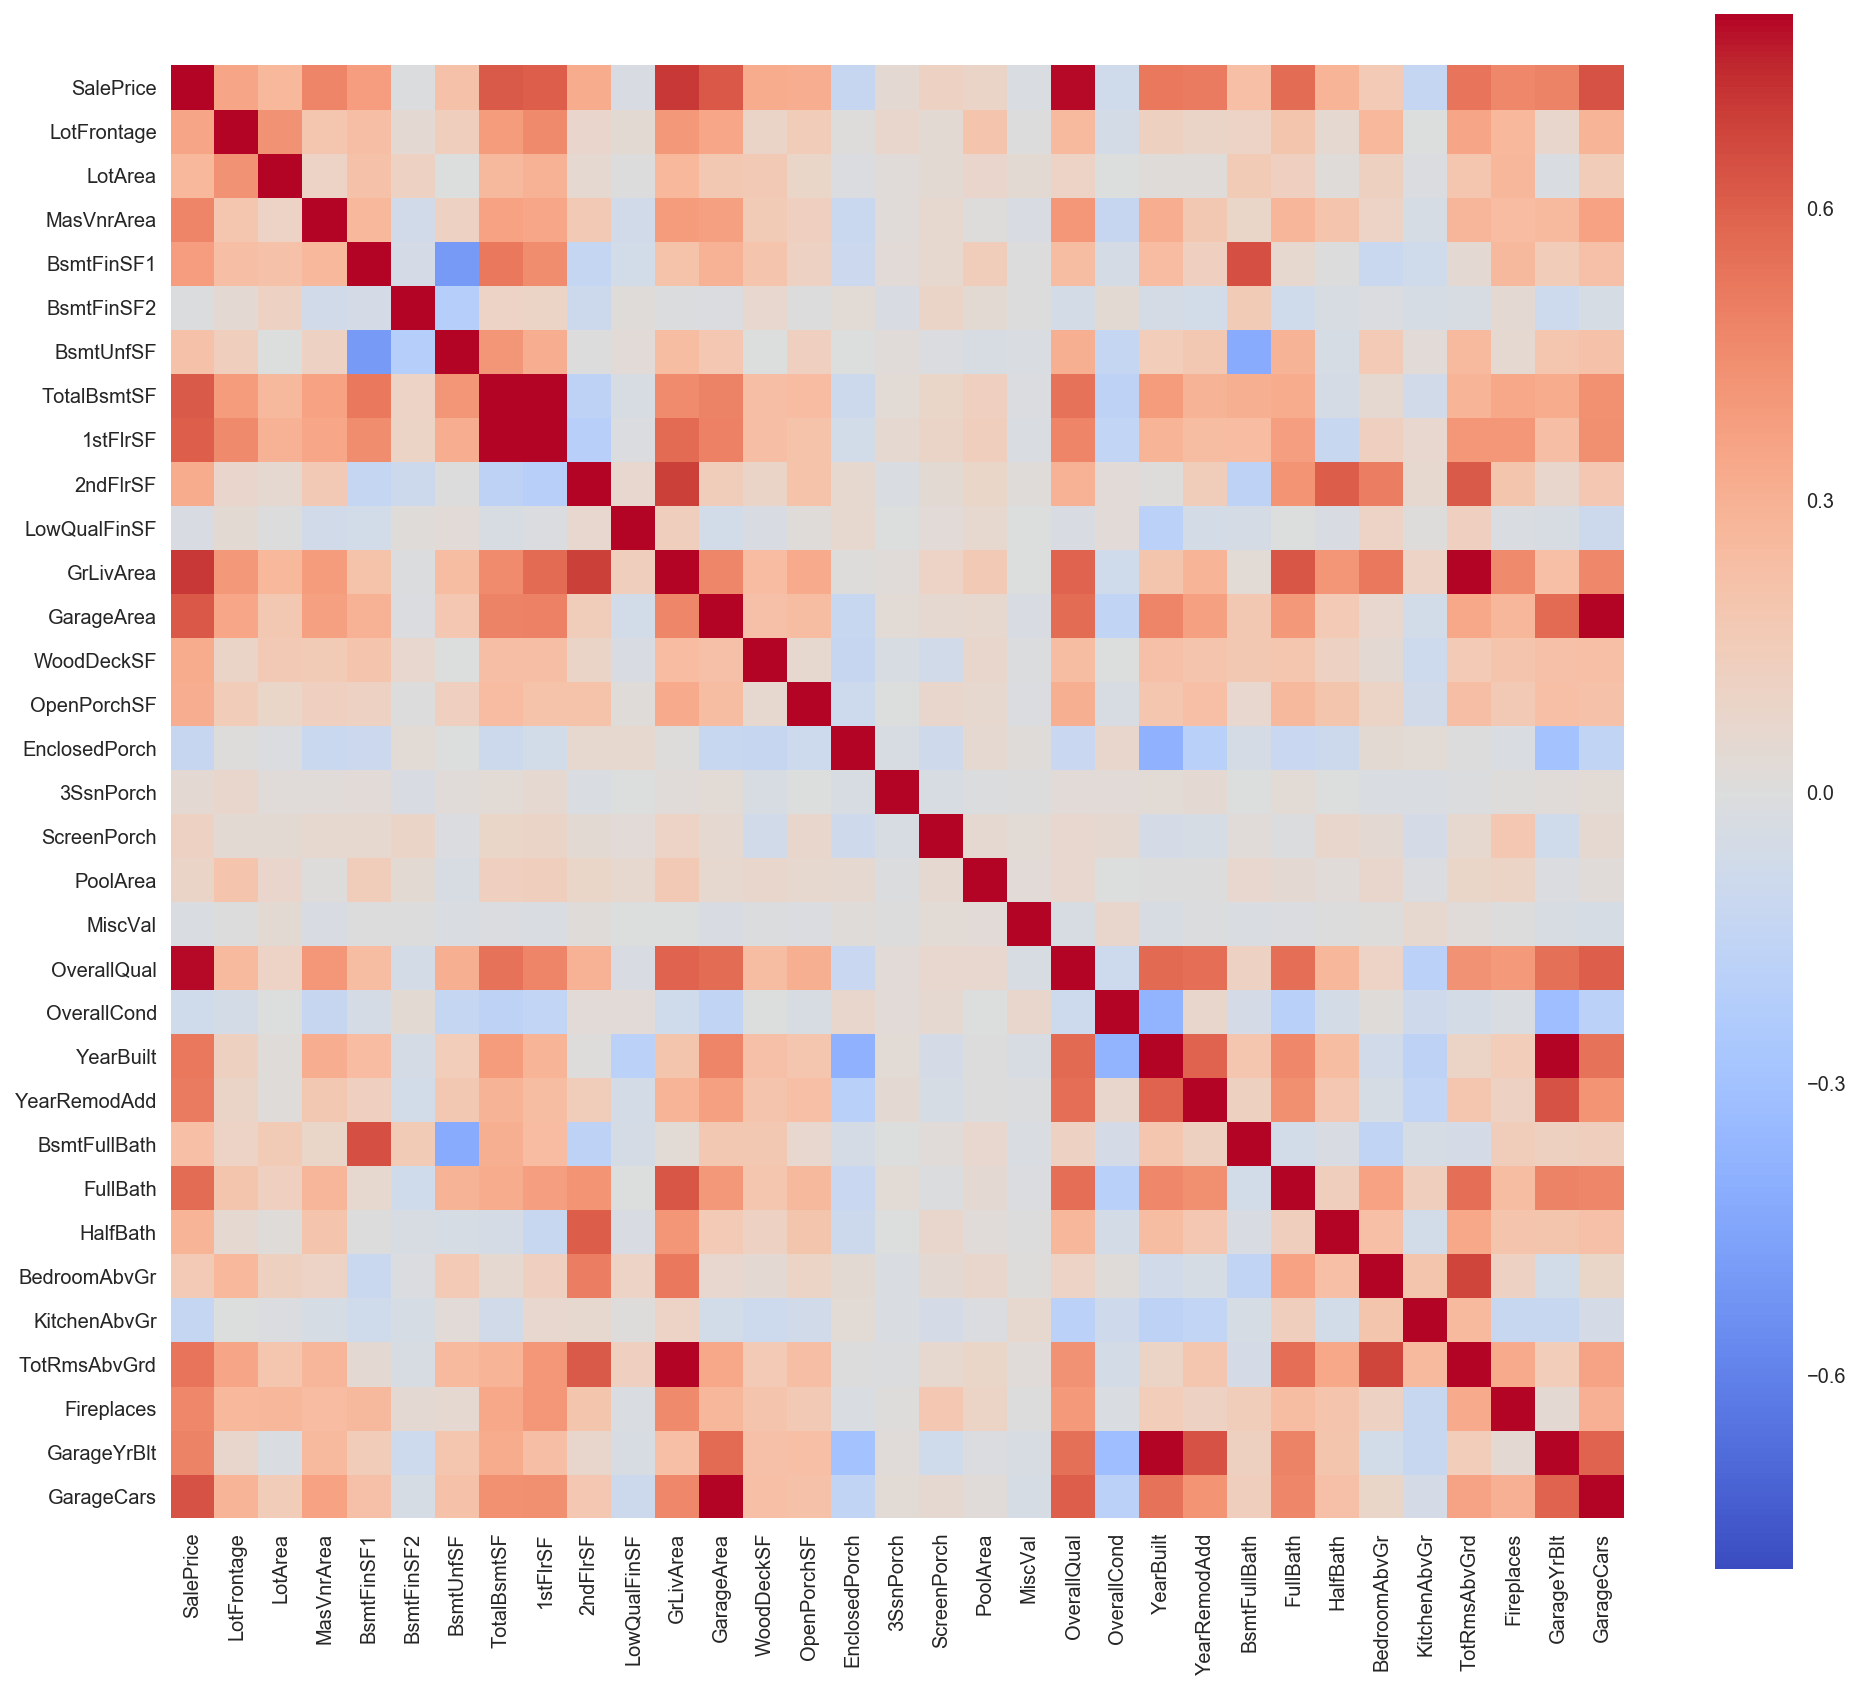

In [8]:
corr_matrix = pd.concat([train_df.SalePrice, train_df[num_features + ord_features]], axis=1).corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, vmax=.8, yticklabels=True, cbar=True, cmap='coolwarm', square=True)
plt.tight_layout()

## Individual Variable Exploration
### SalePrice (Dependent Variable)
The distribution of **SalePrice** is positively skewed with some apparent large outliers. Applying a log transformation brings it close to normal.

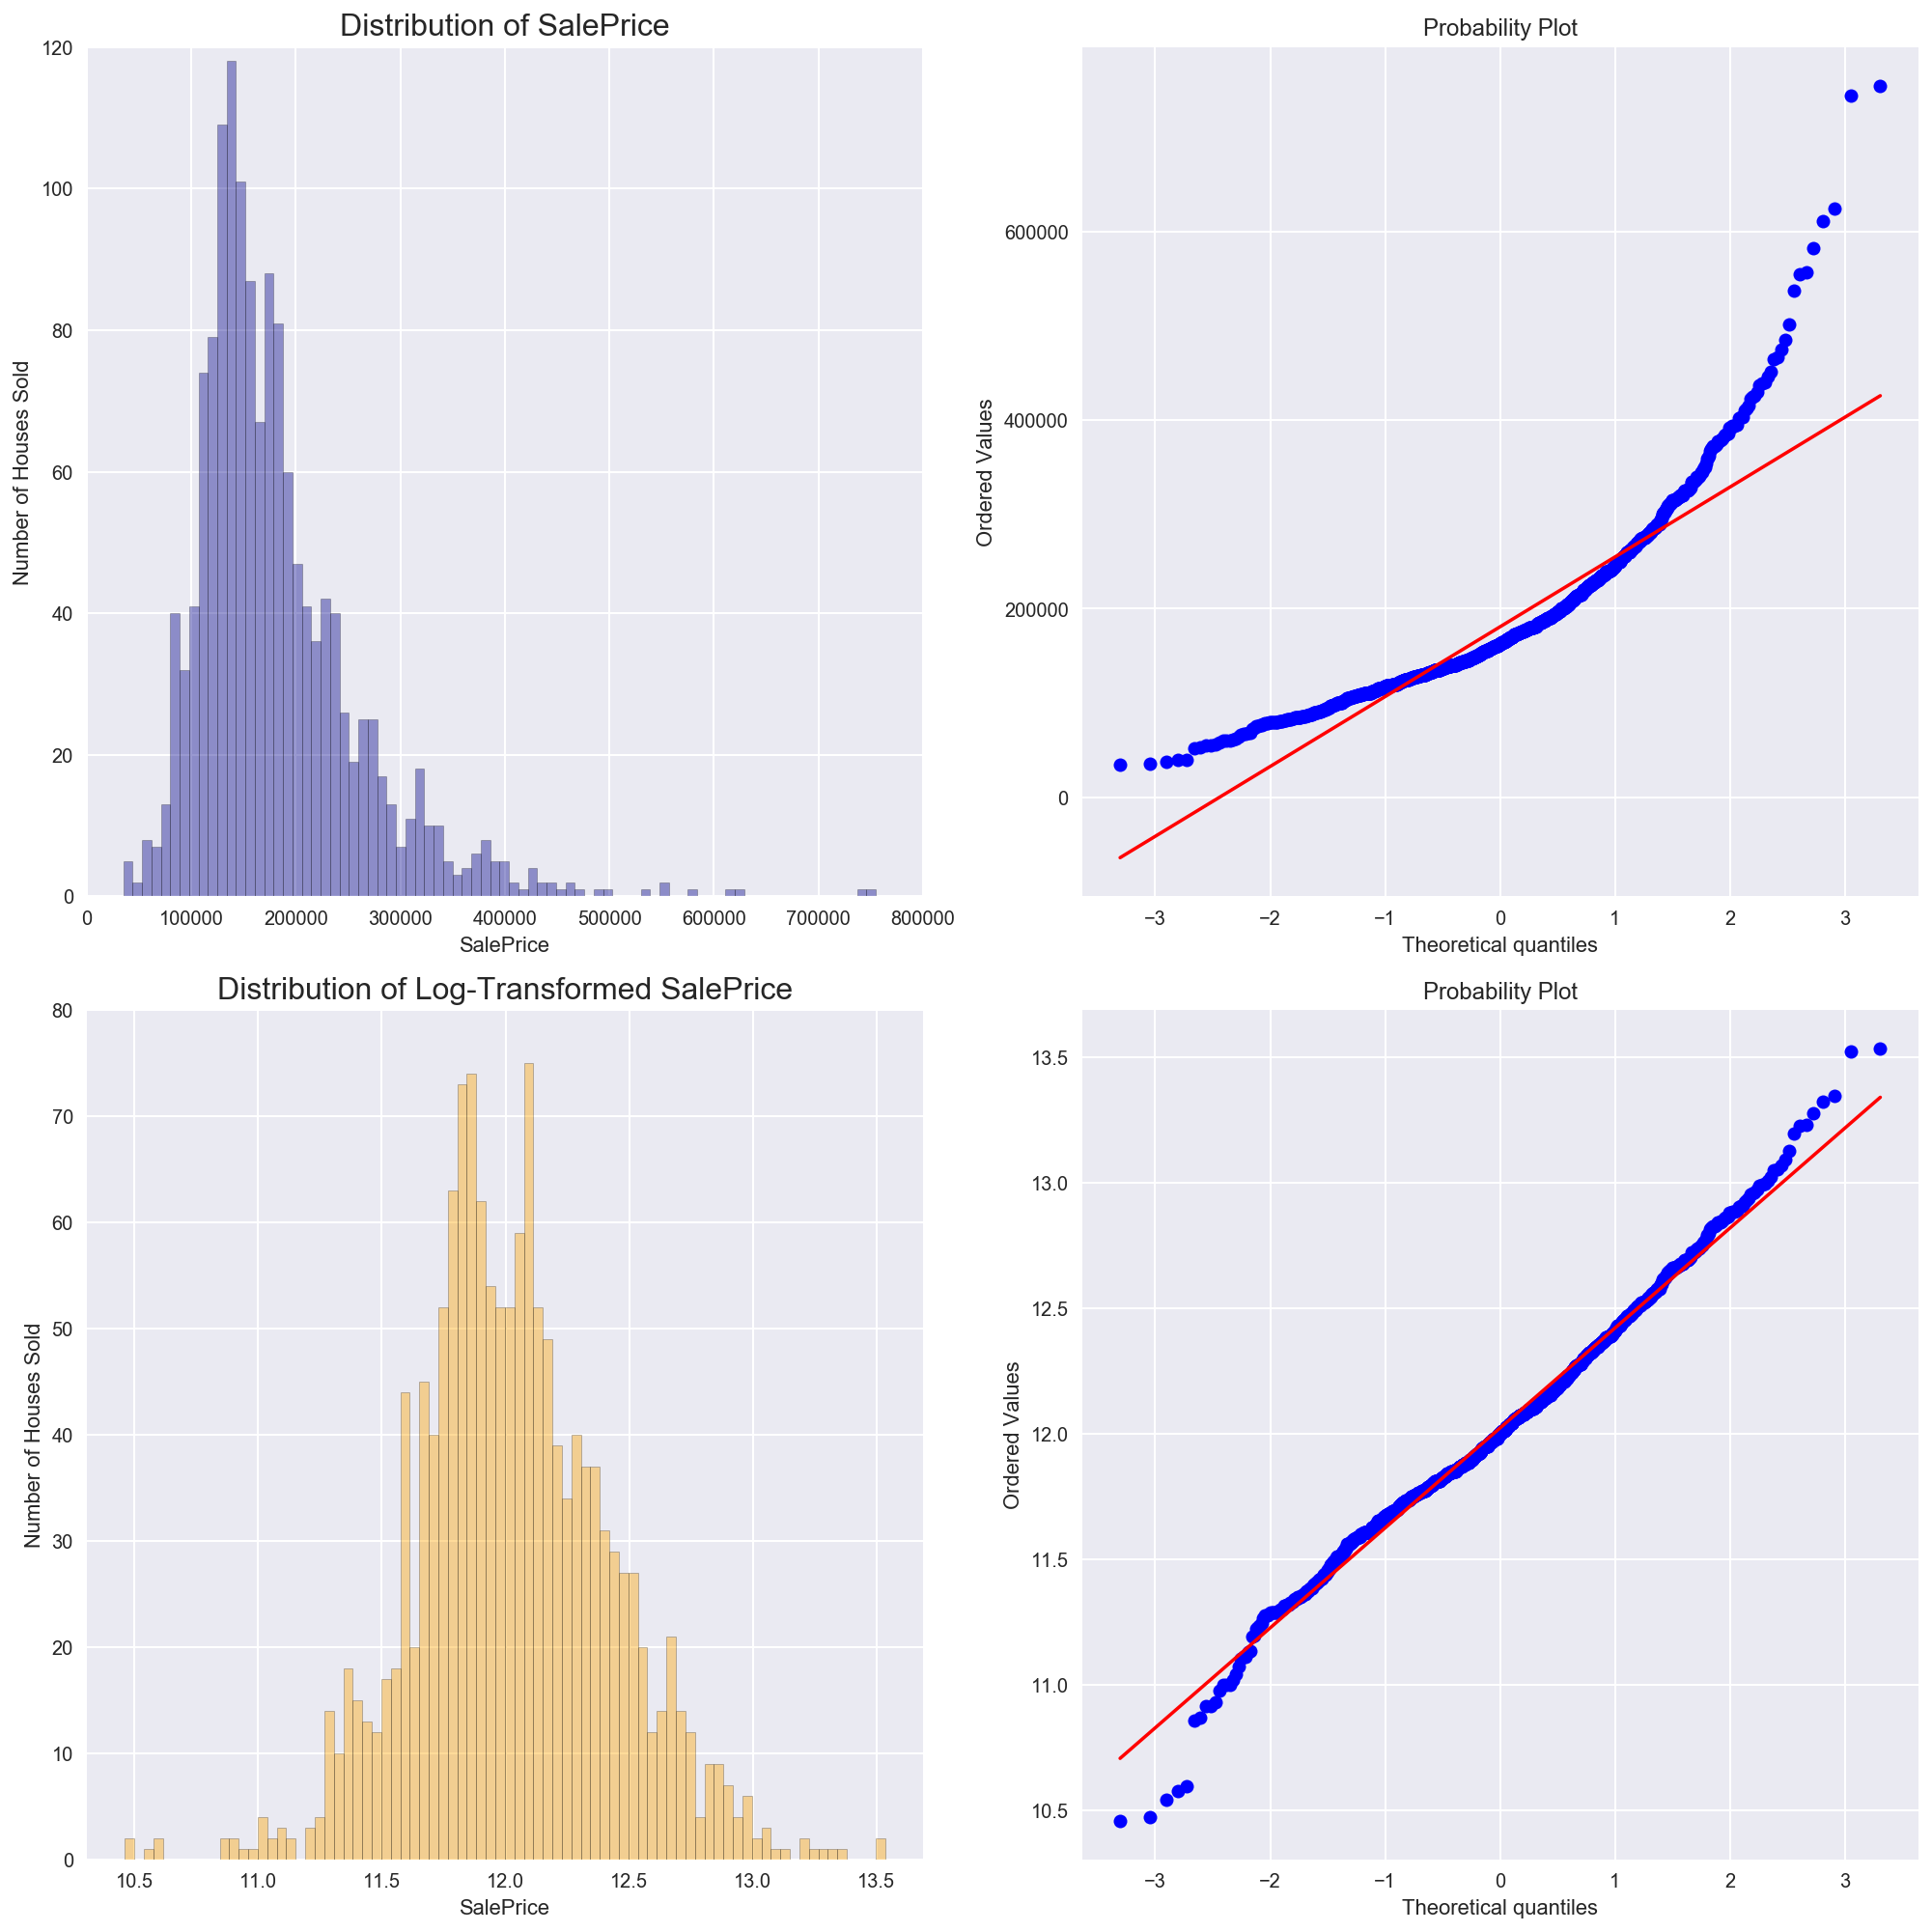

In [9]:
plt.figure(figsize=(14, 14))
# Graph 1
plt.subplot(221)
sns.distplot(train_df['SalePrice'], bins=80, kde=False, color='darkblue')
plt.xlim(0, 800000)
plt.ylim(0, 120)
plt.title('Distribution of SalePrice', fontsize=16)
plt.ylabel('Number of Houses Sold')

# Graph 2
plt.subplot(222)
ss.probplot(train_df.SalePrice, plot=plt)

# Graph 3
plt.subplot(223)
sns.distplot(np.log(train_df.SalePrice), bins=80, kde=False, color='orange')
plt.title('Distribution of Log-Transformed SalePrice', fontsize=16)
plt.ylabel('Number of Houses Sold')
plt.ylim(0, 80)

# Graph 4
plt.subplot(224)
ss.probplot(np.log(train_df.SalePrice), plot=plt)

plt.tight_layout()

### Independent Variables
From quickly looking at the histograms, there are quite a few positively skewed variables.

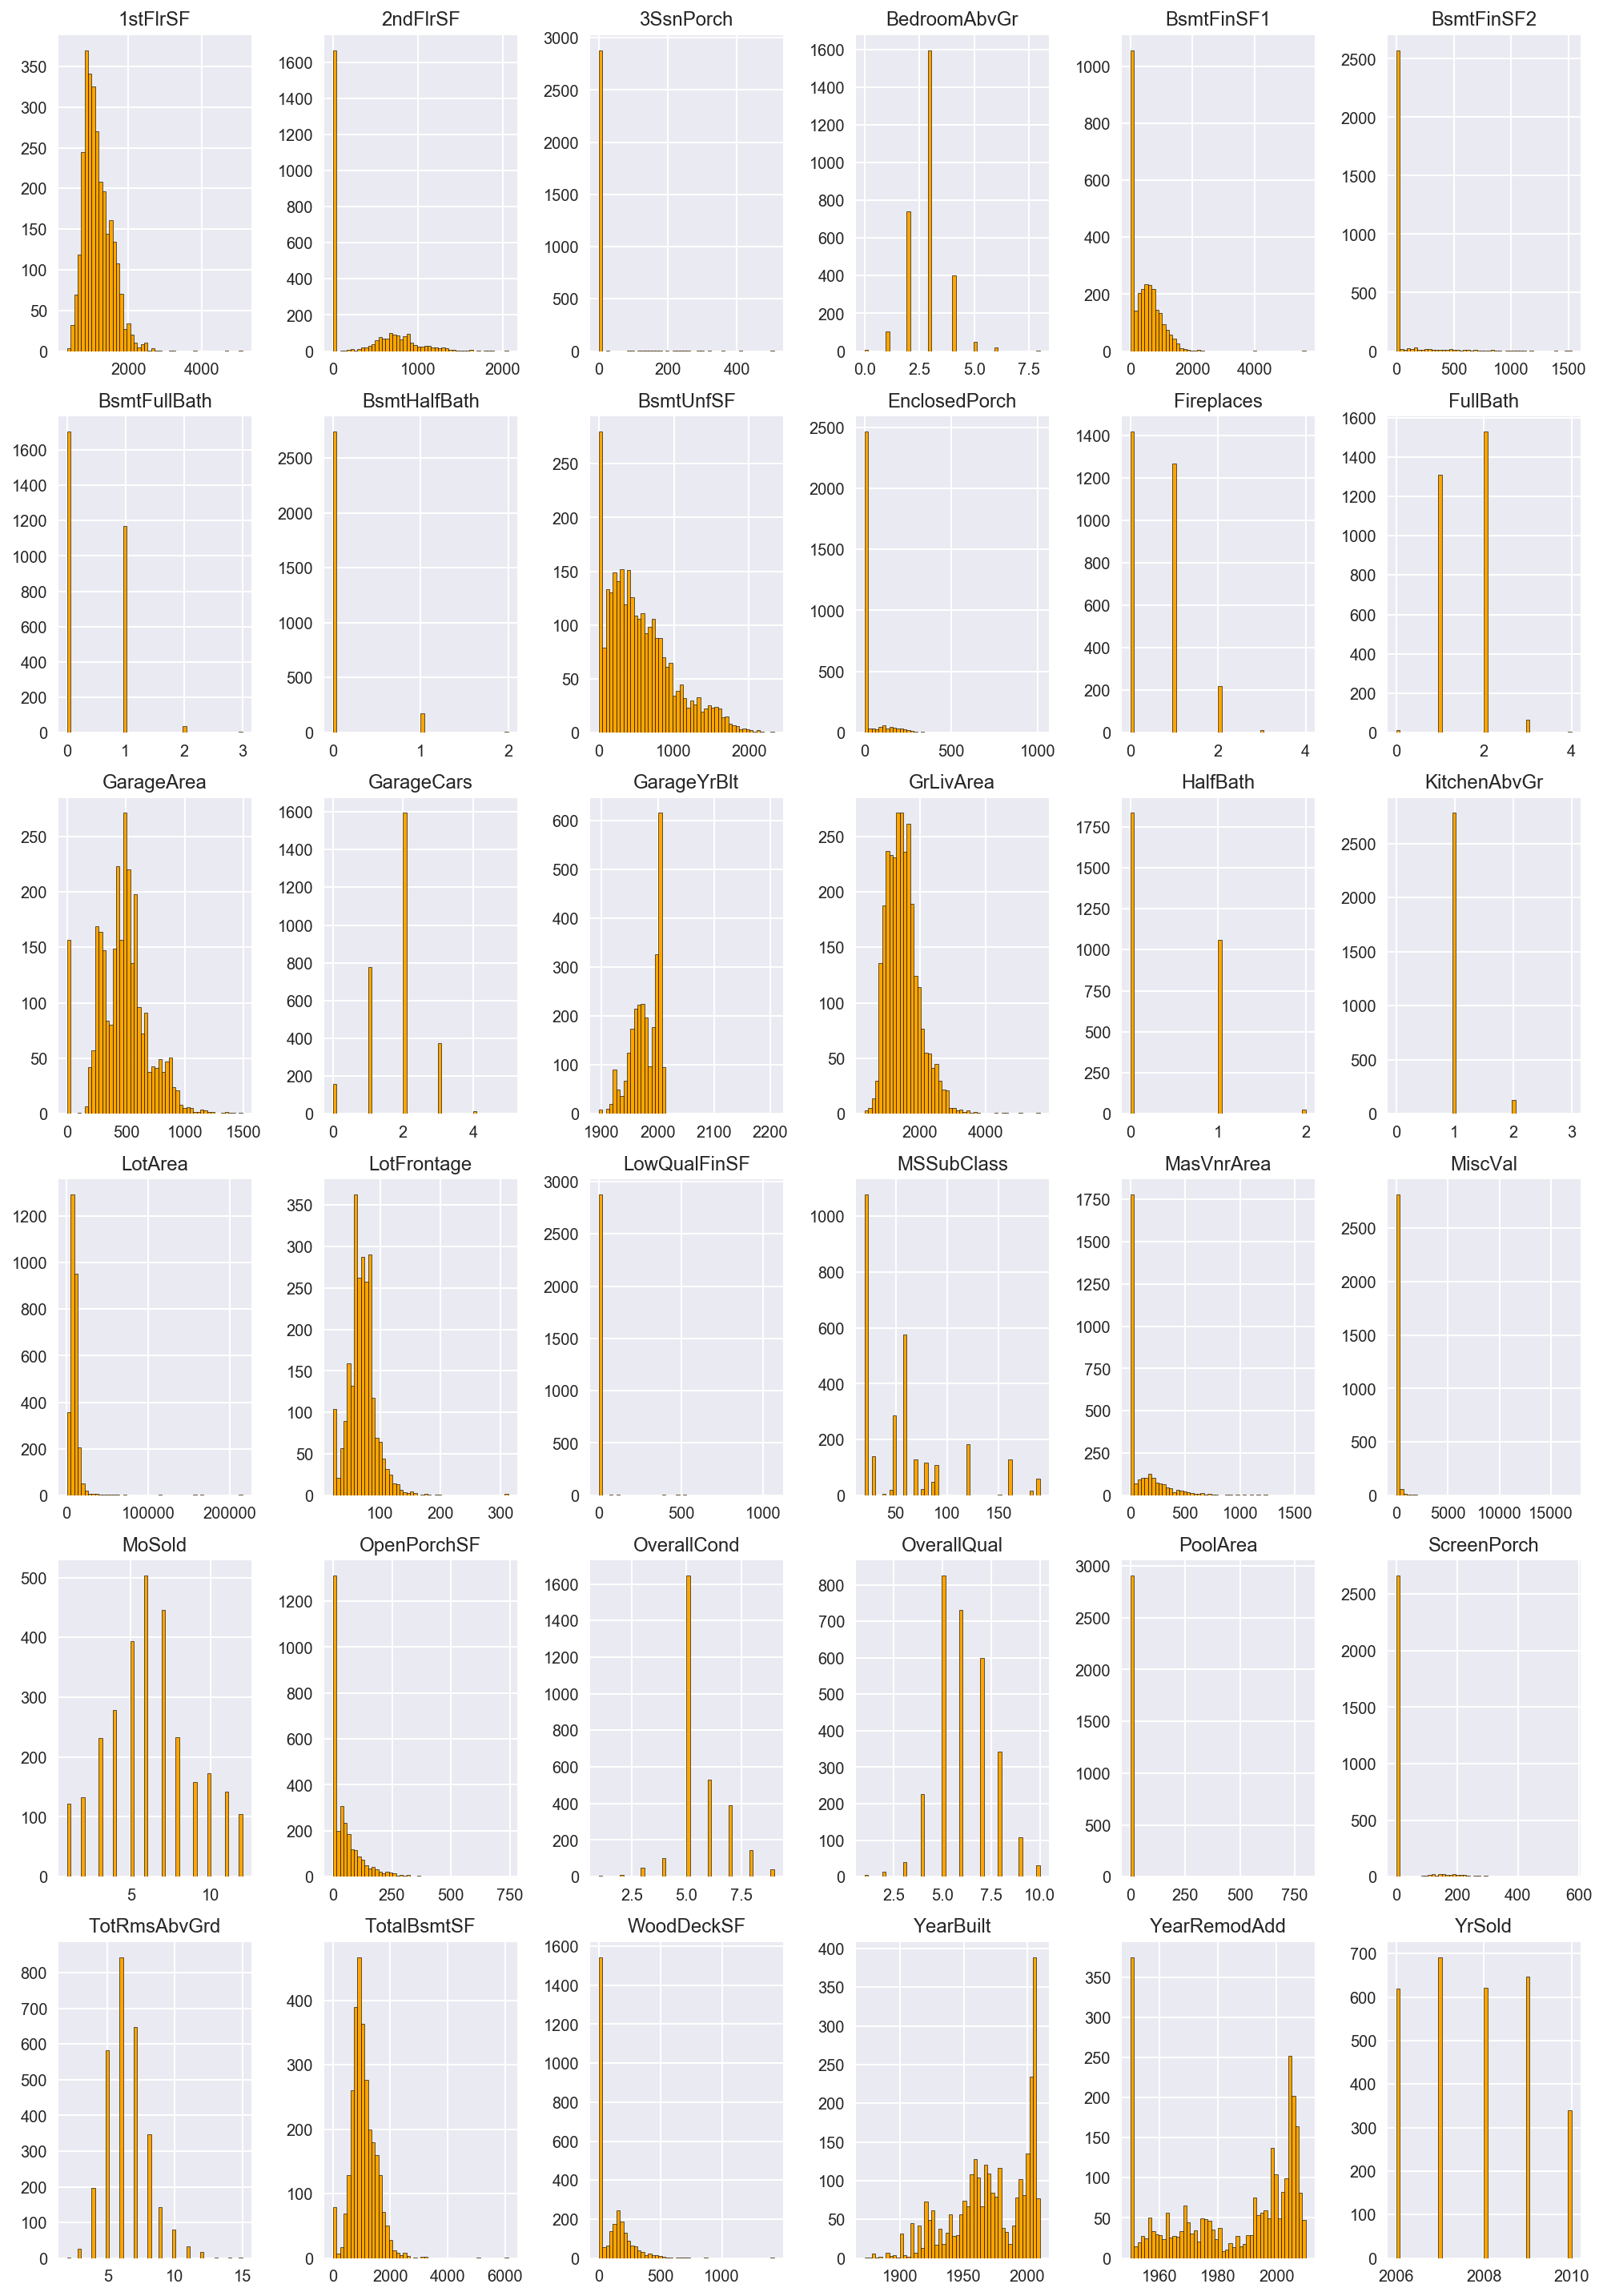

In [10]:
total_df.hist(bins=50, figsize=(14, 20), color='orange')
plt.tight_layout()

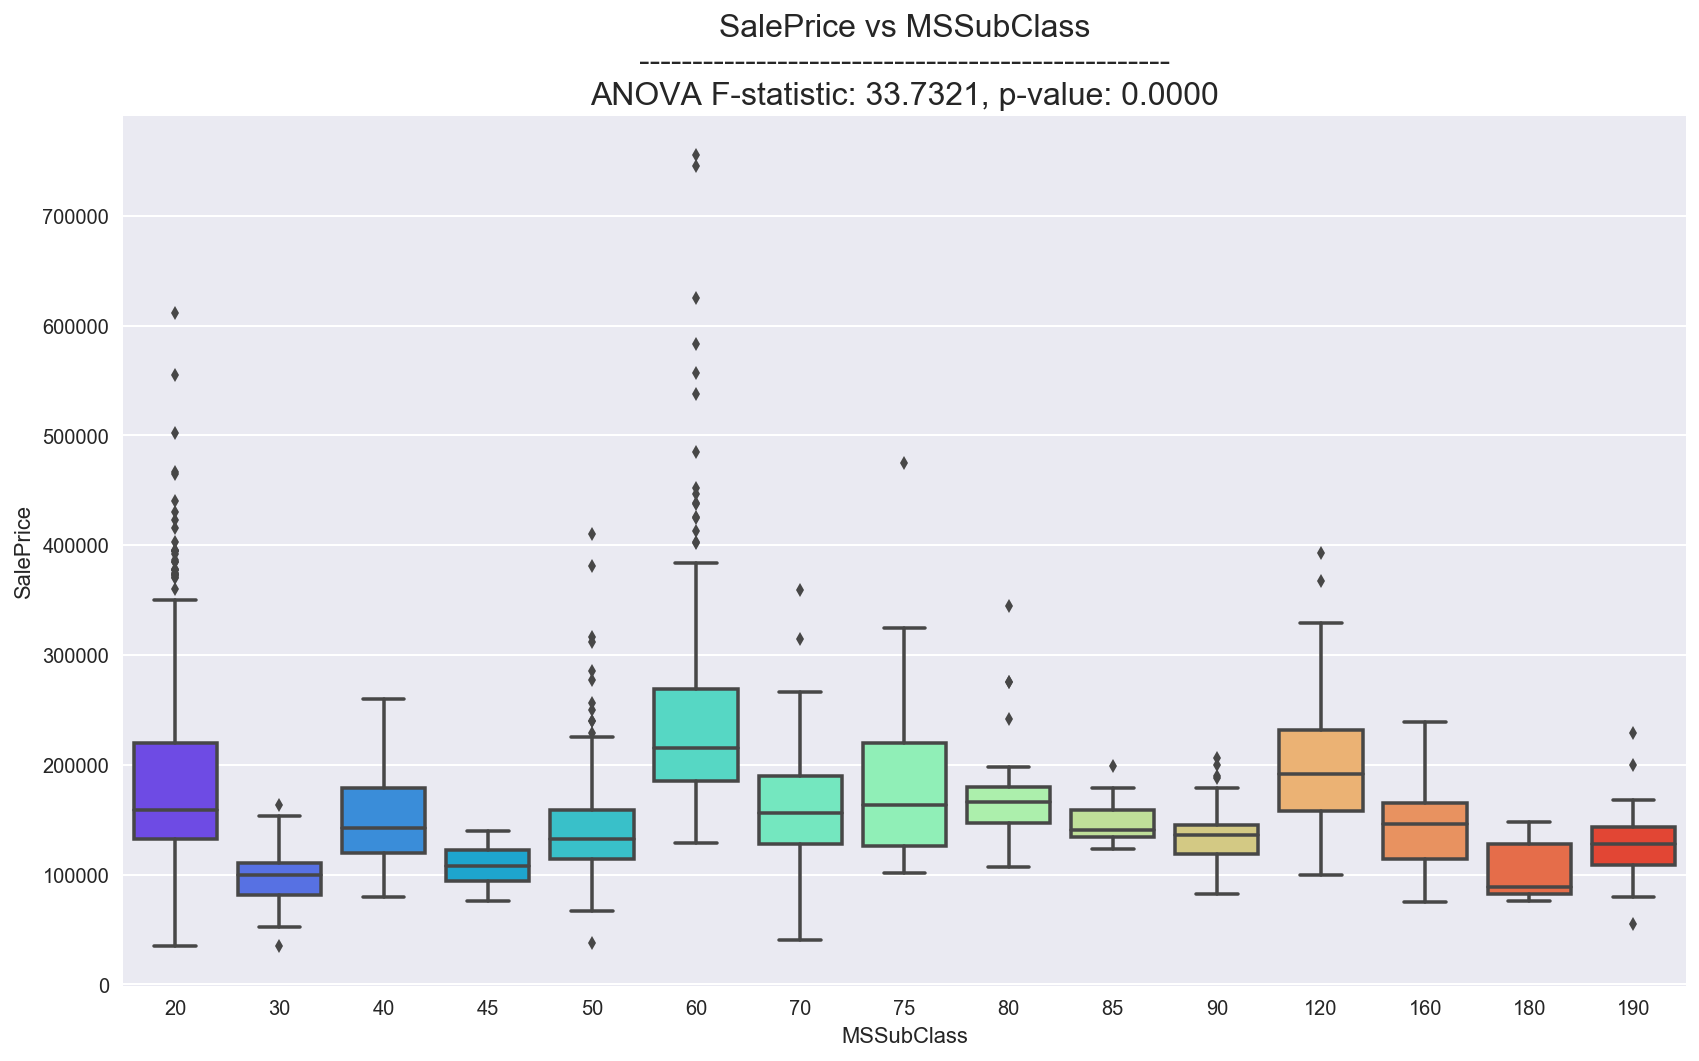

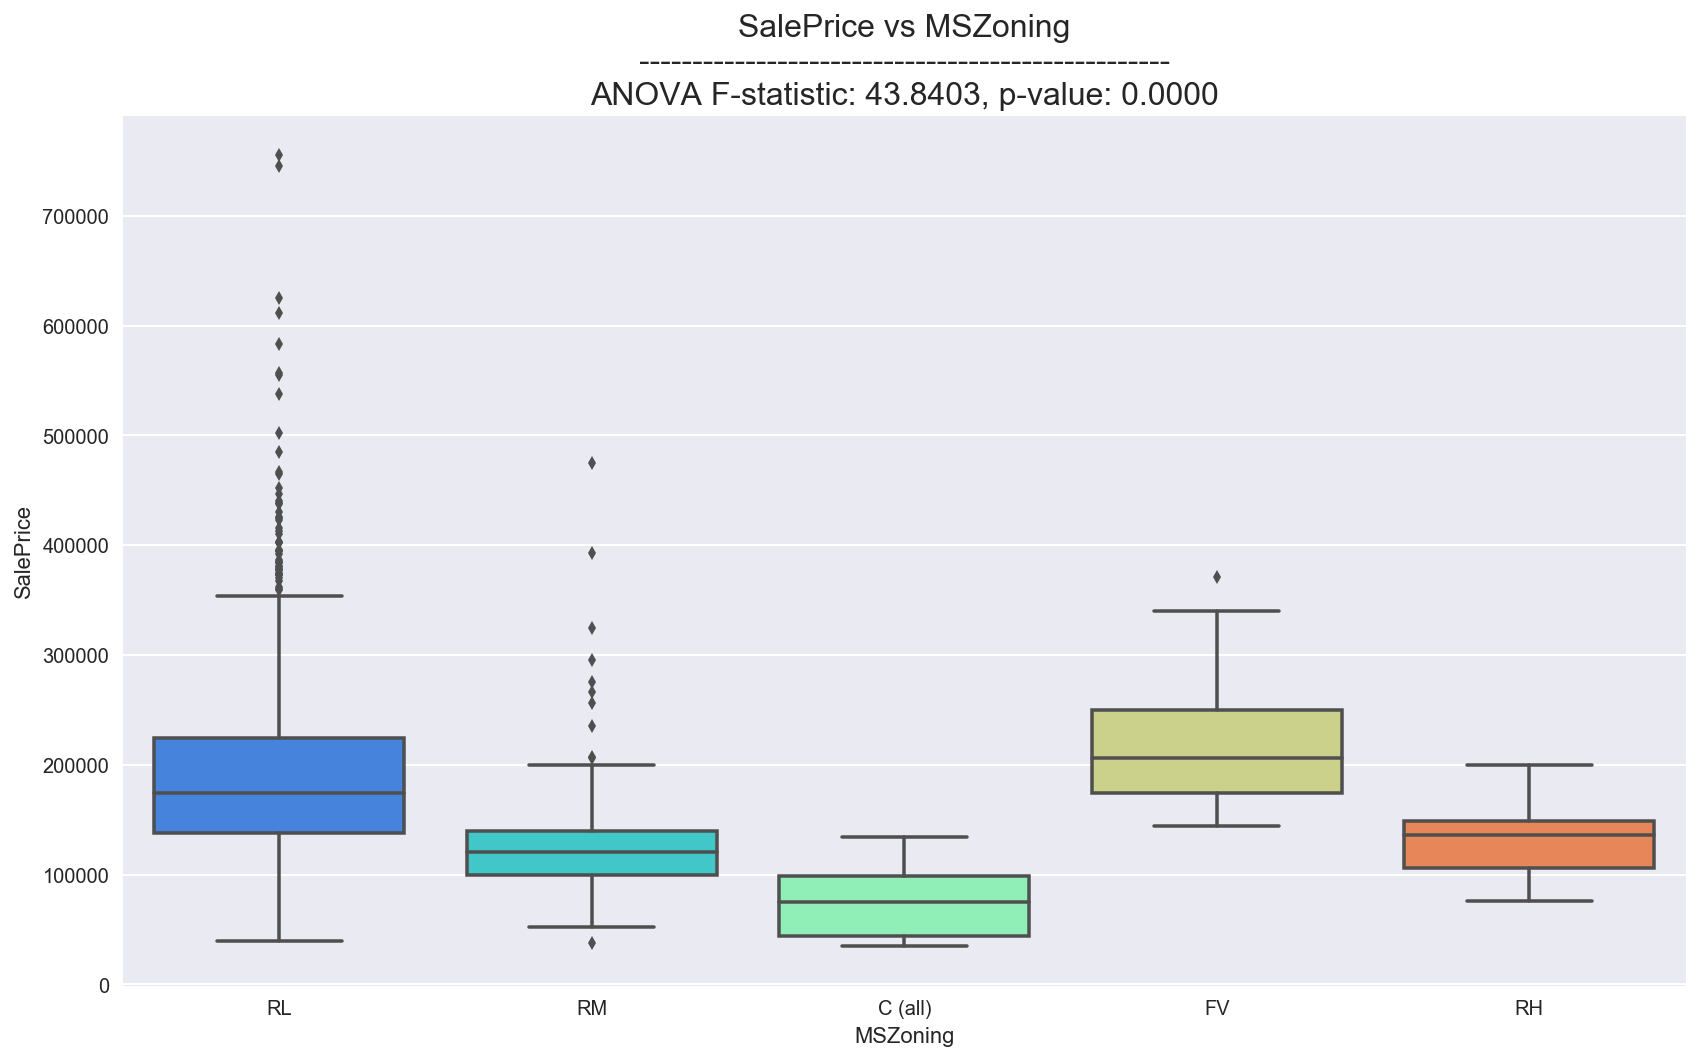

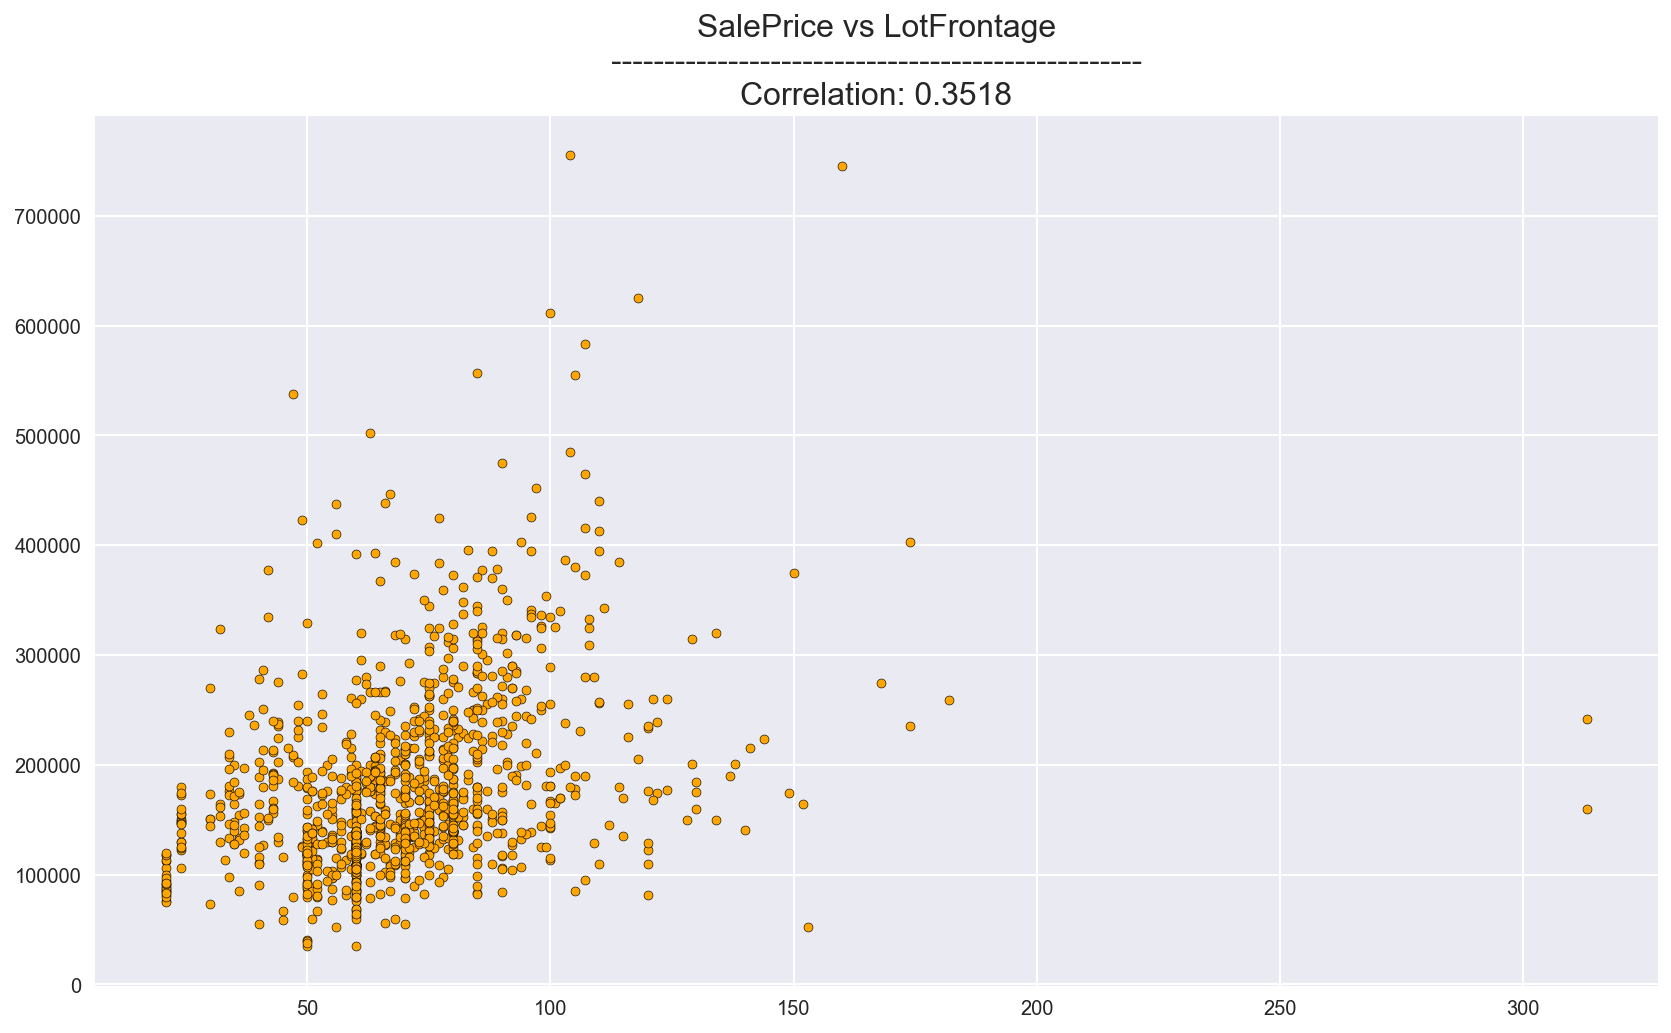

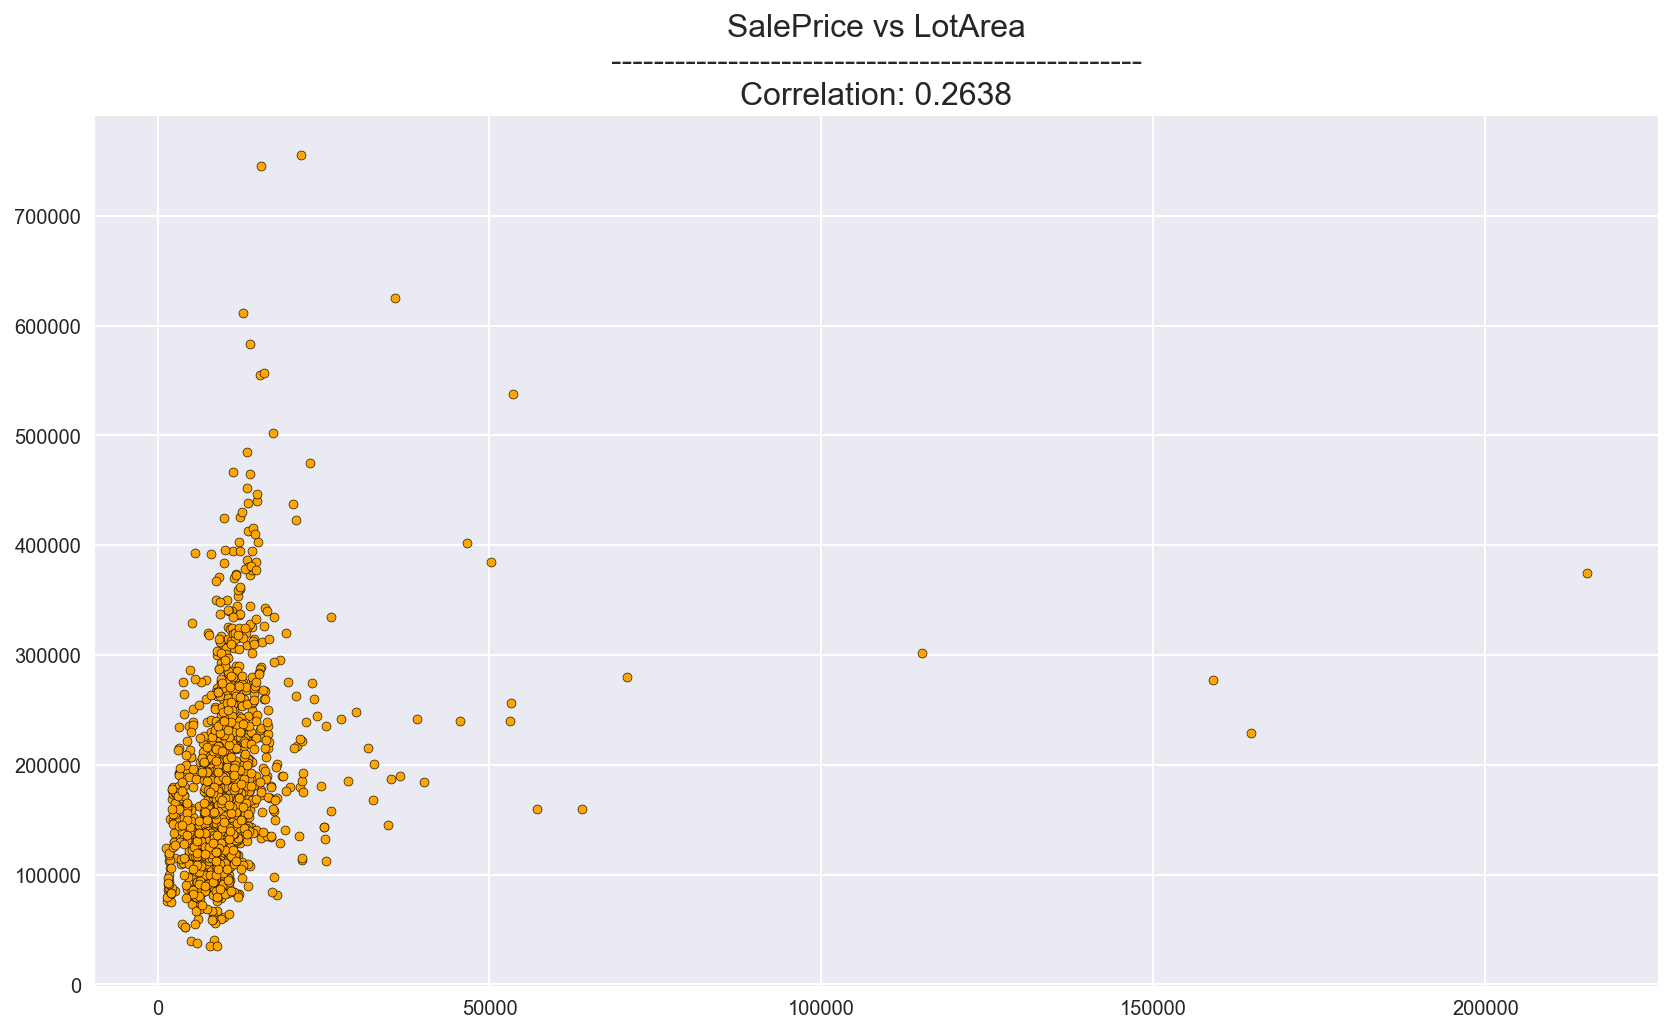

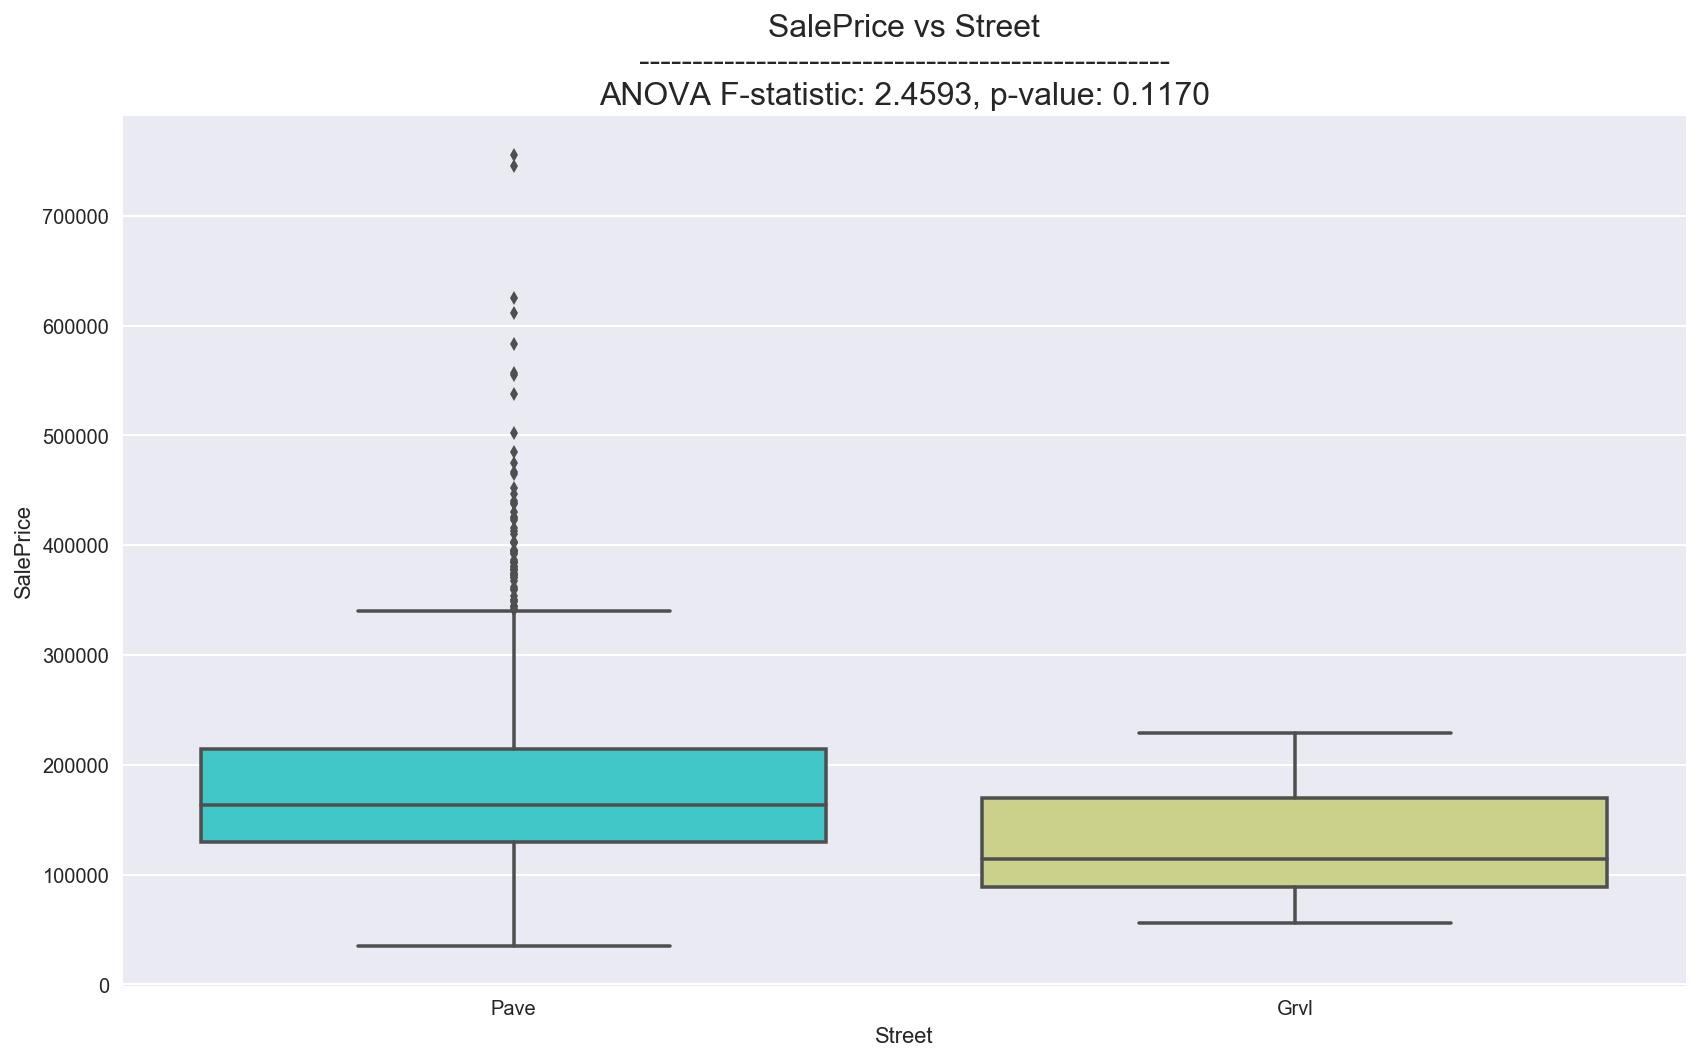

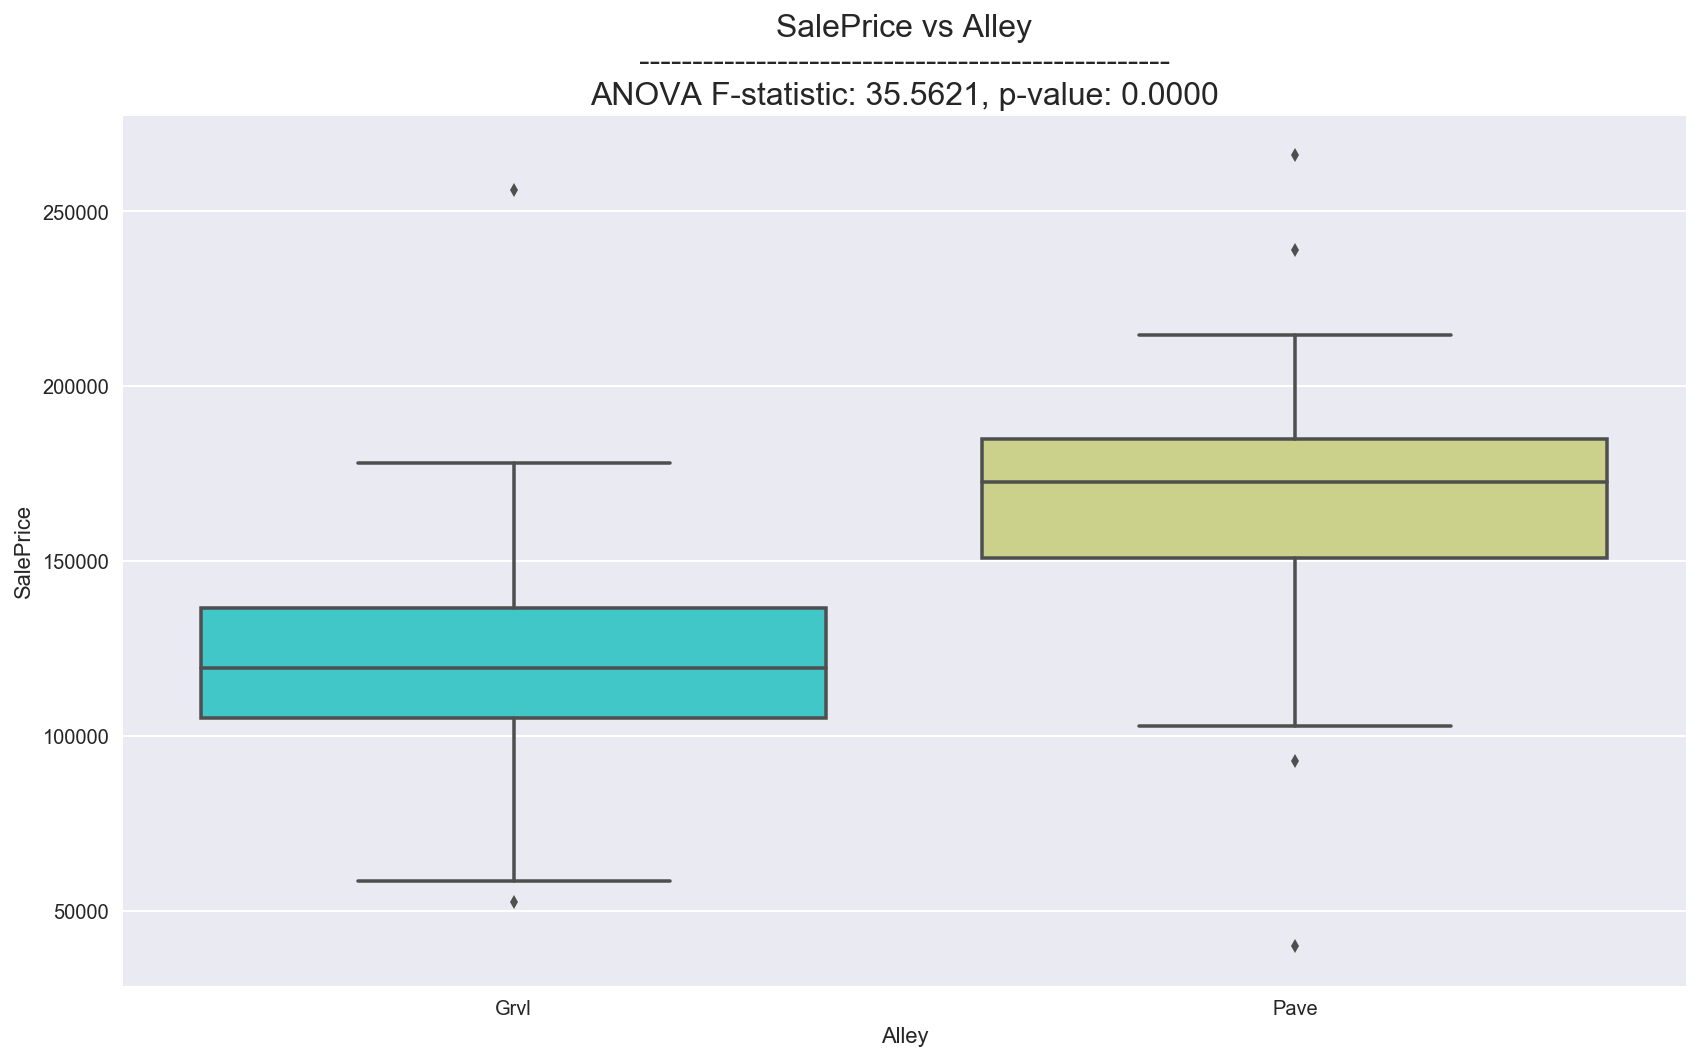

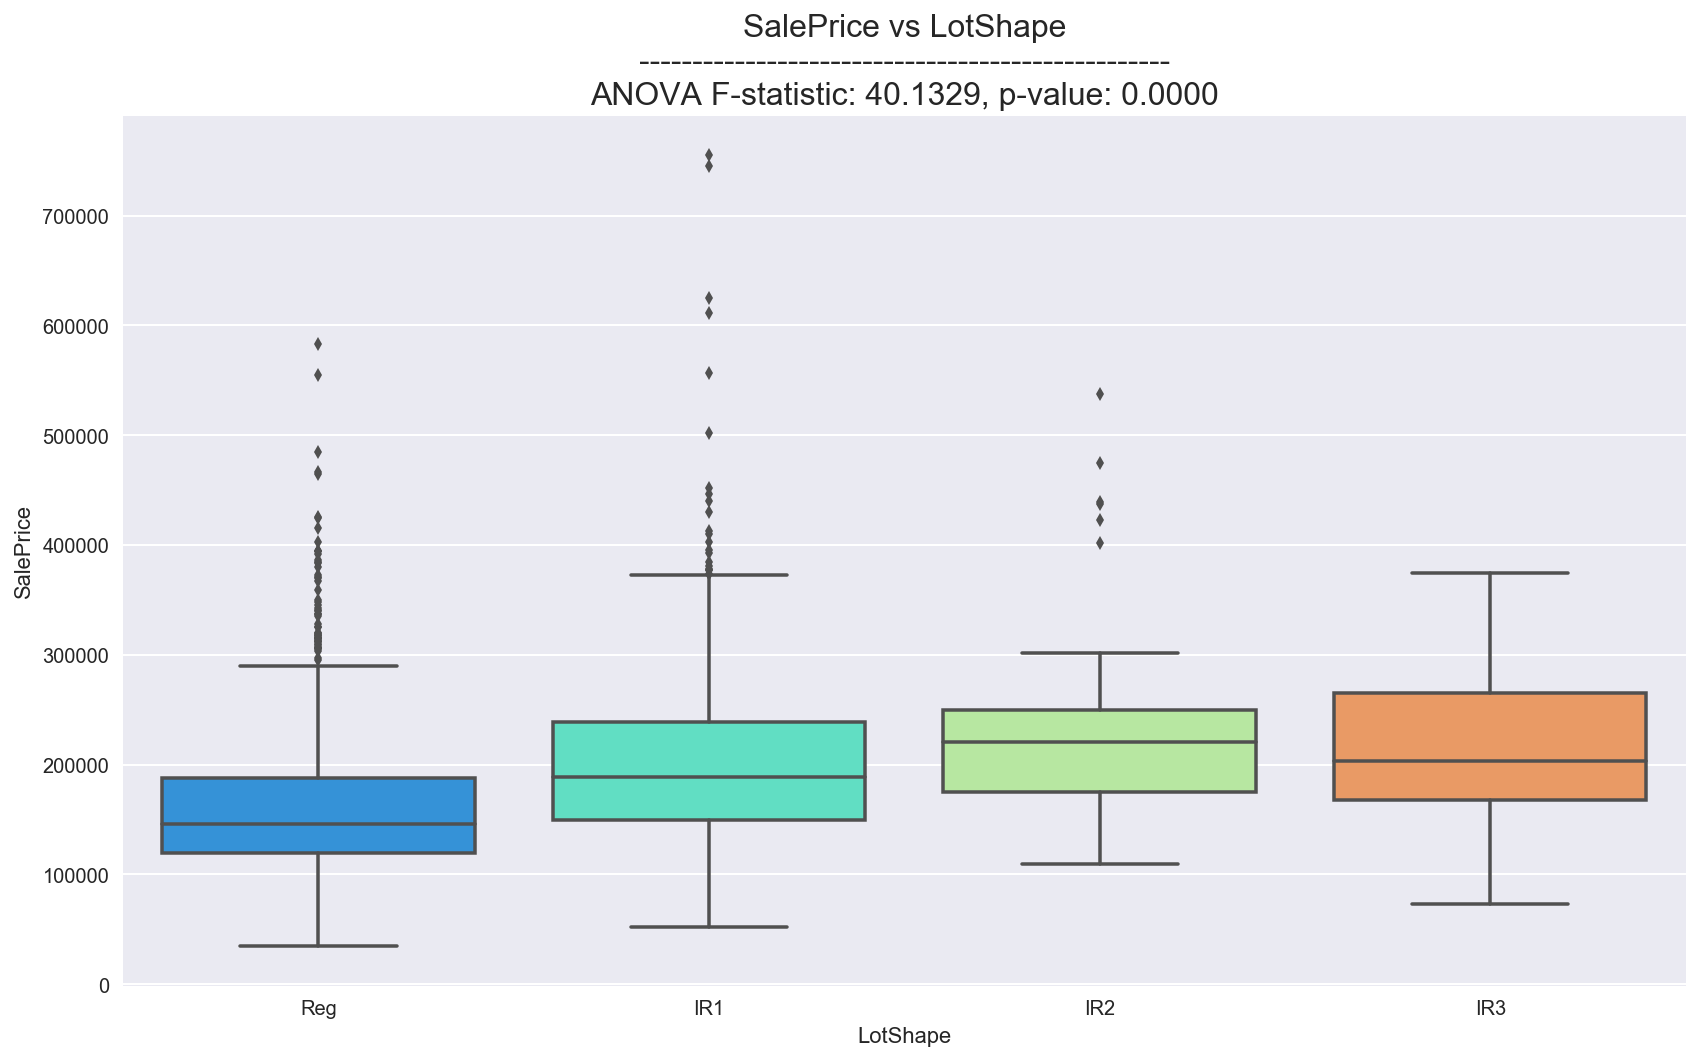

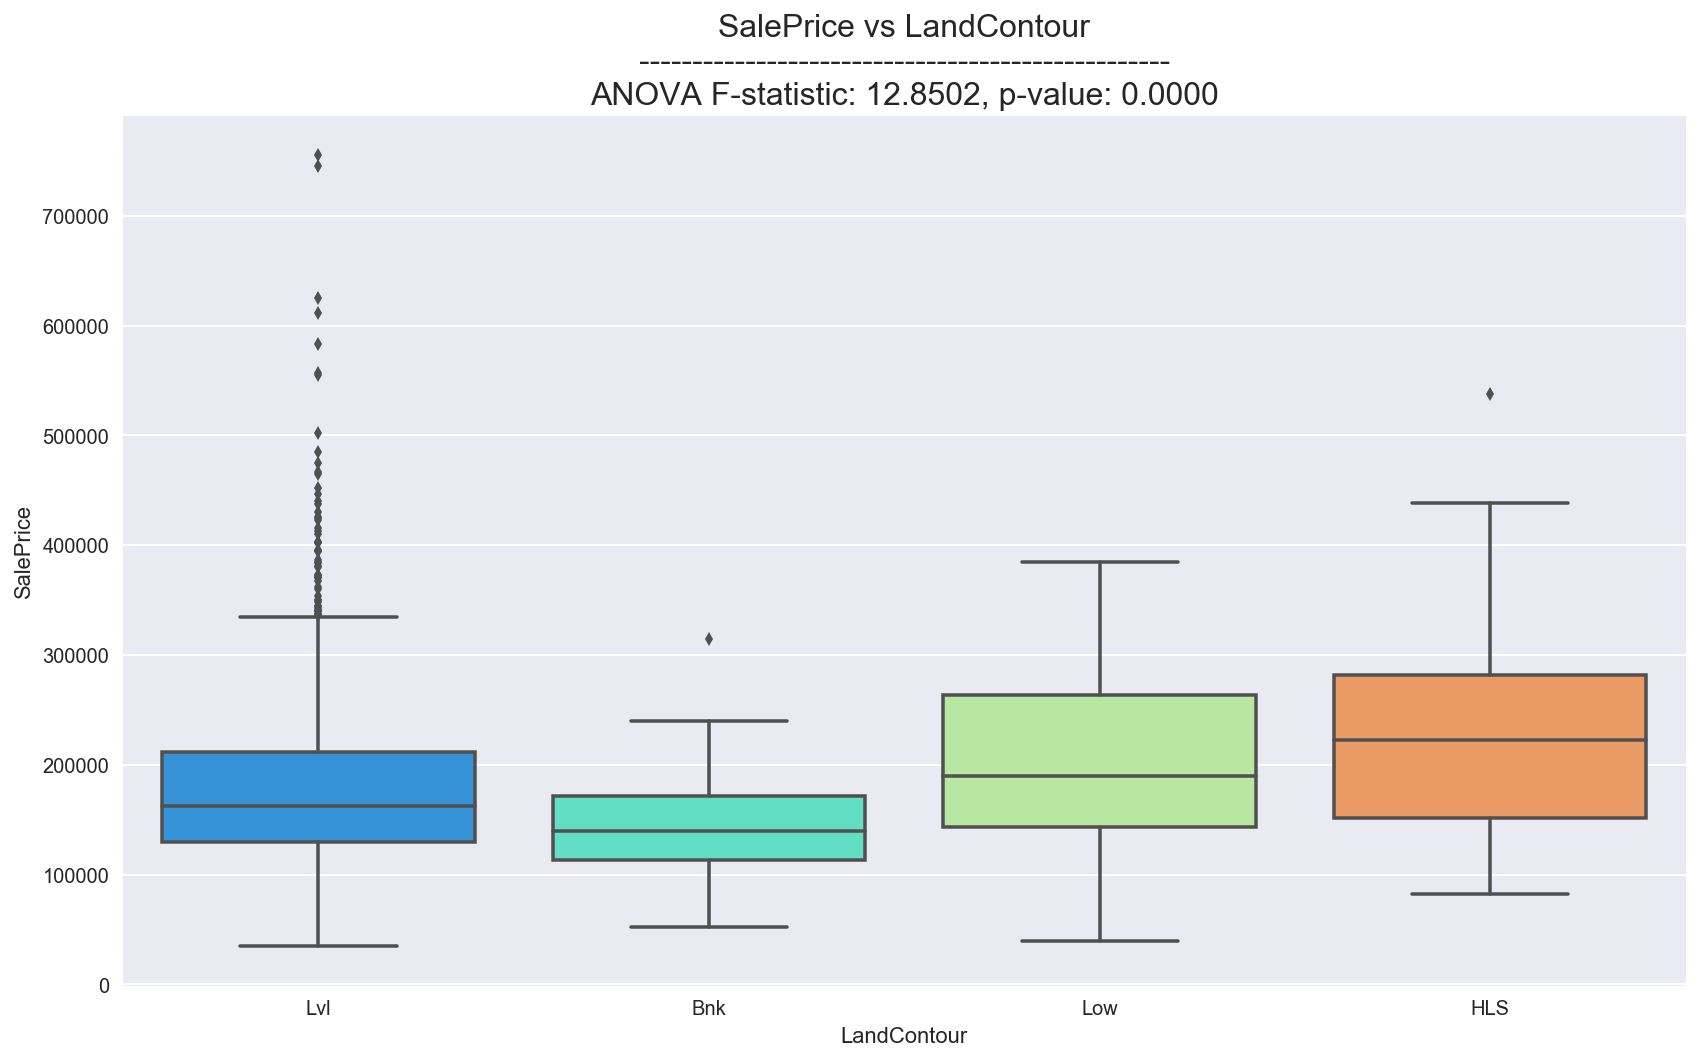

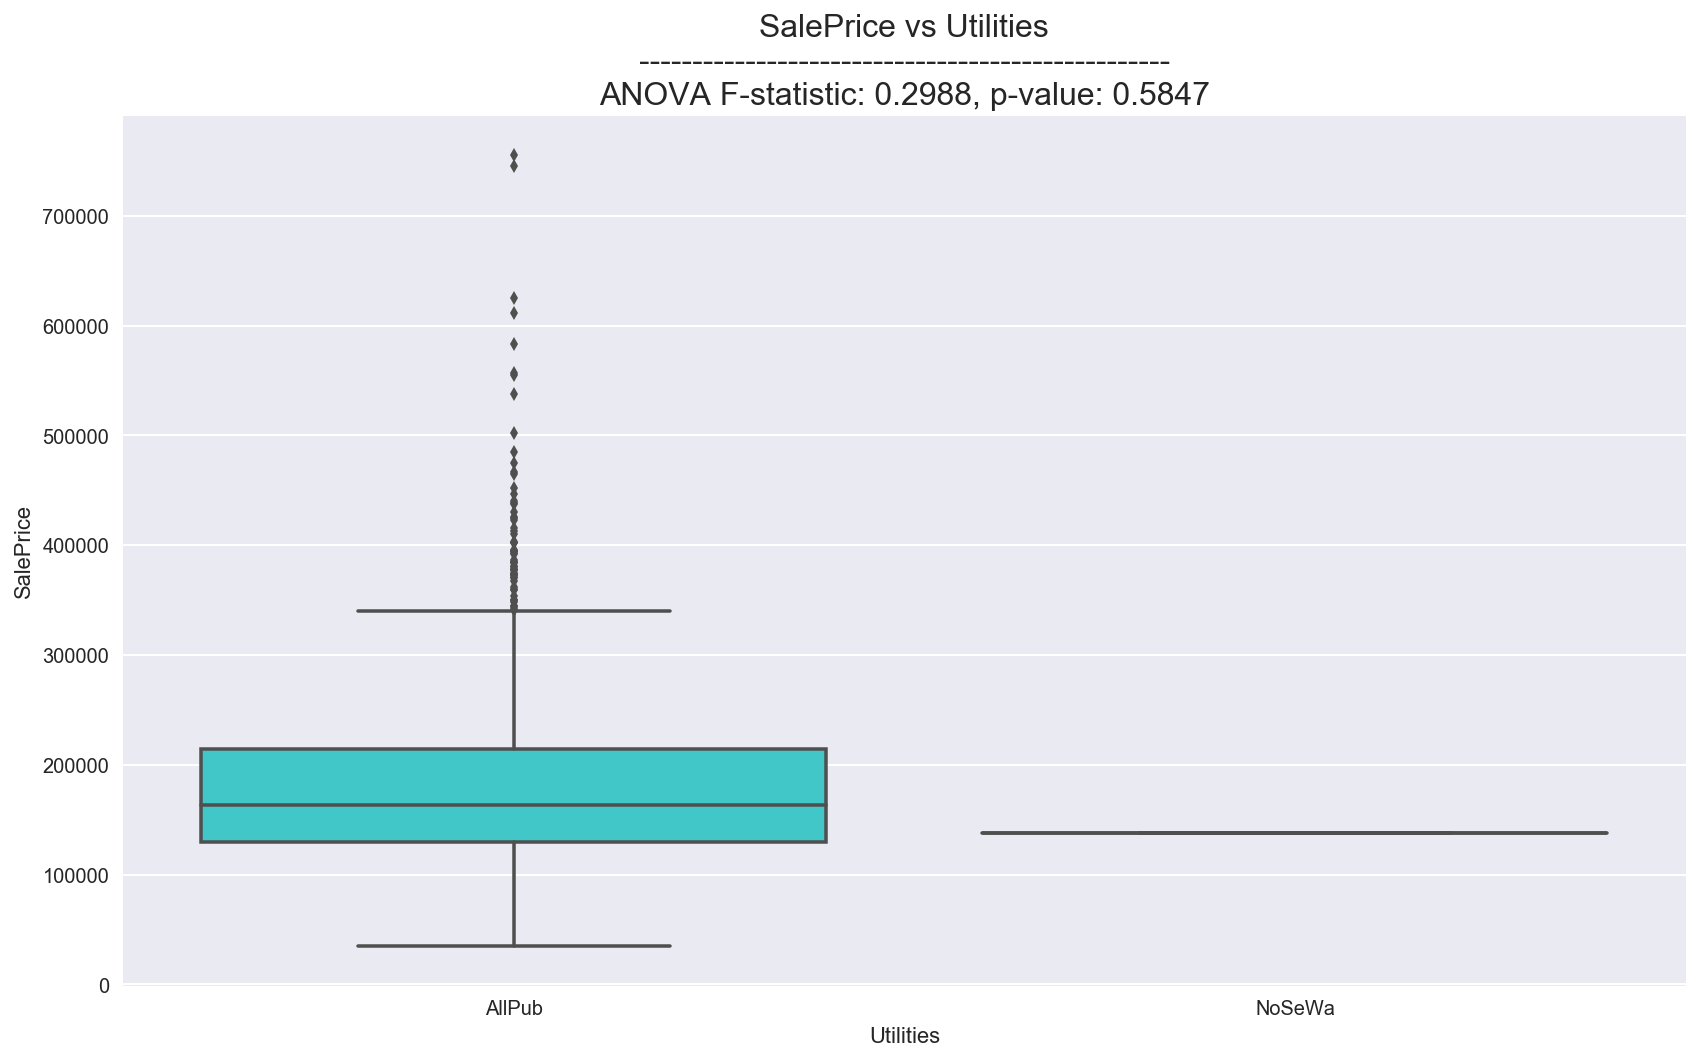

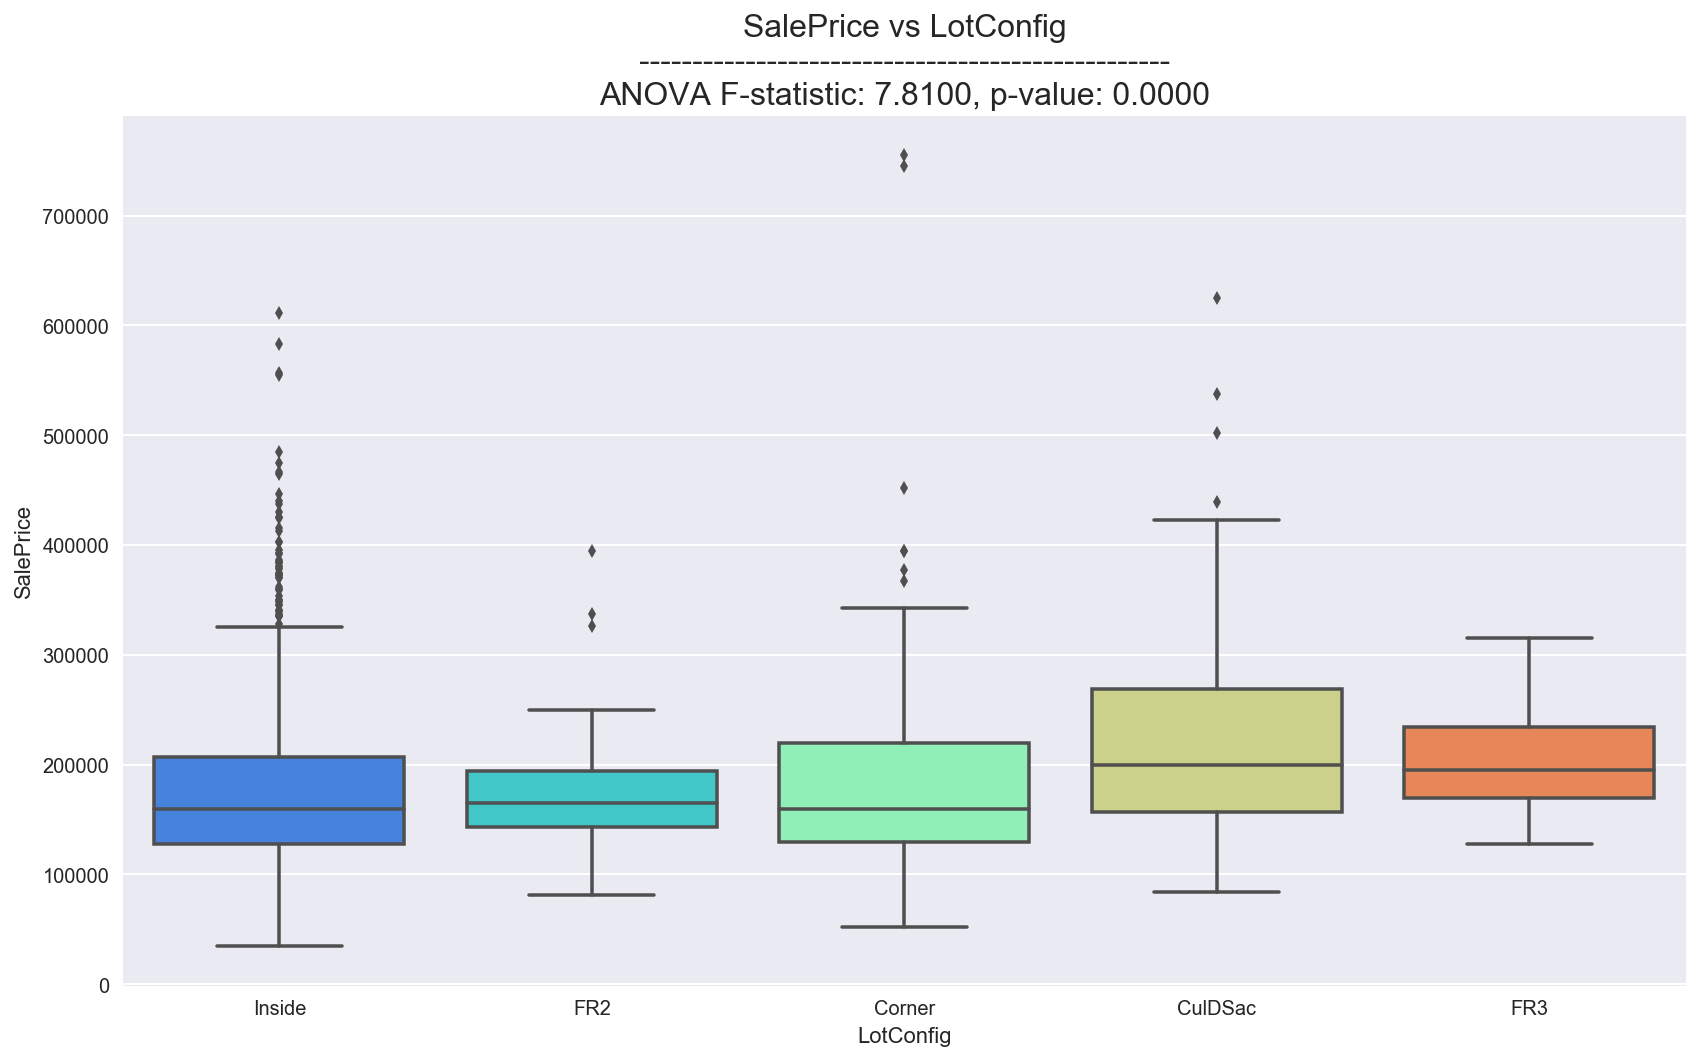

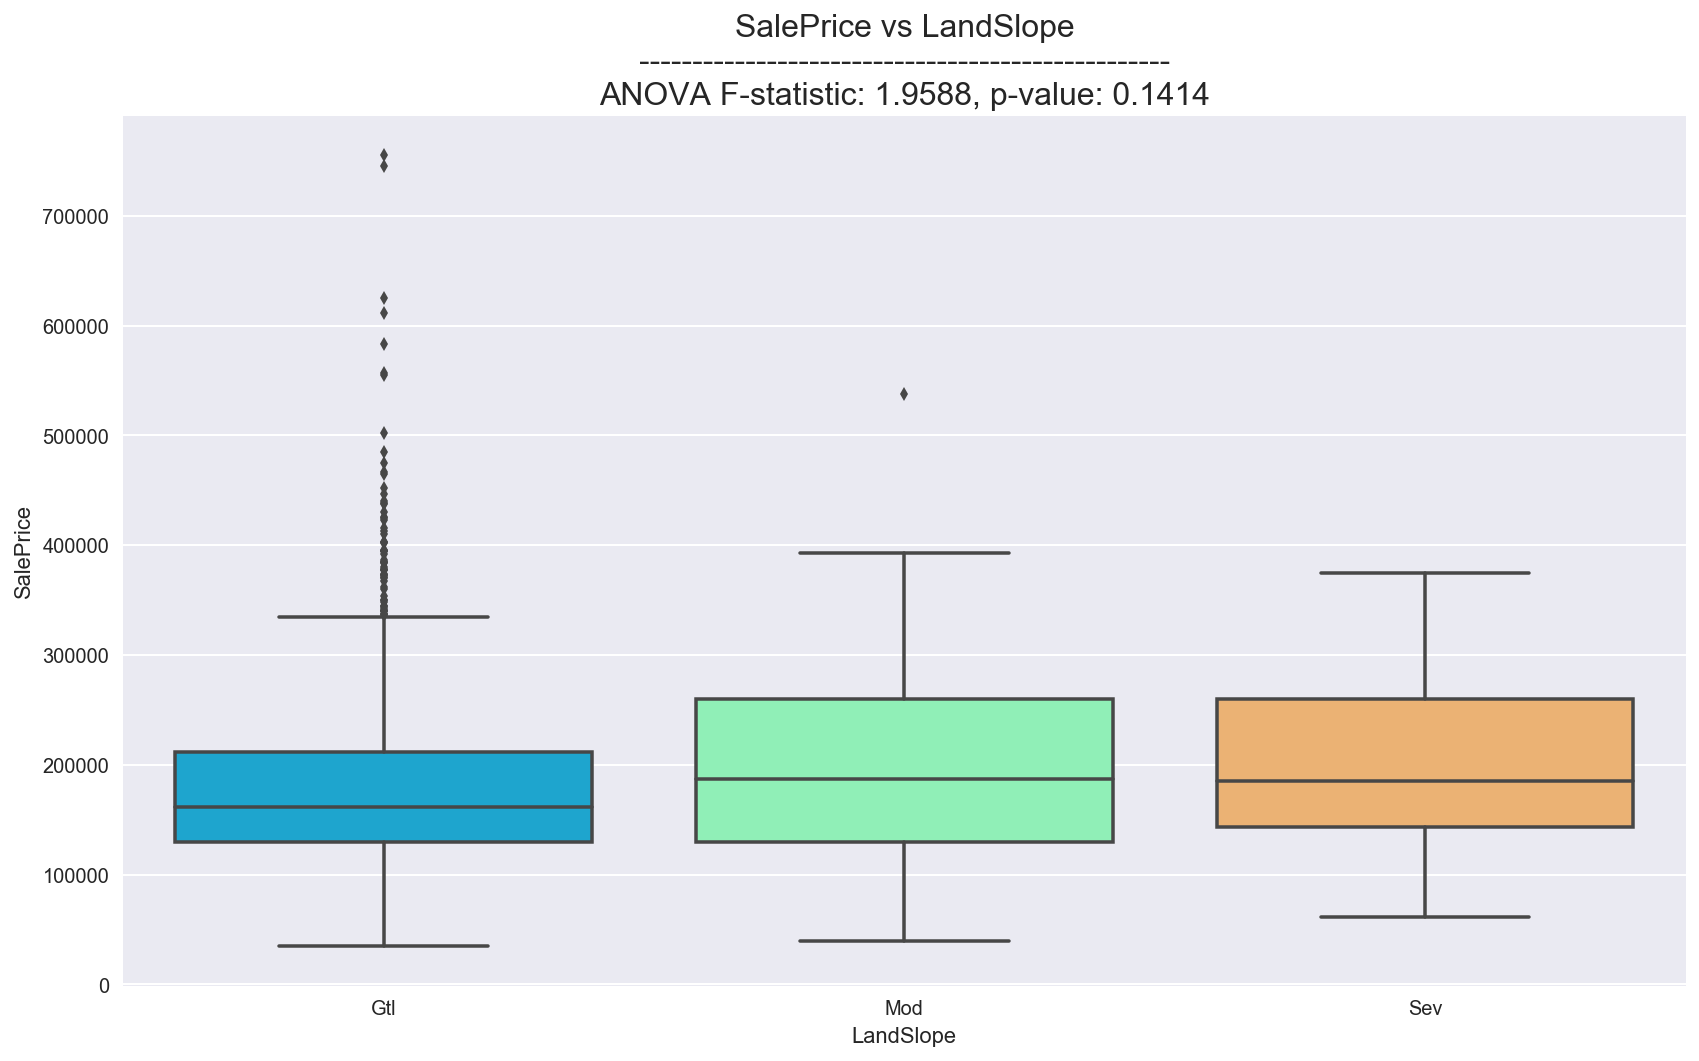

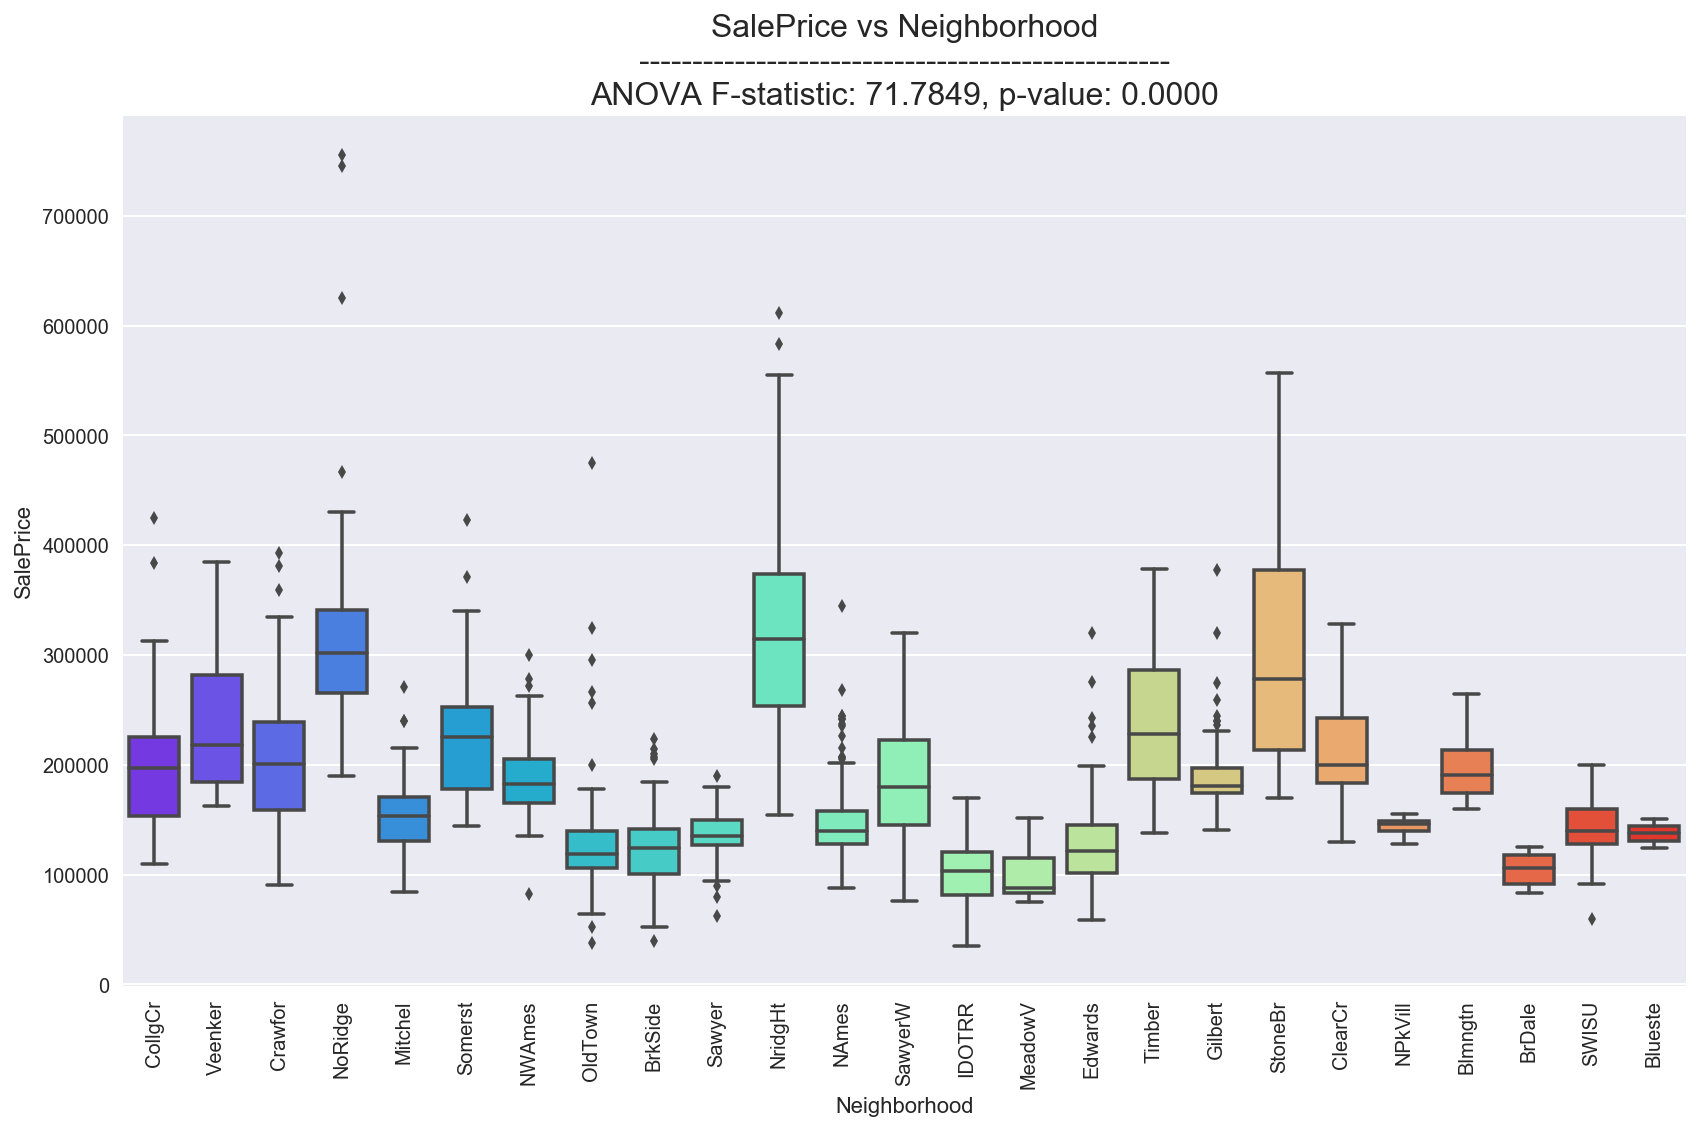

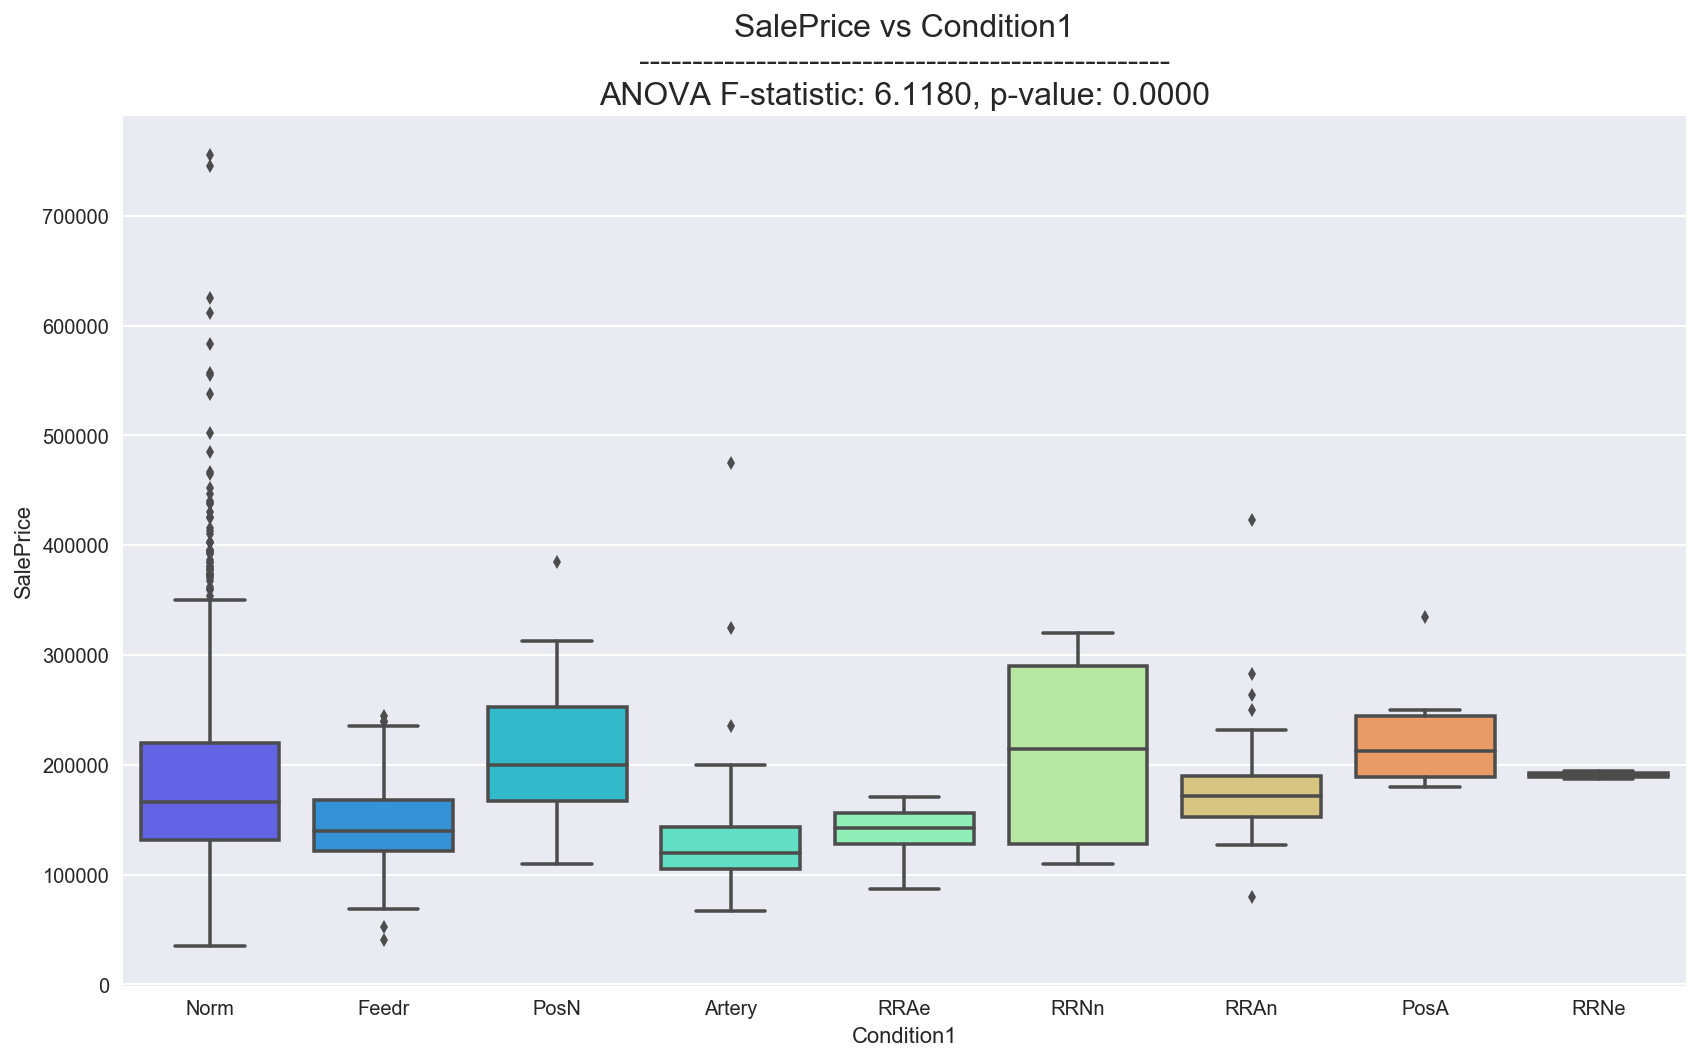

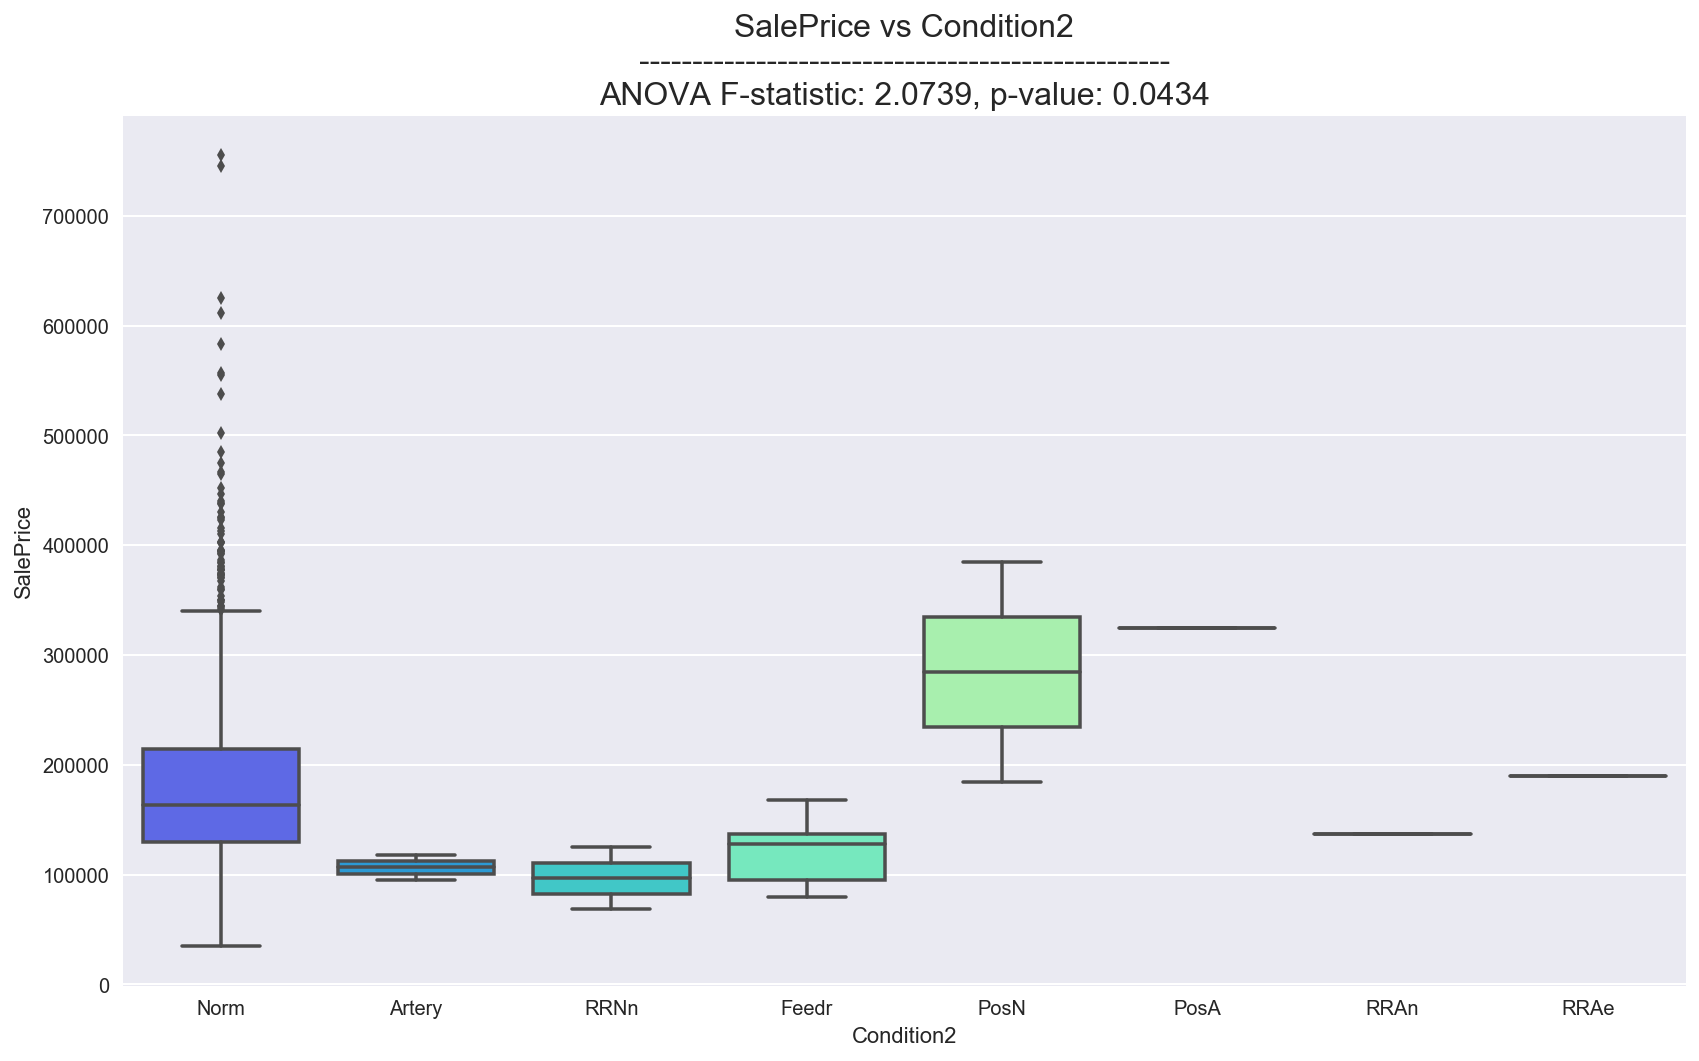

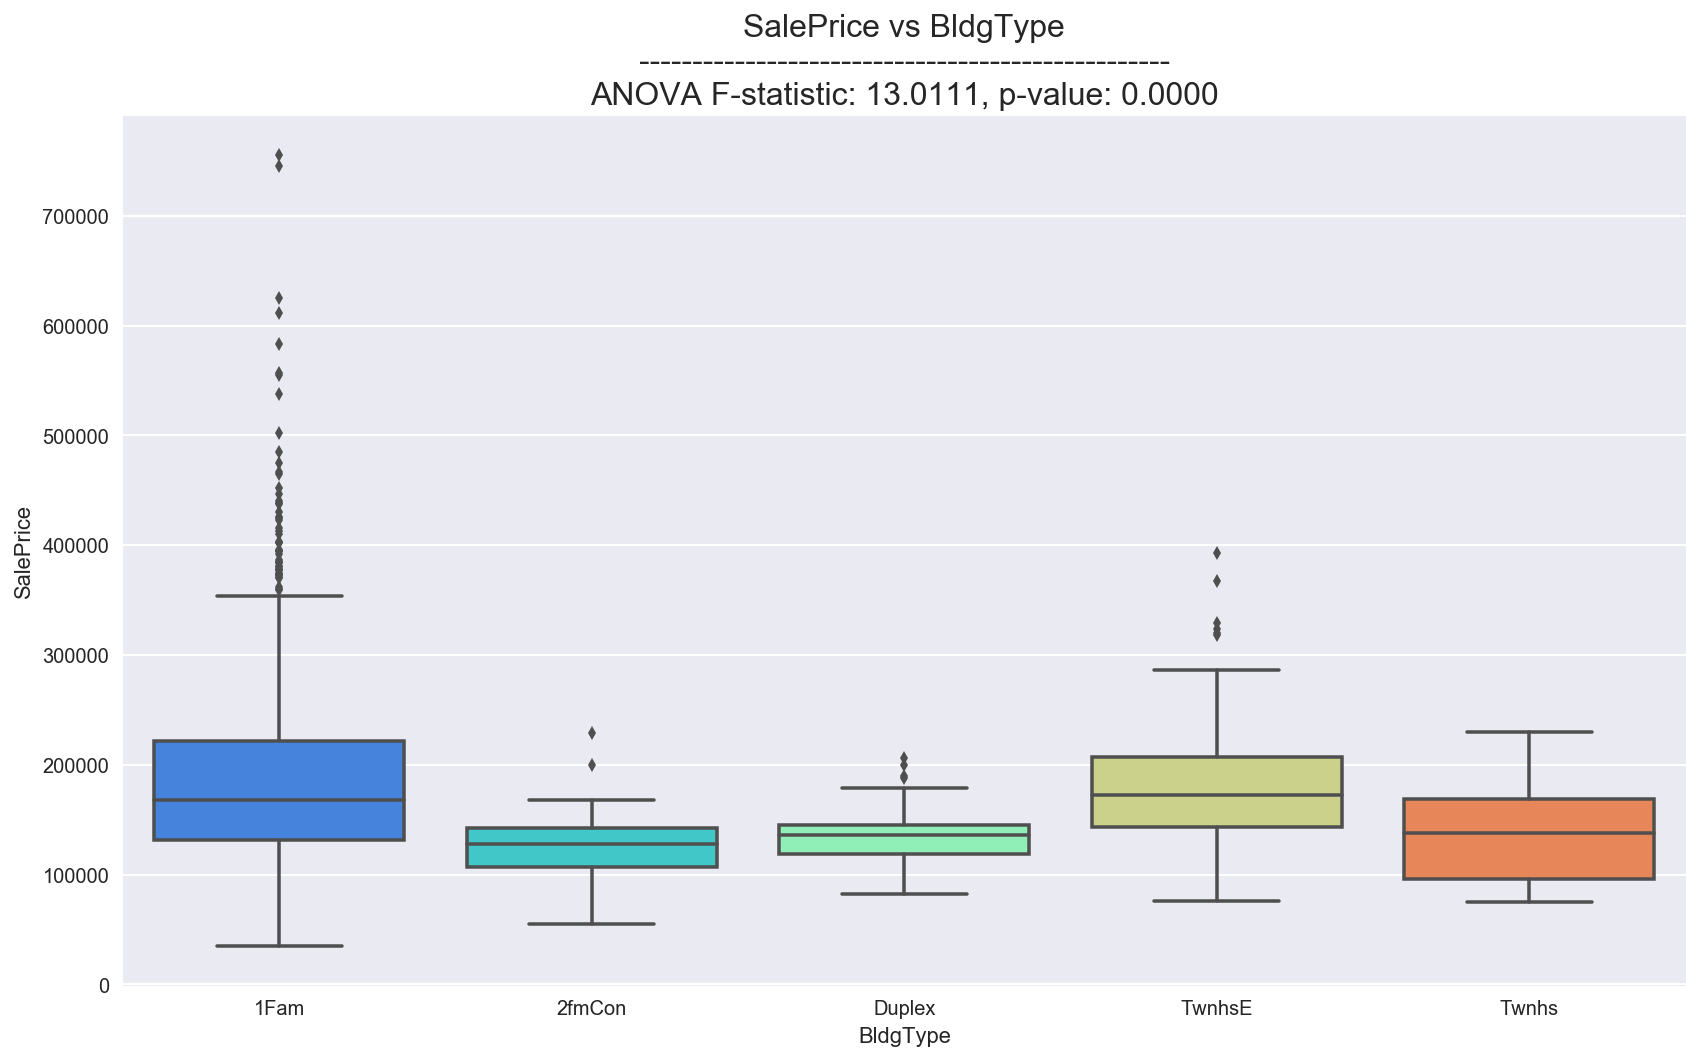

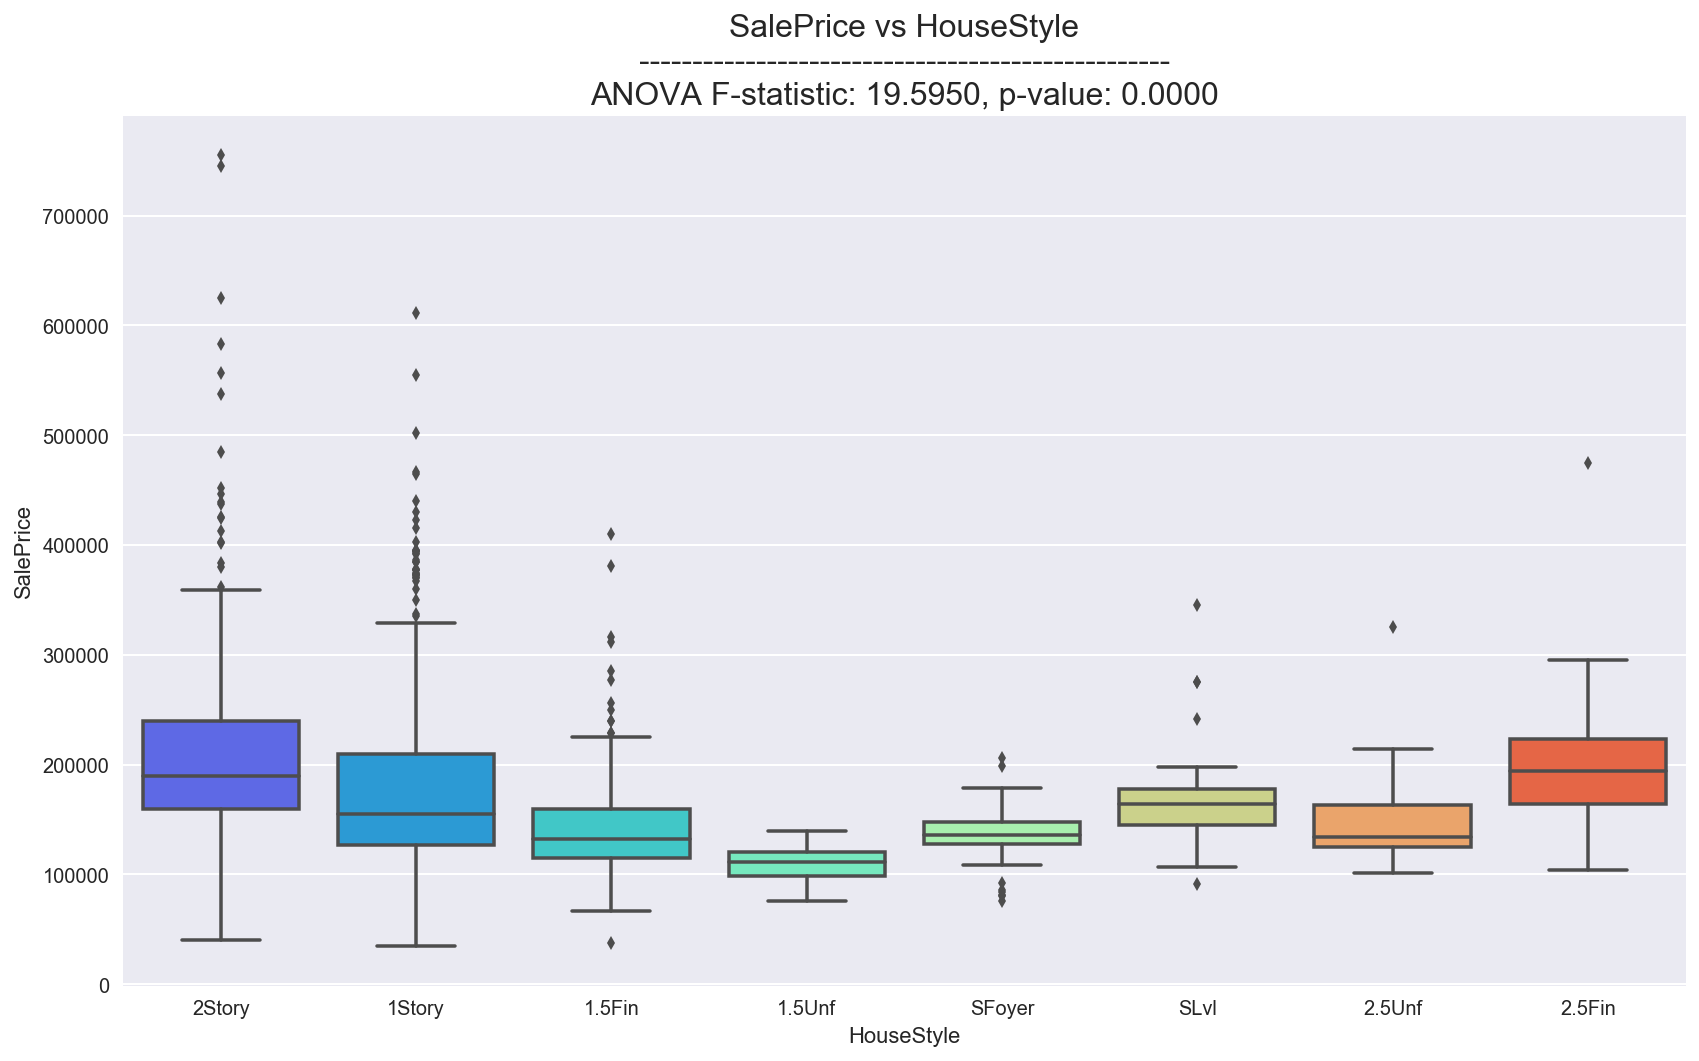

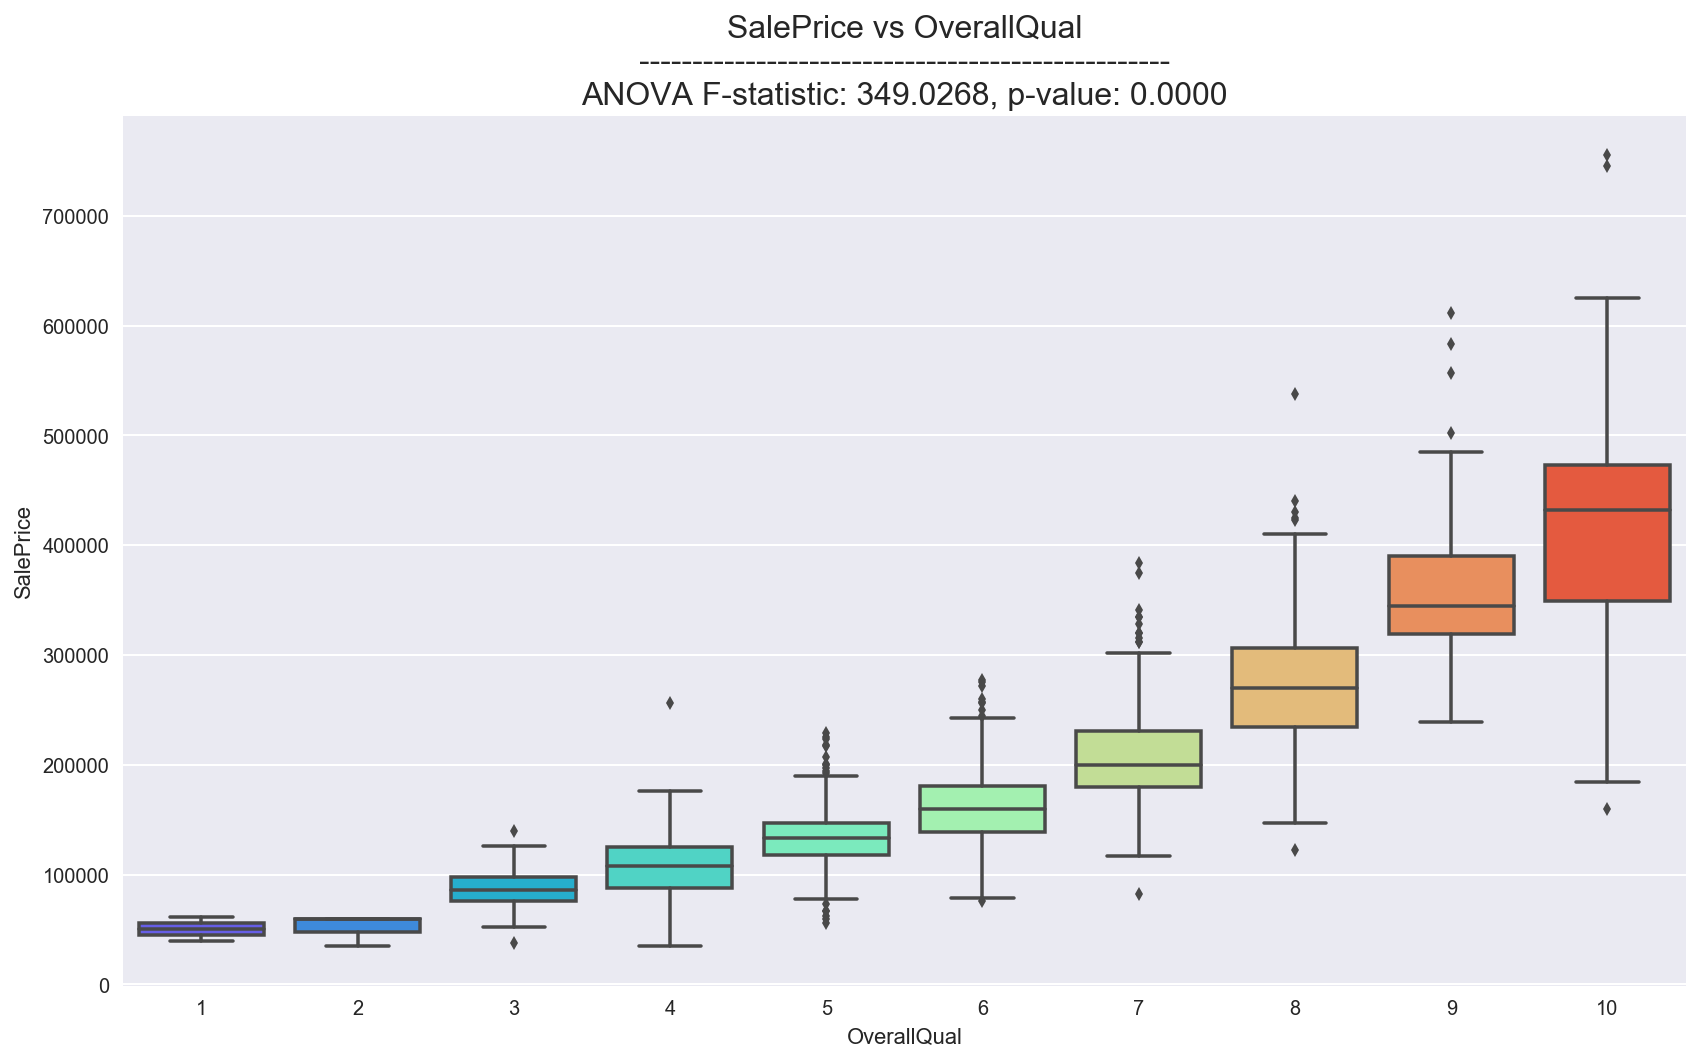

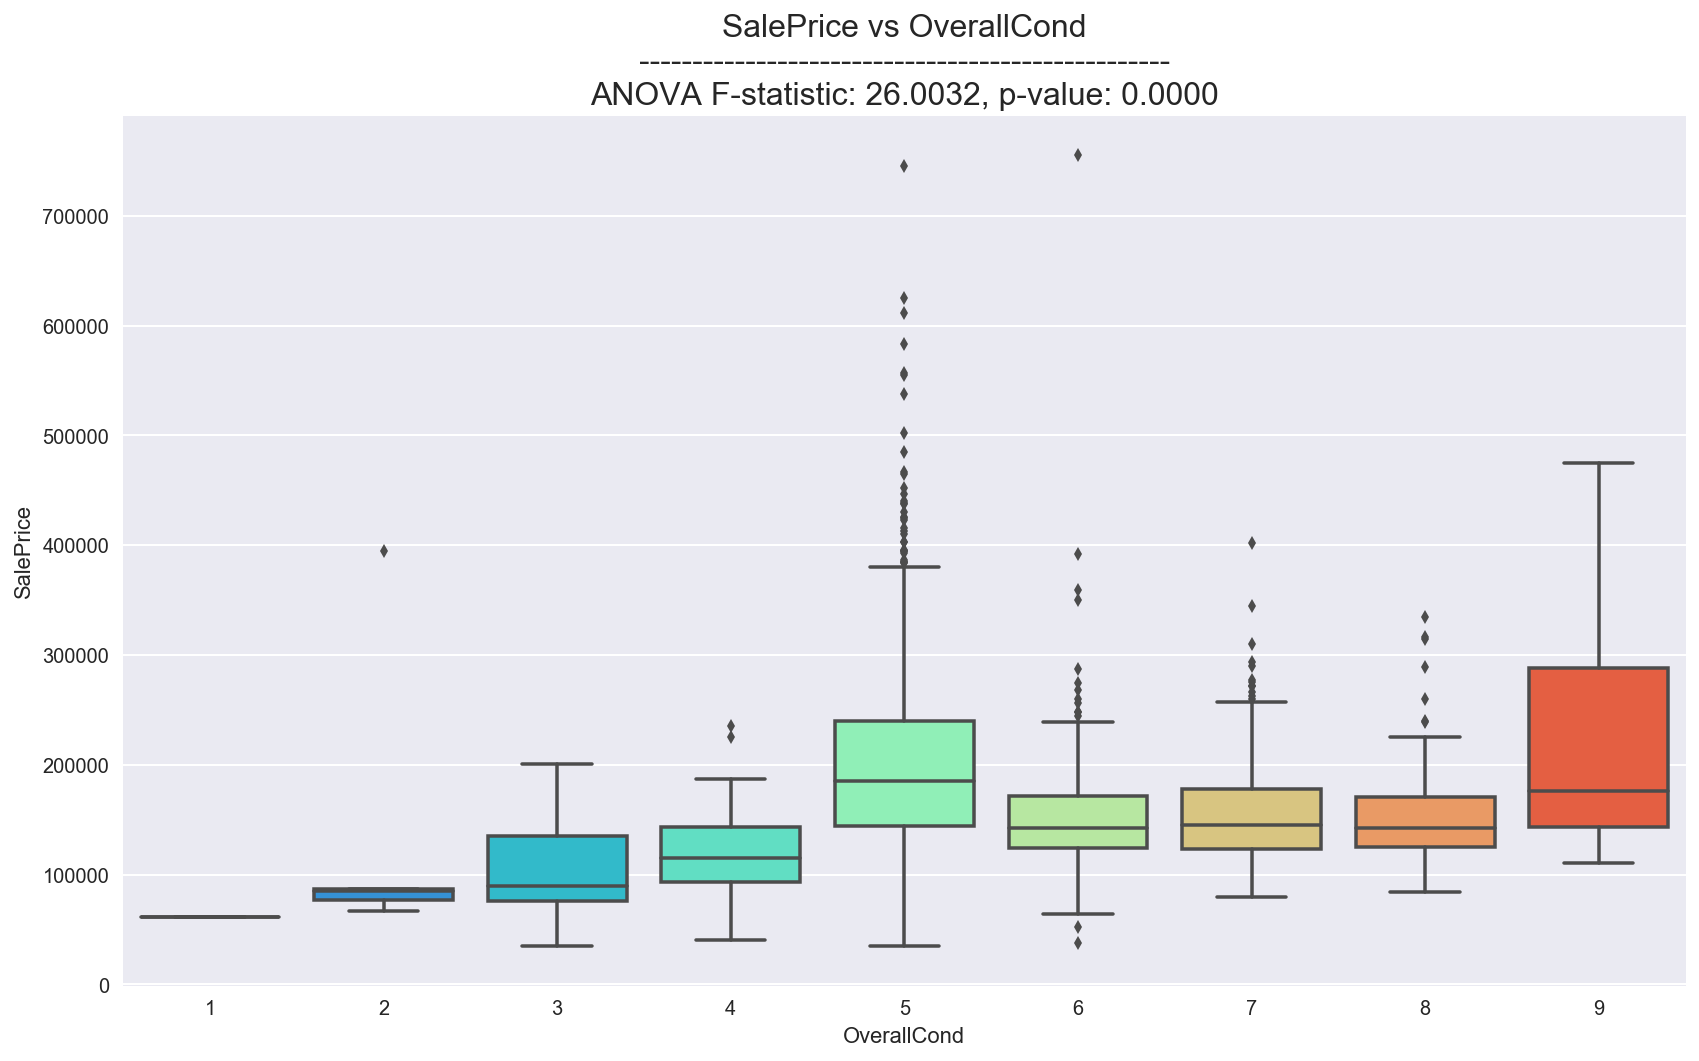

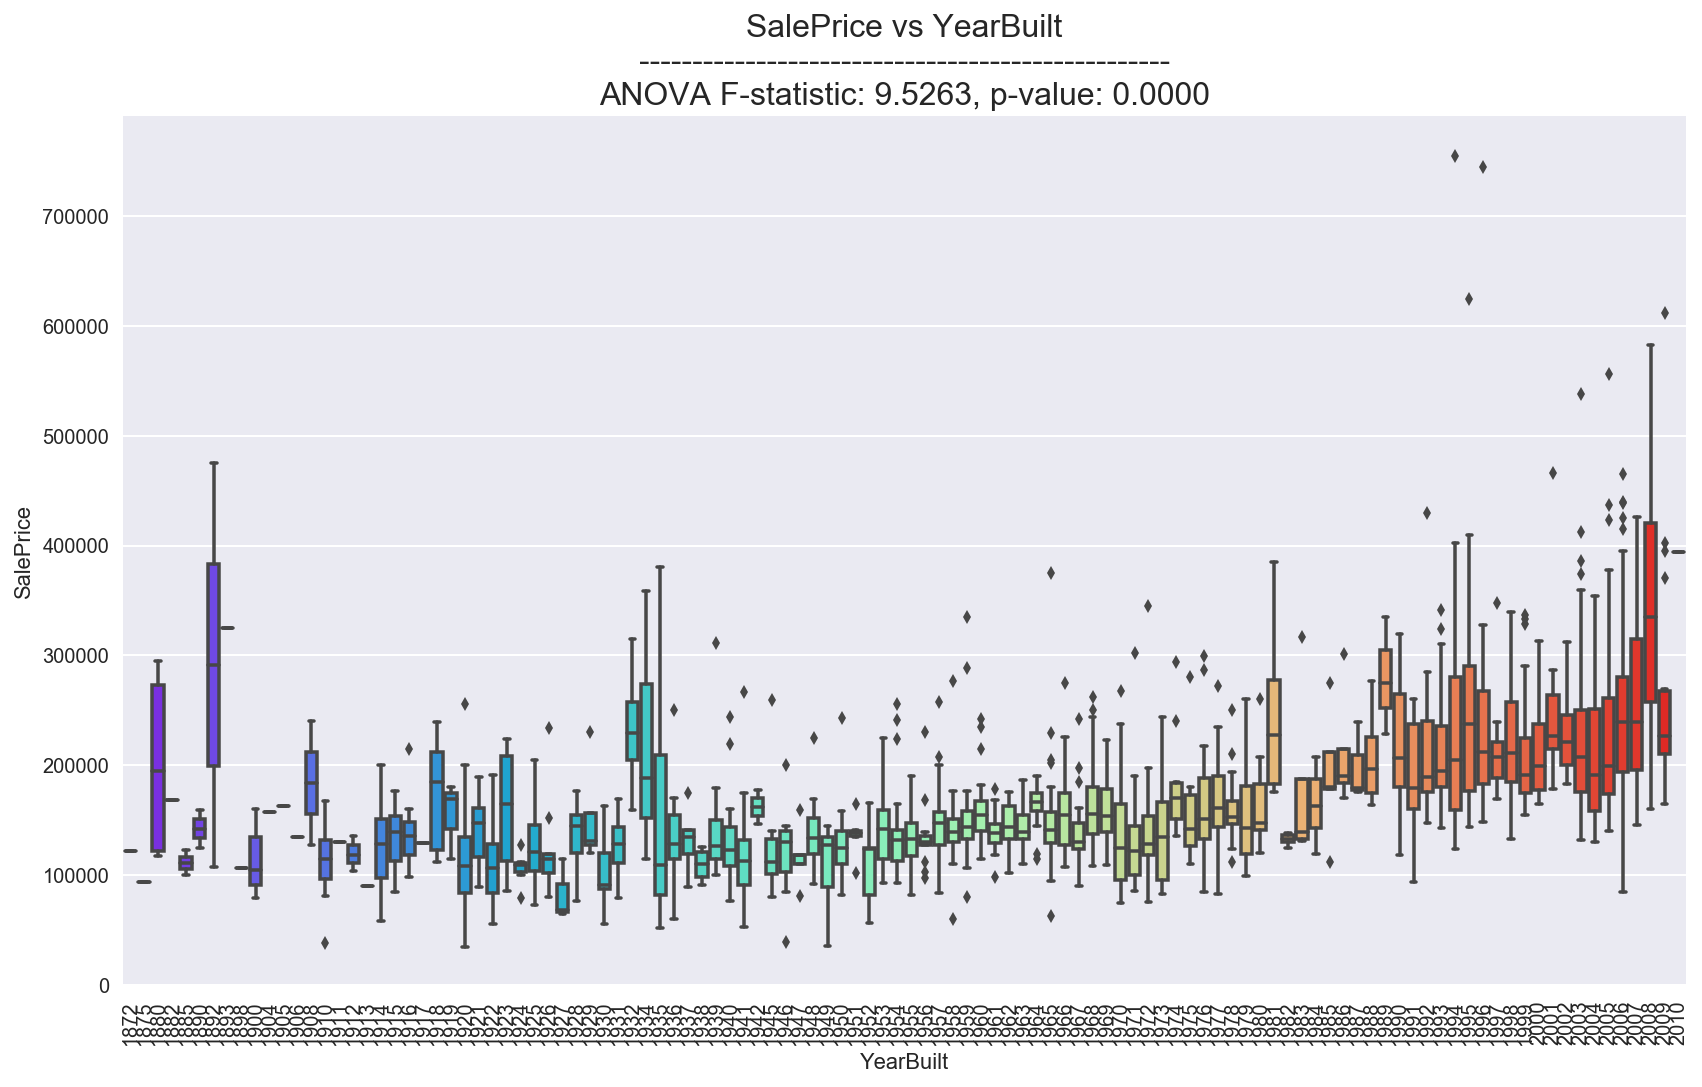

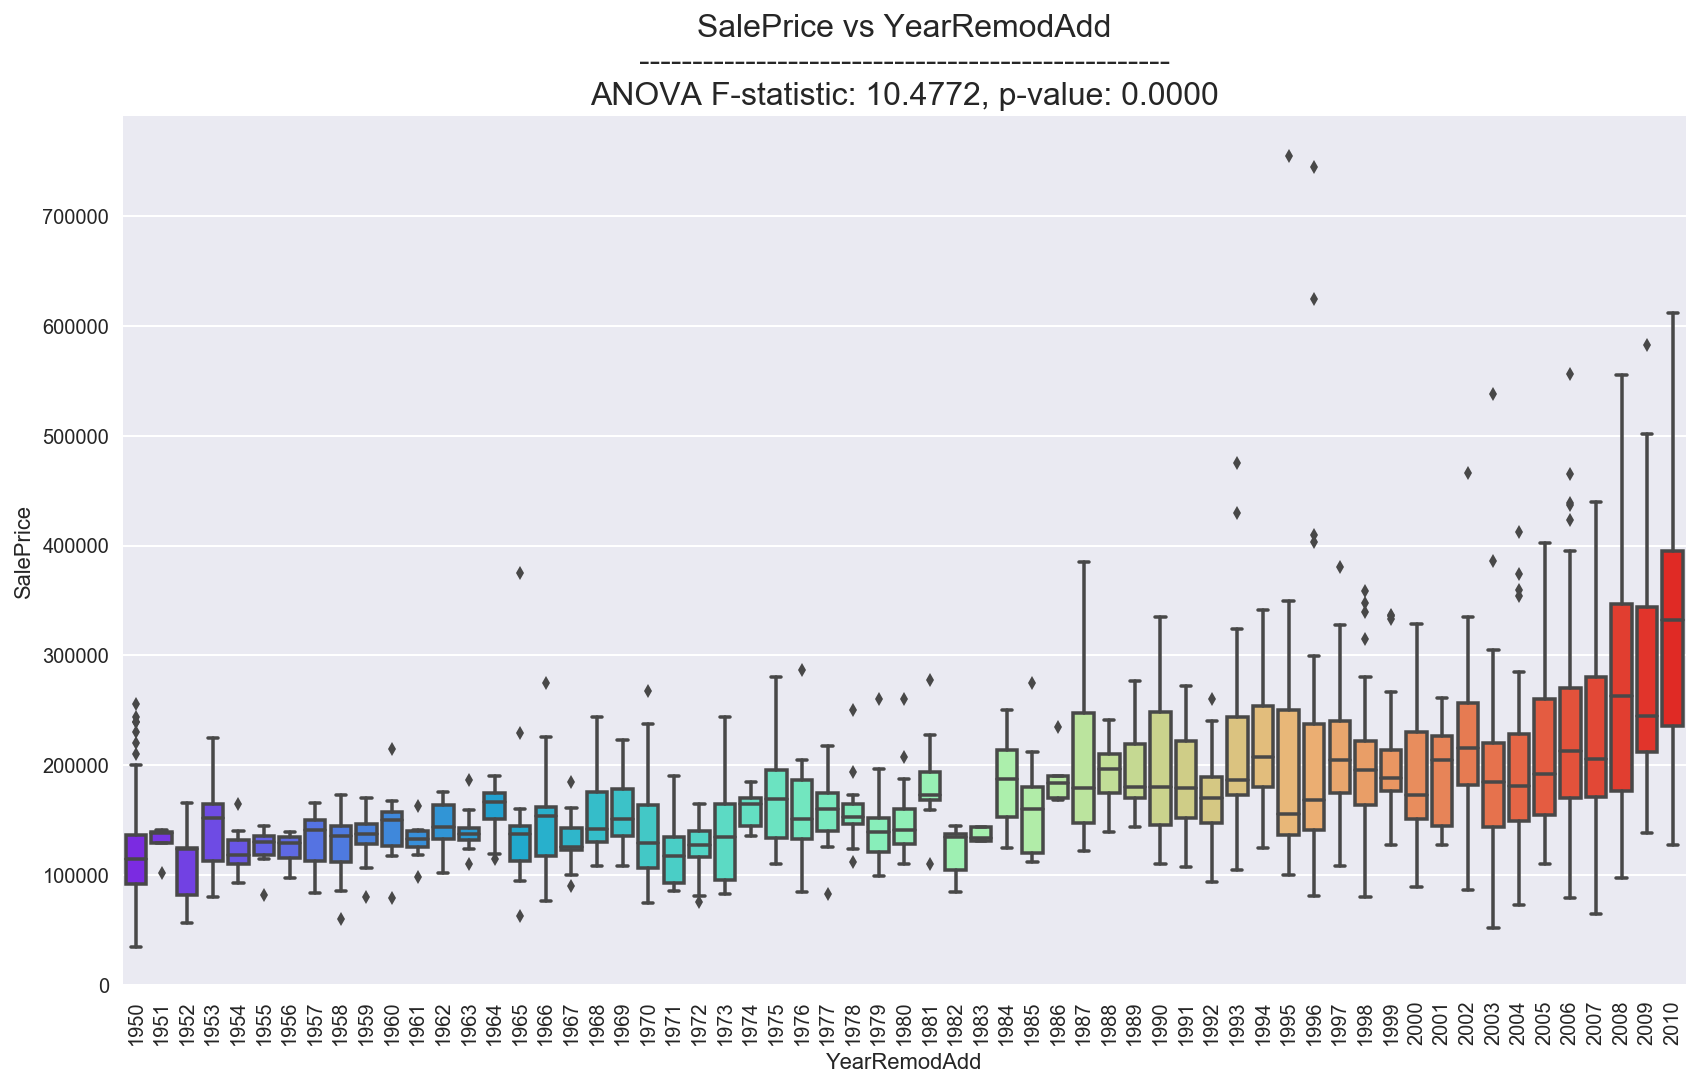

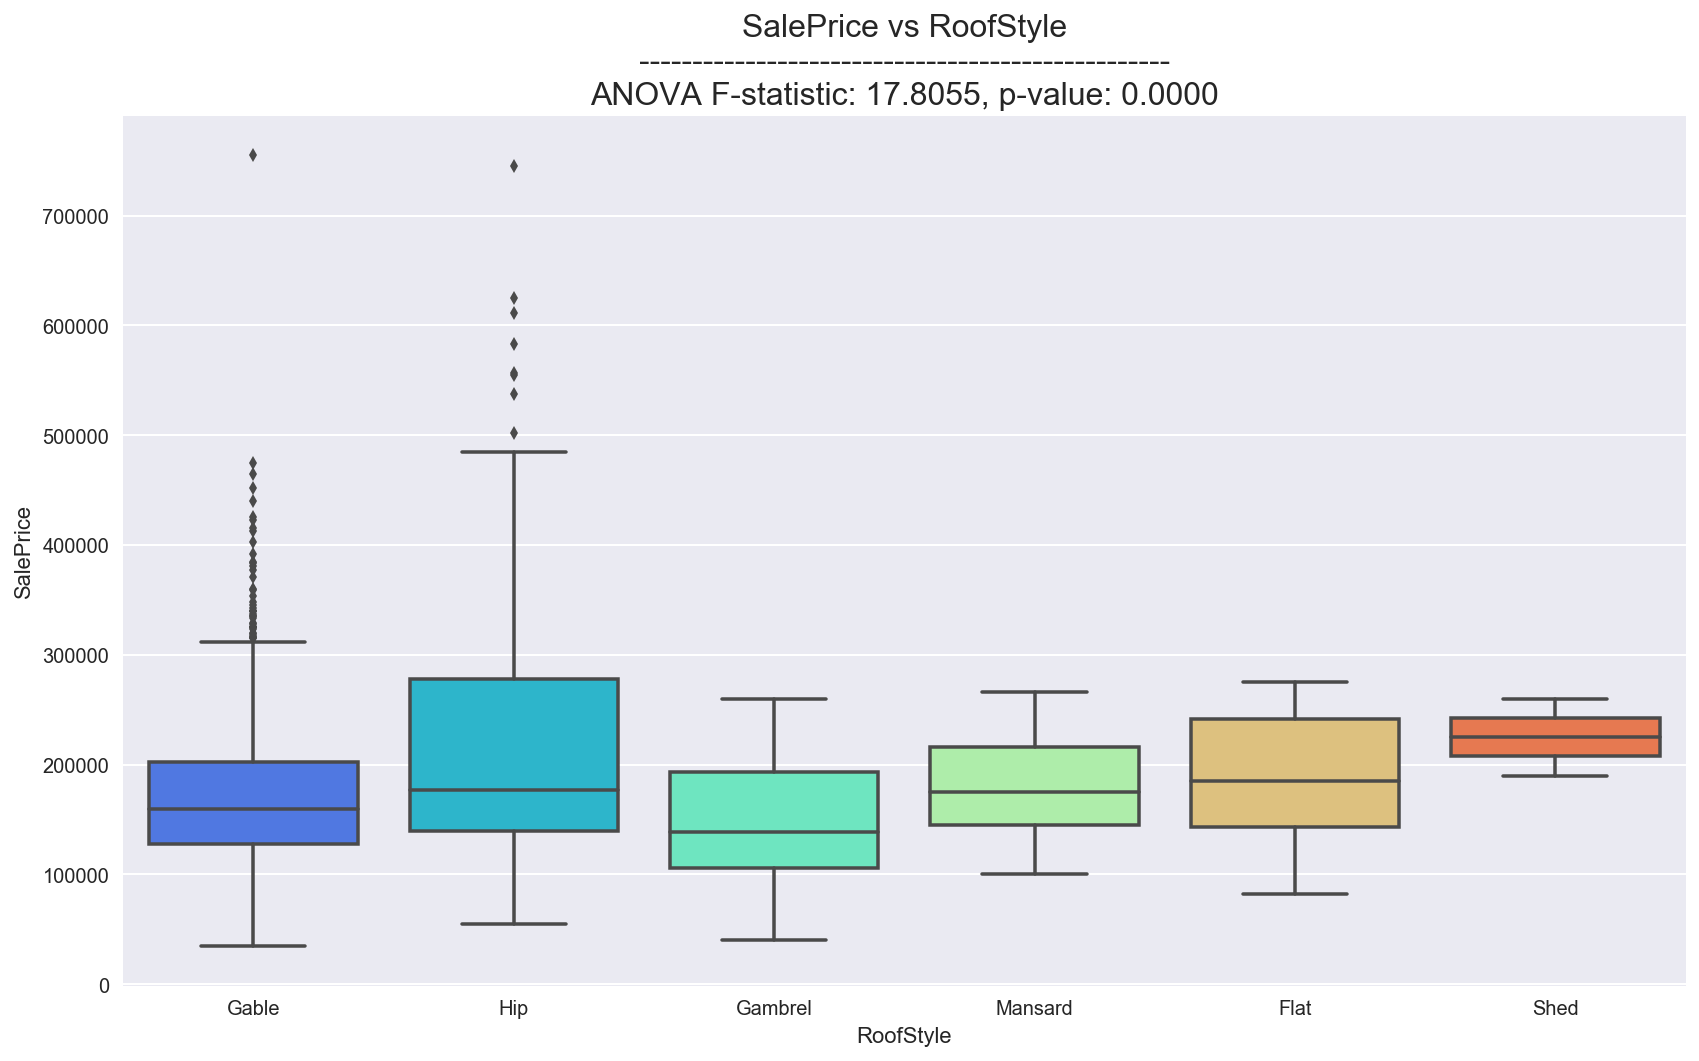

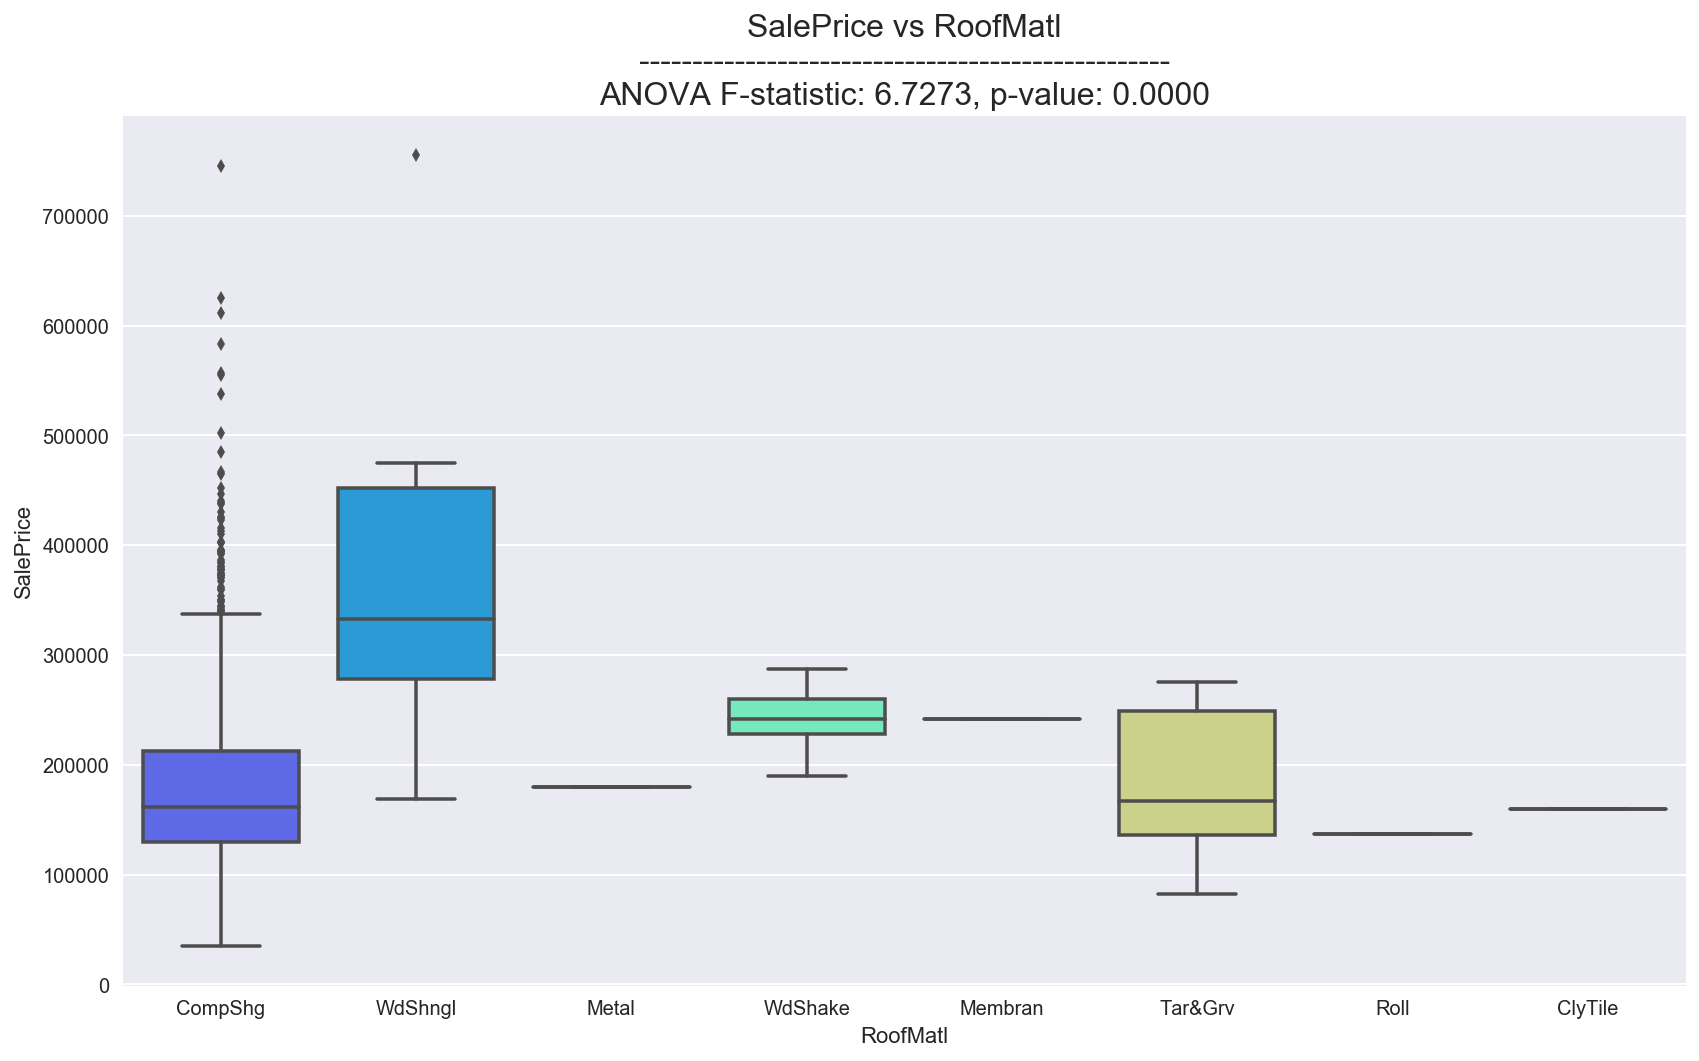

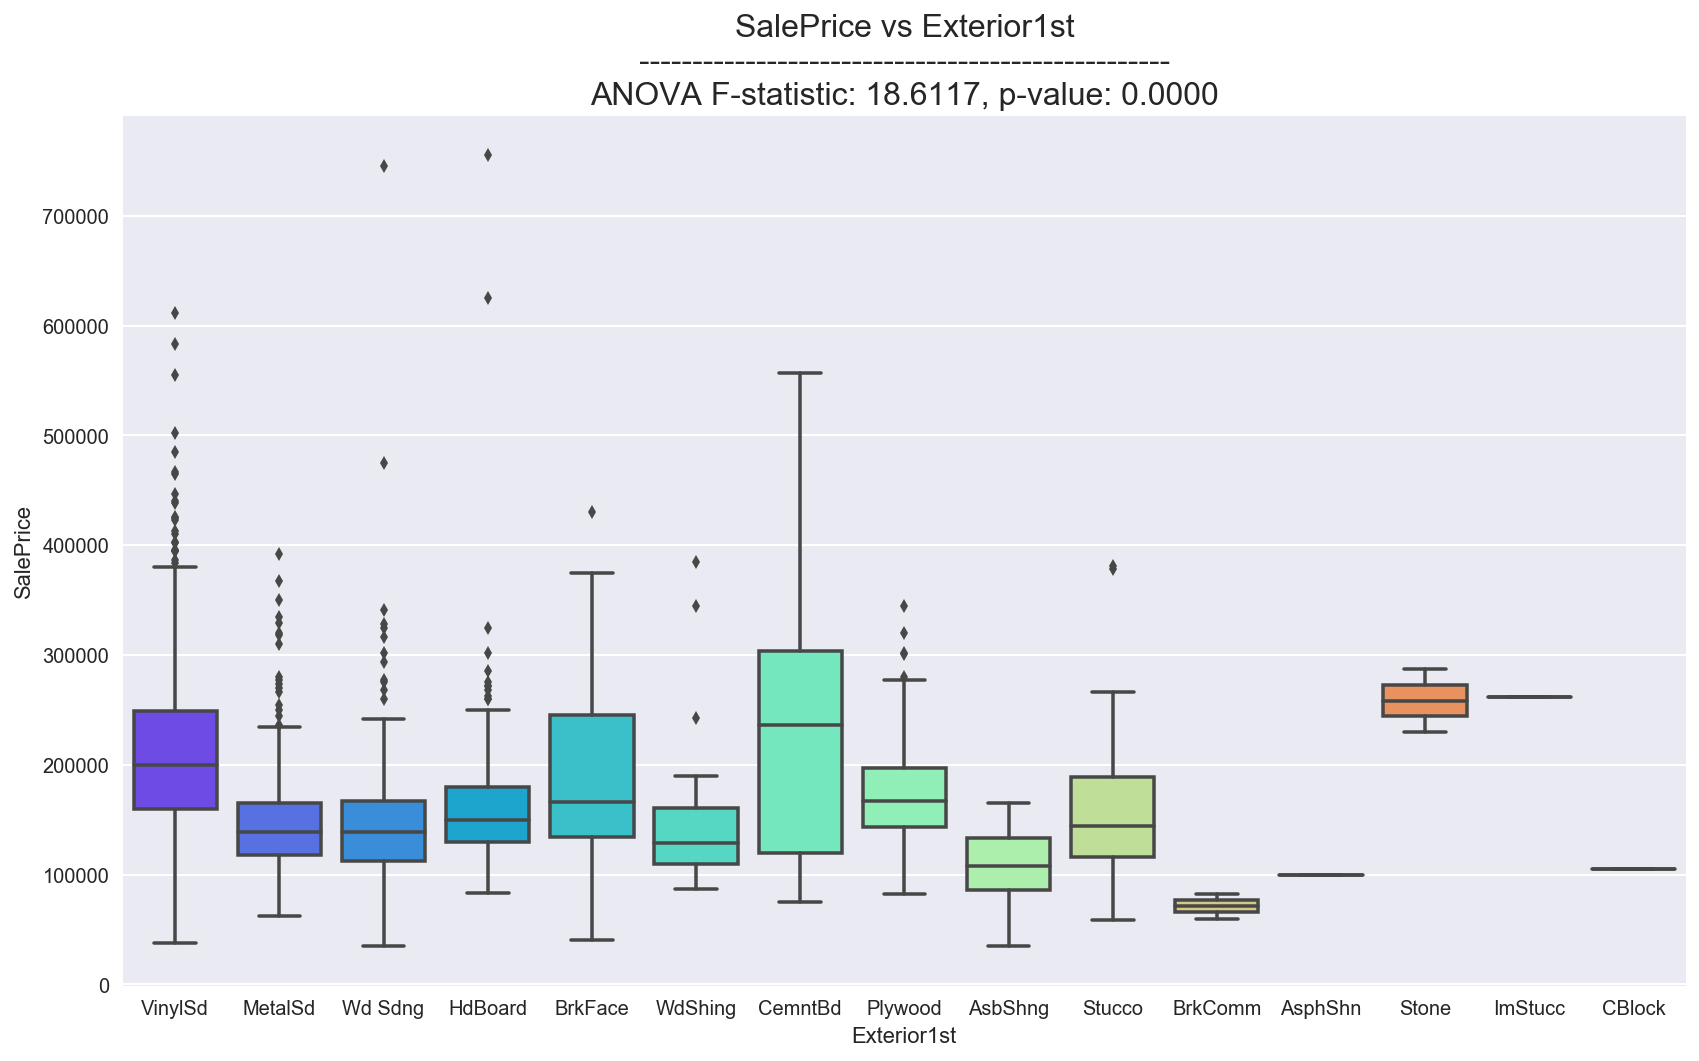

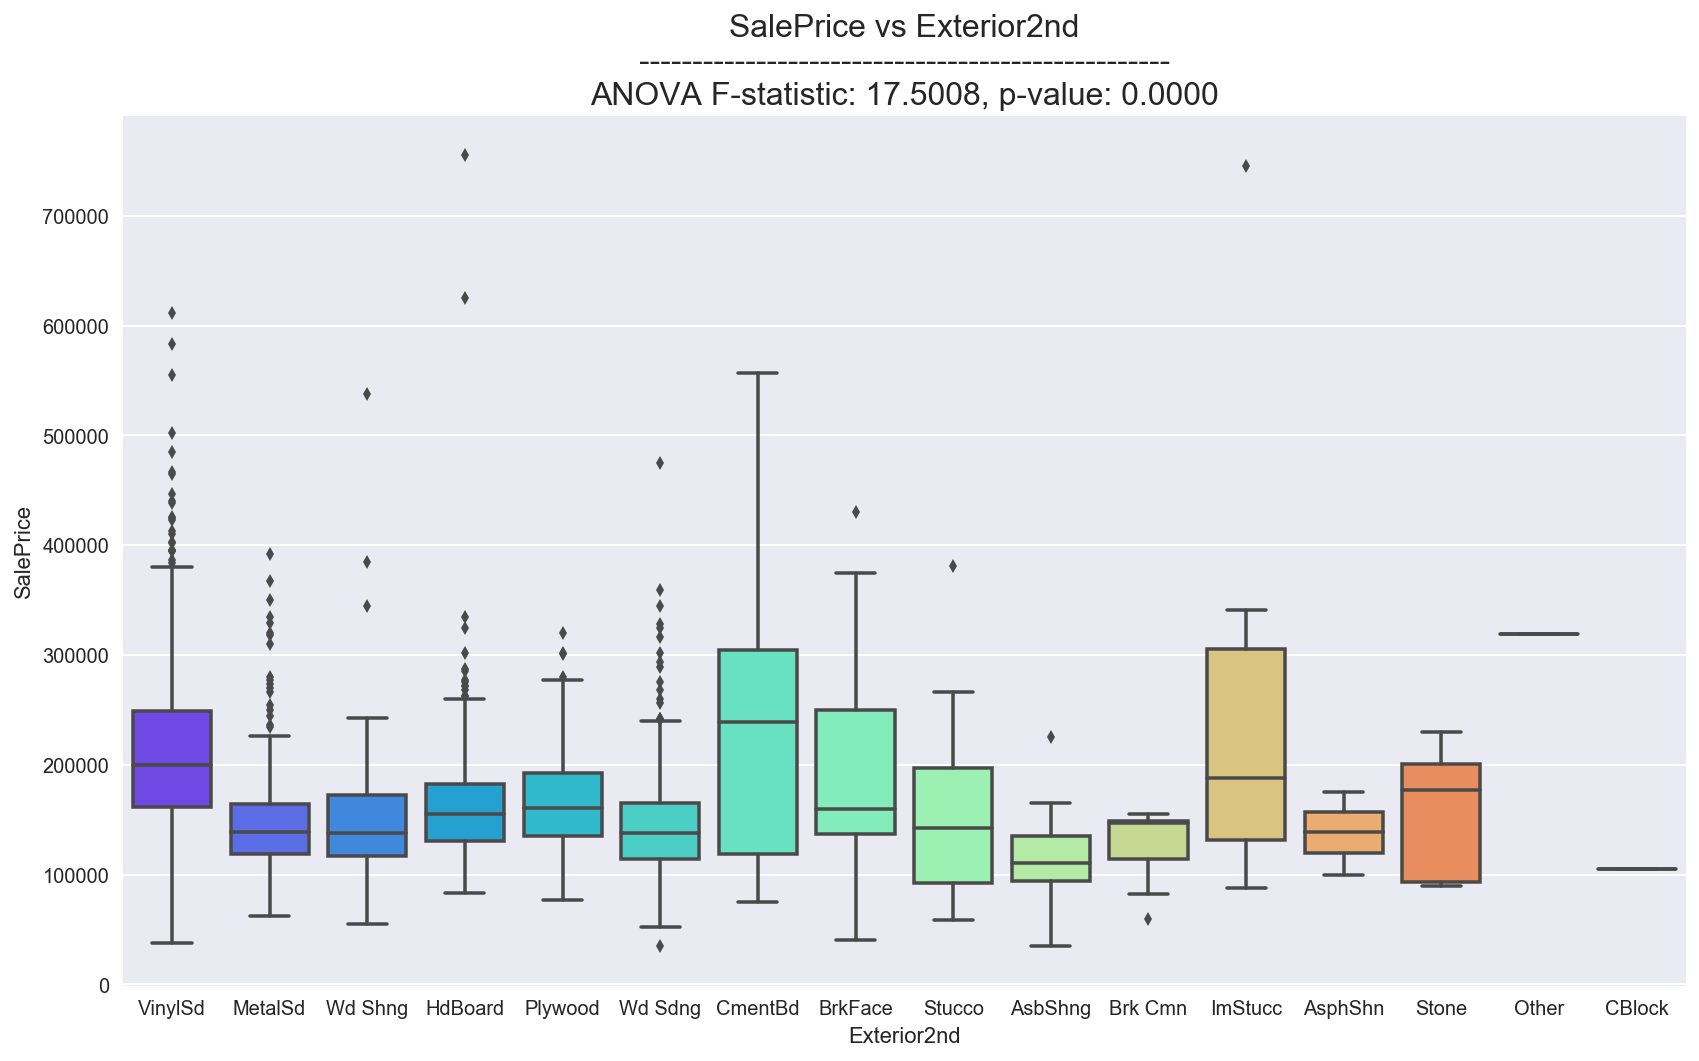

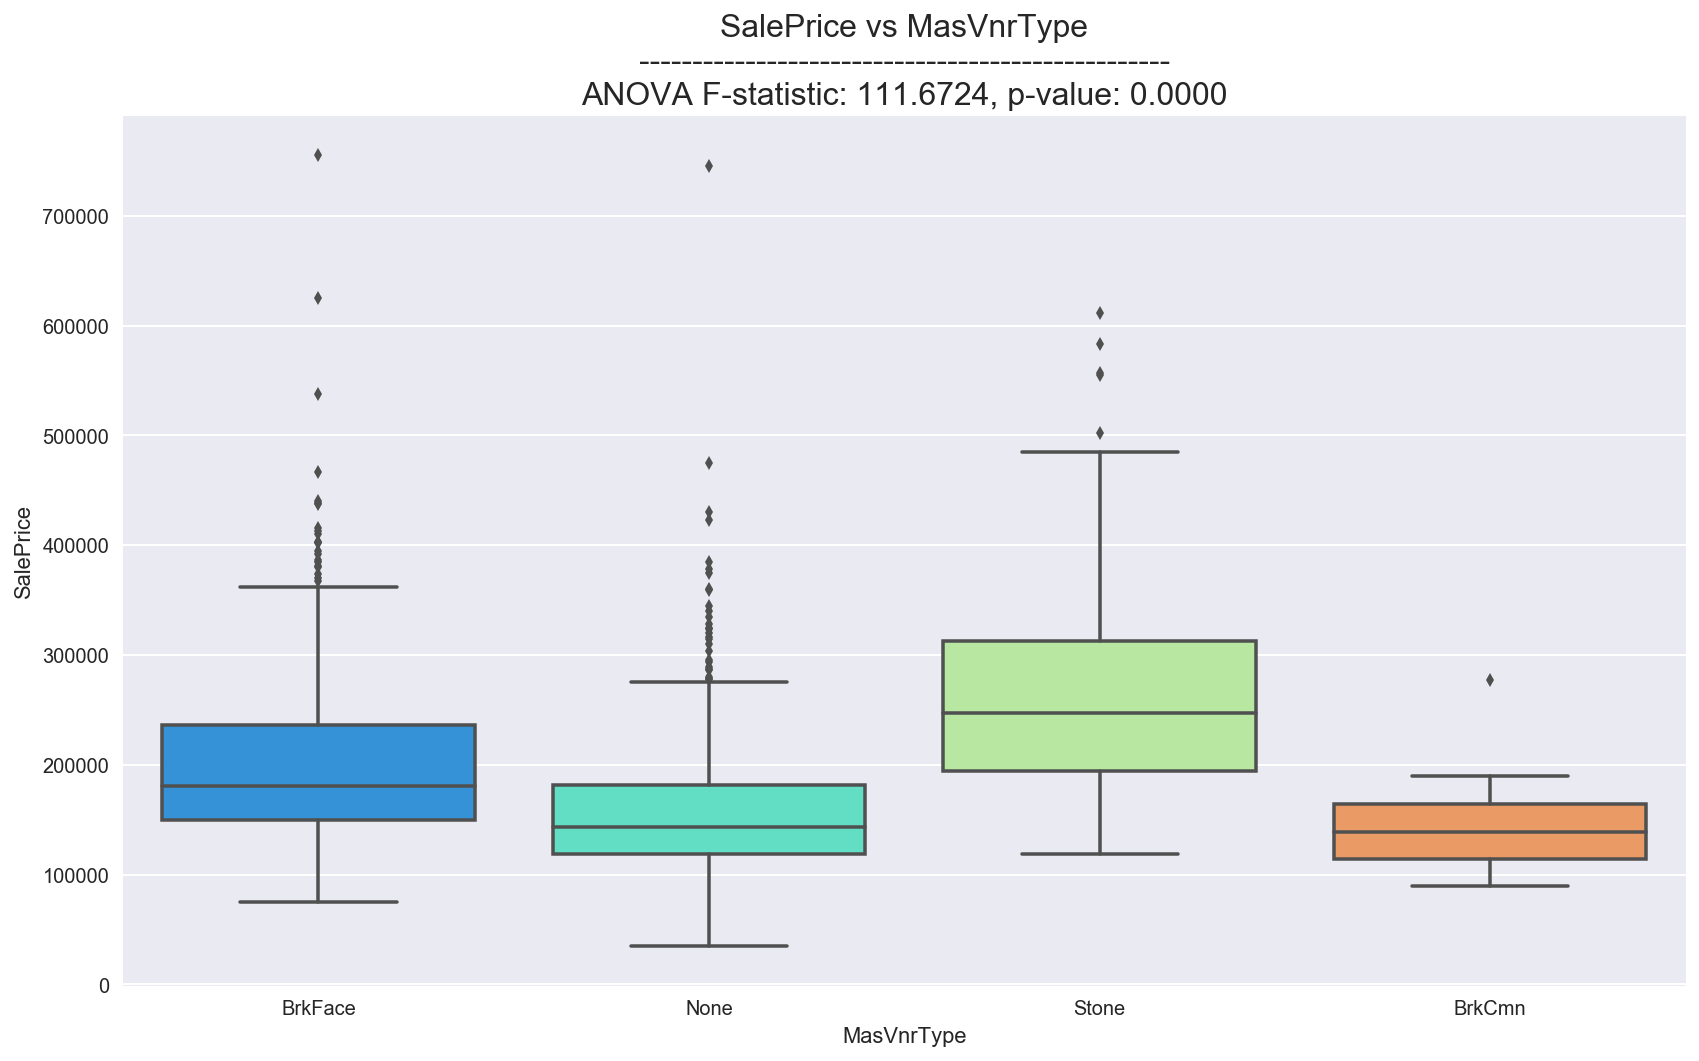

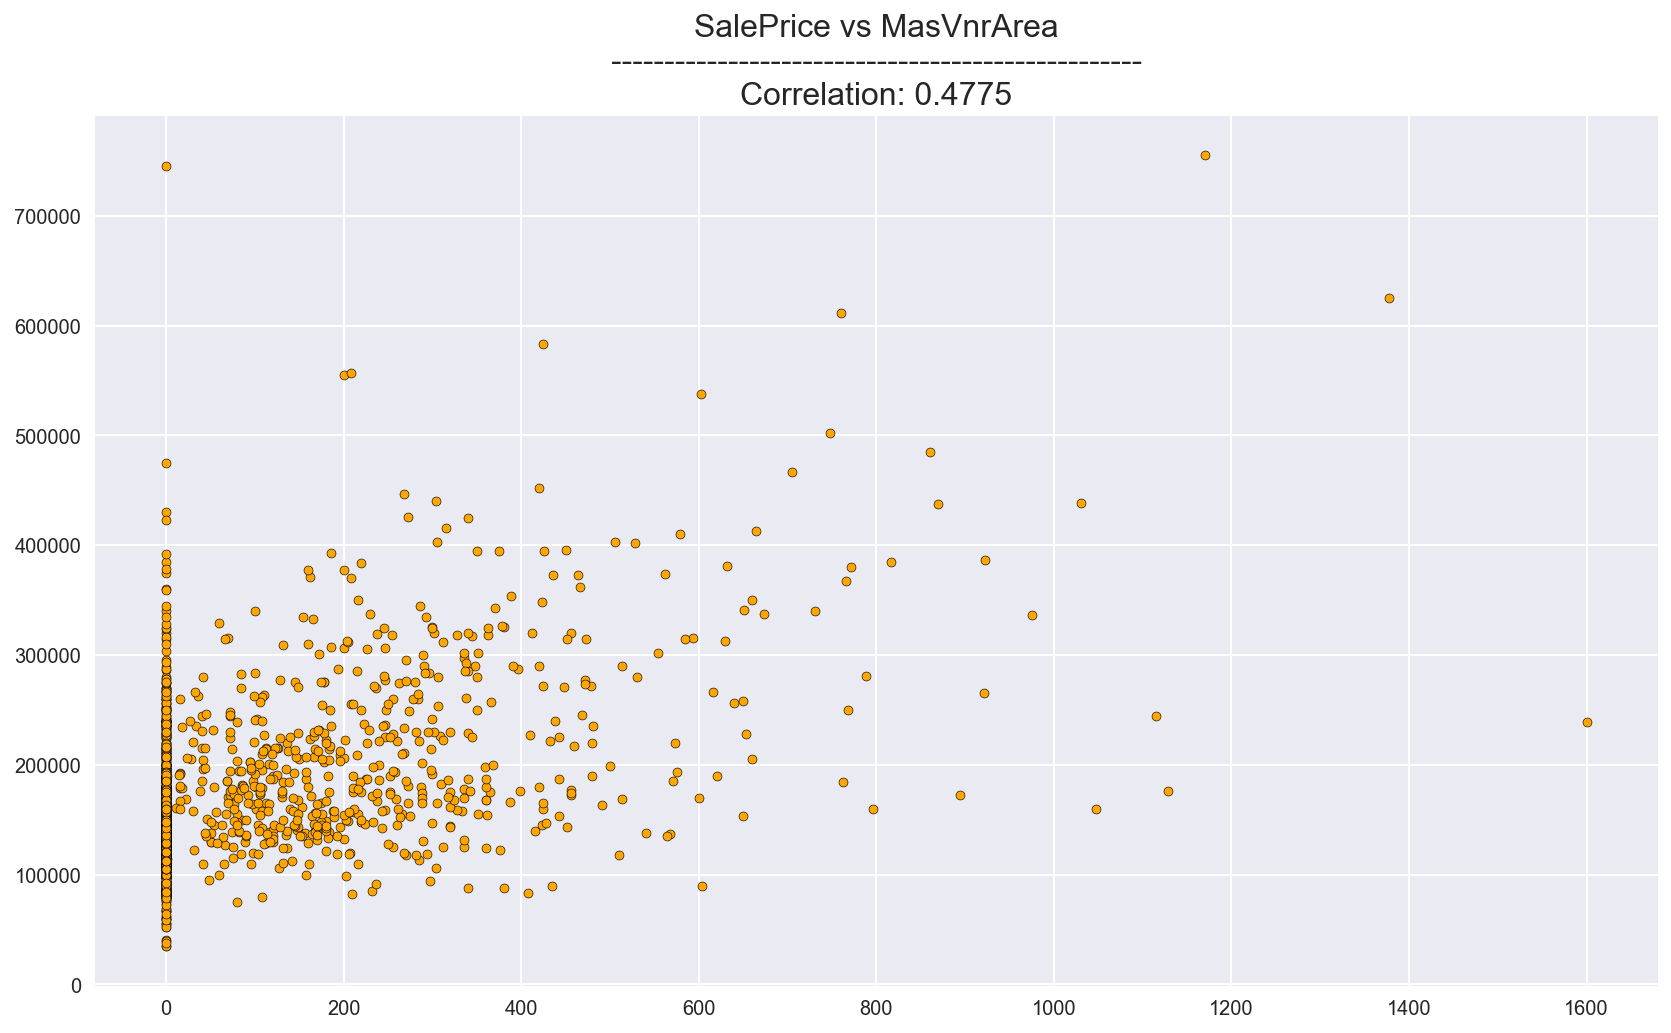

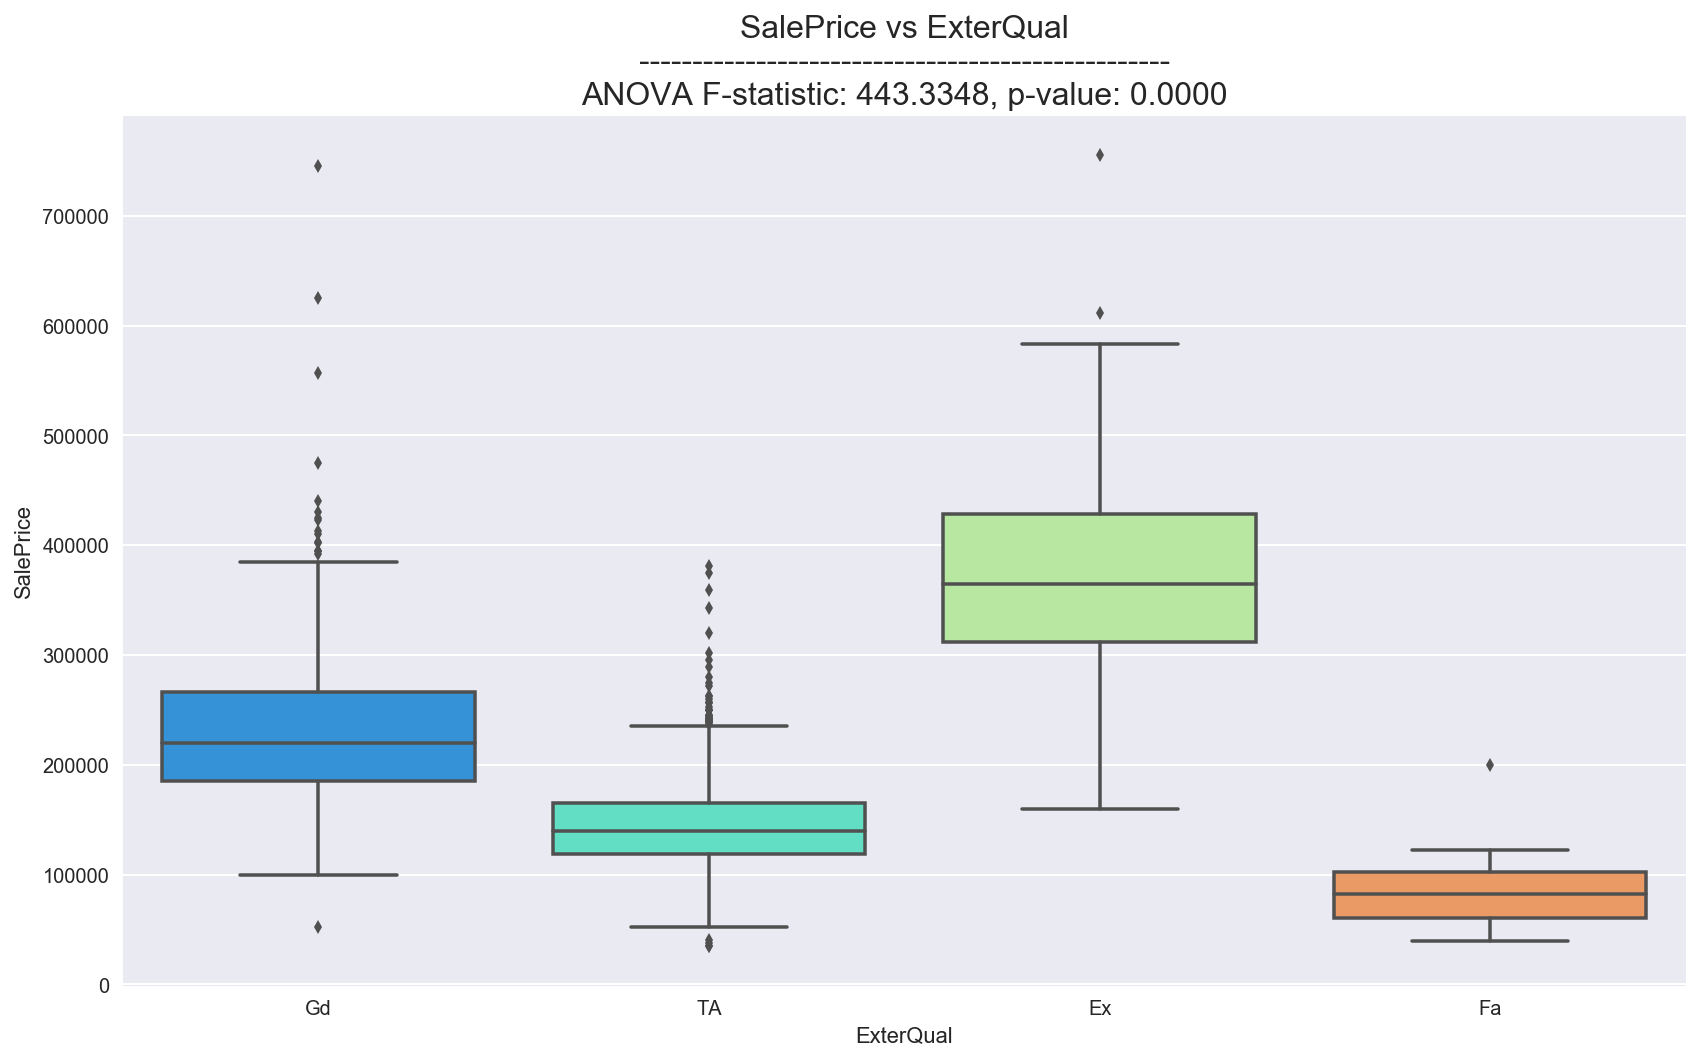

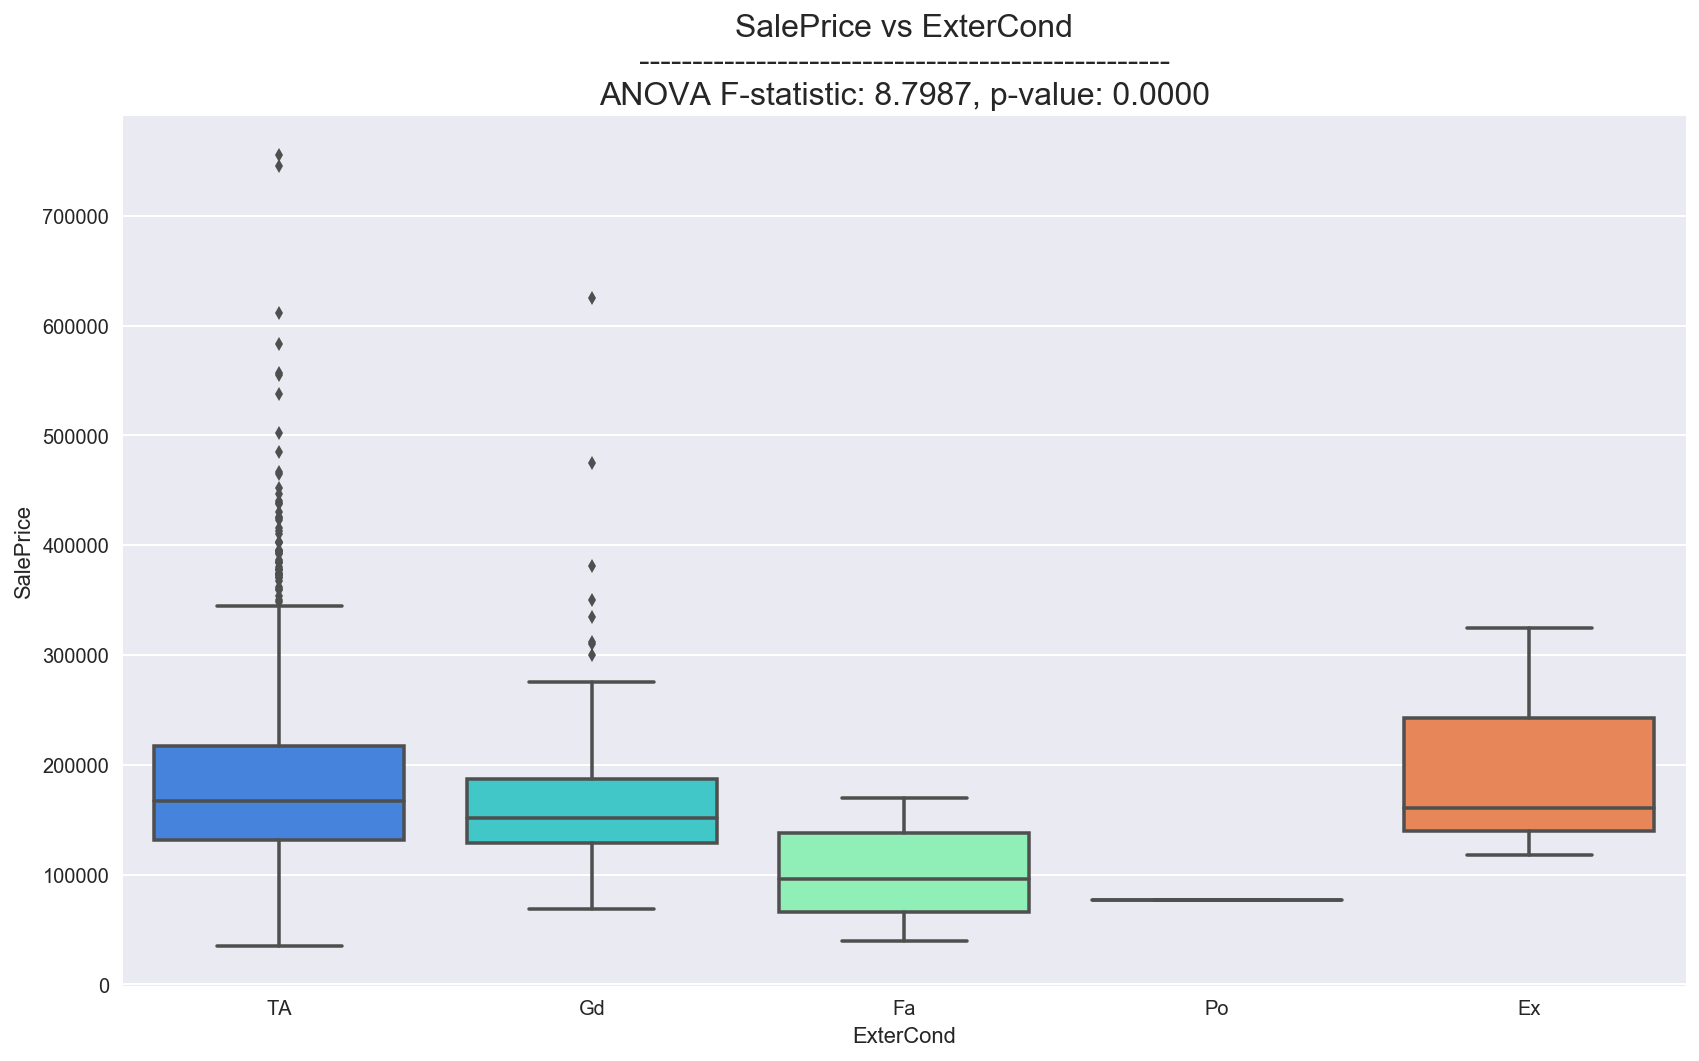

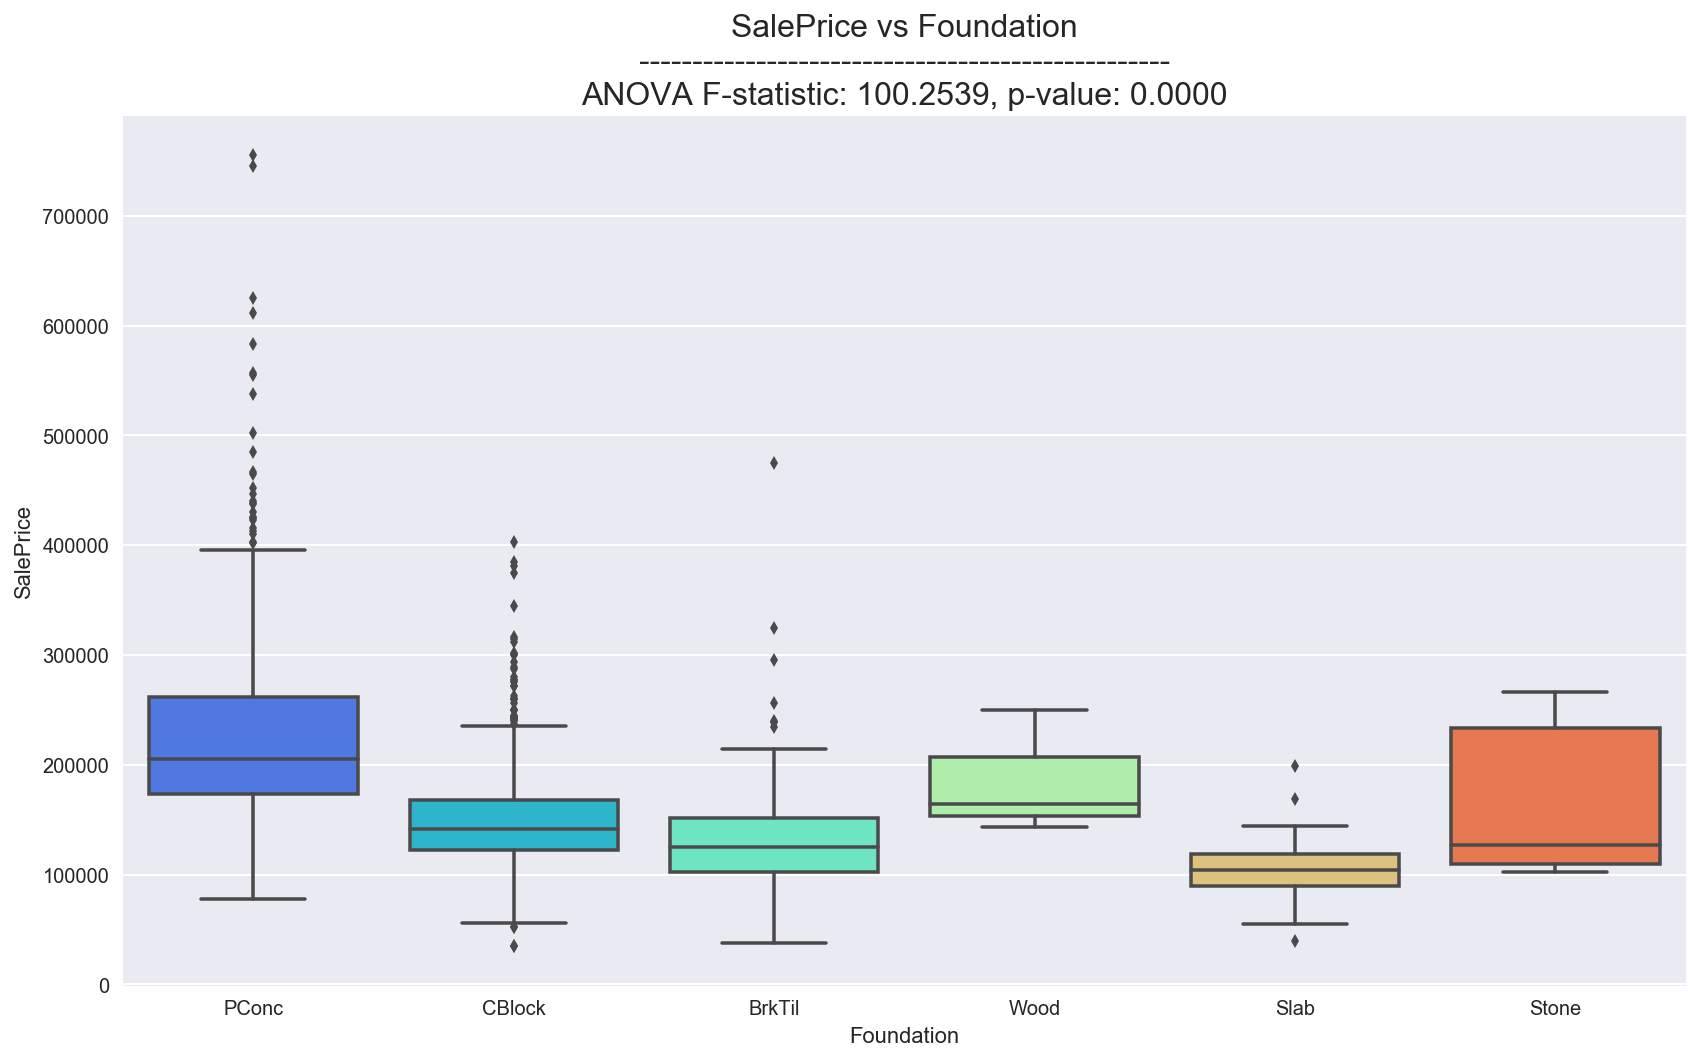

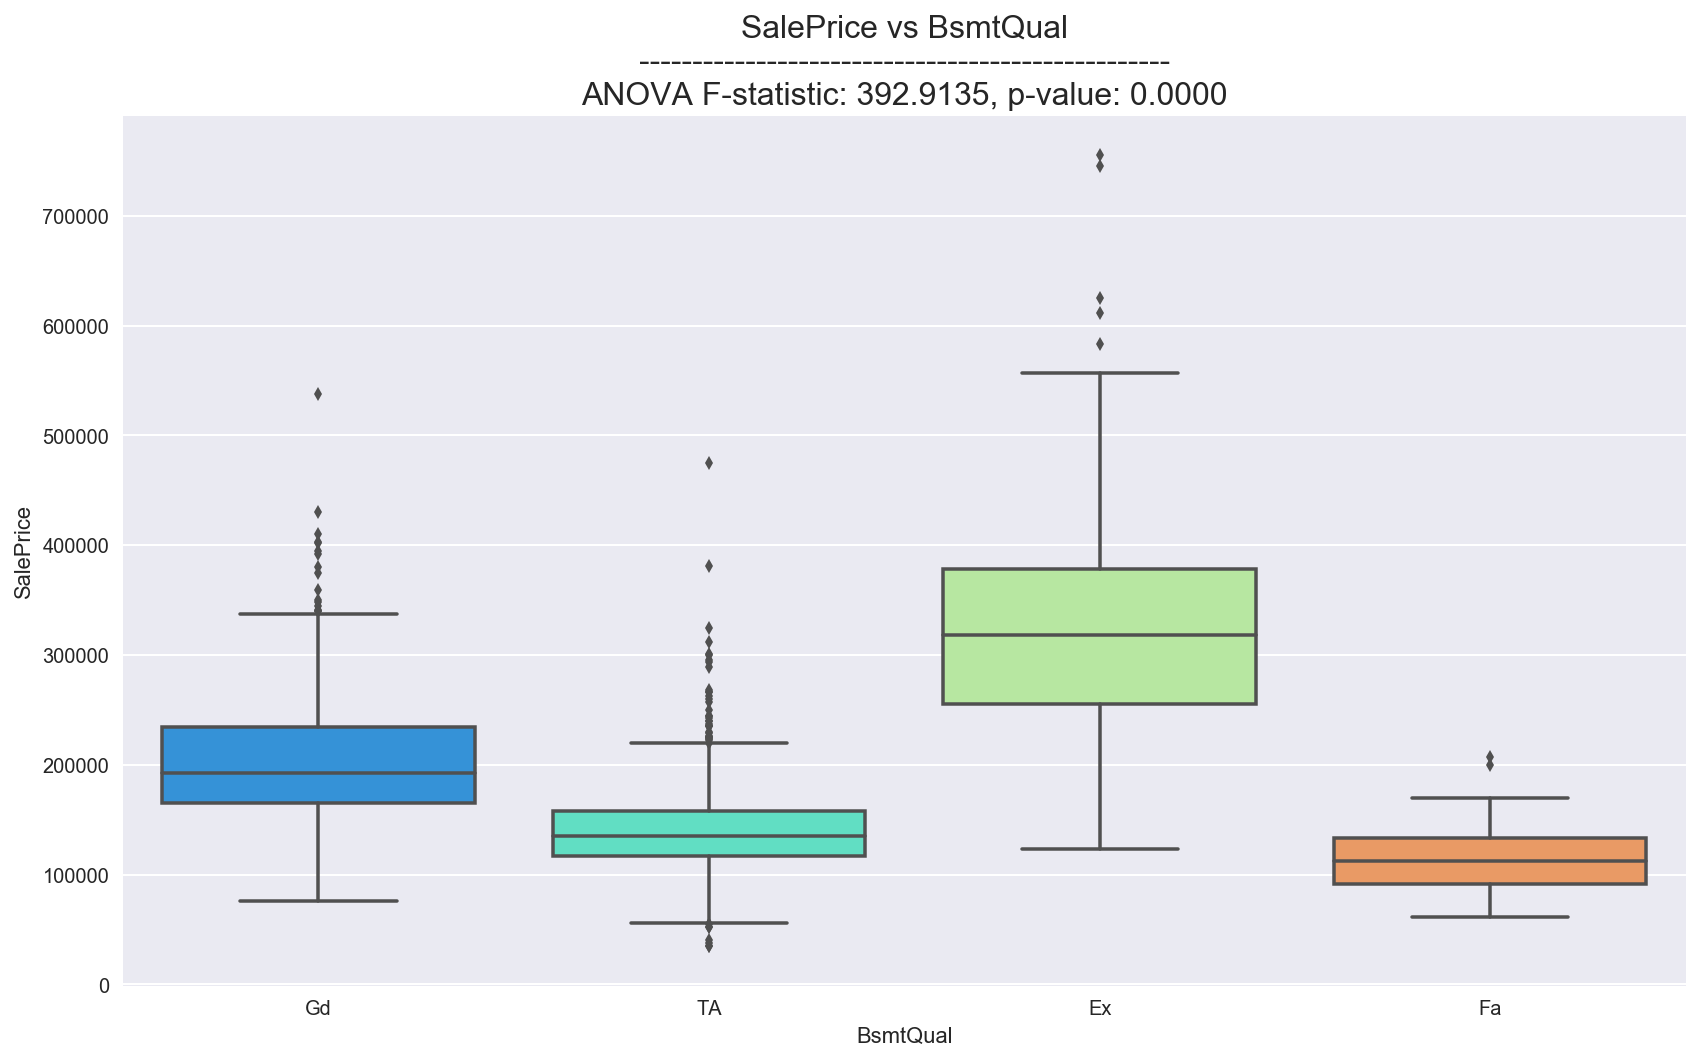

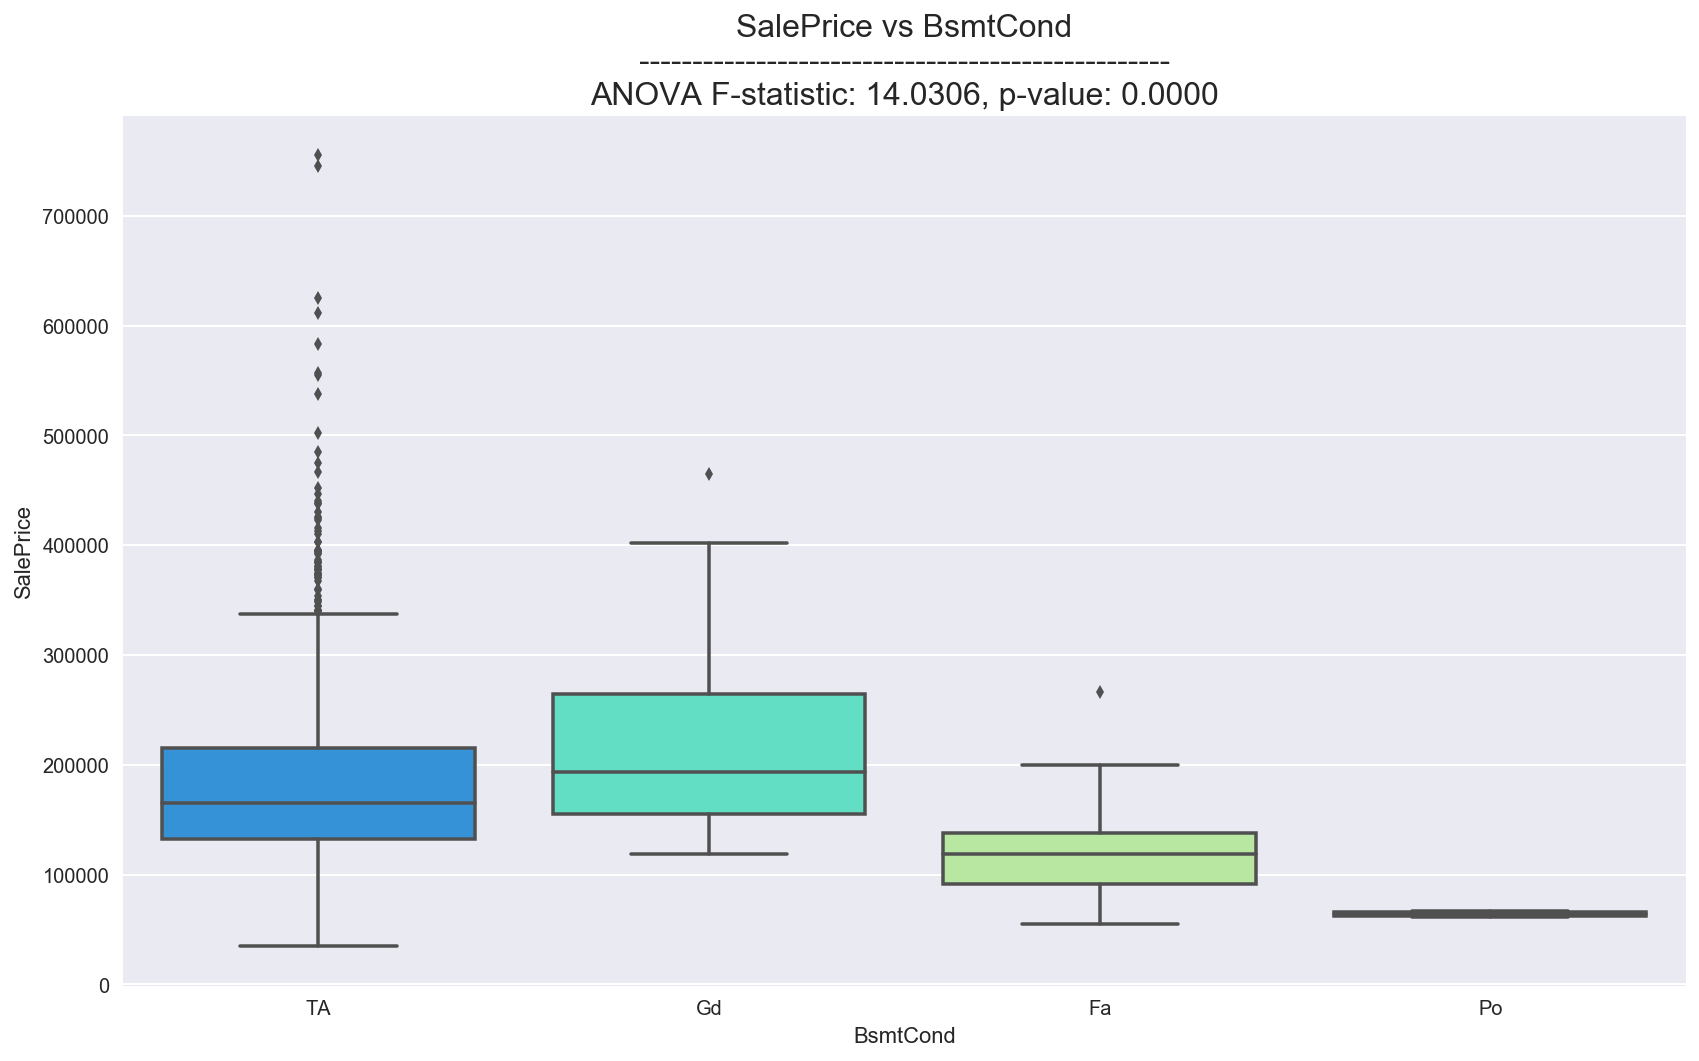

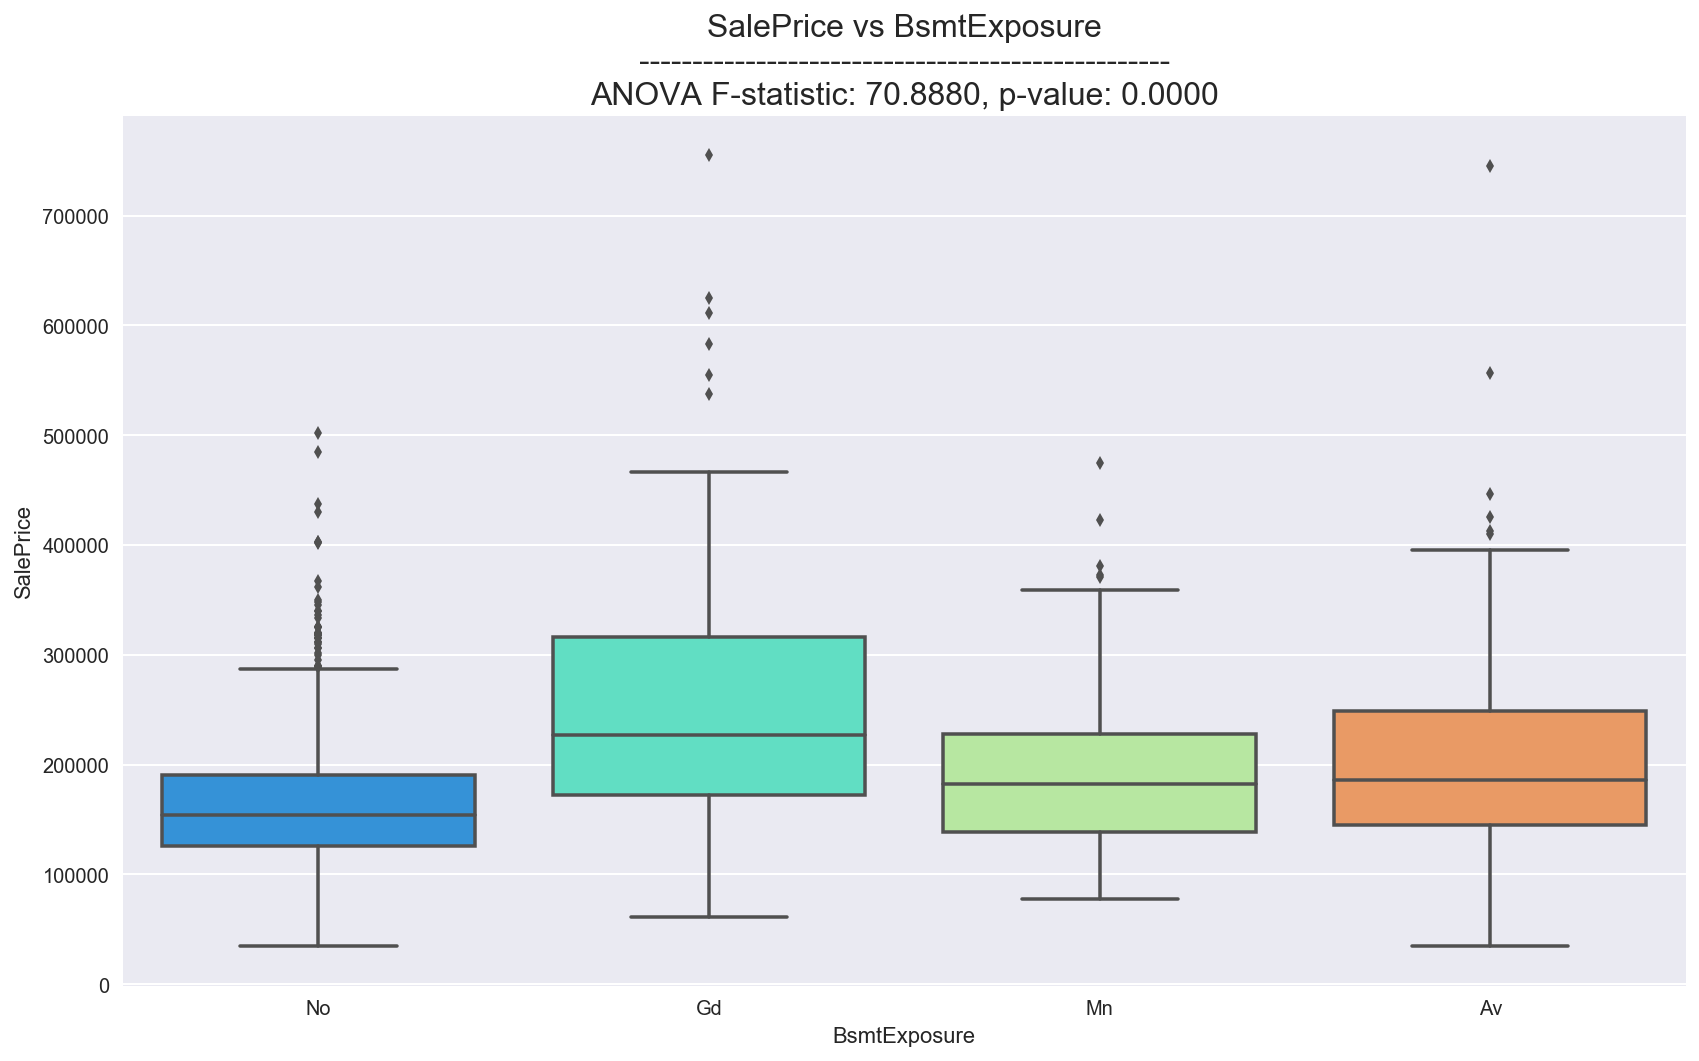

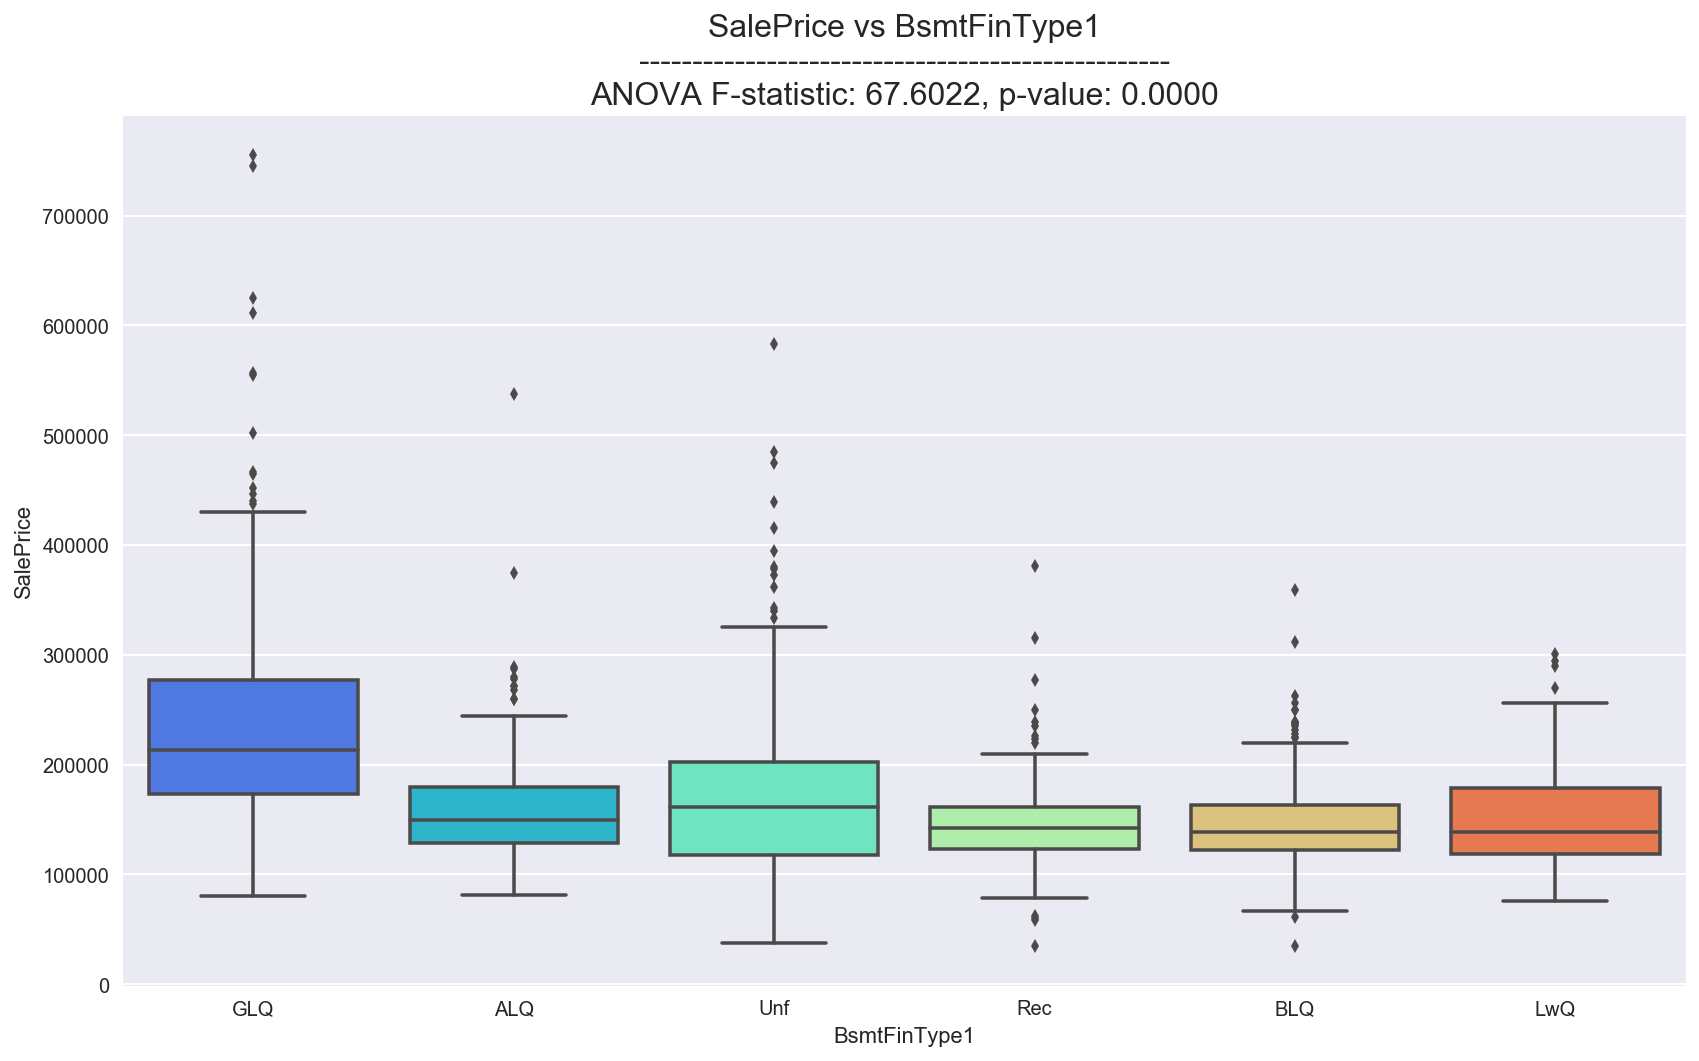

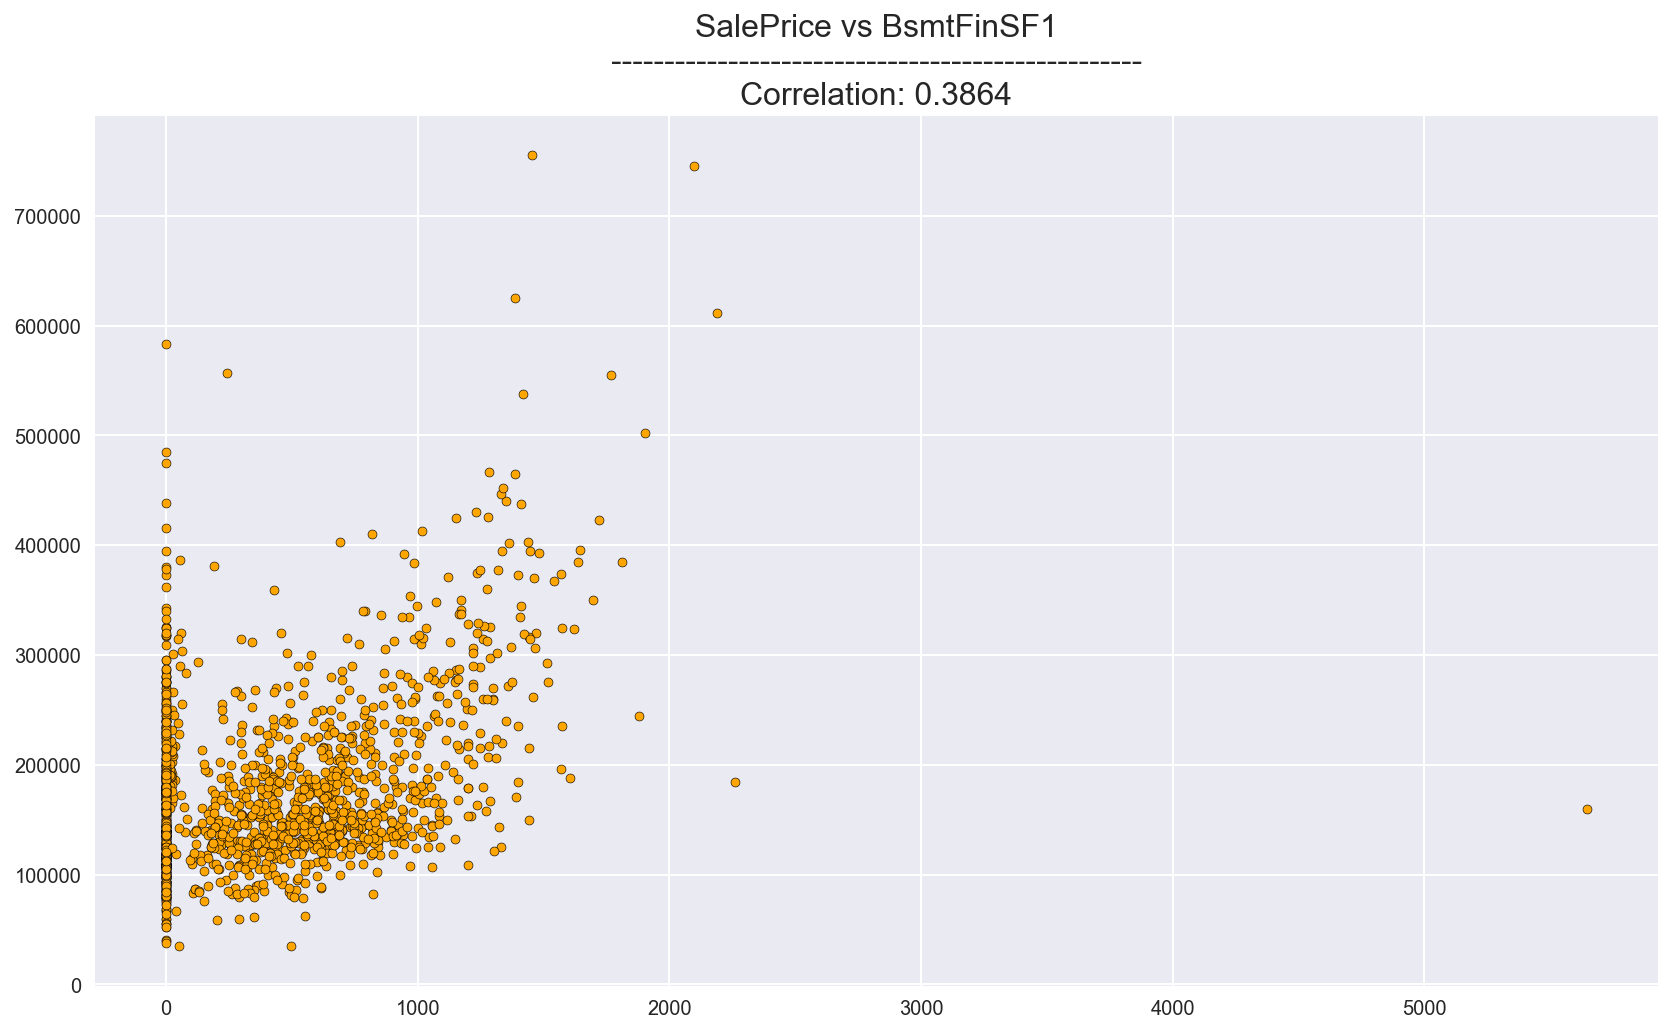

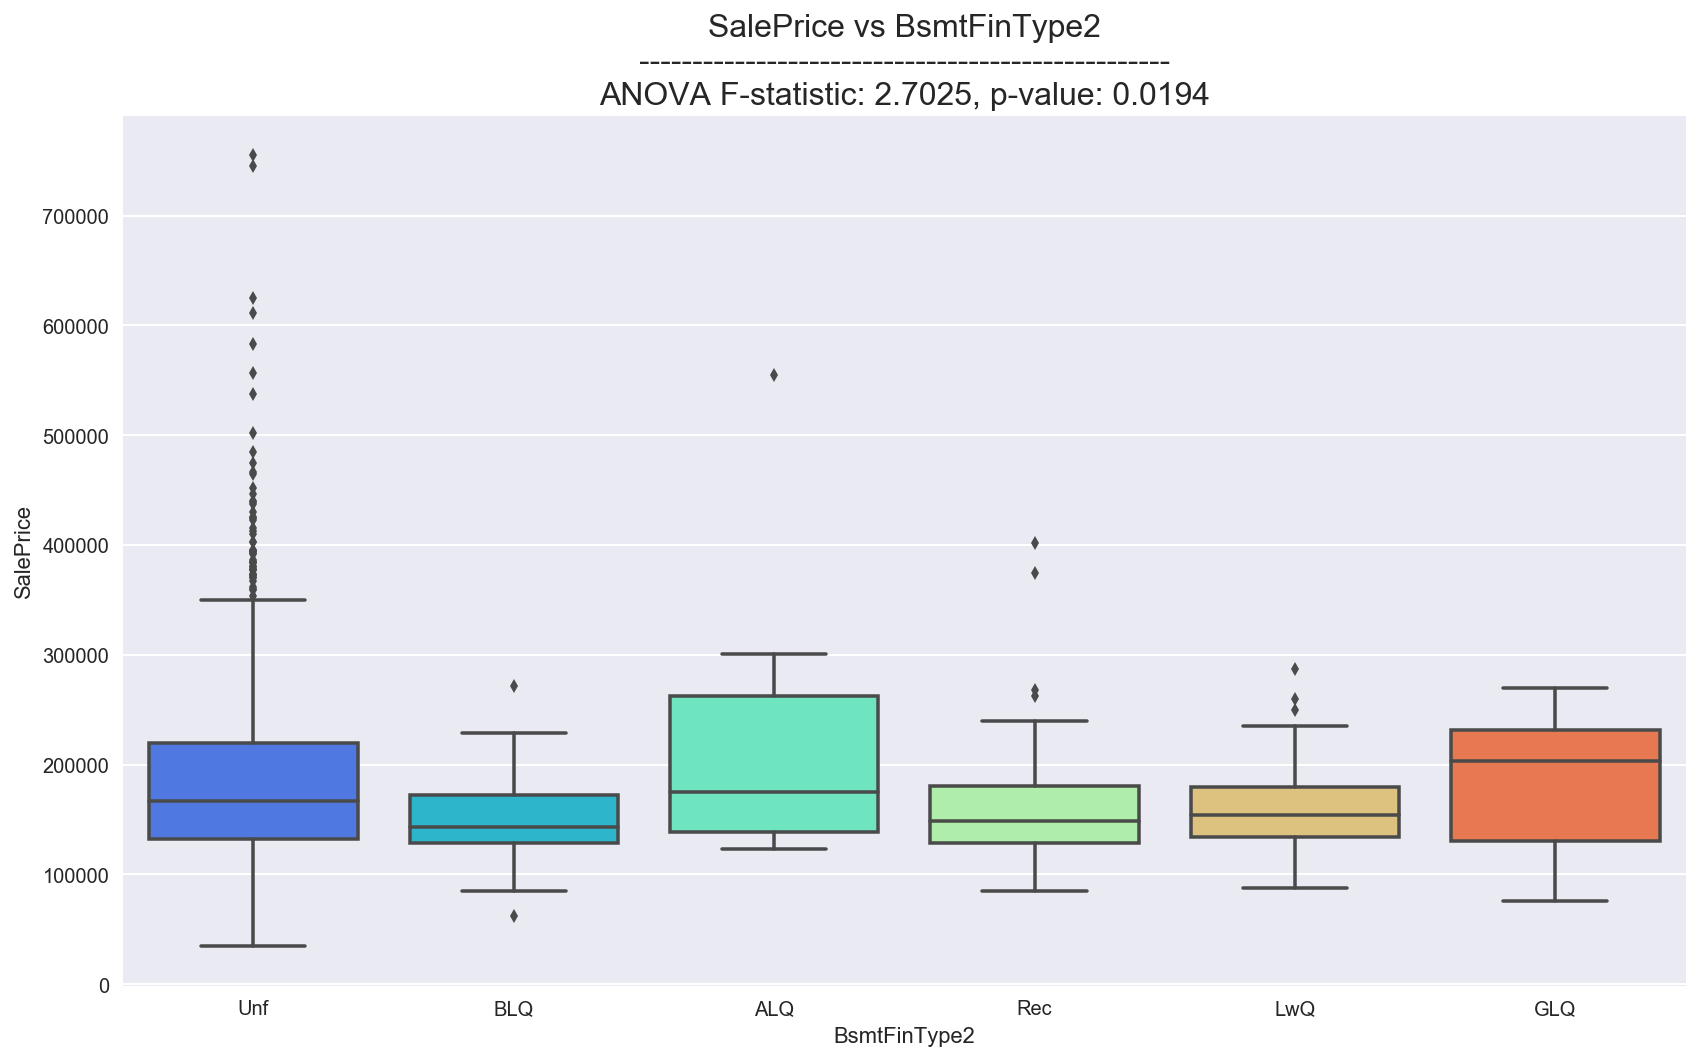

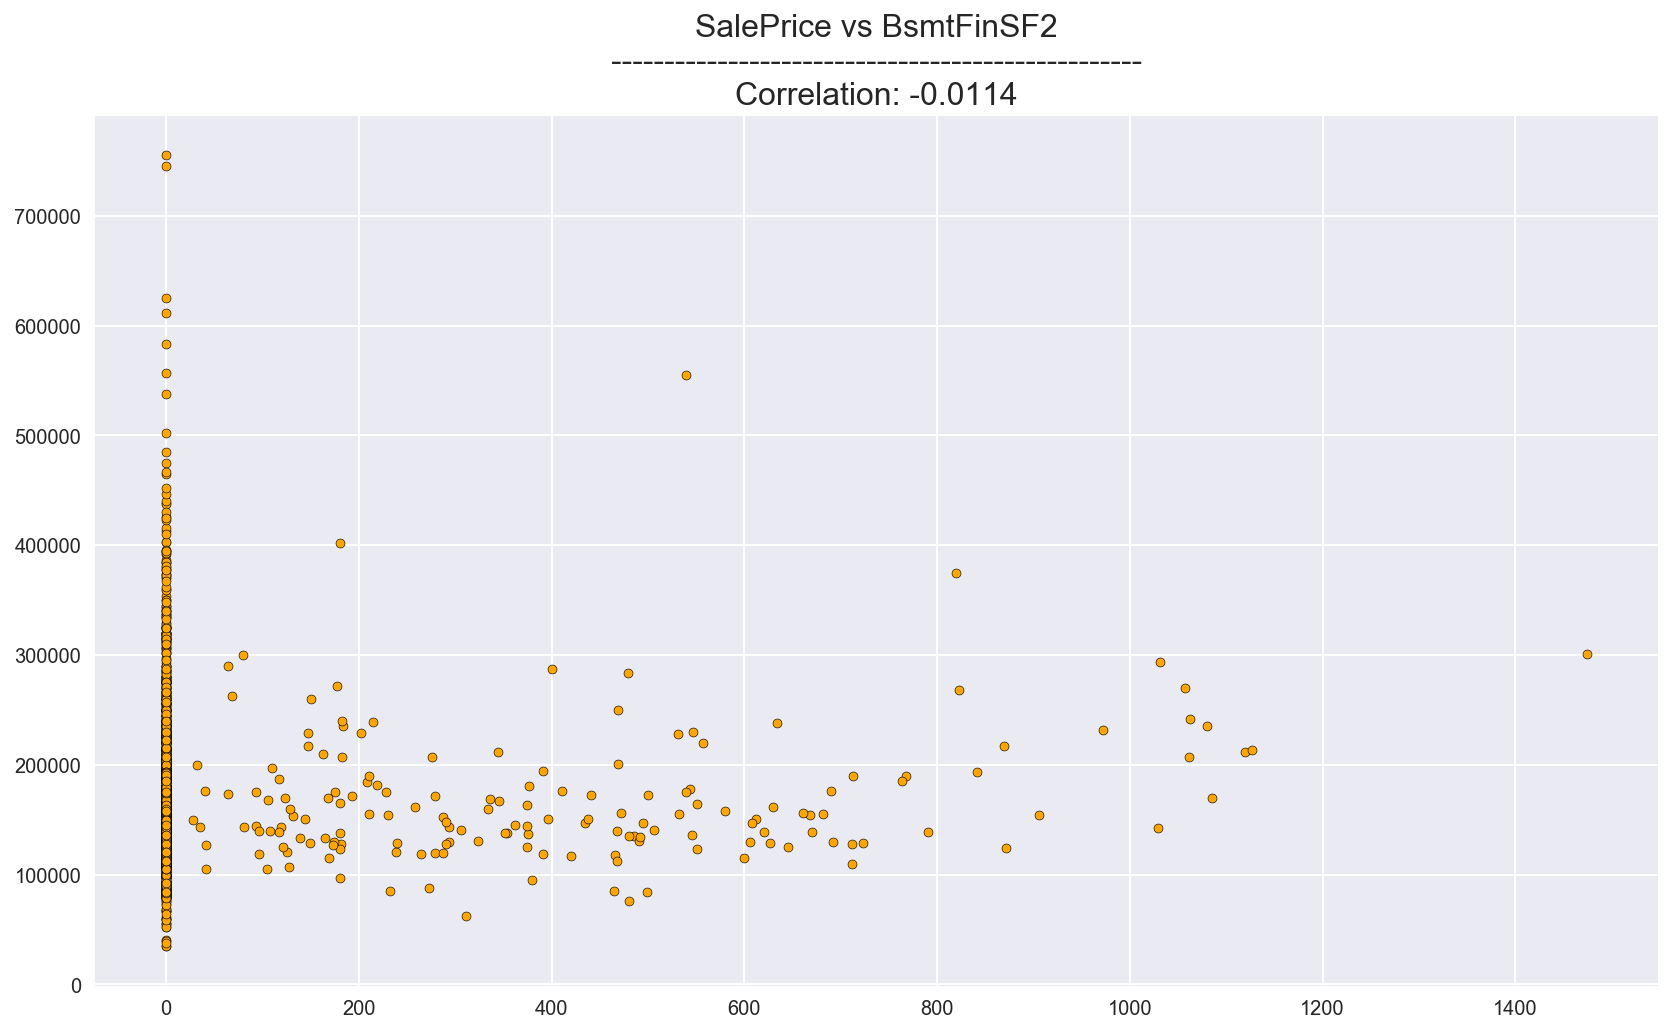

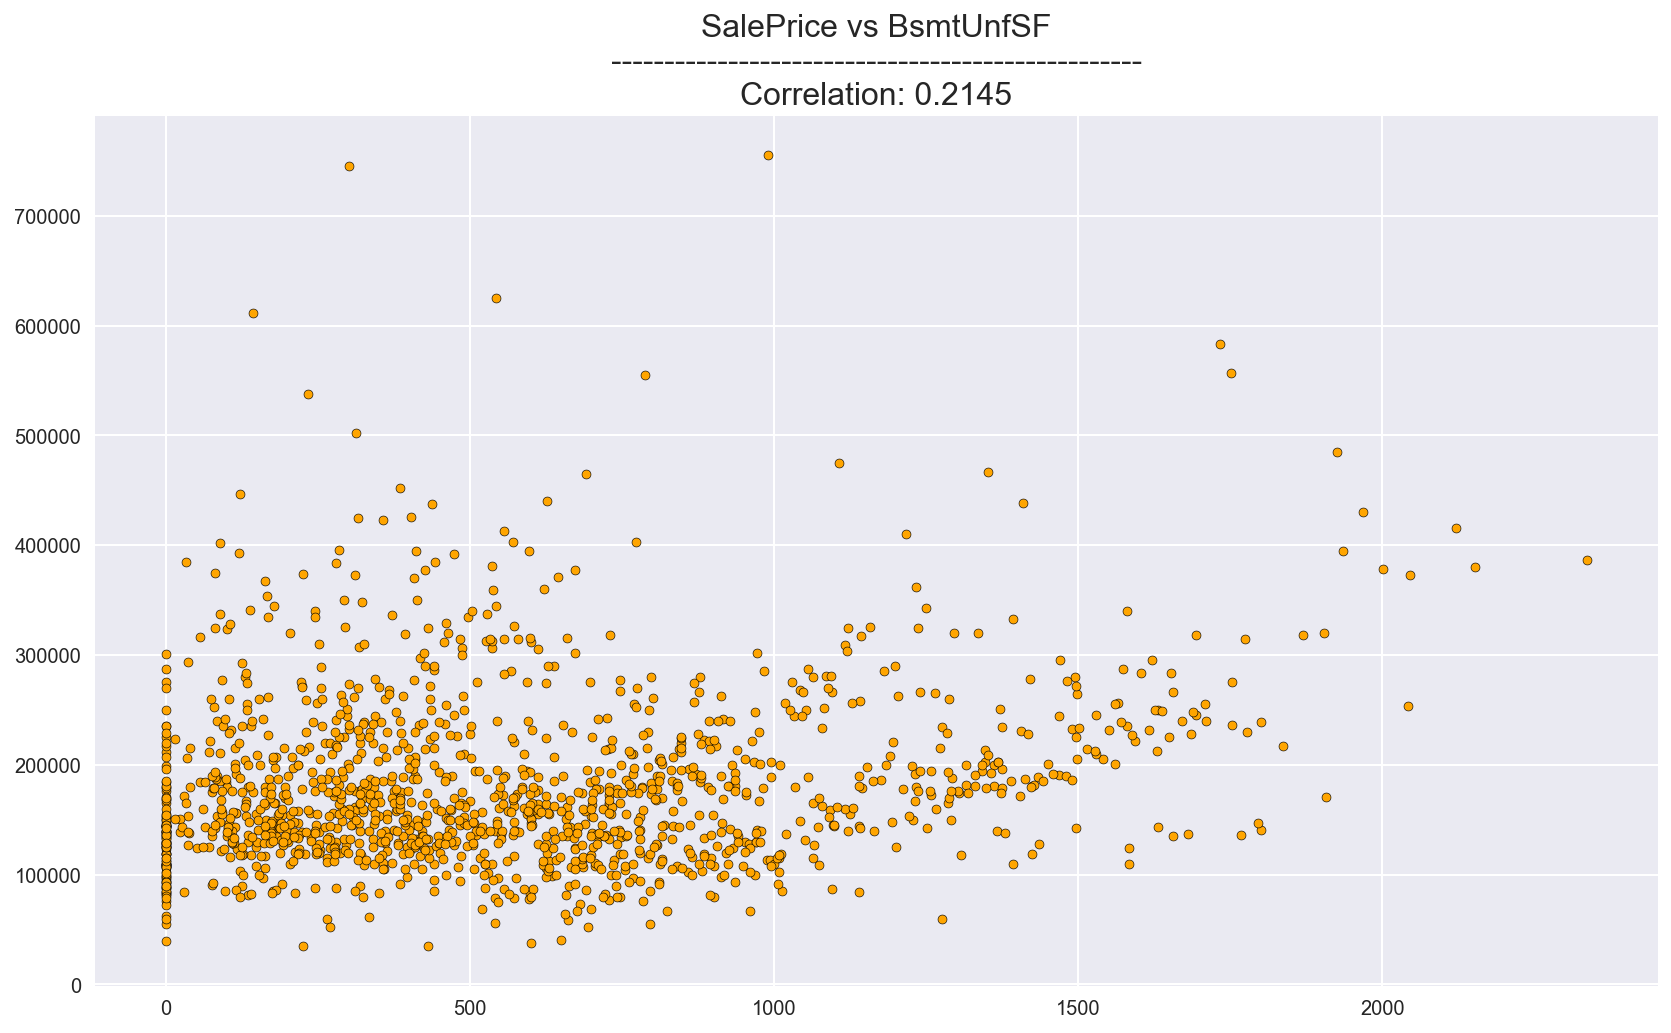

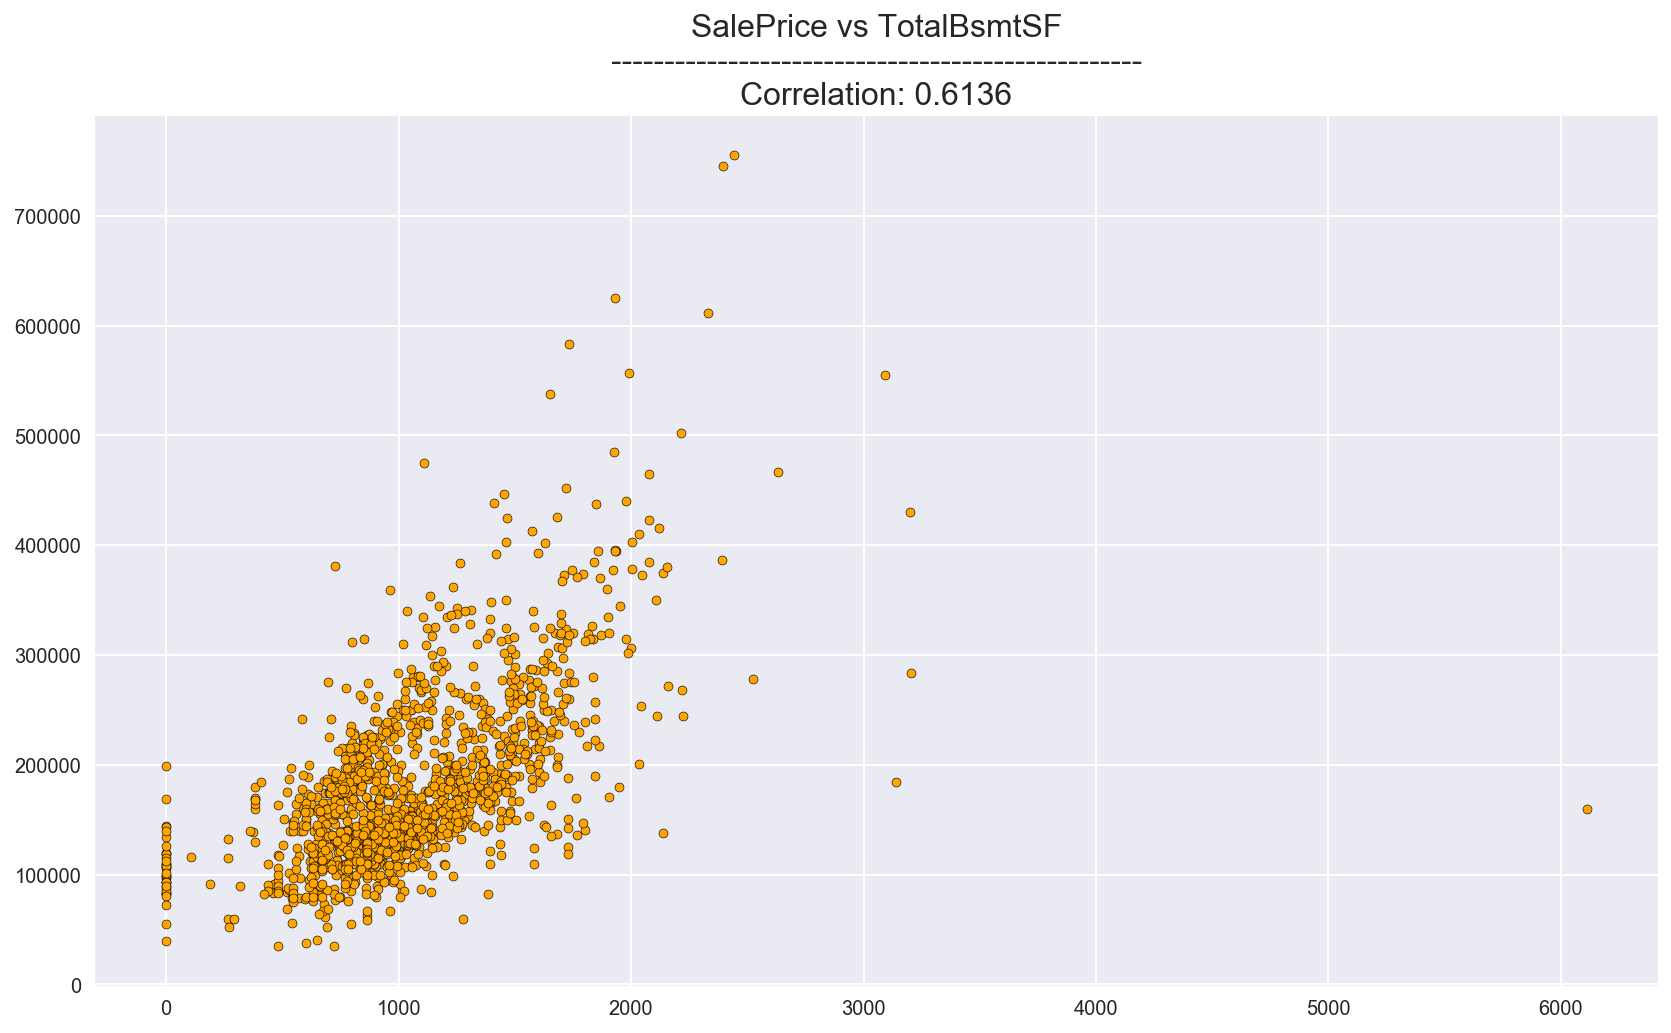

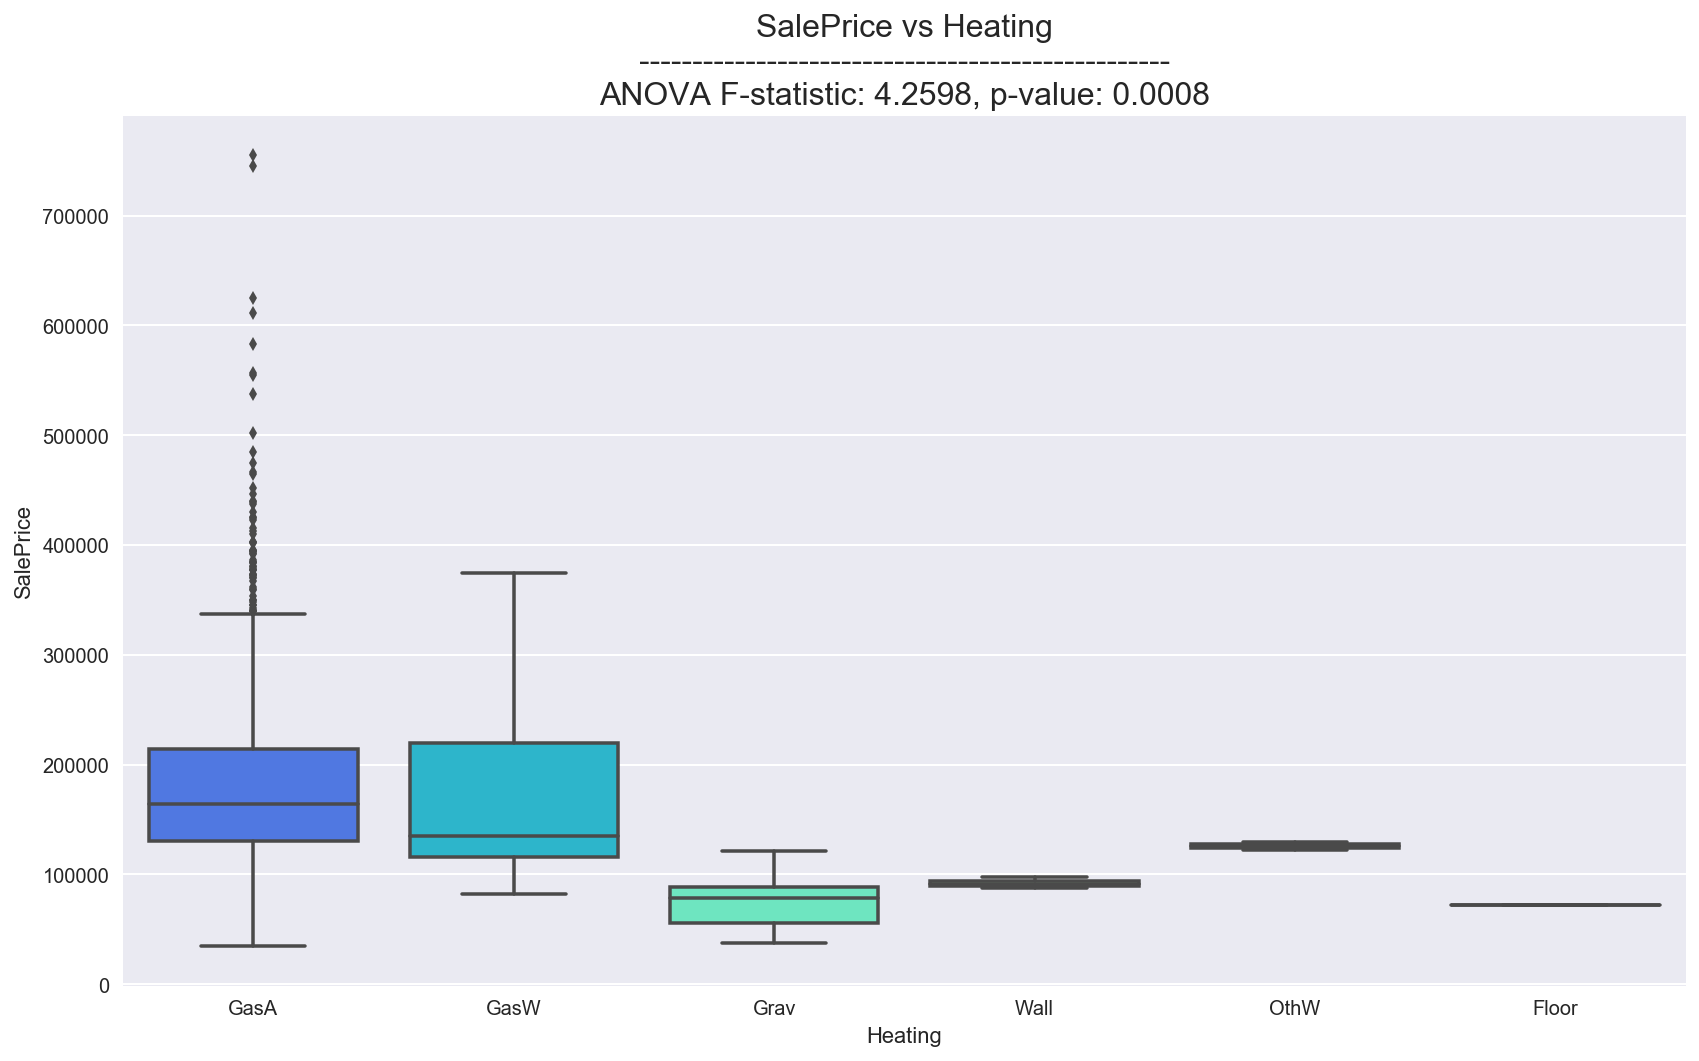

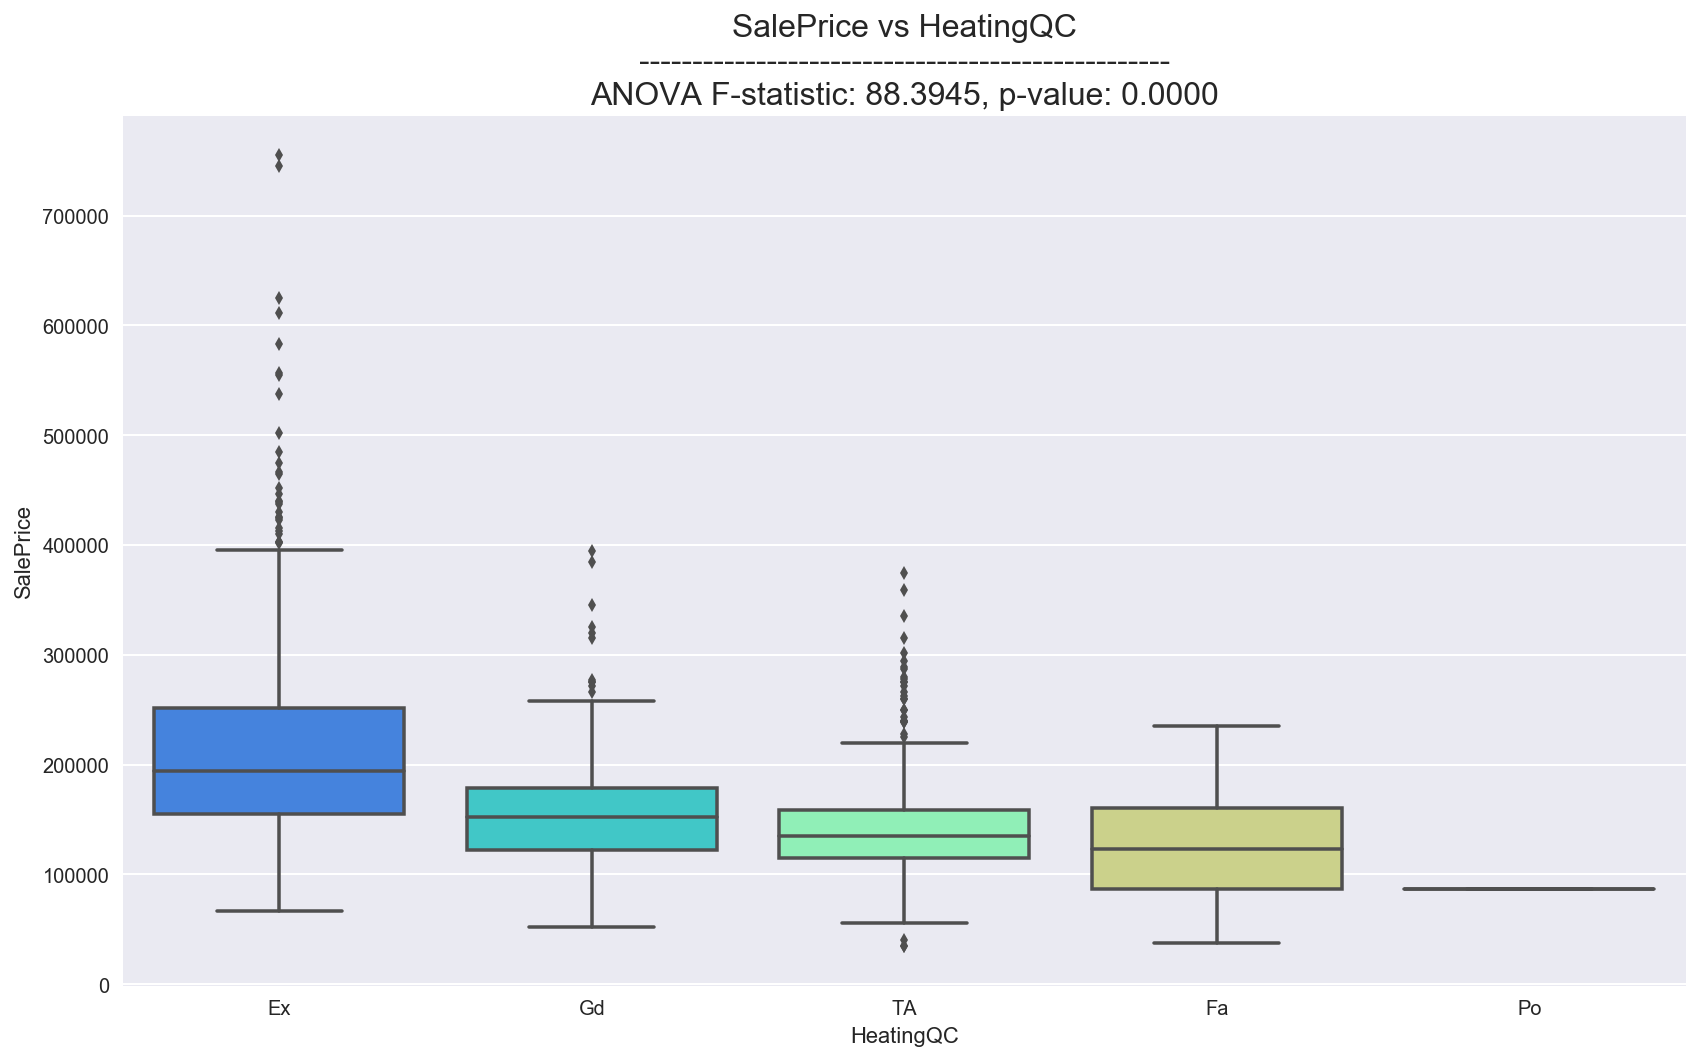

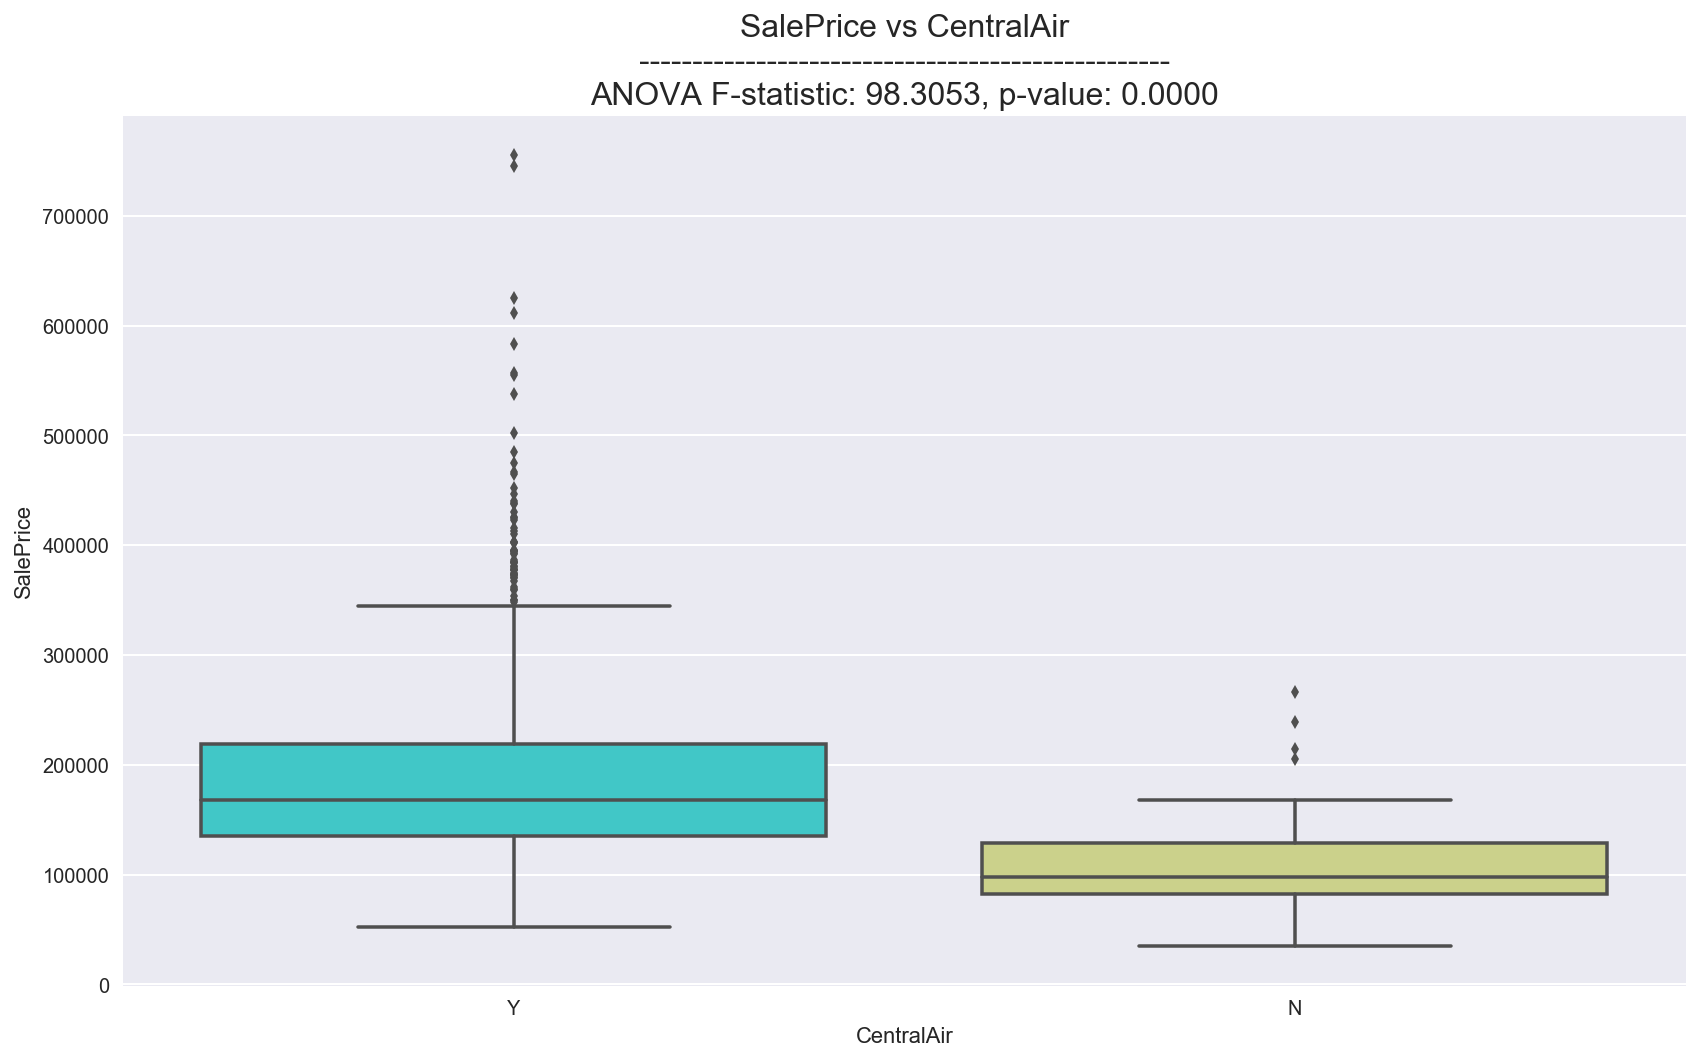

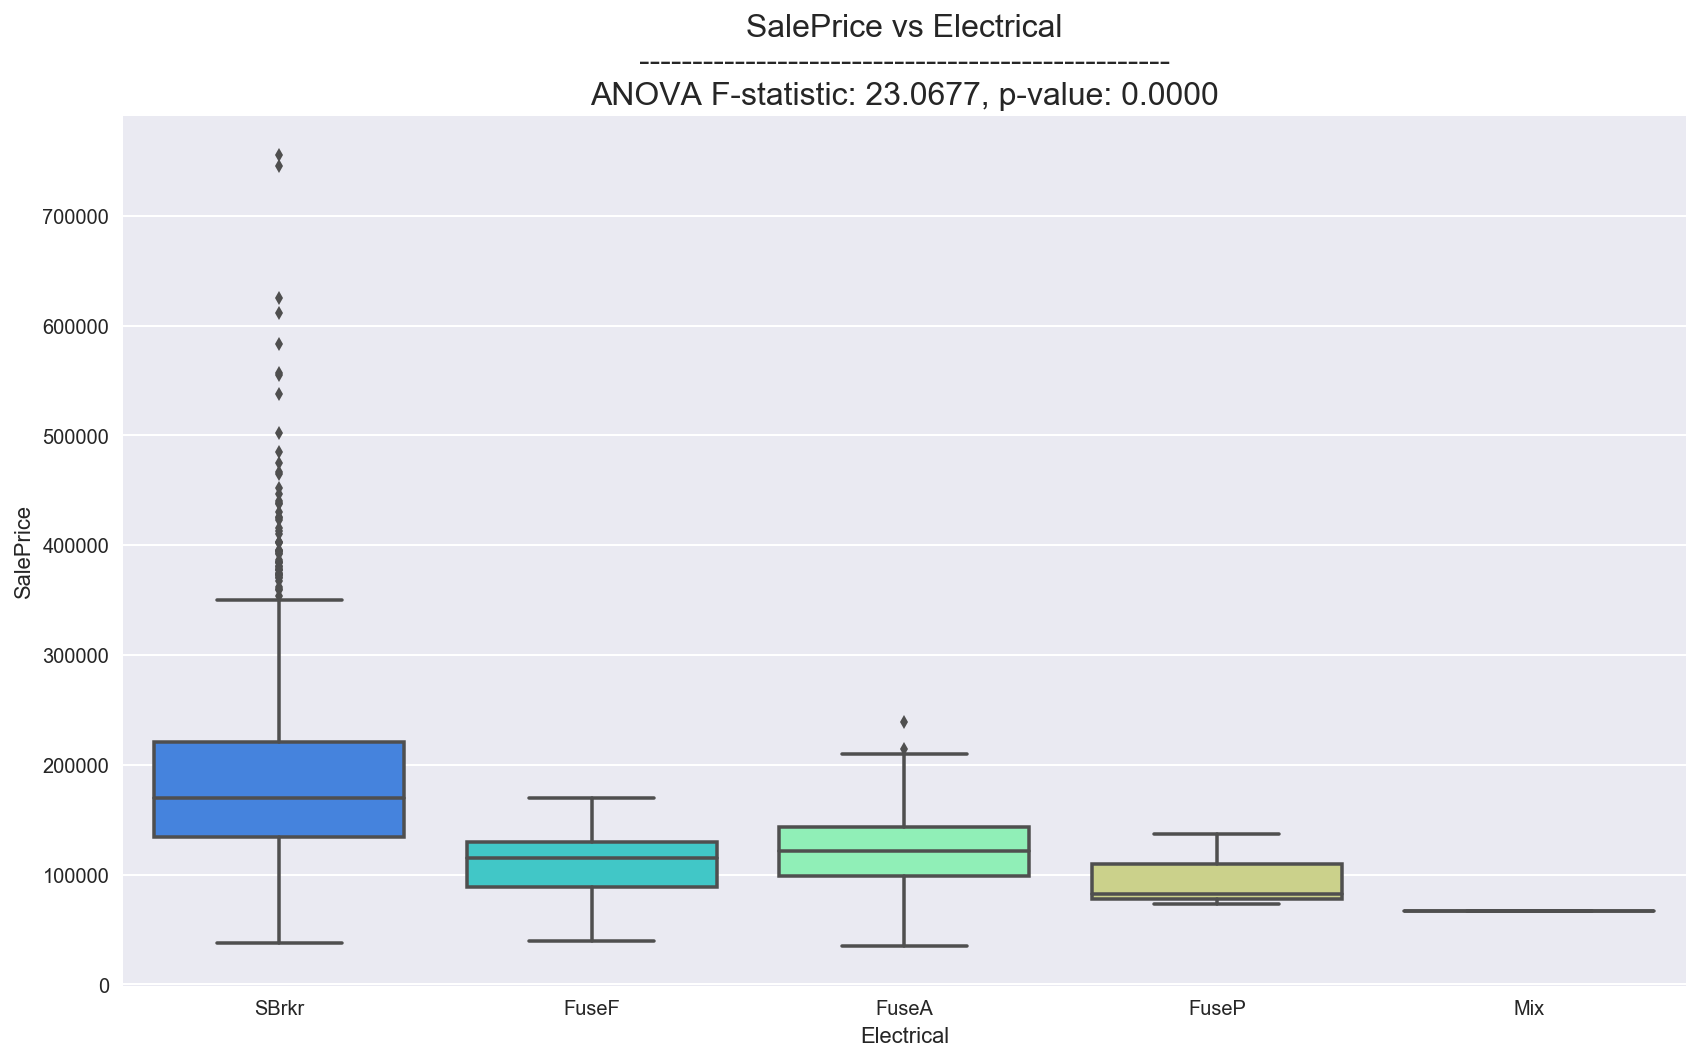

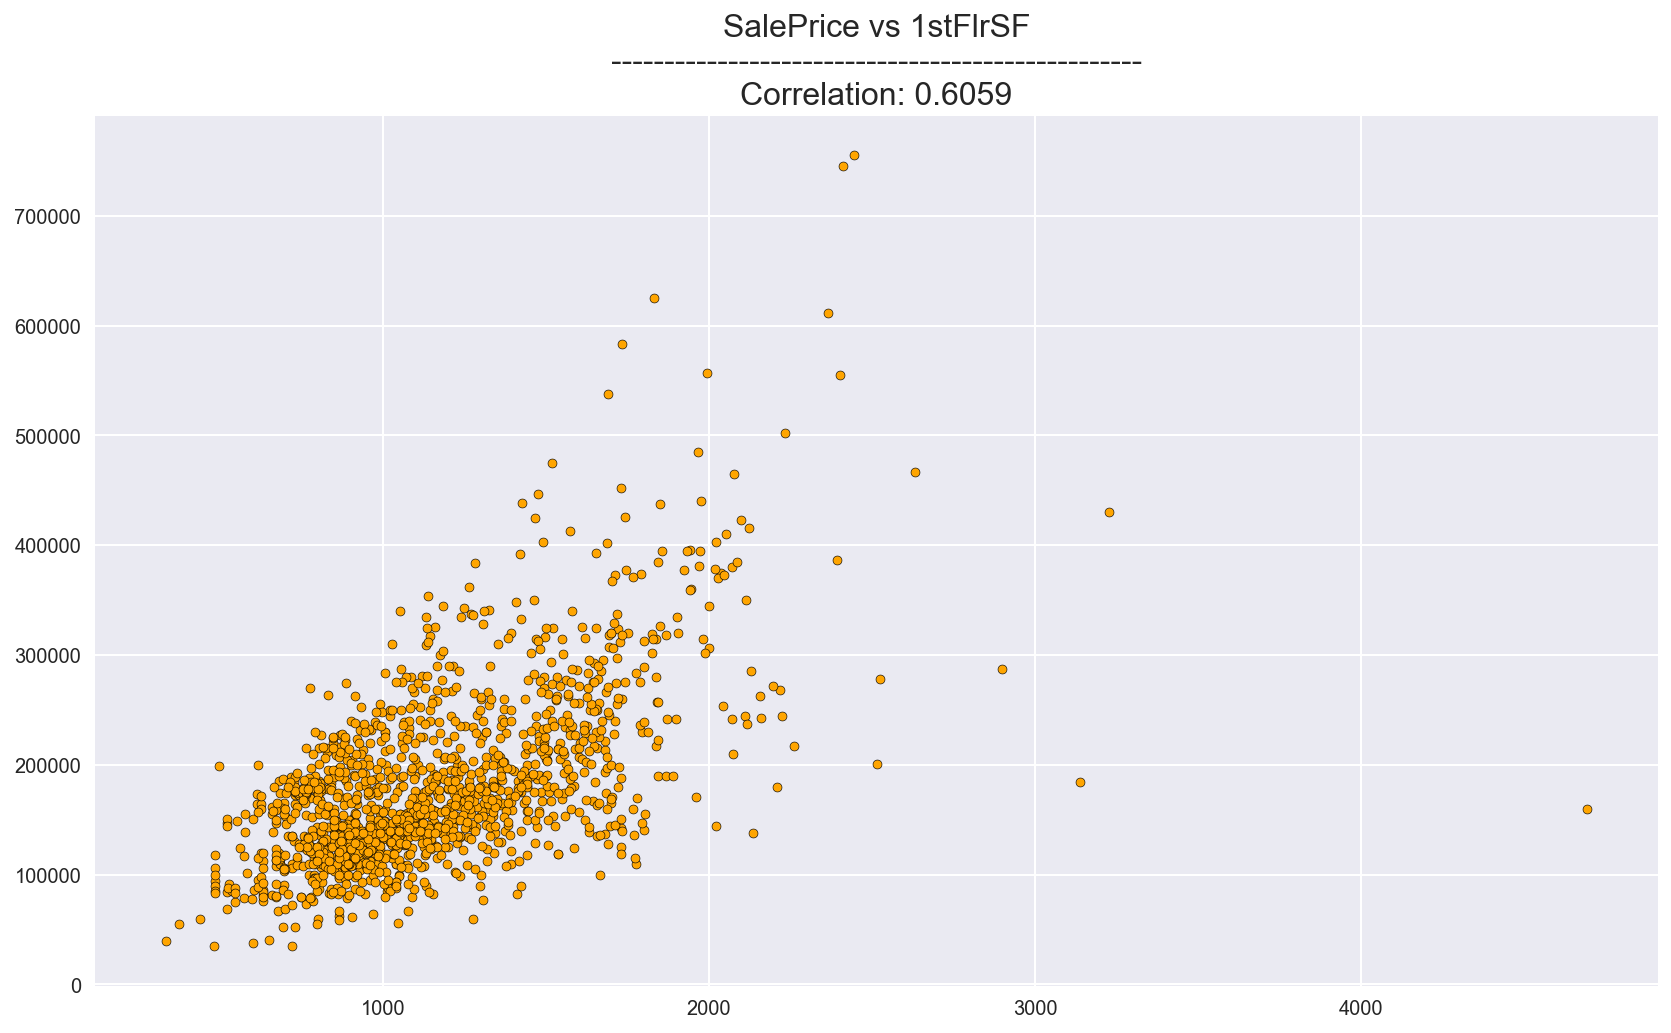

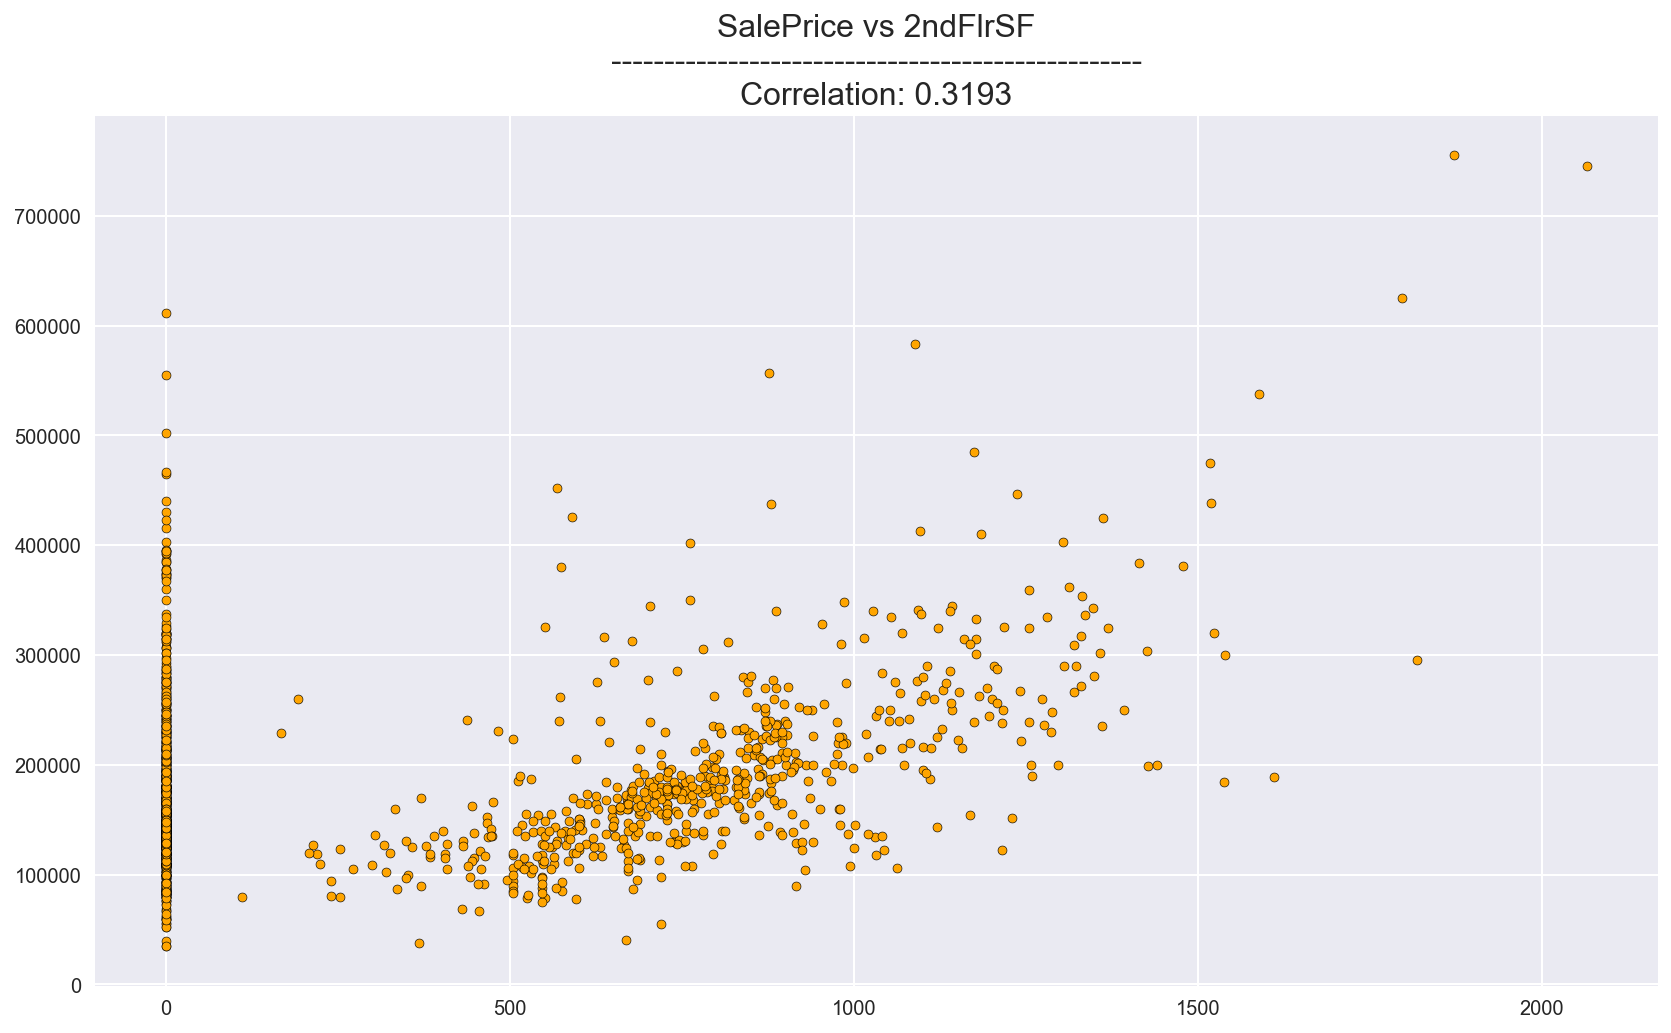

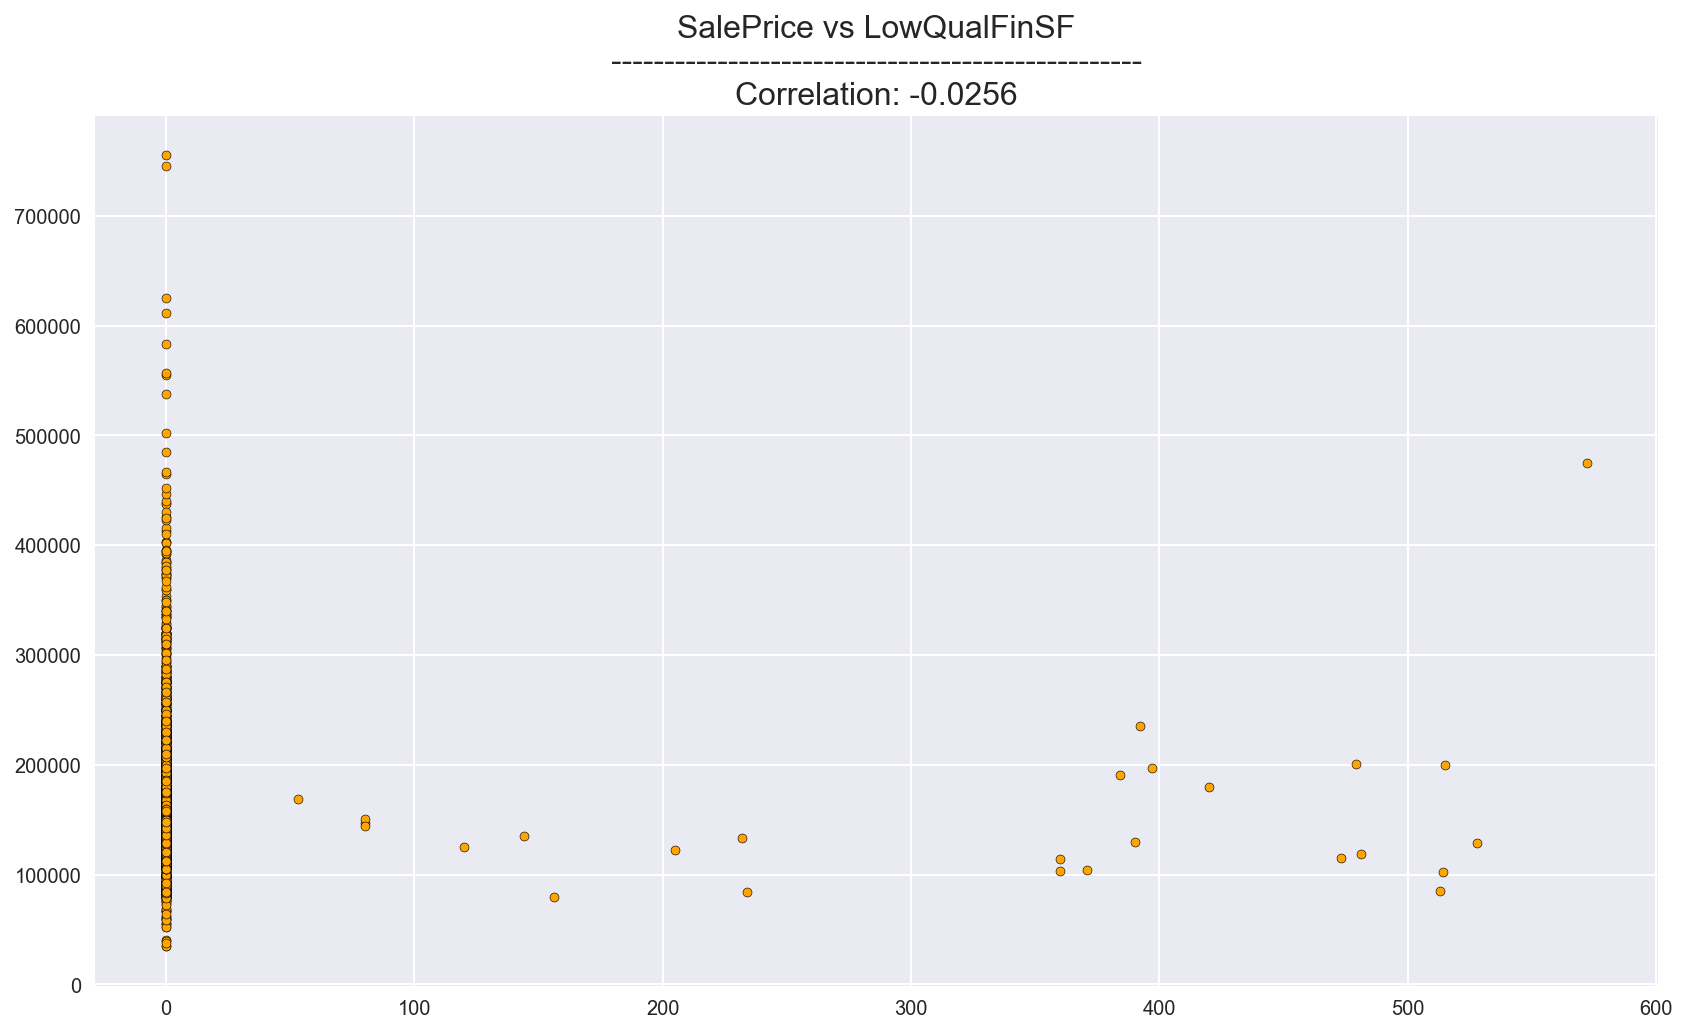

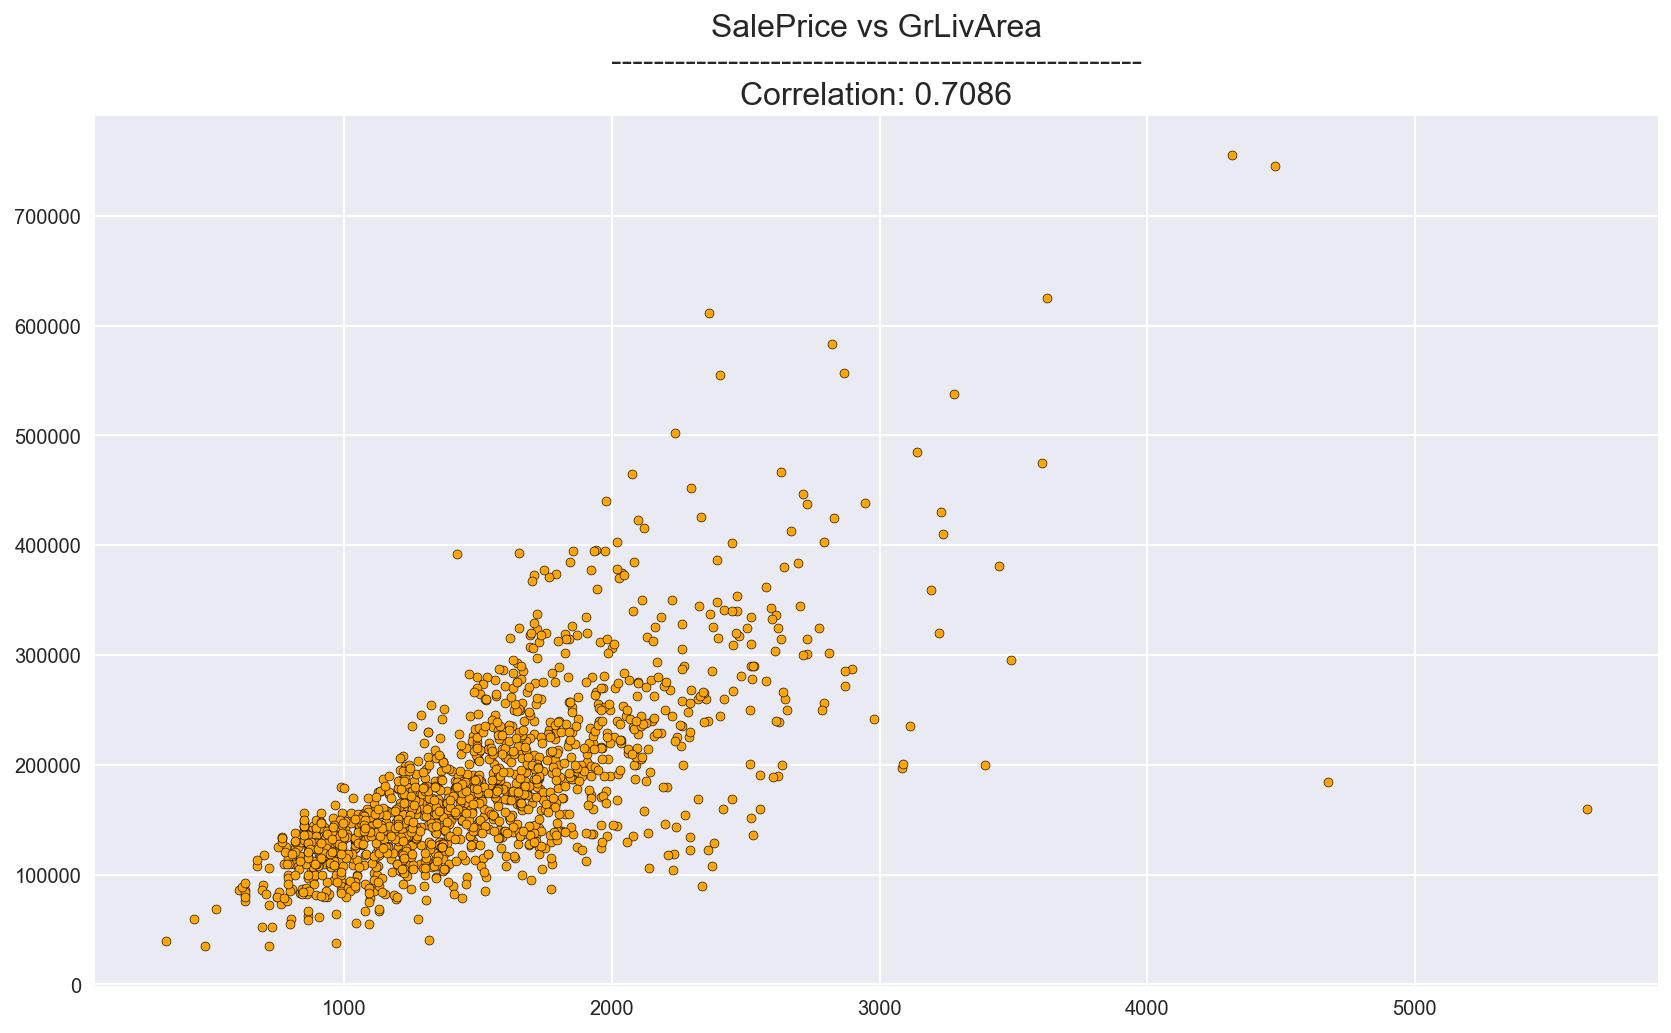

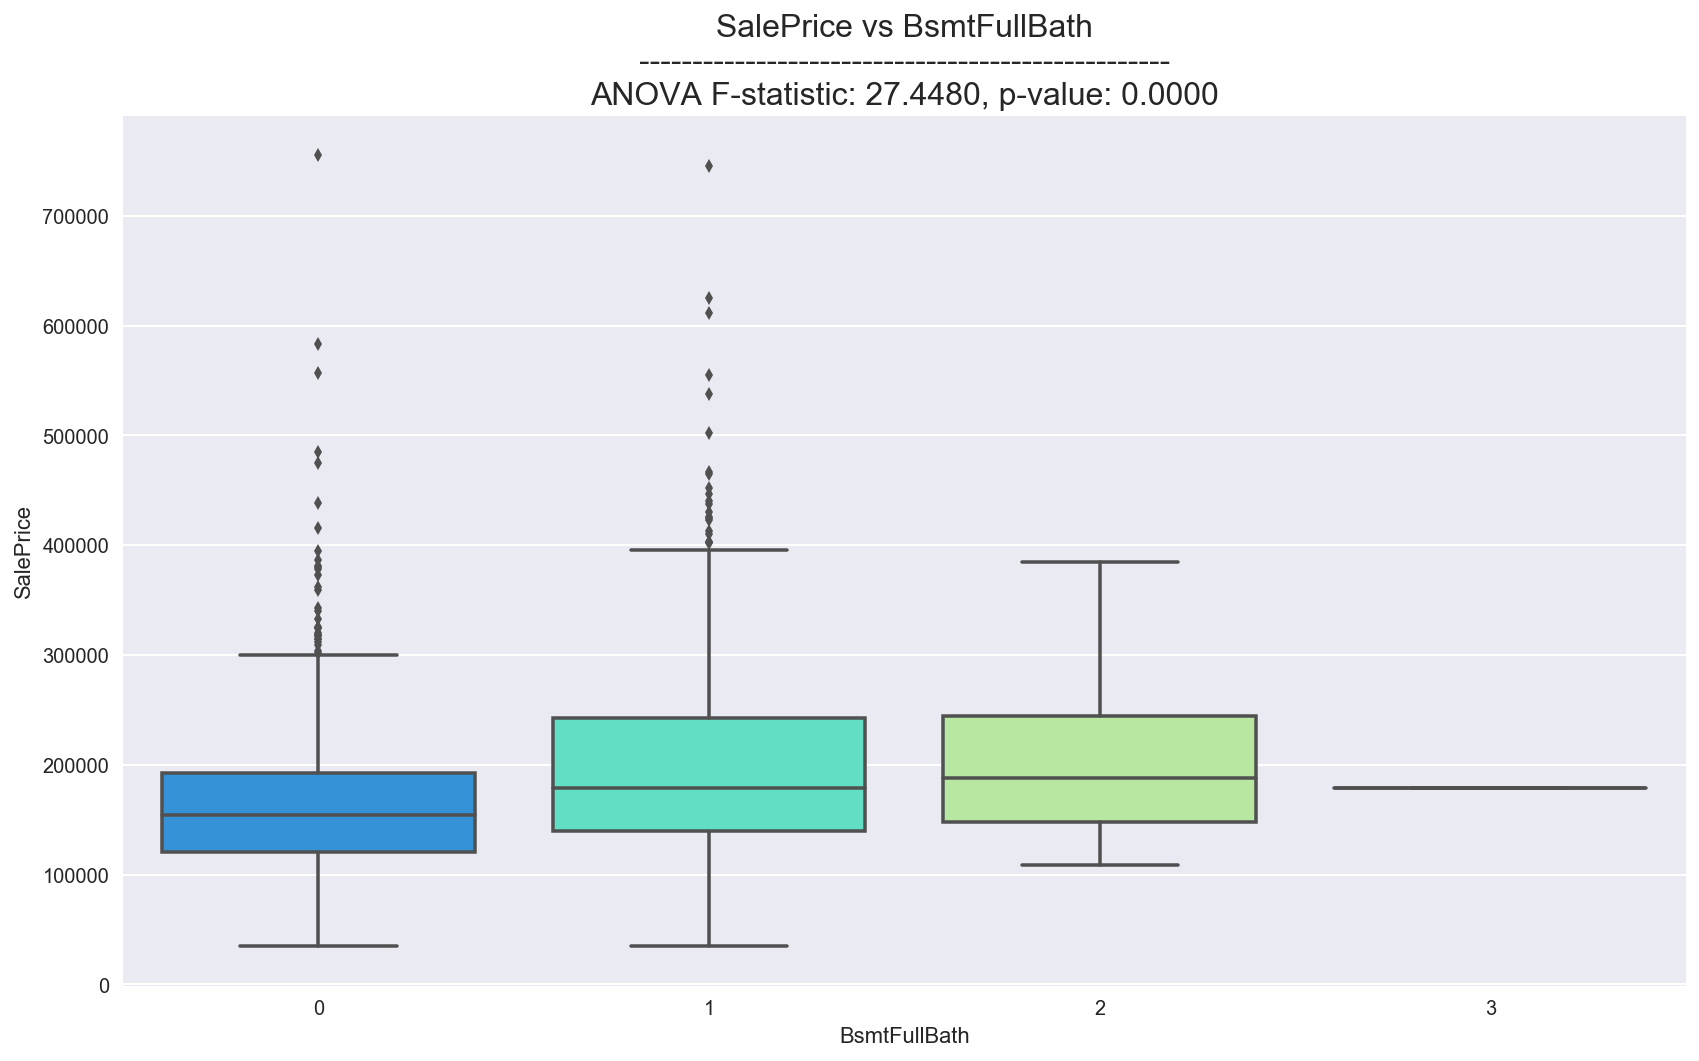

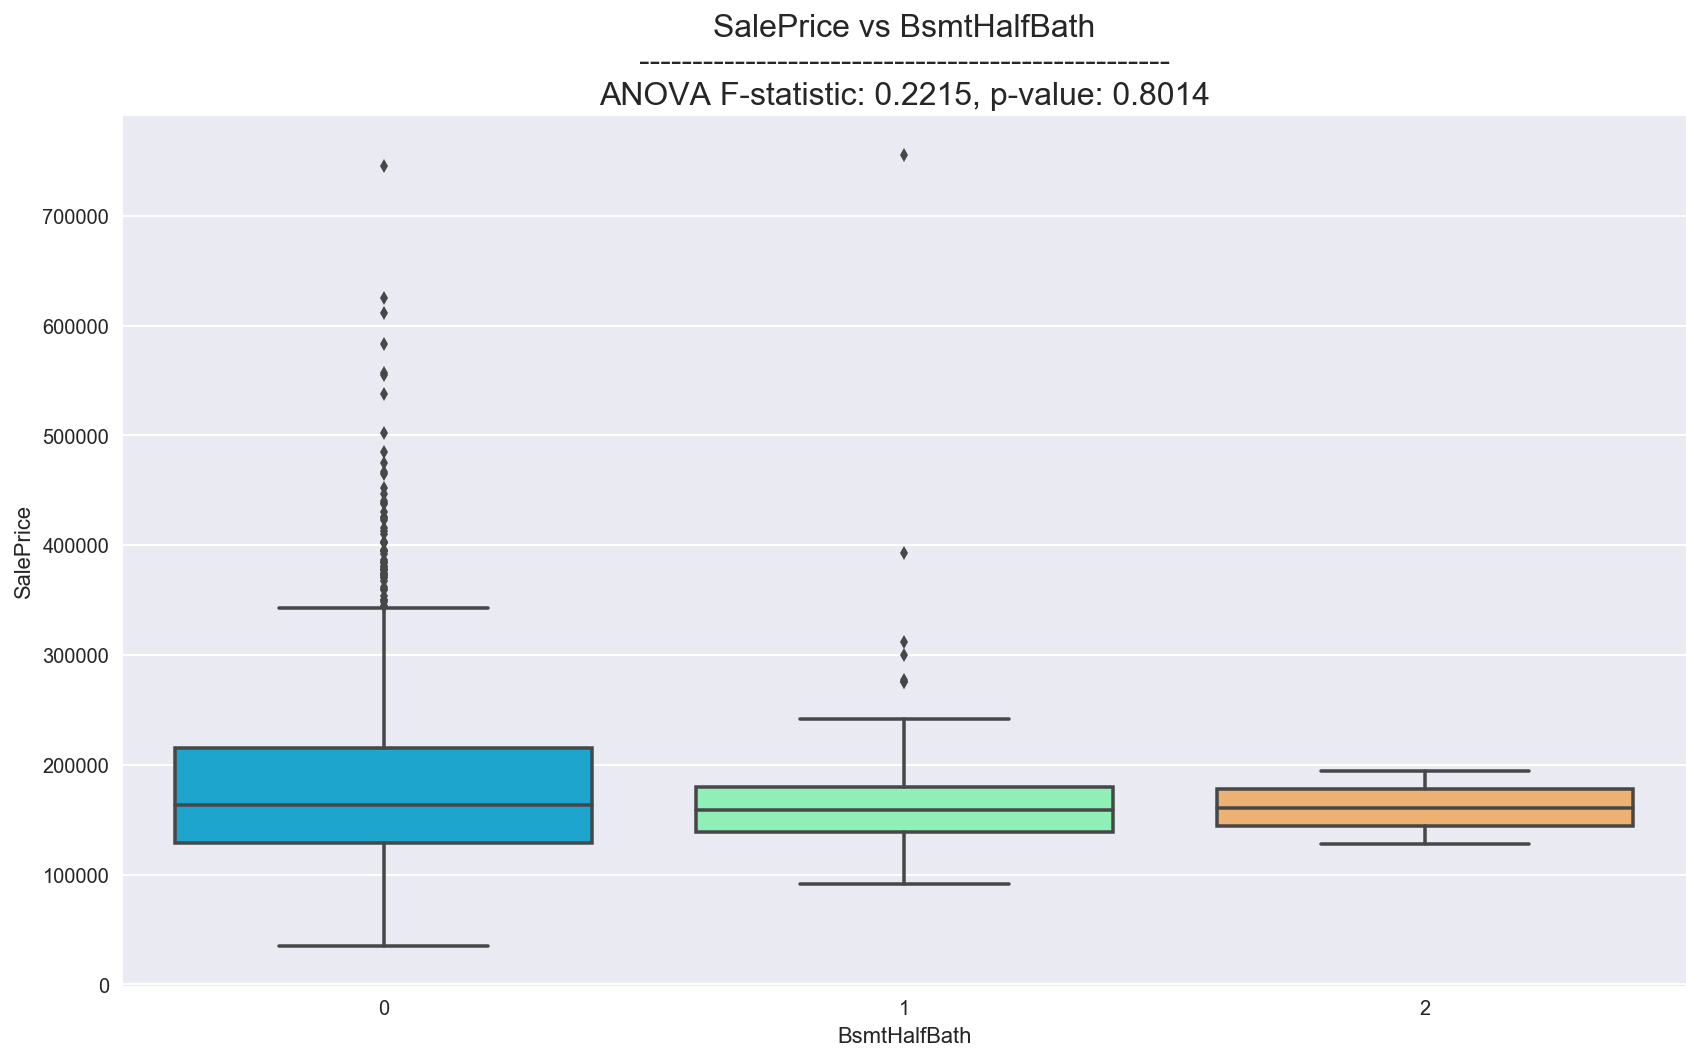

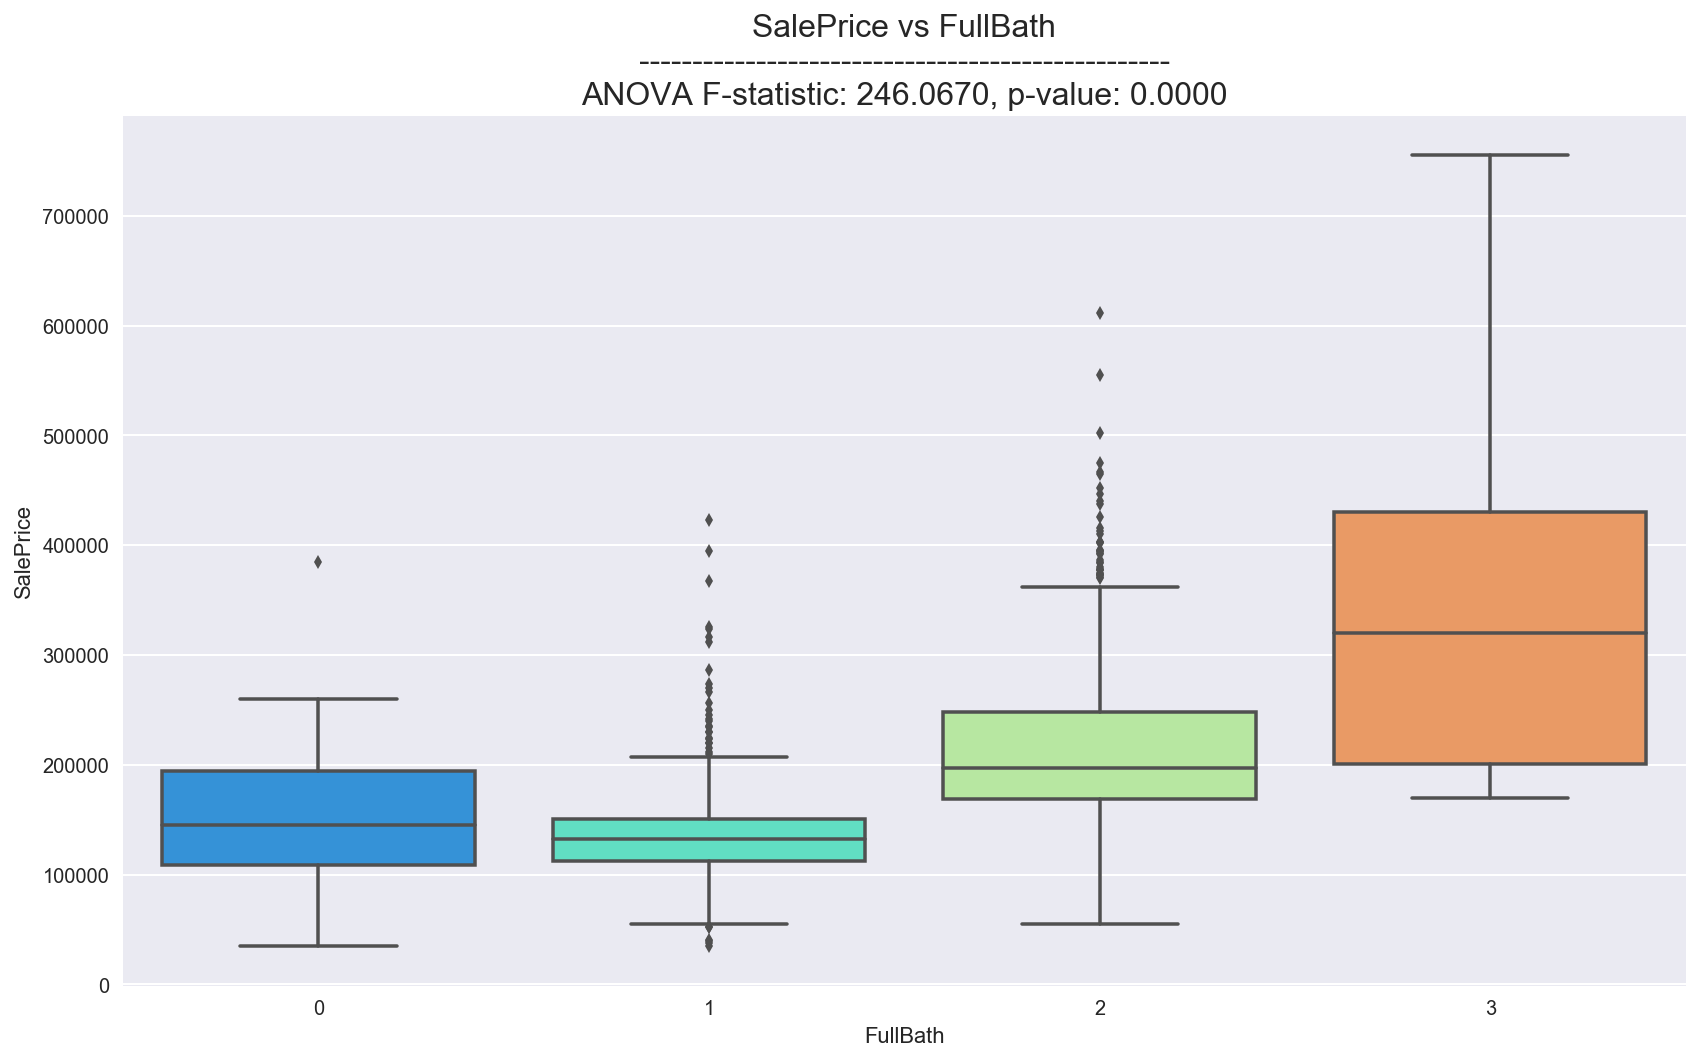

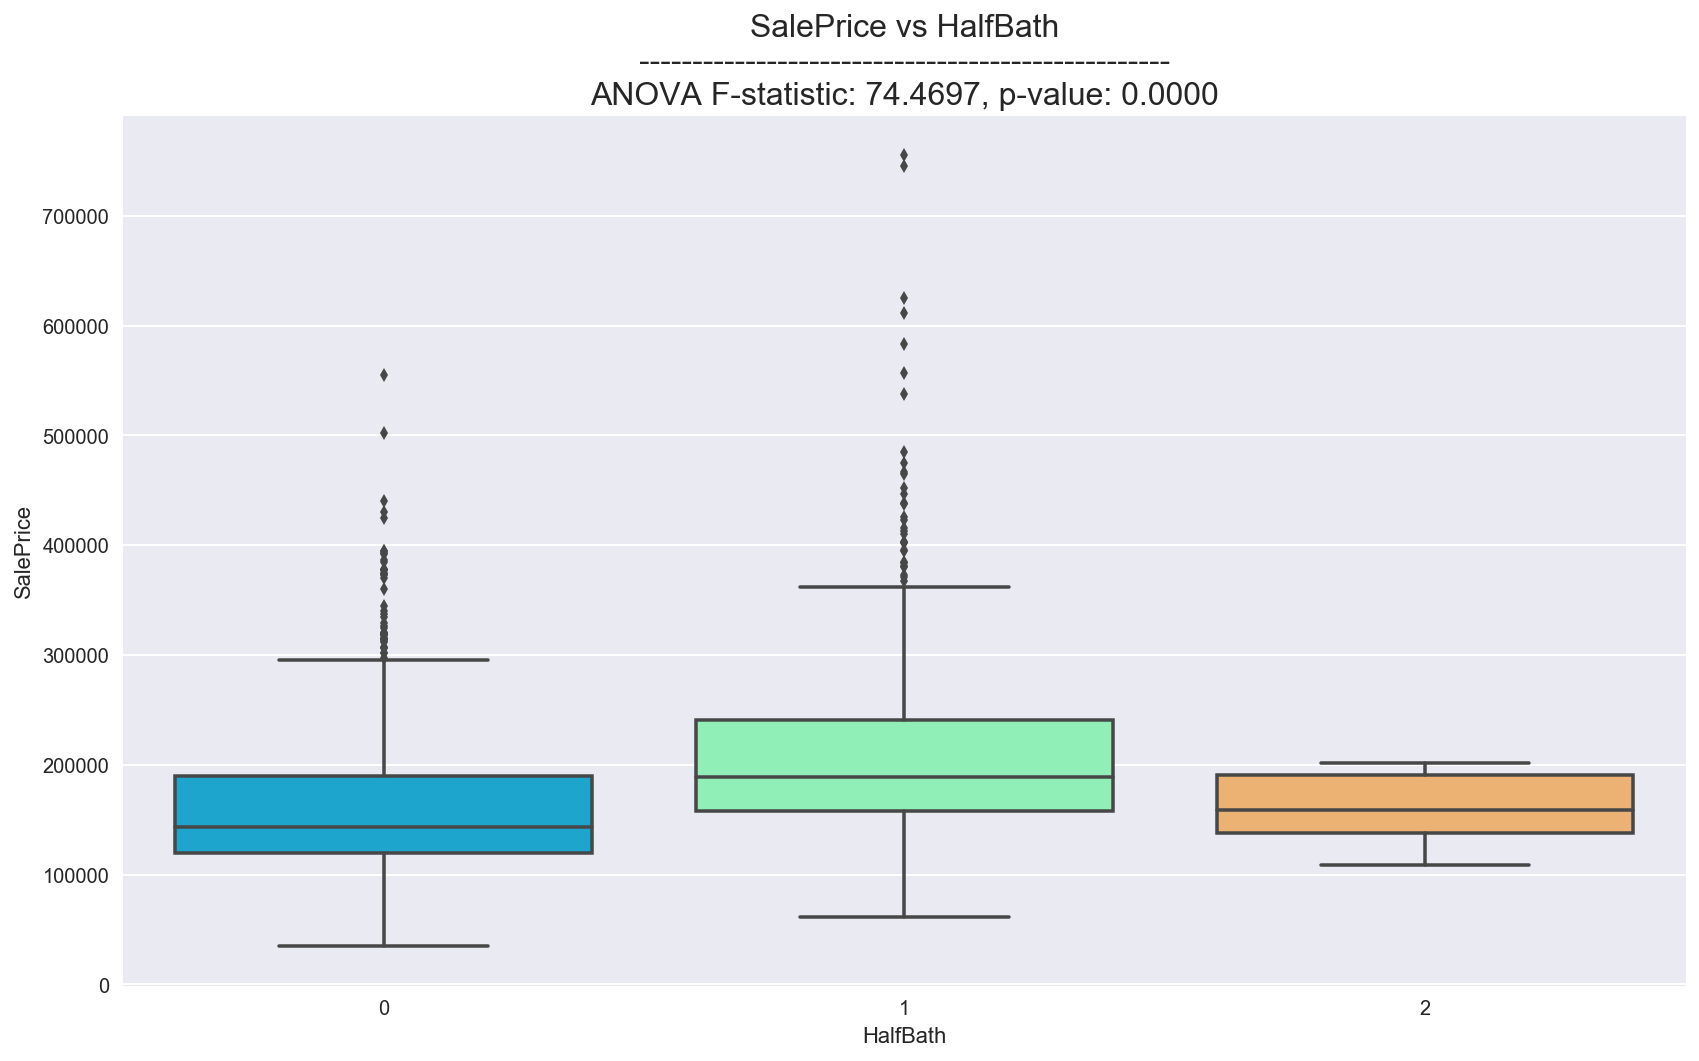

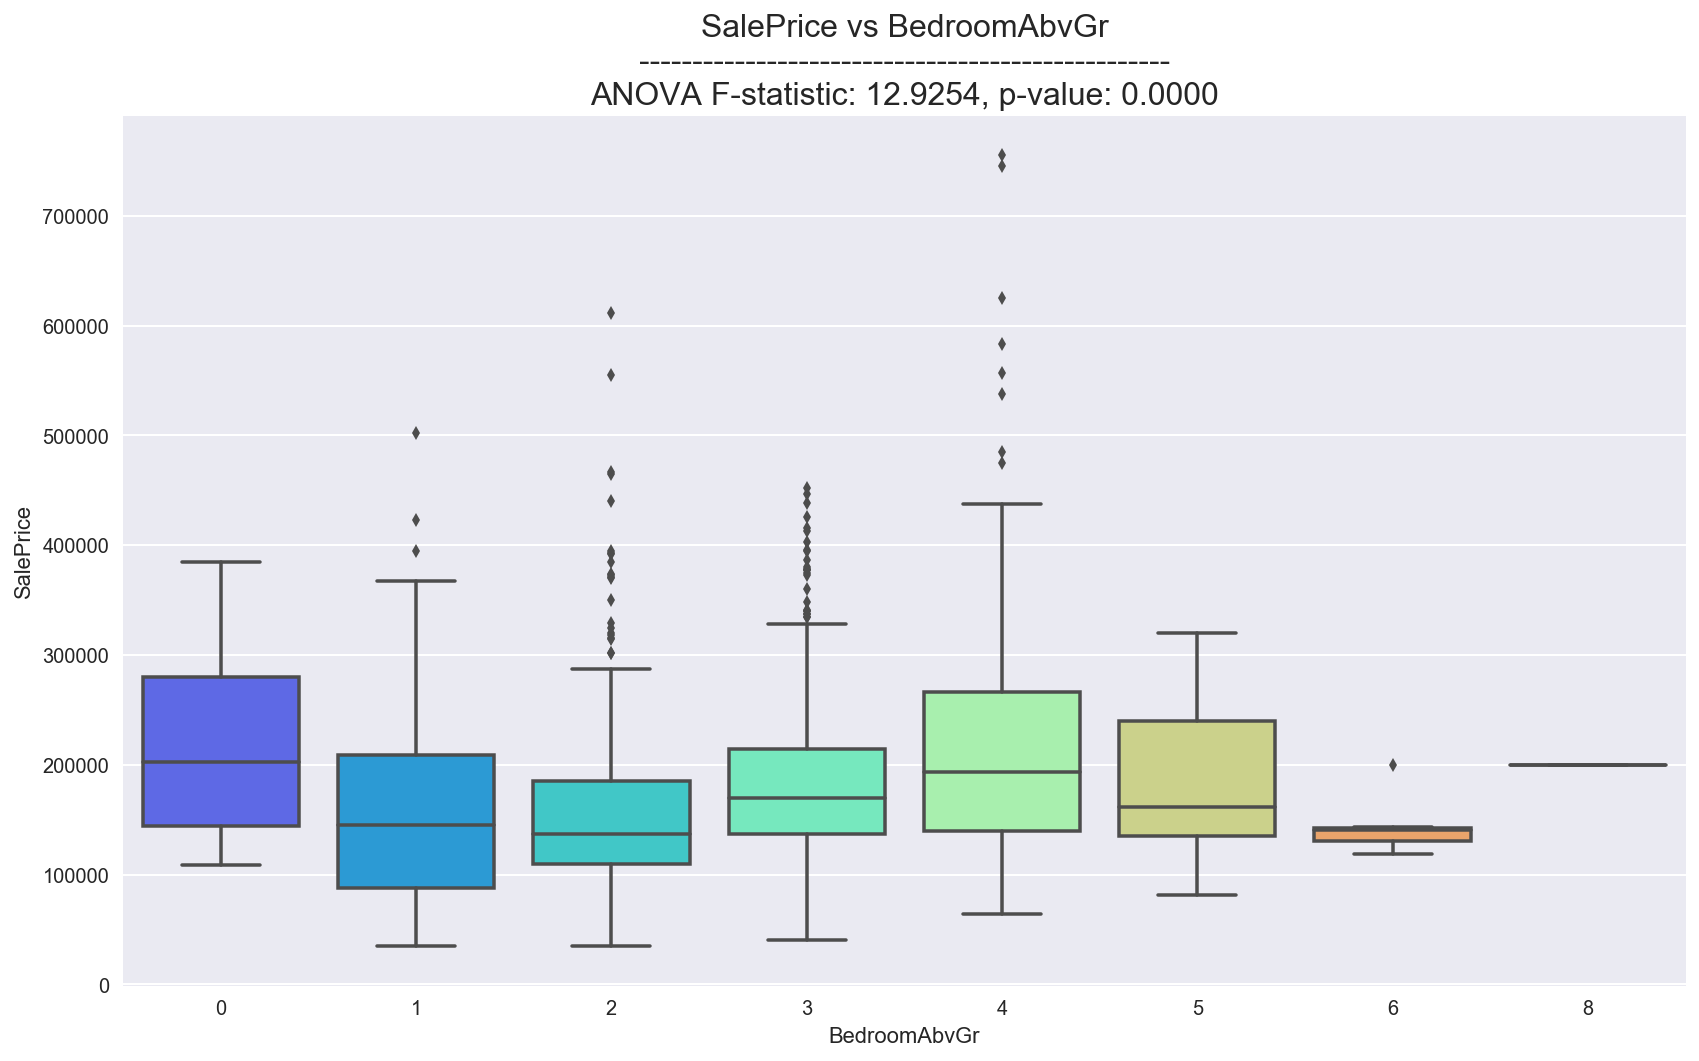

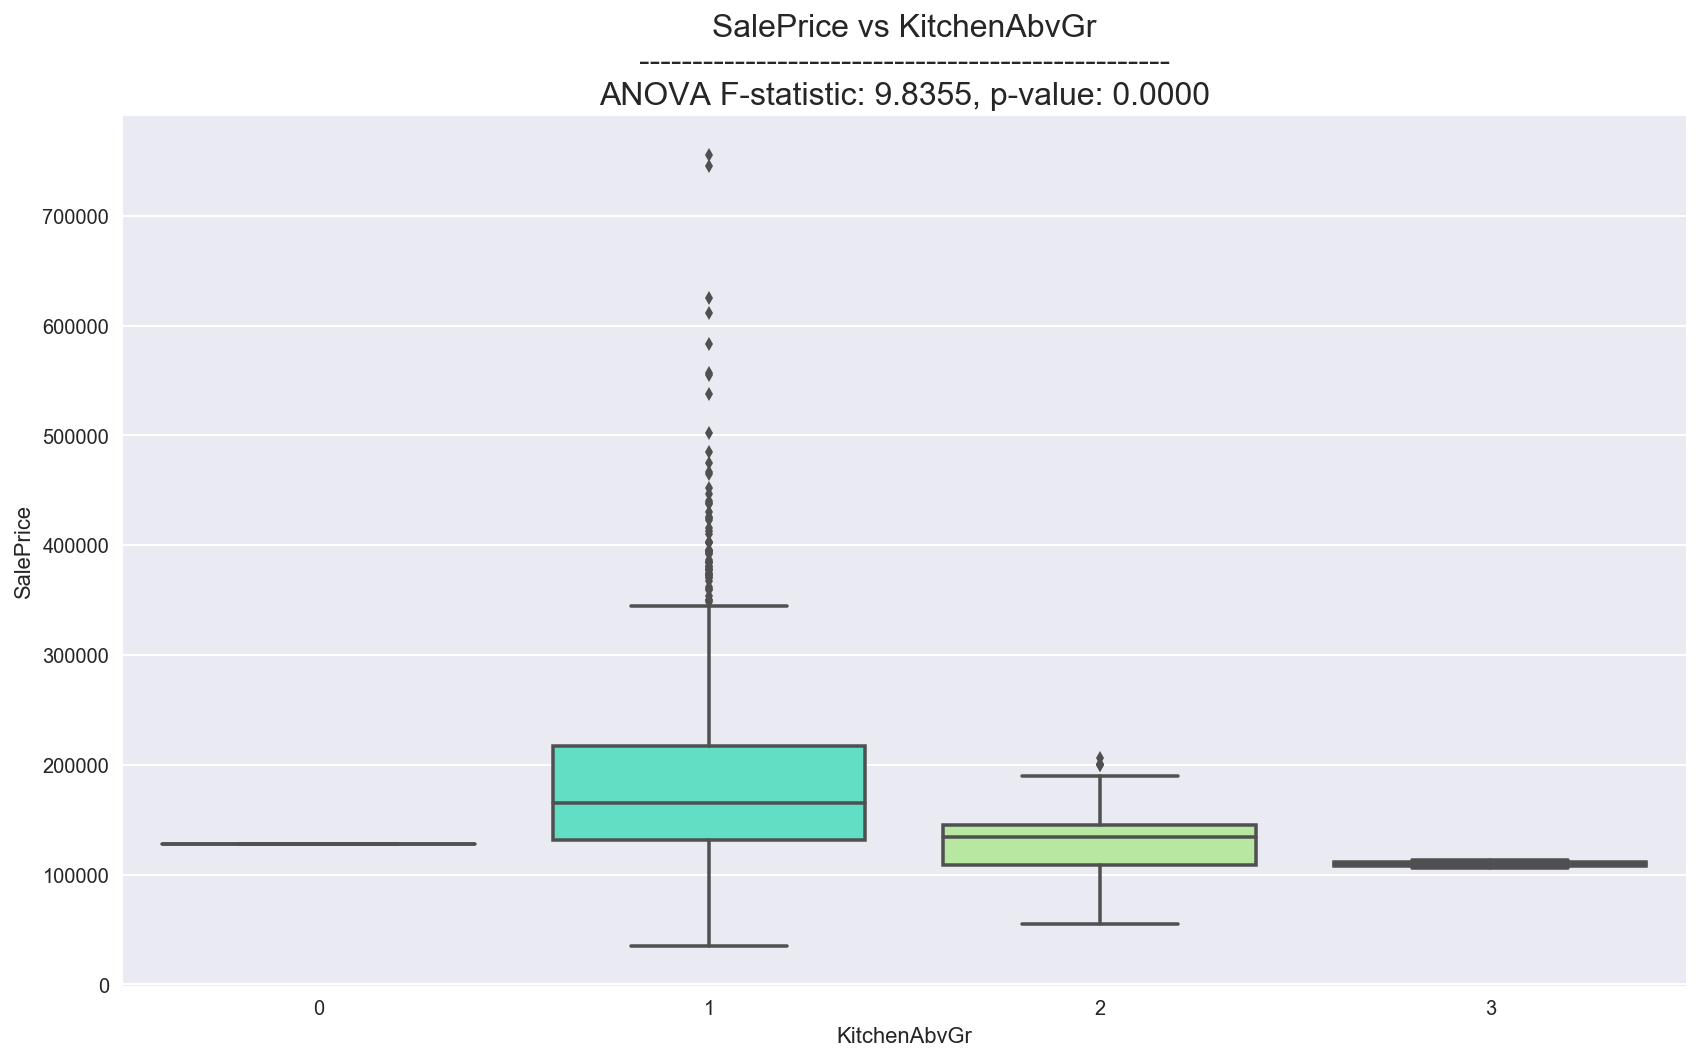

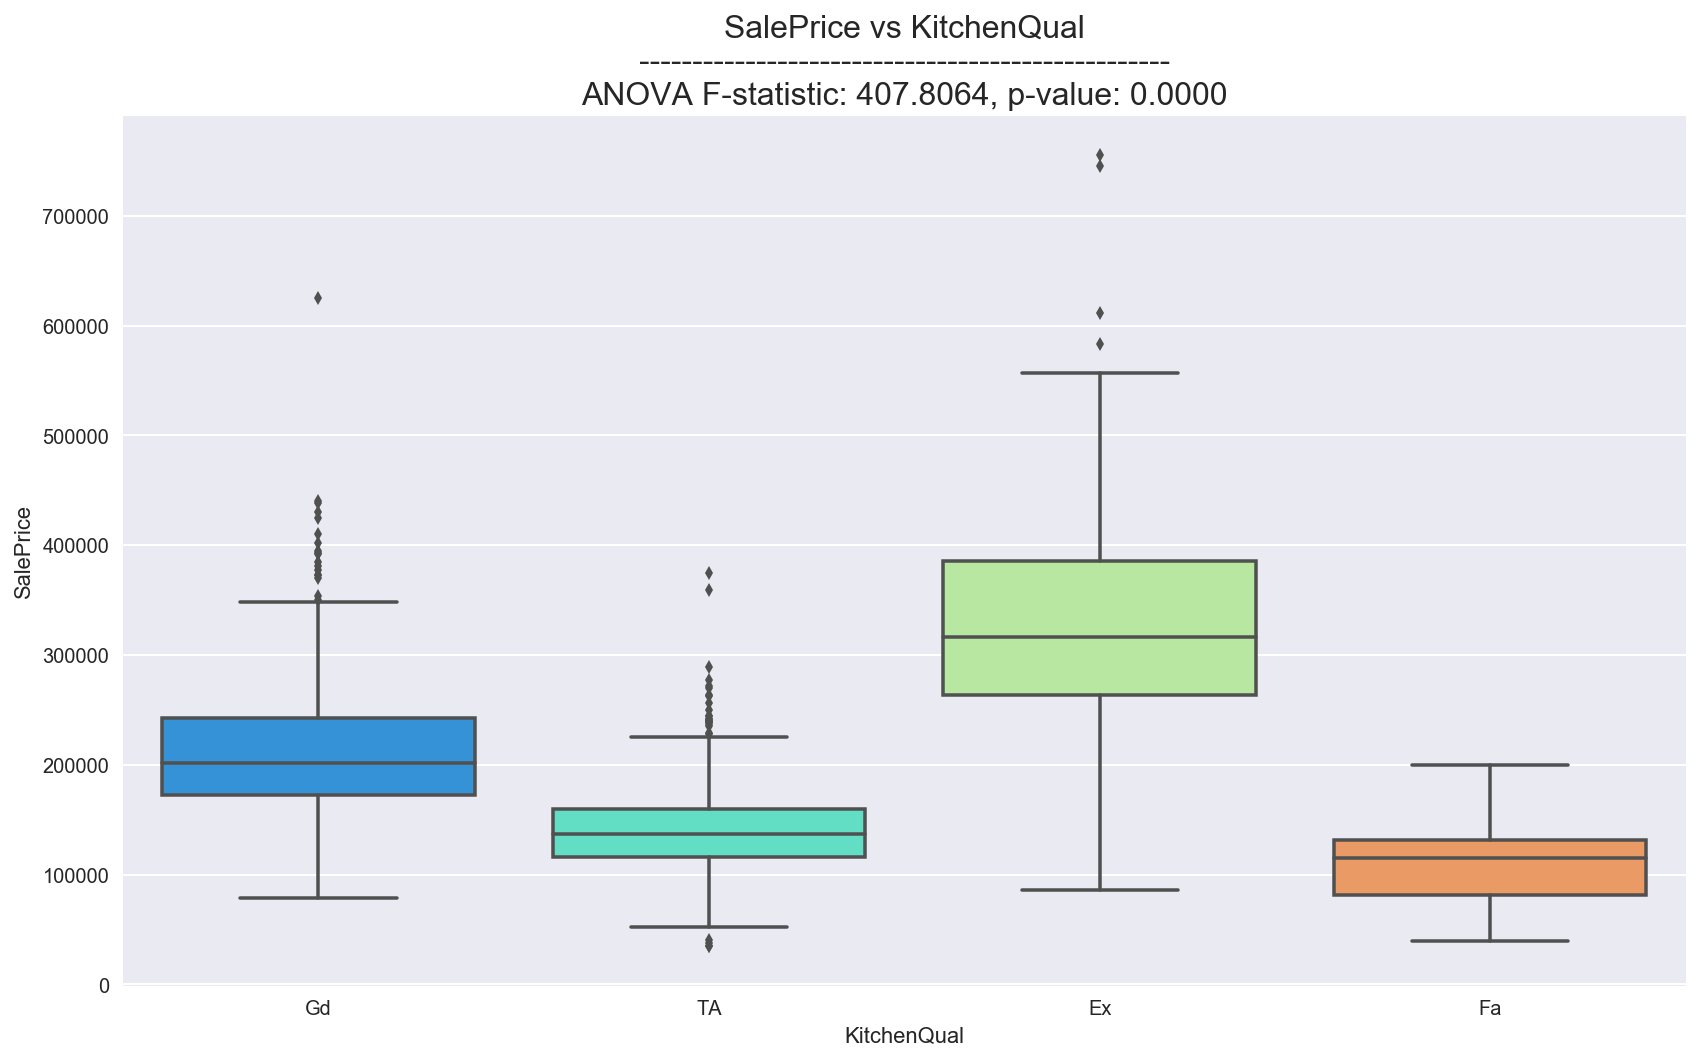

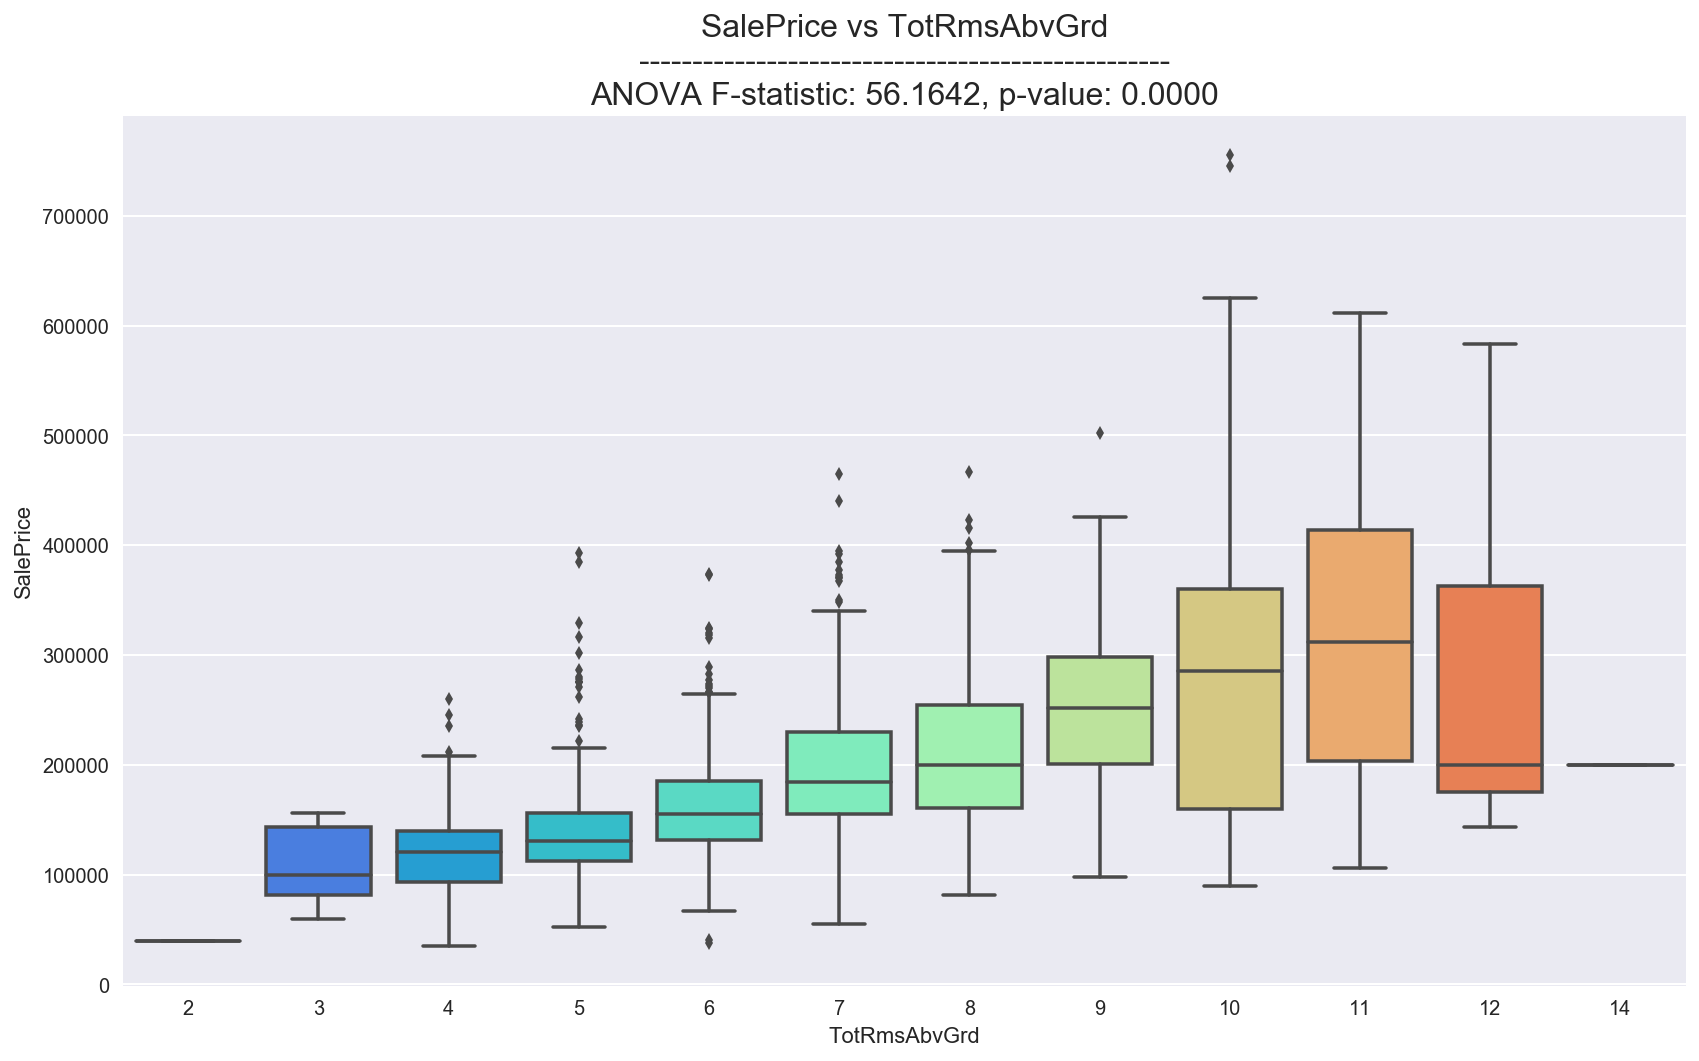

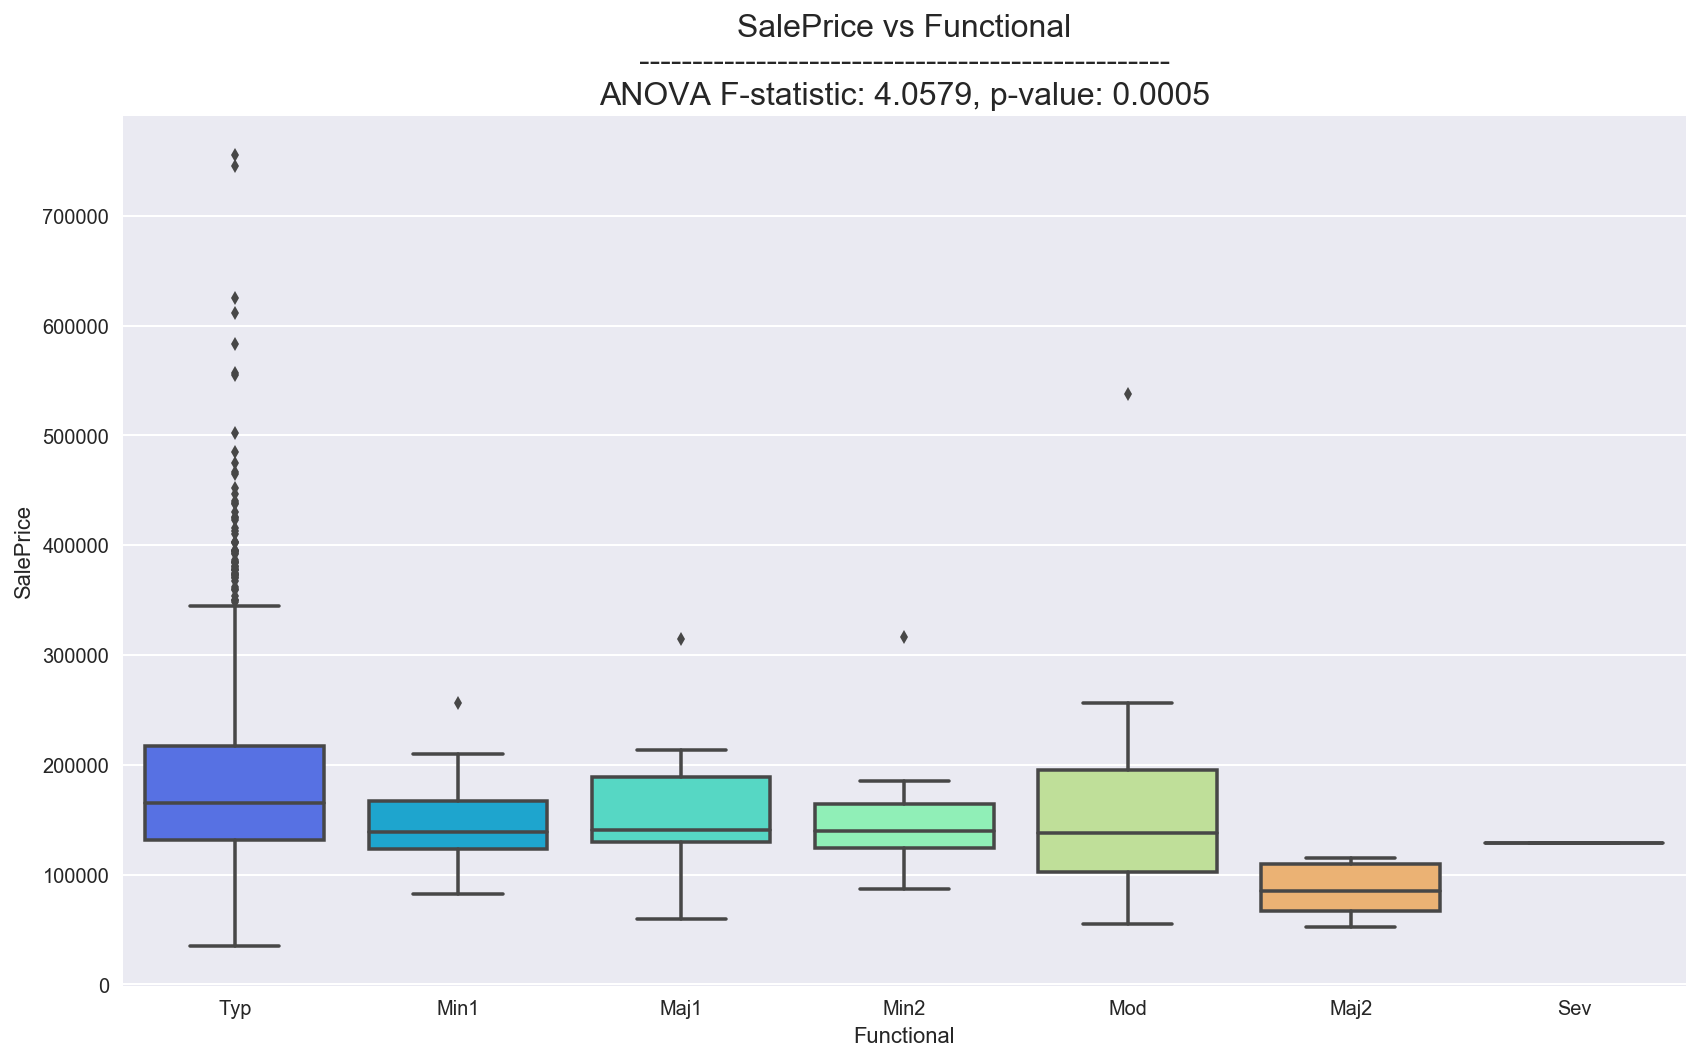

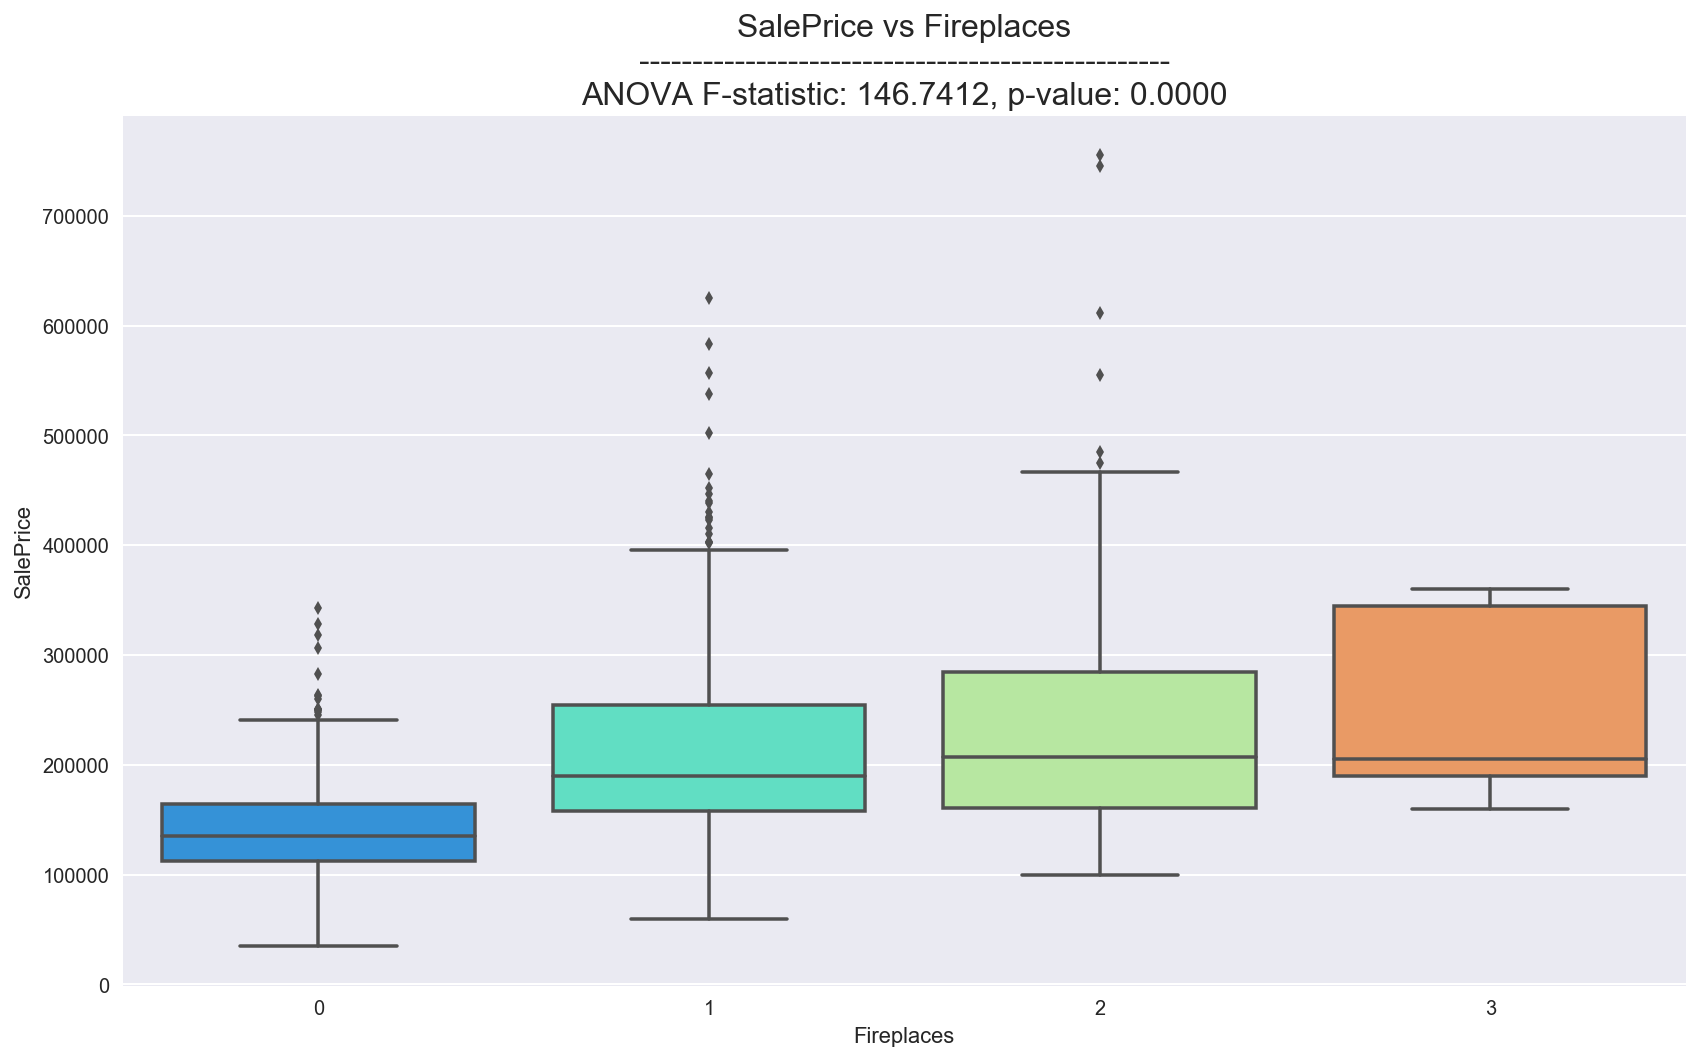

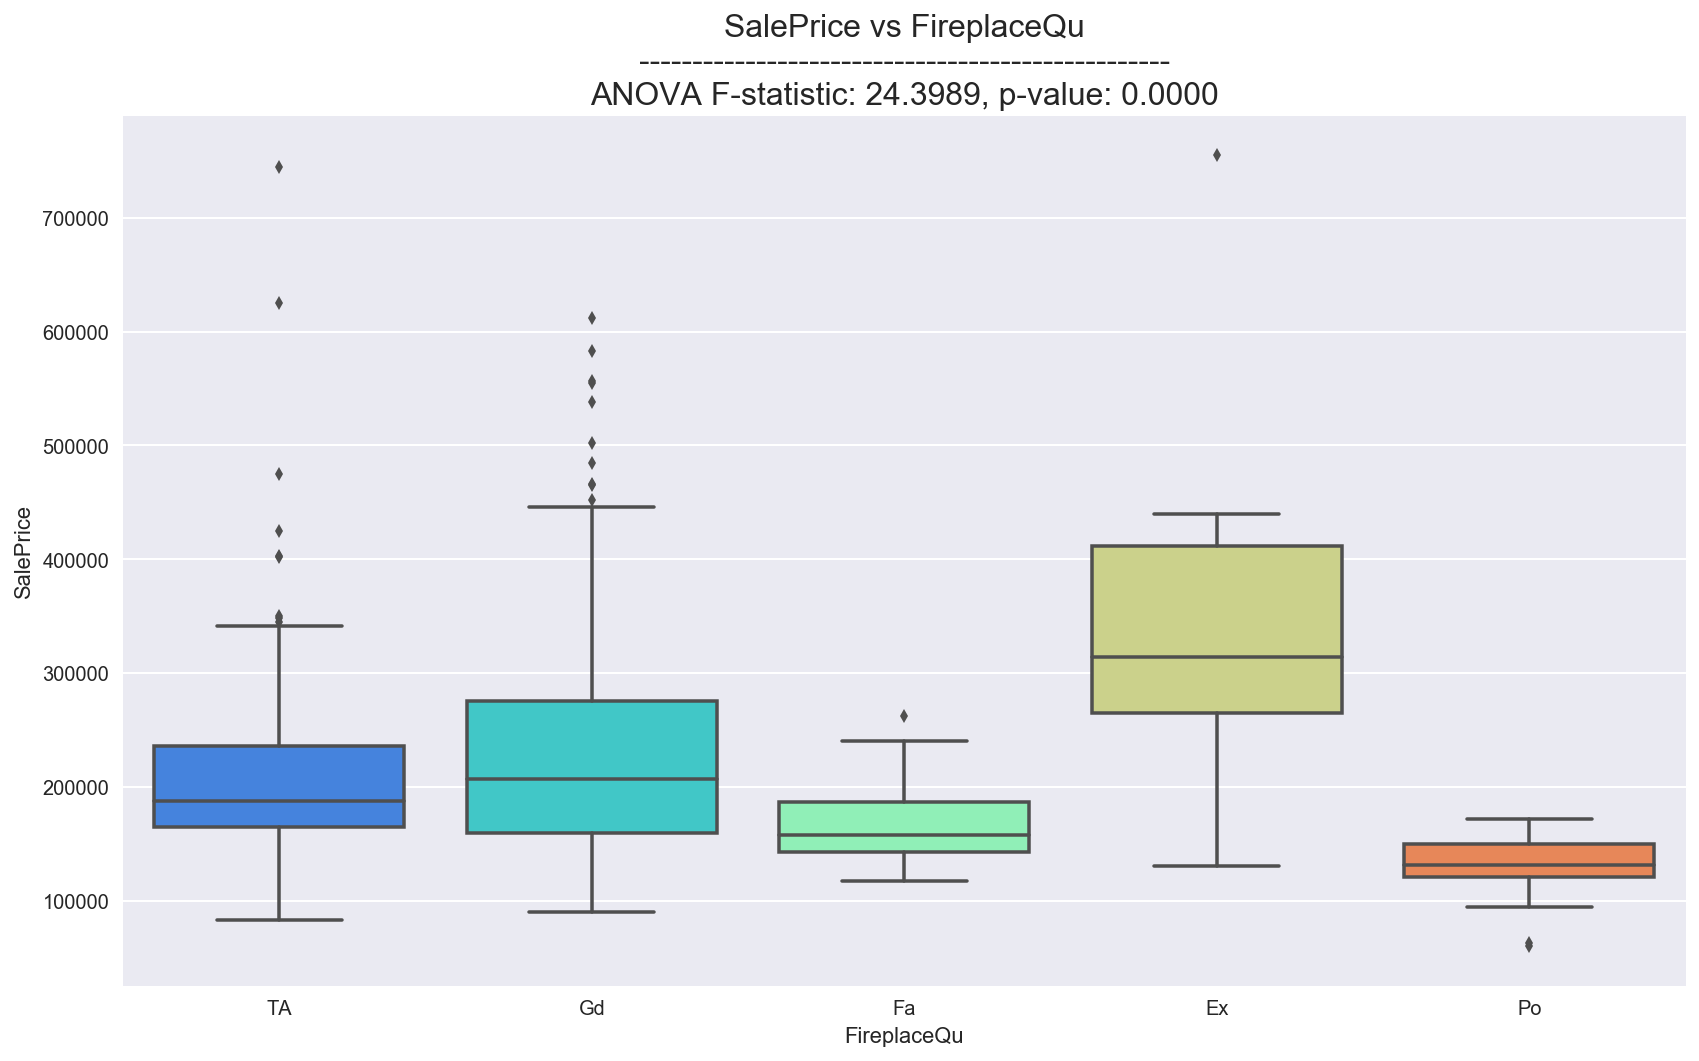

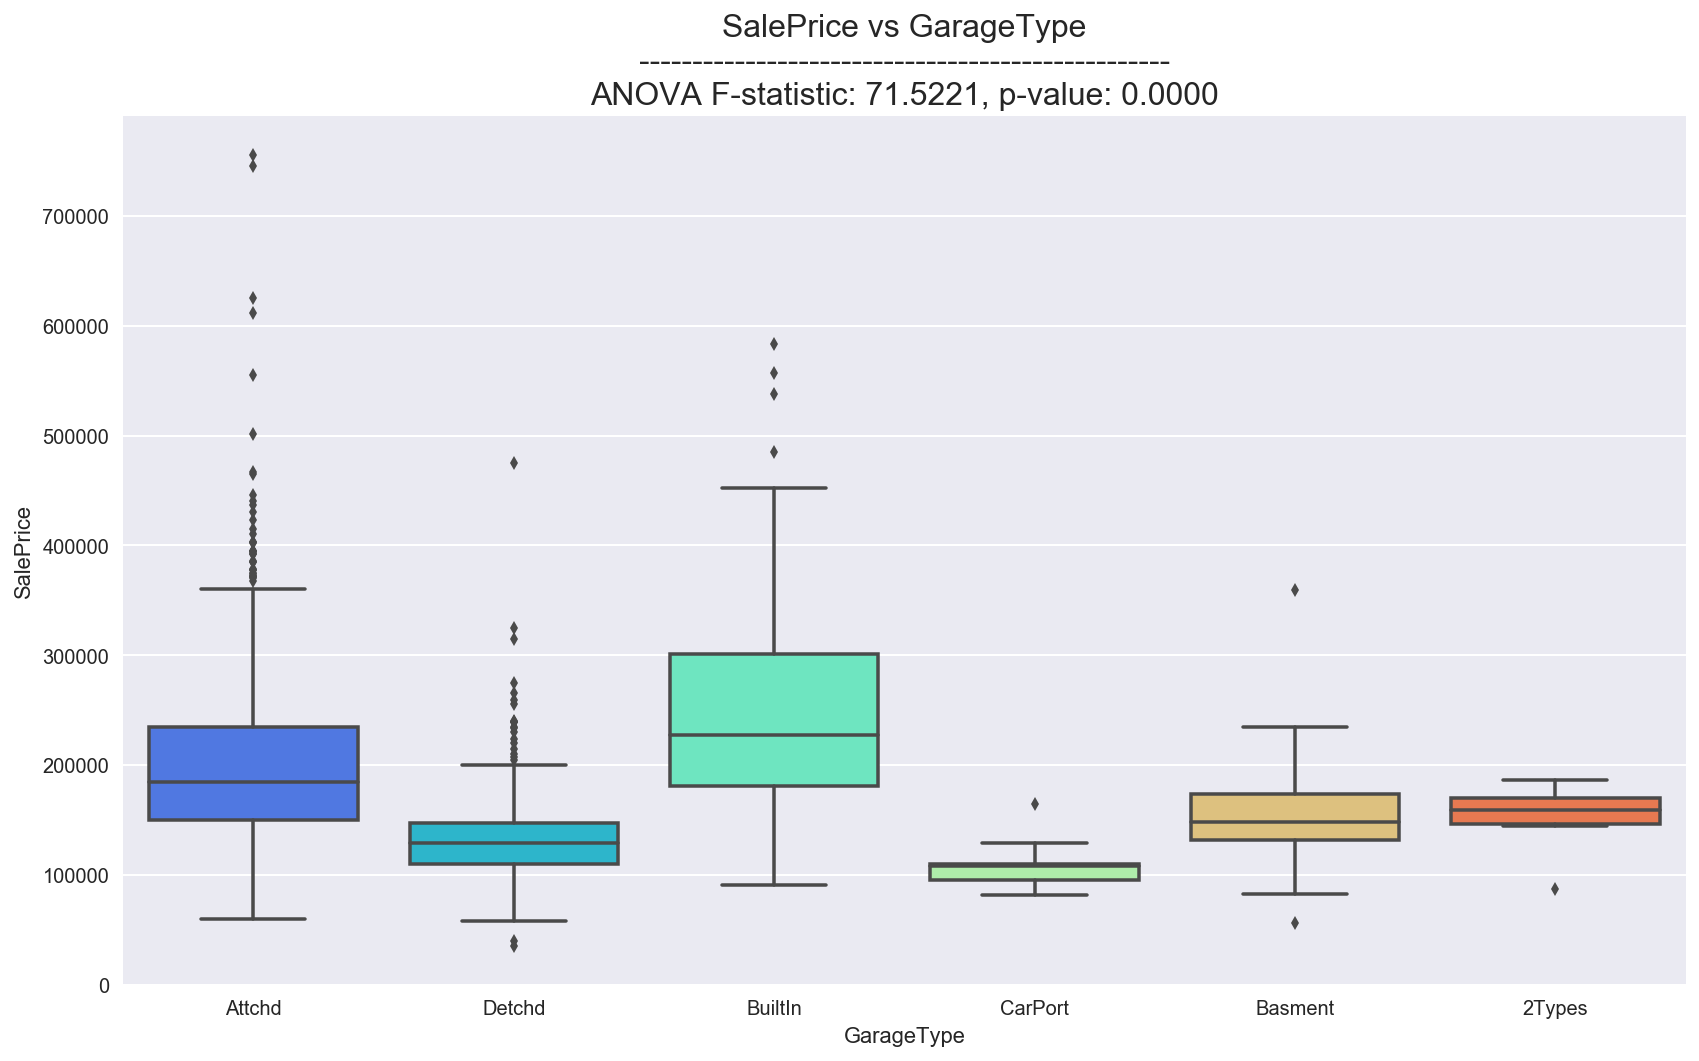

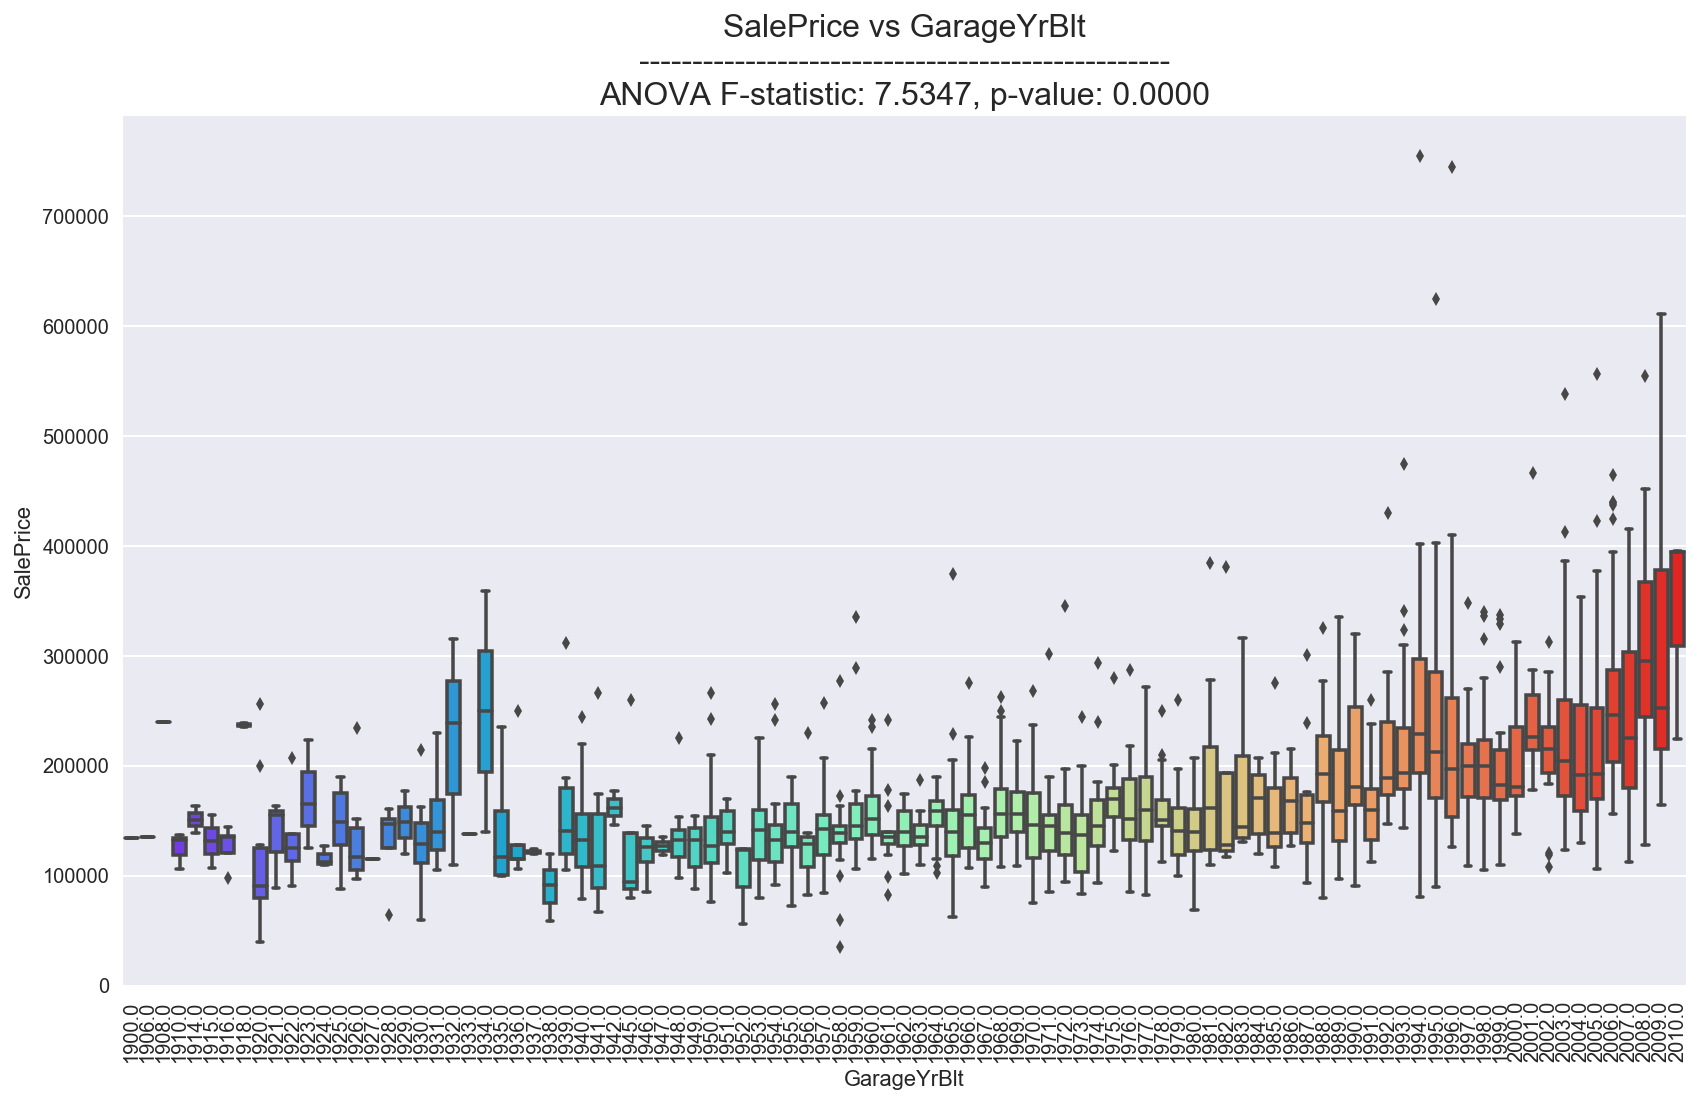

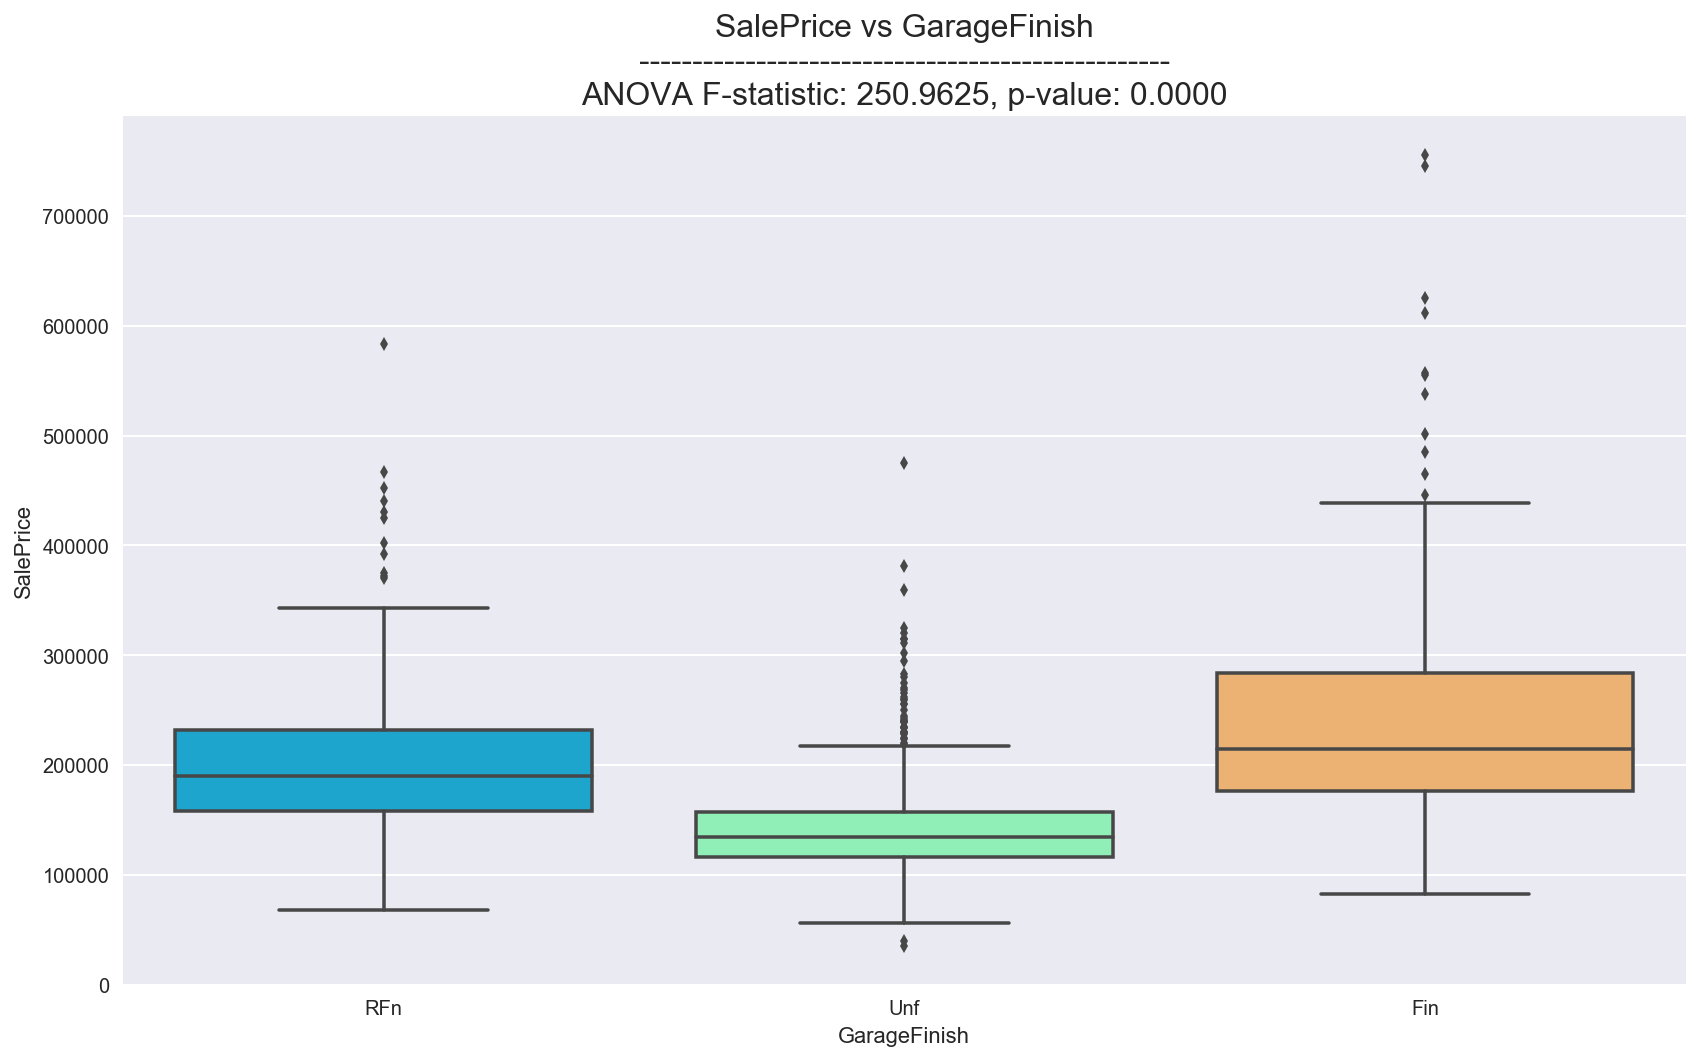

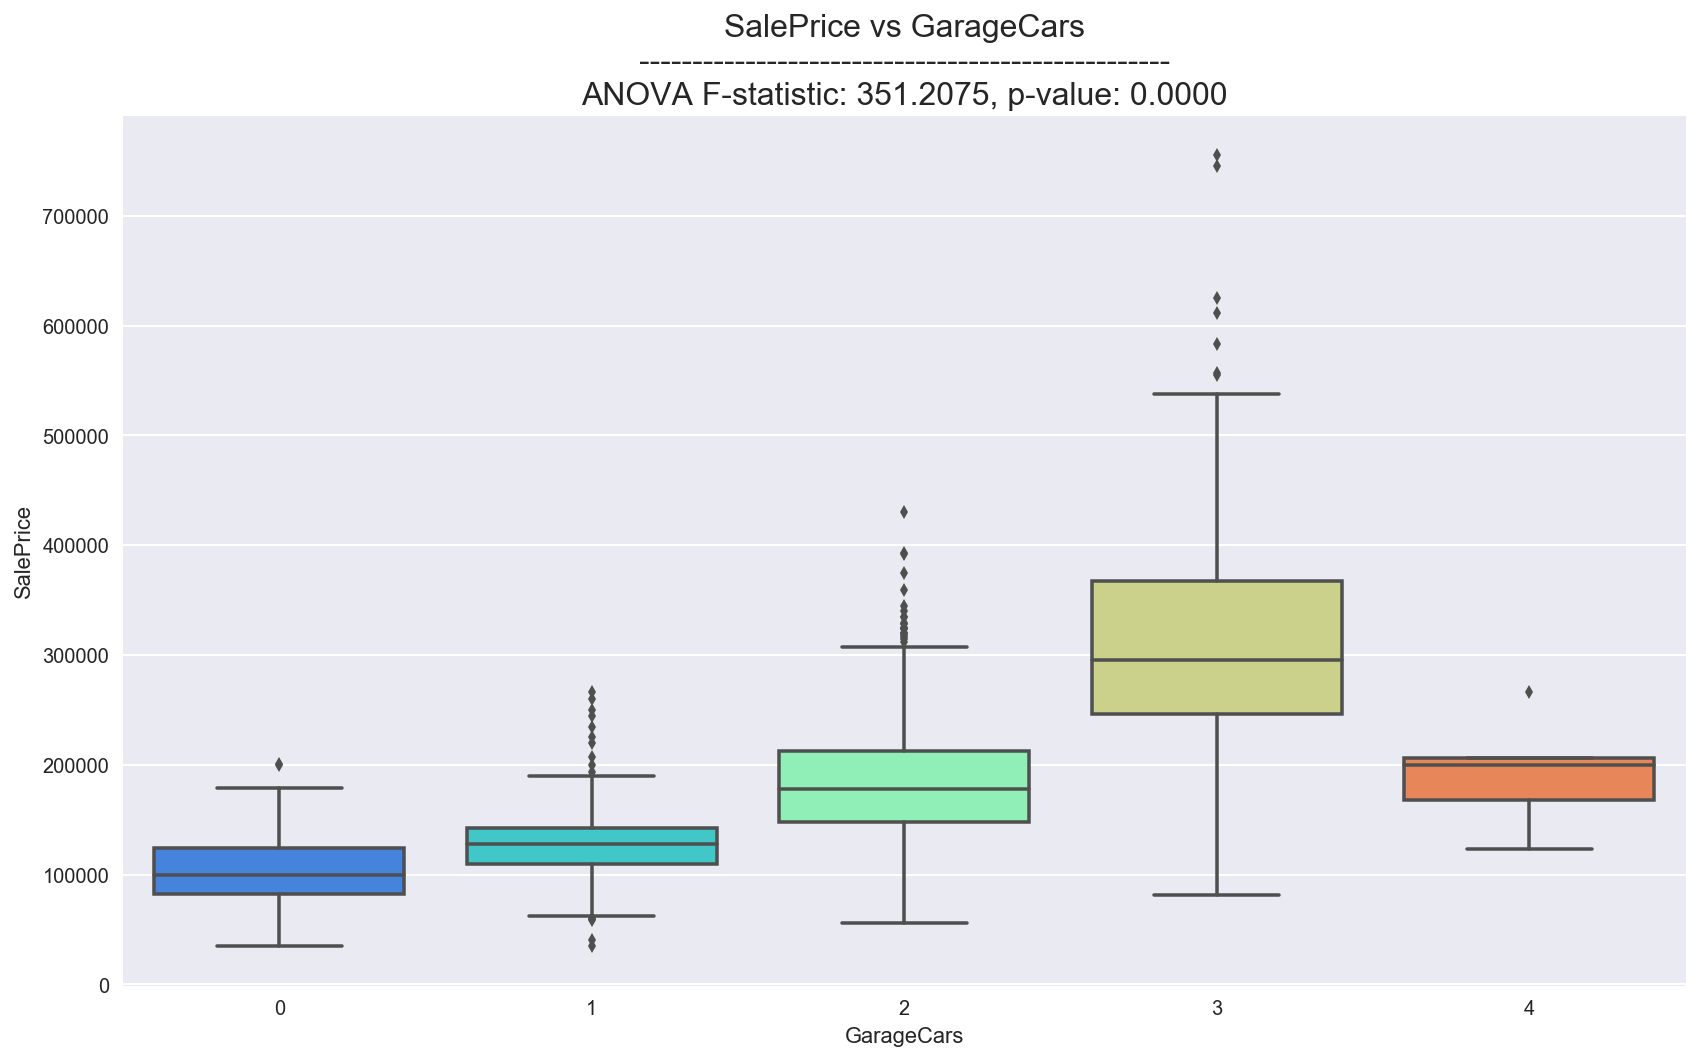

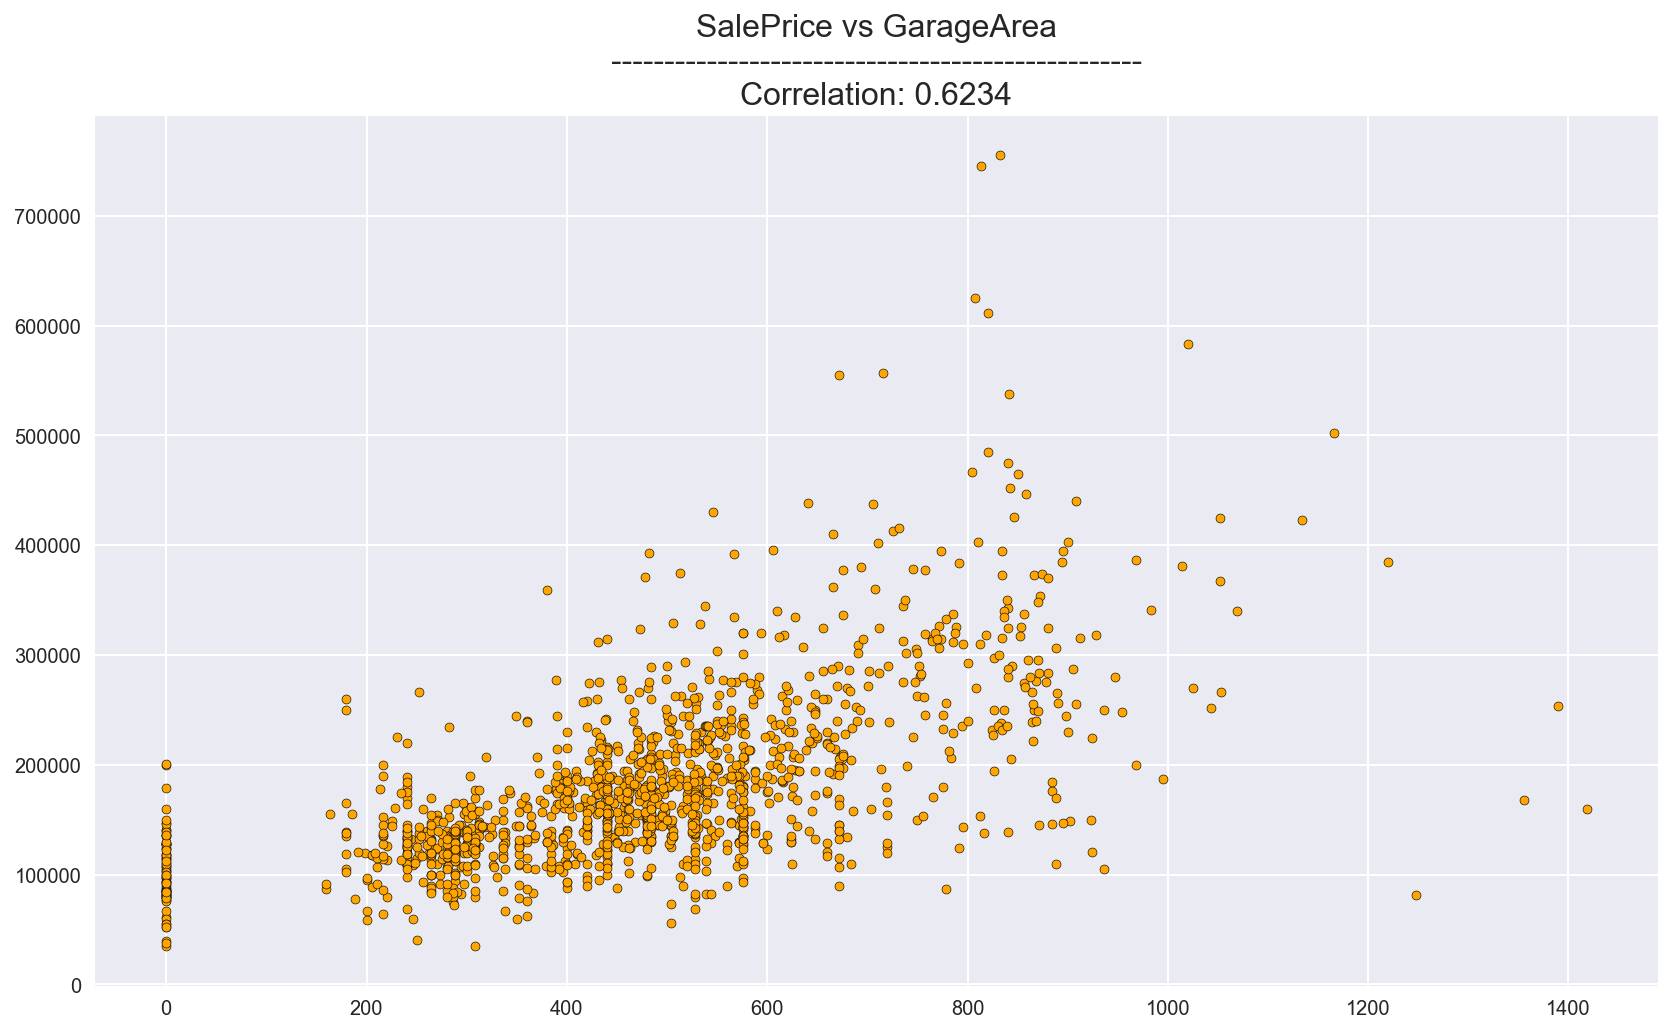

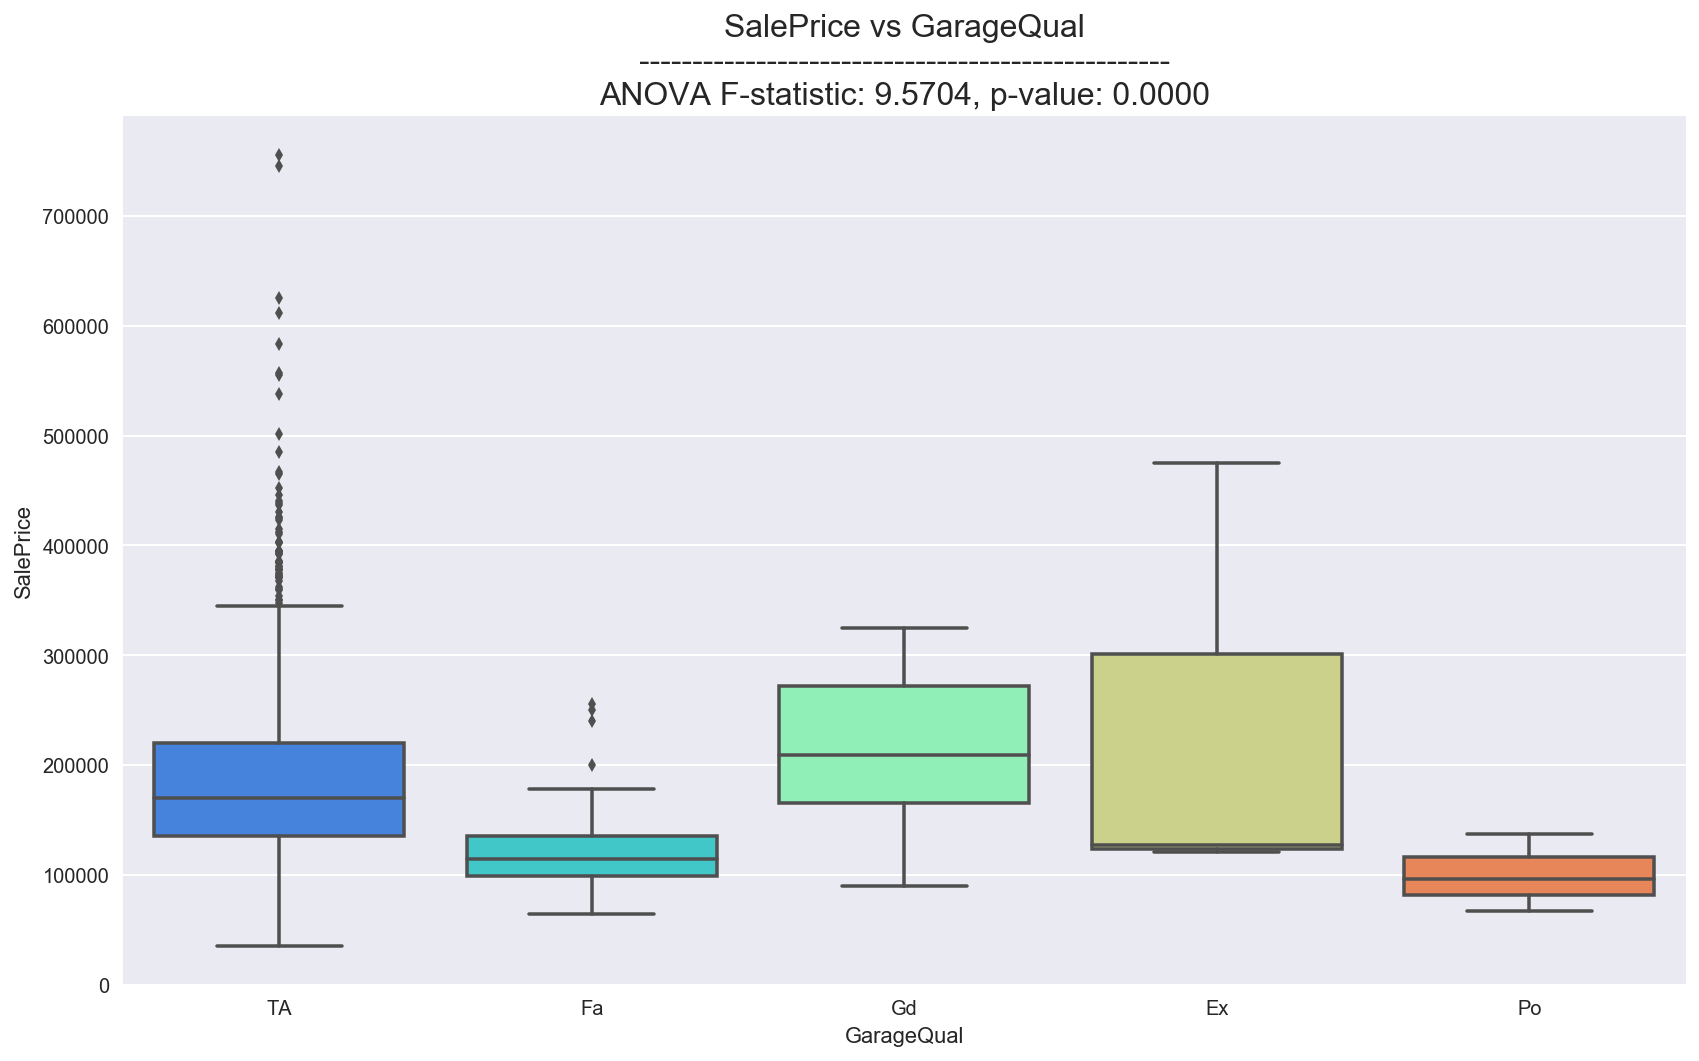

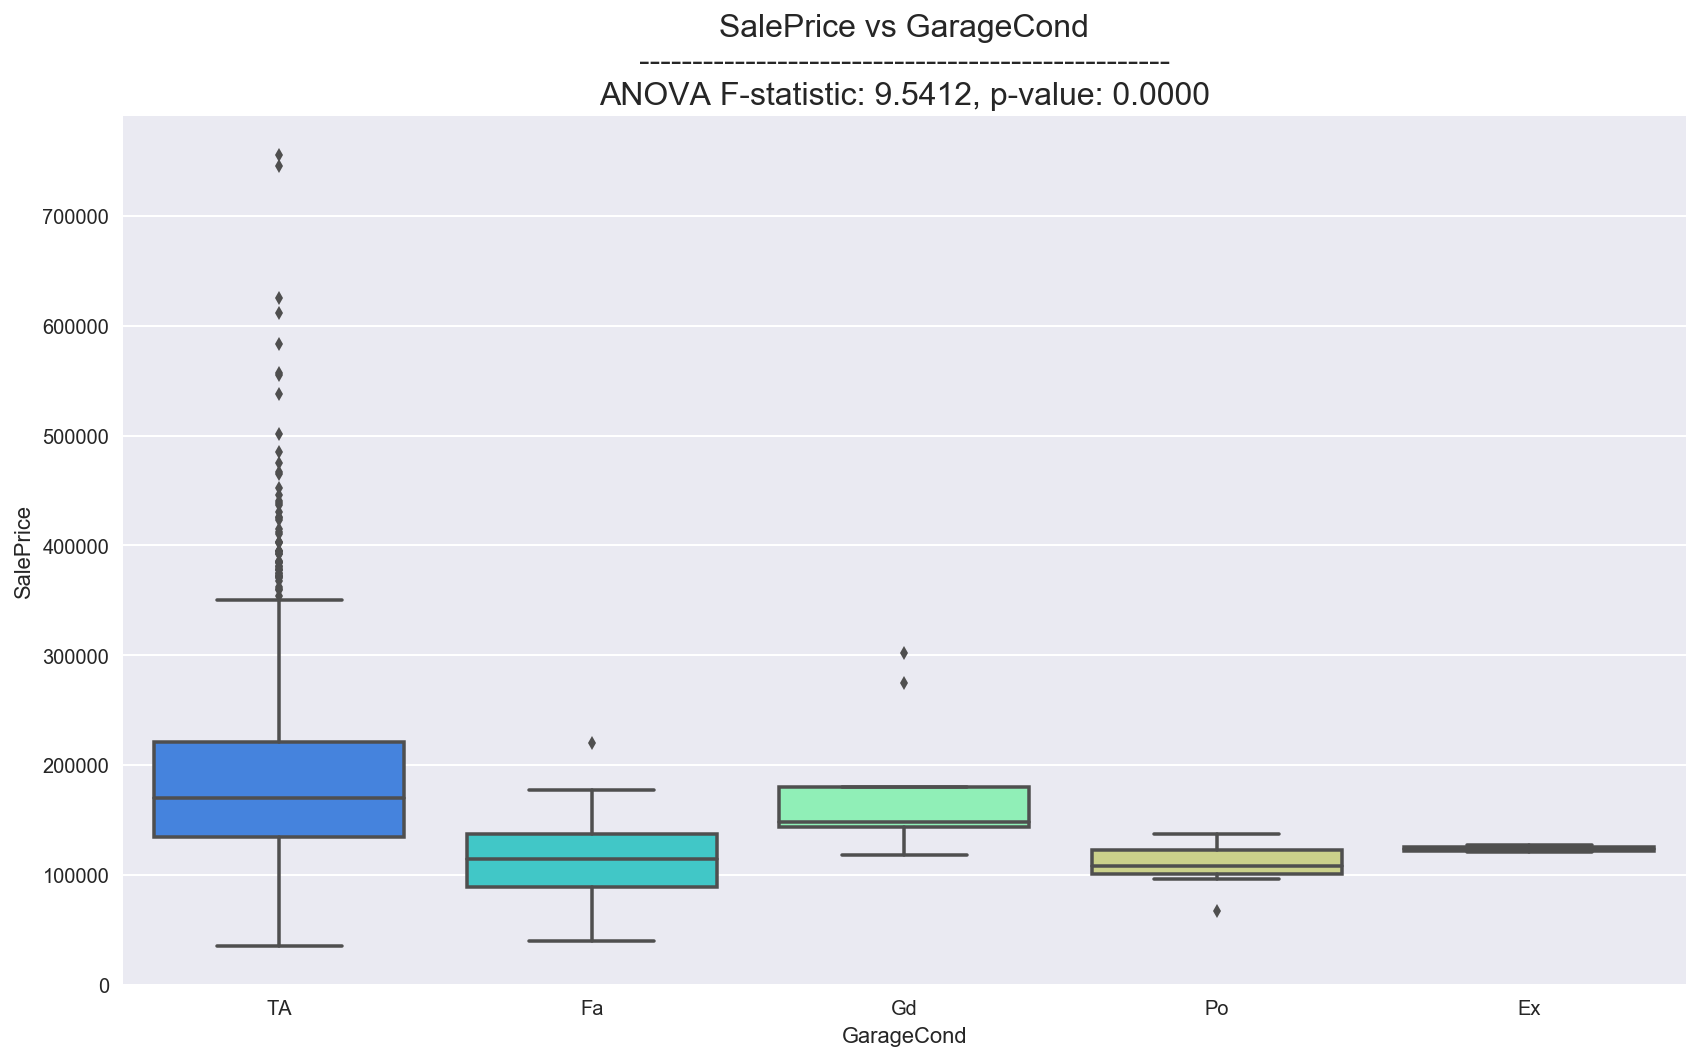

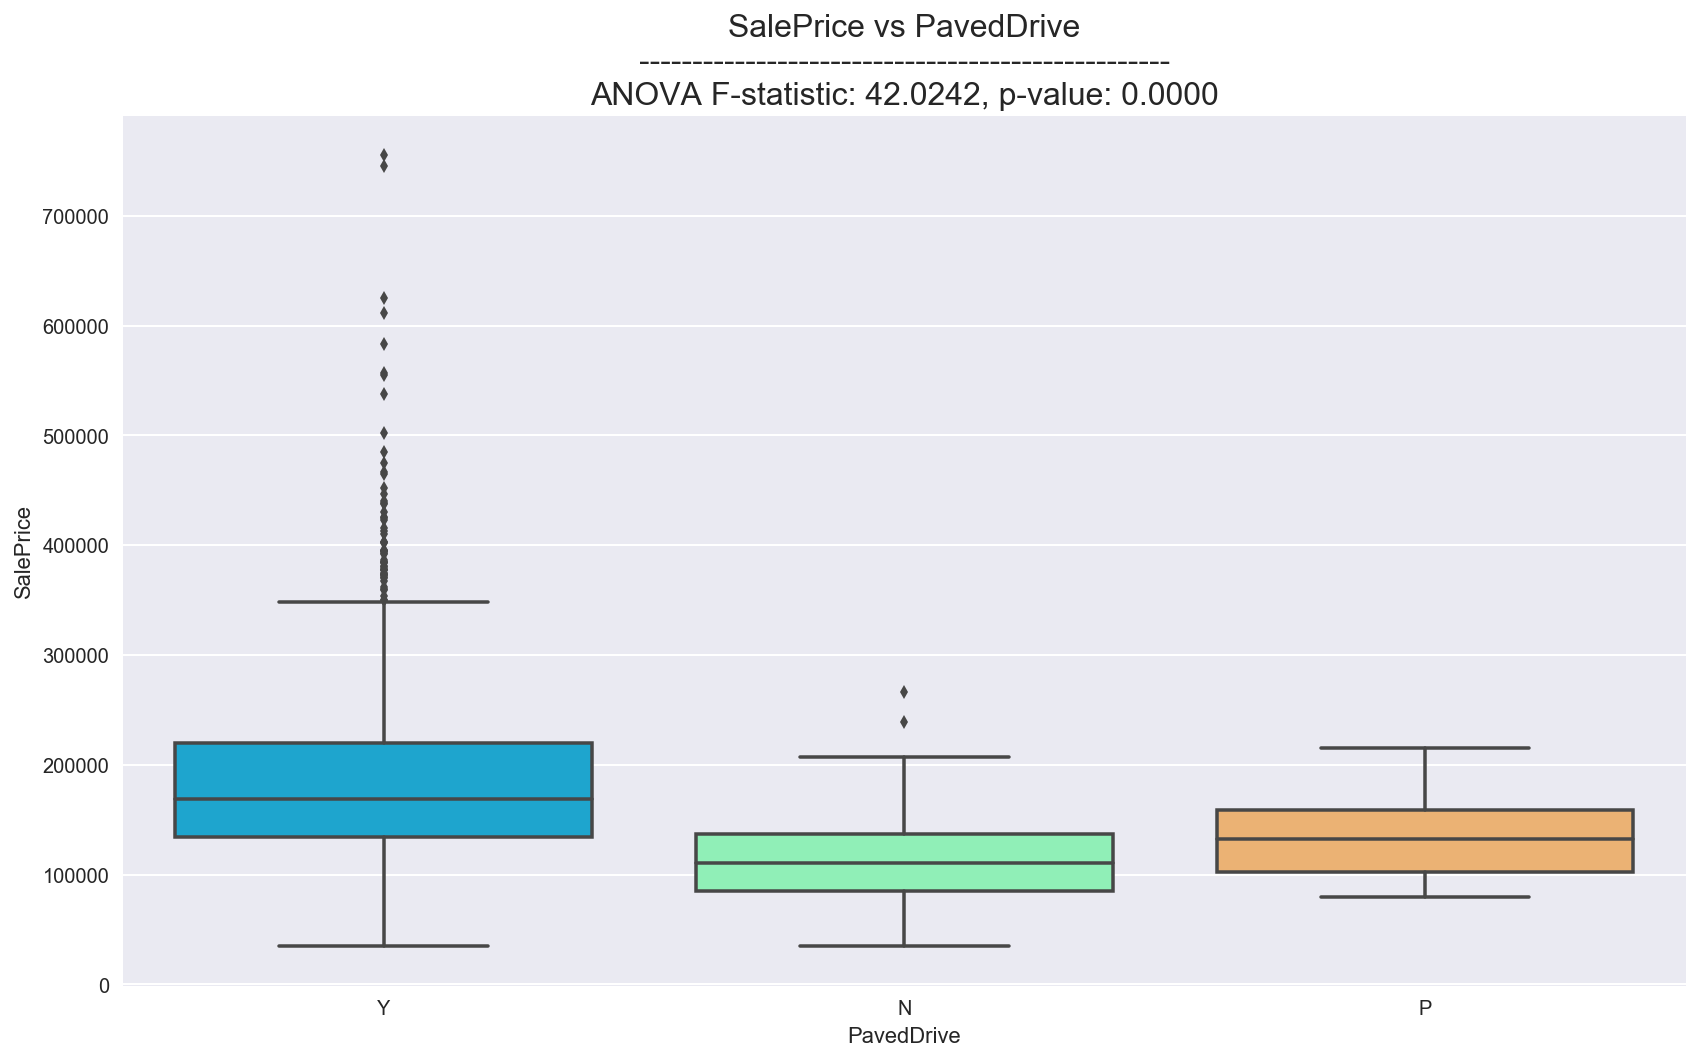

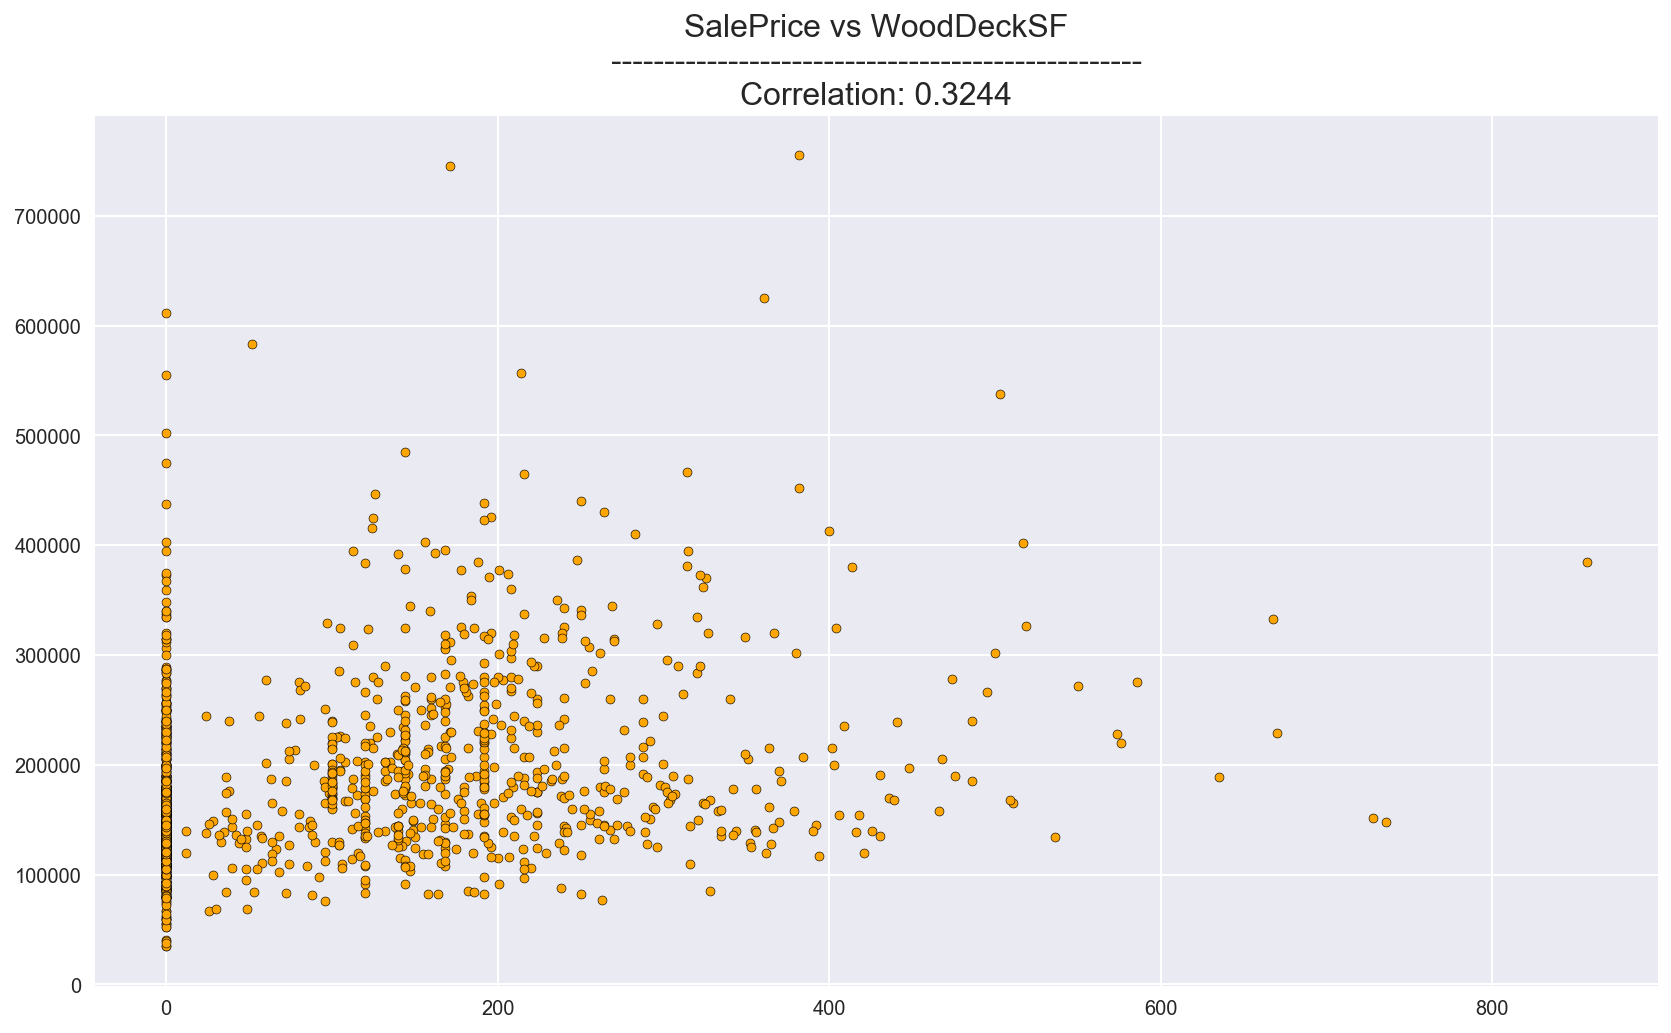

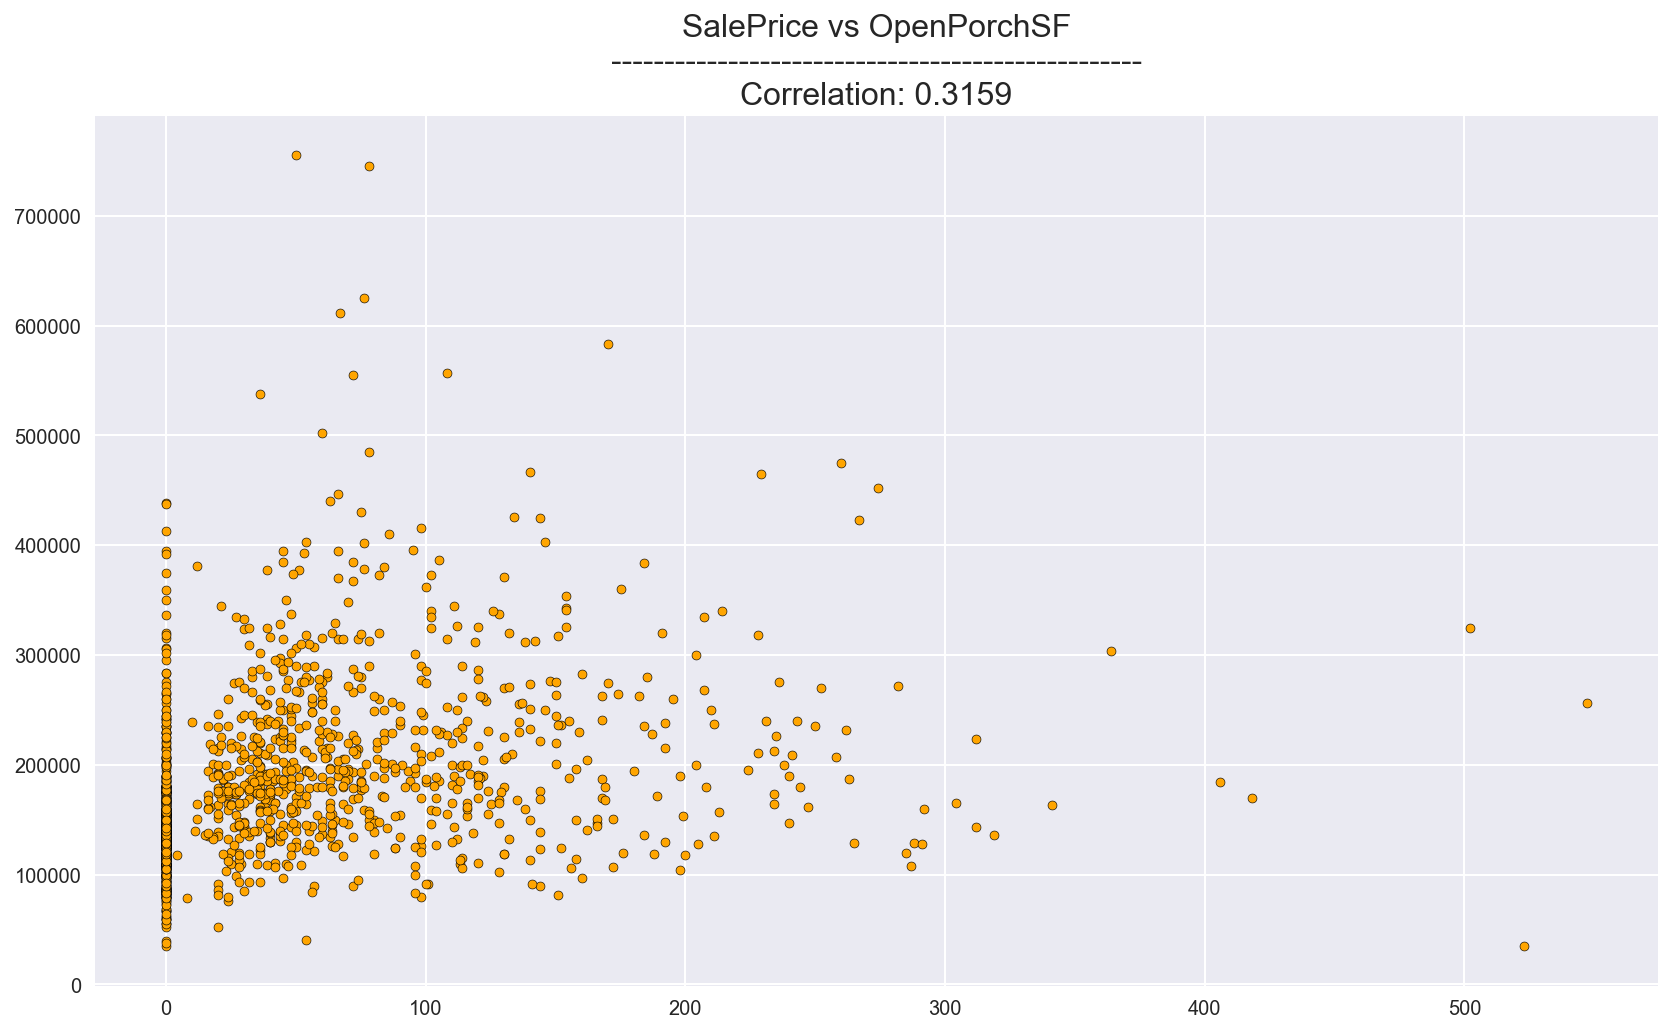

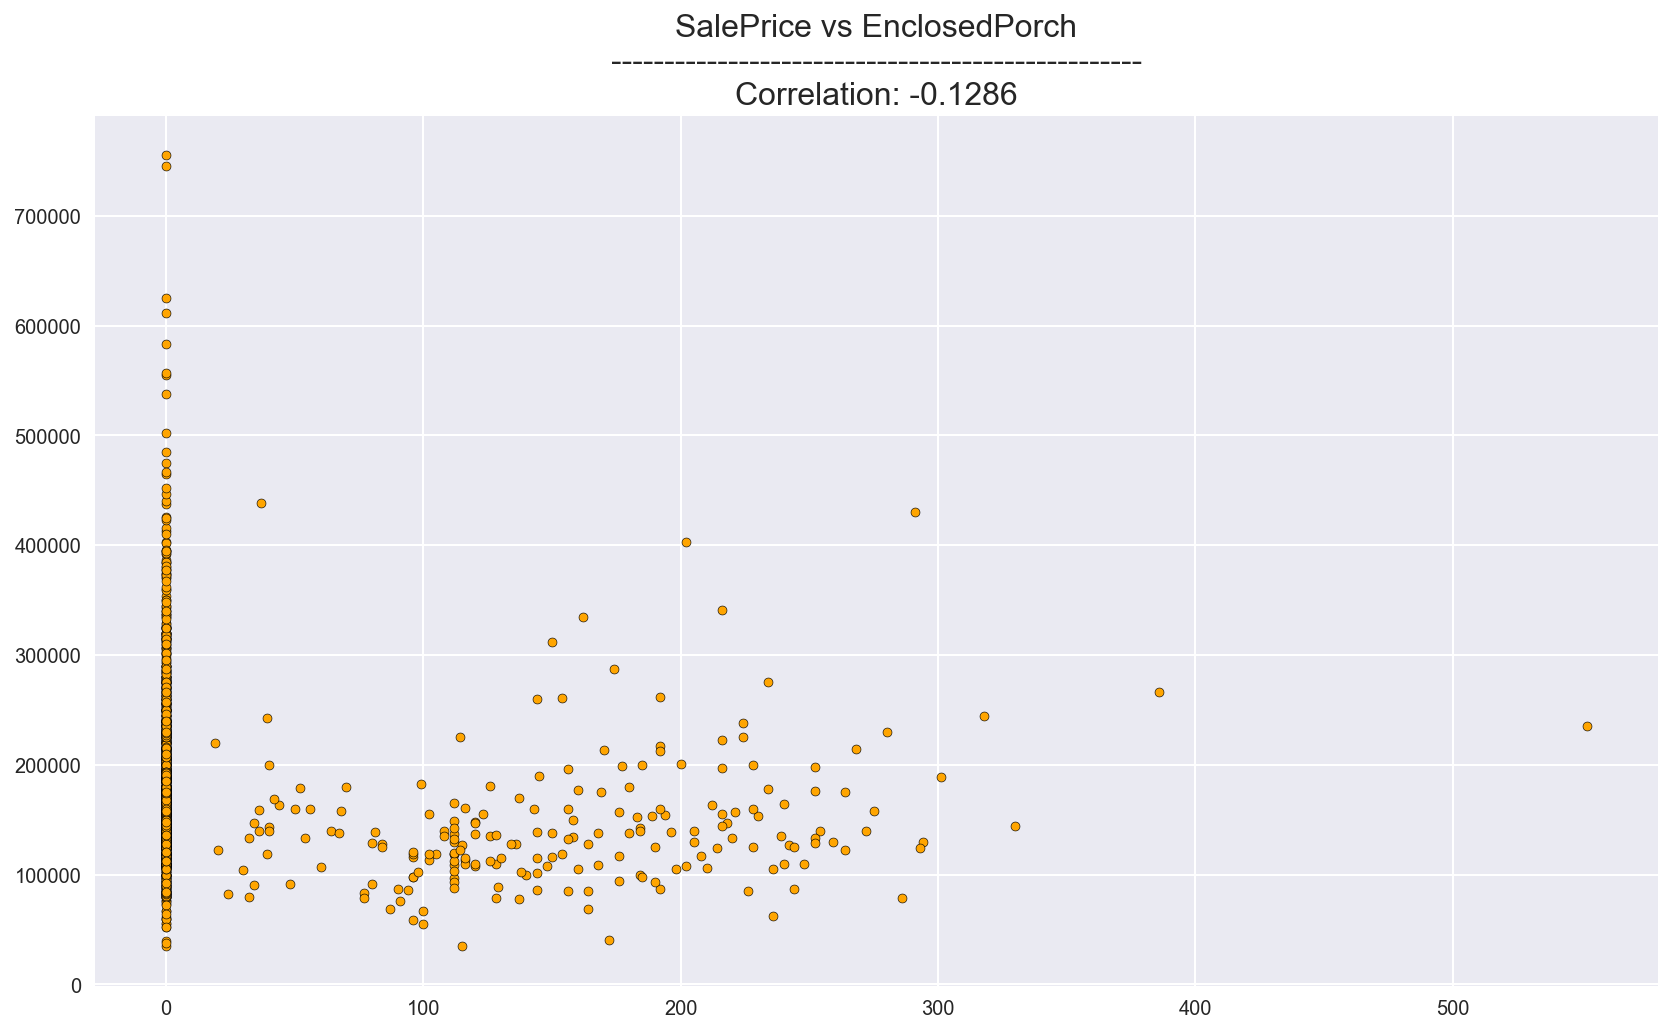

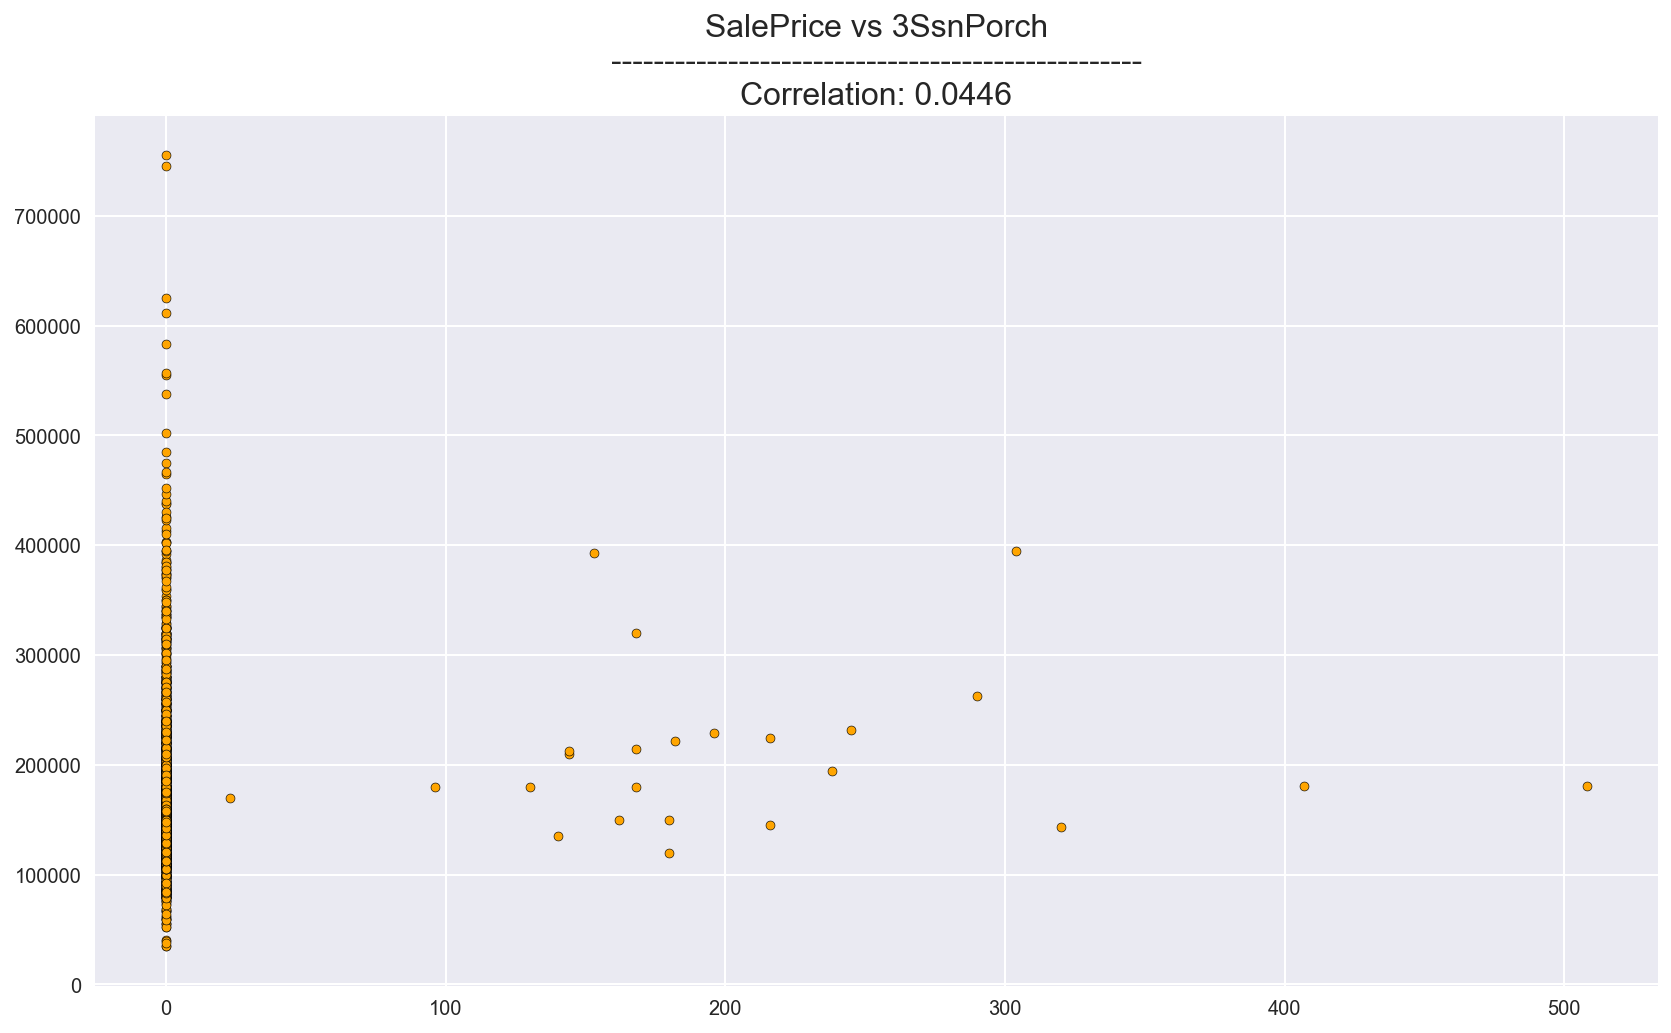

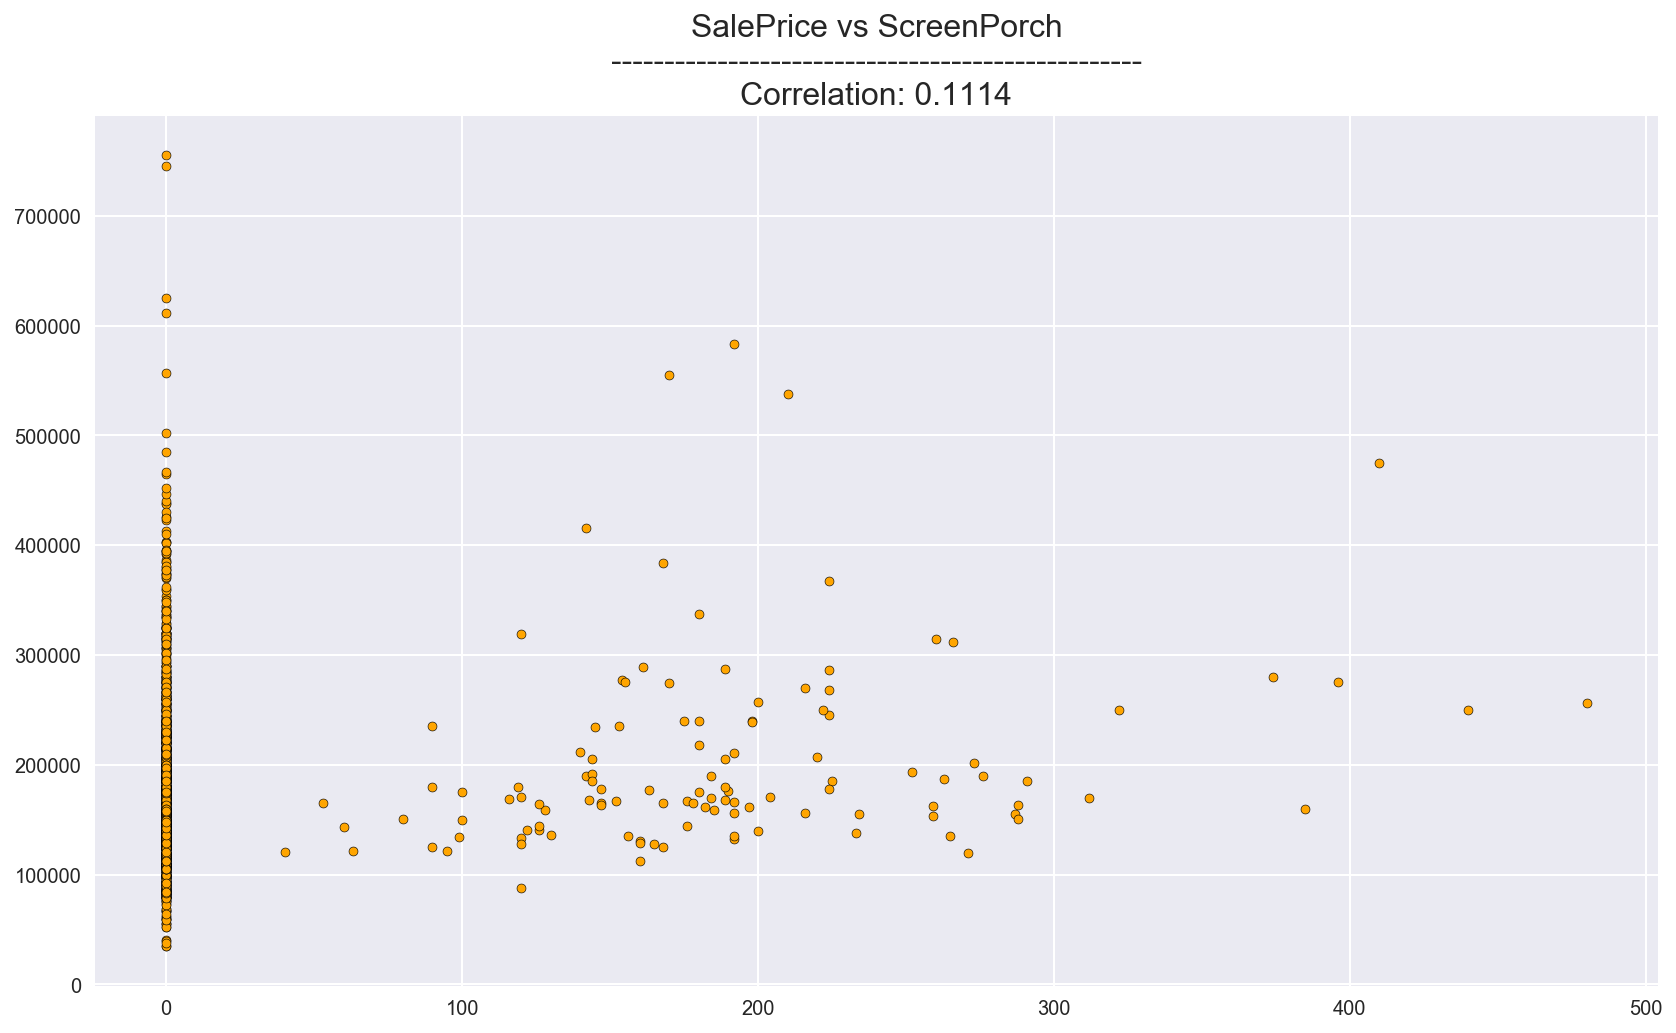

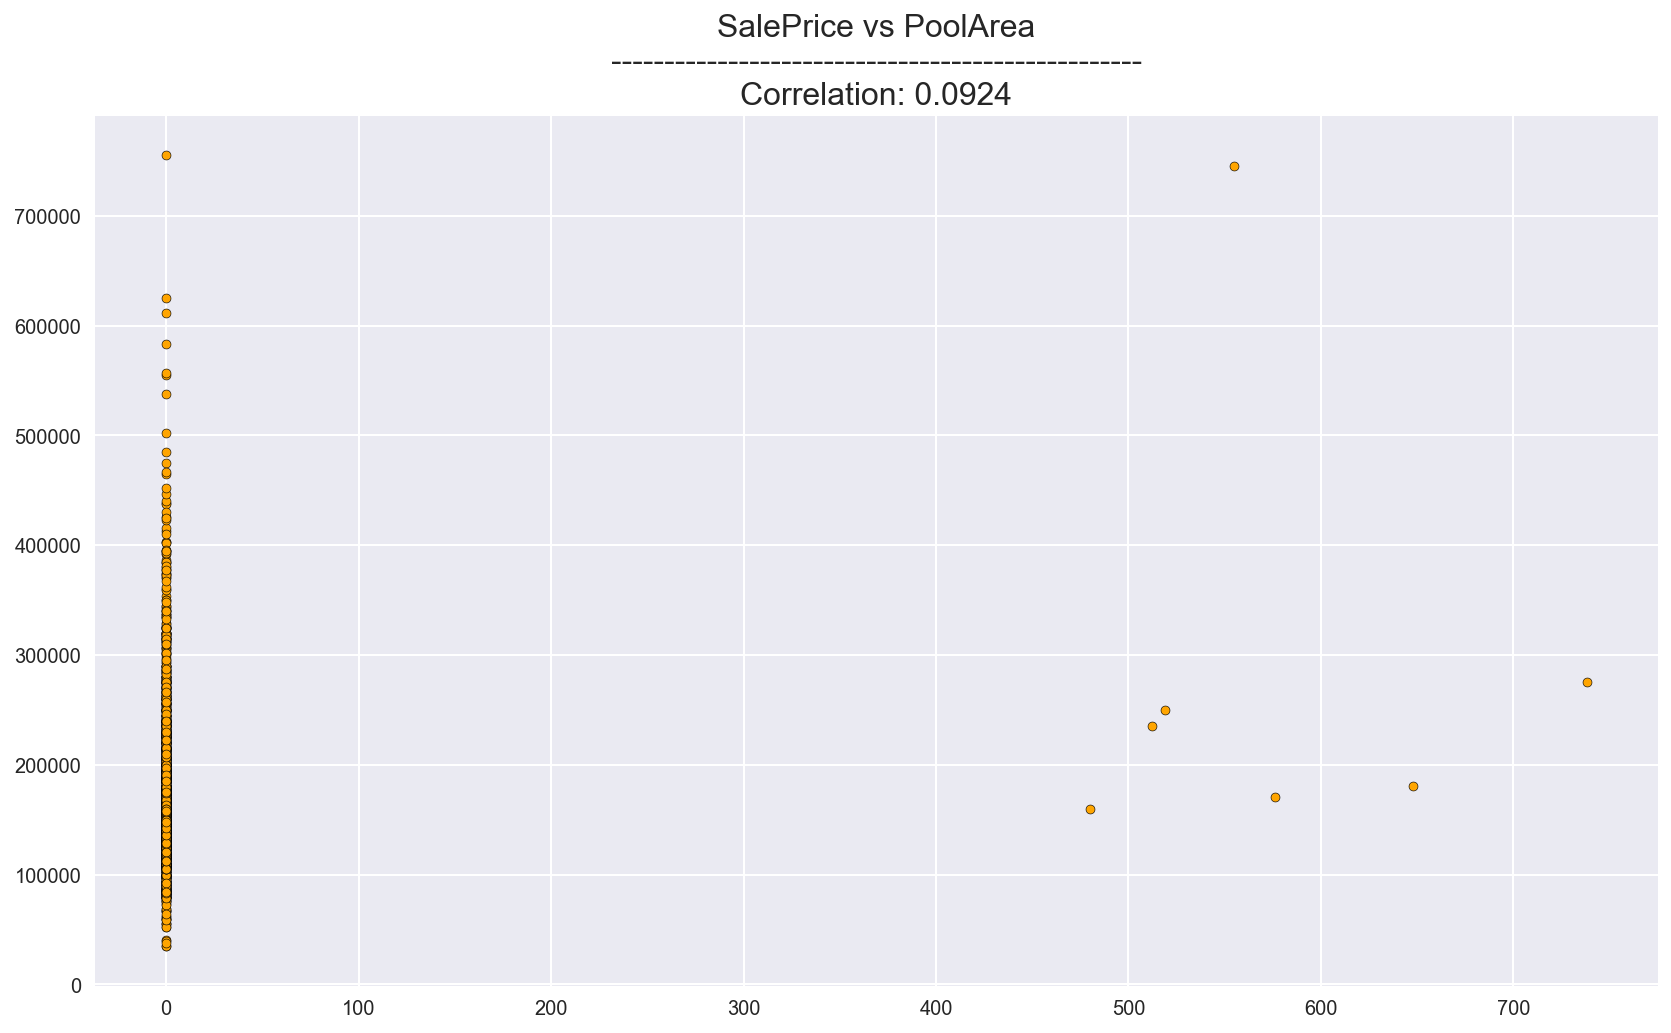

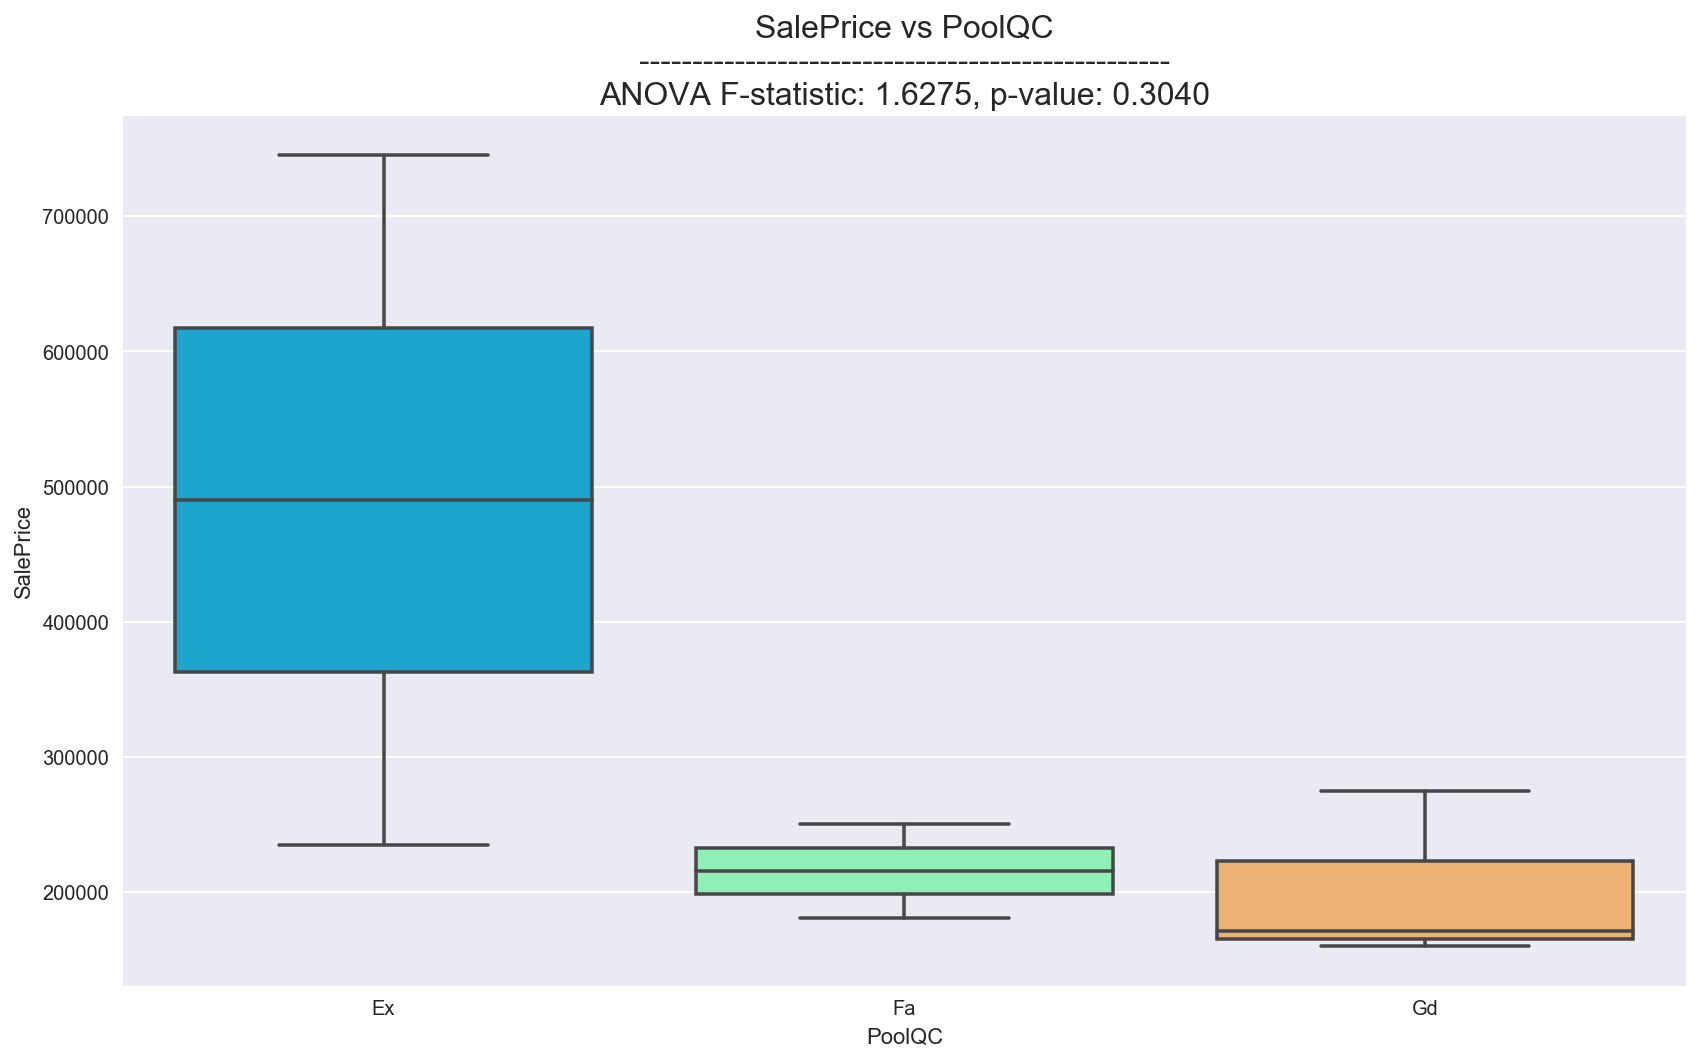

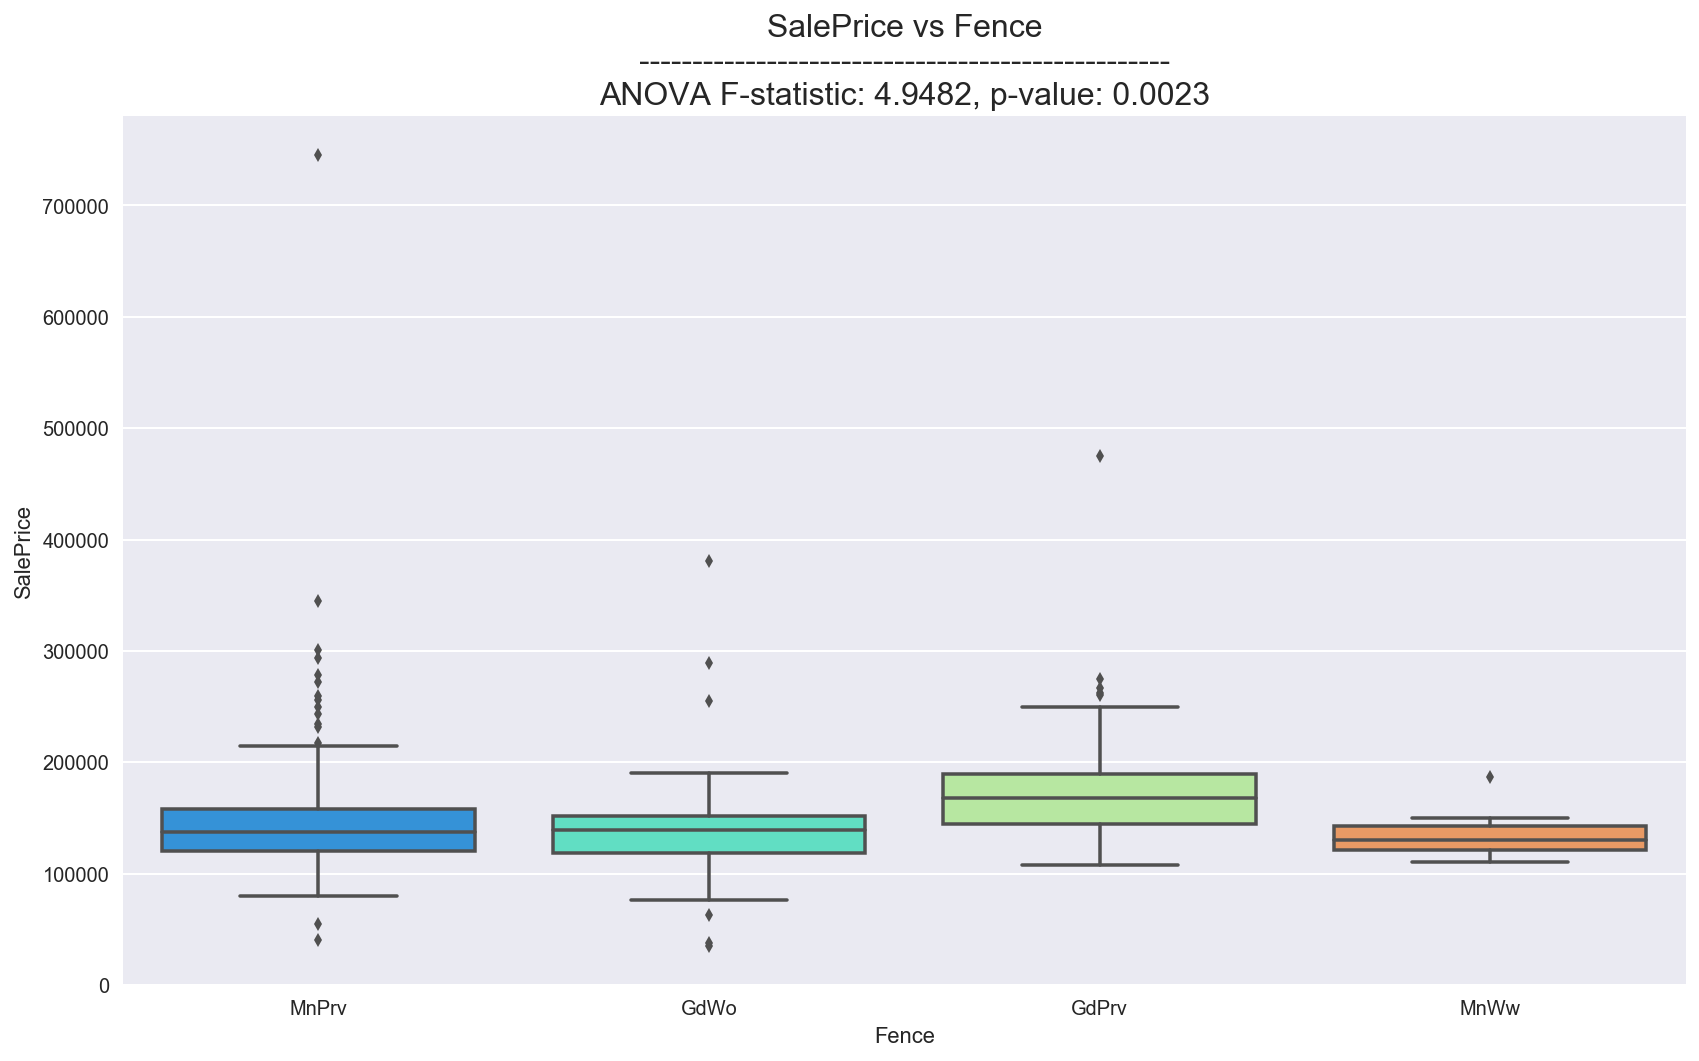

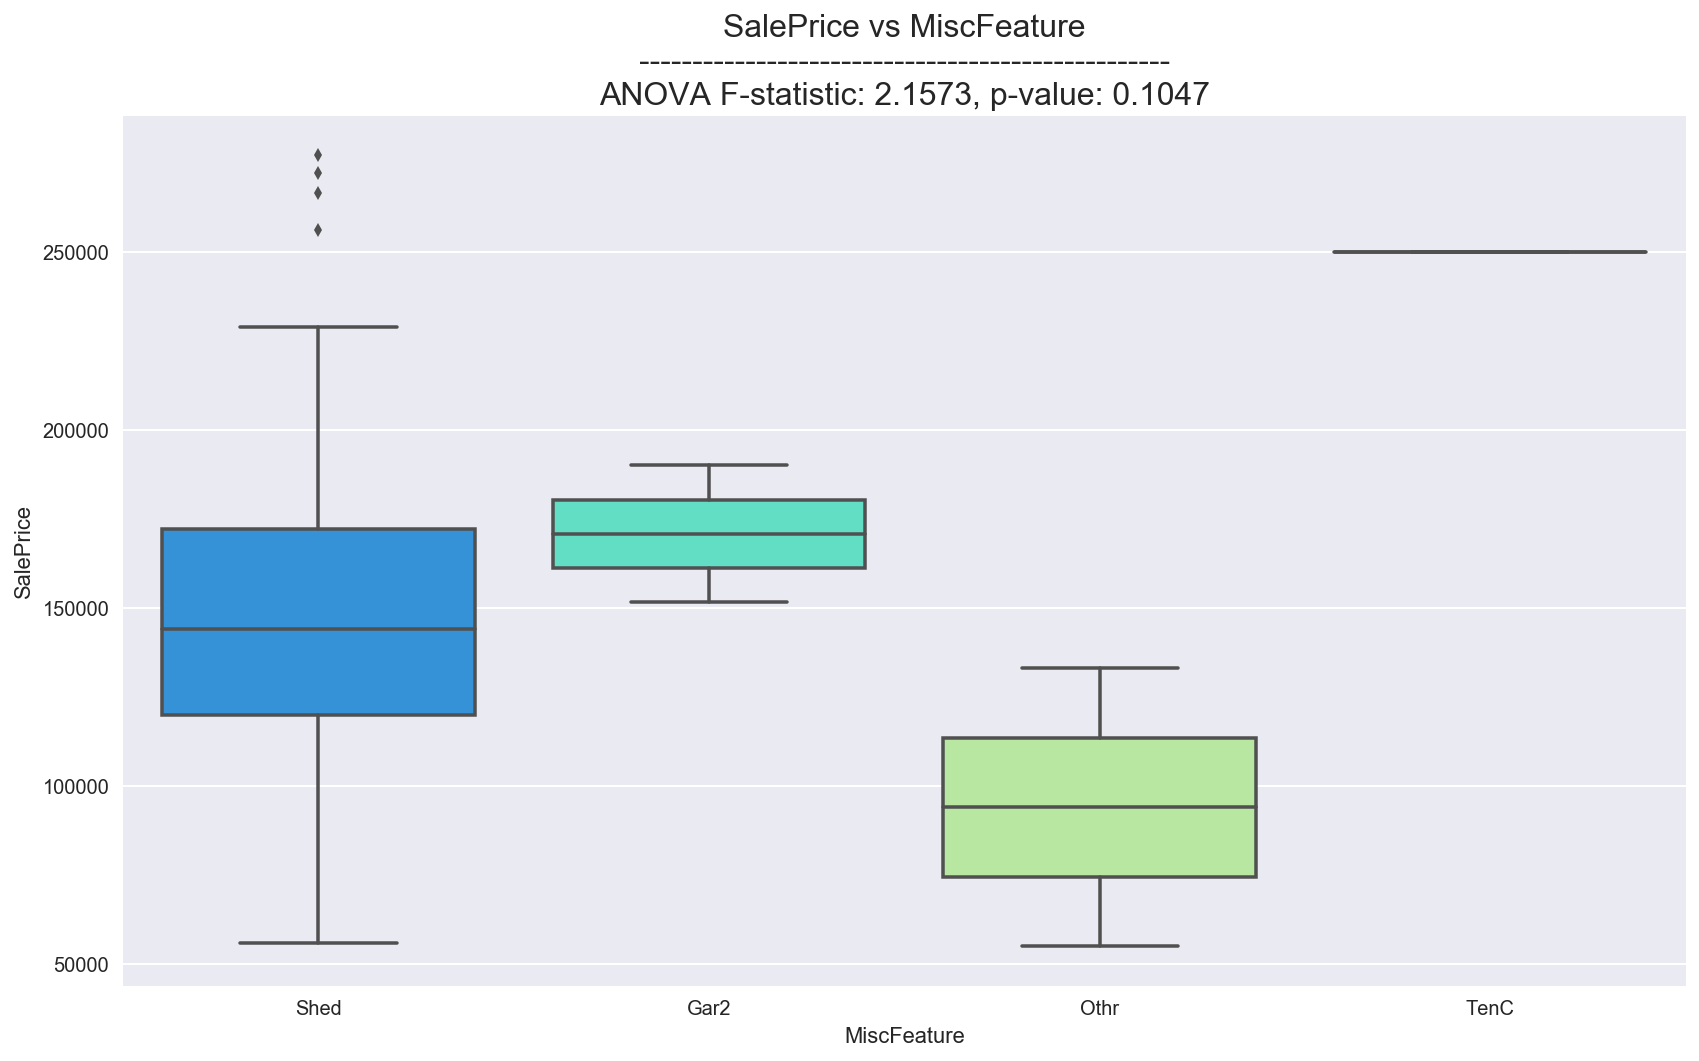

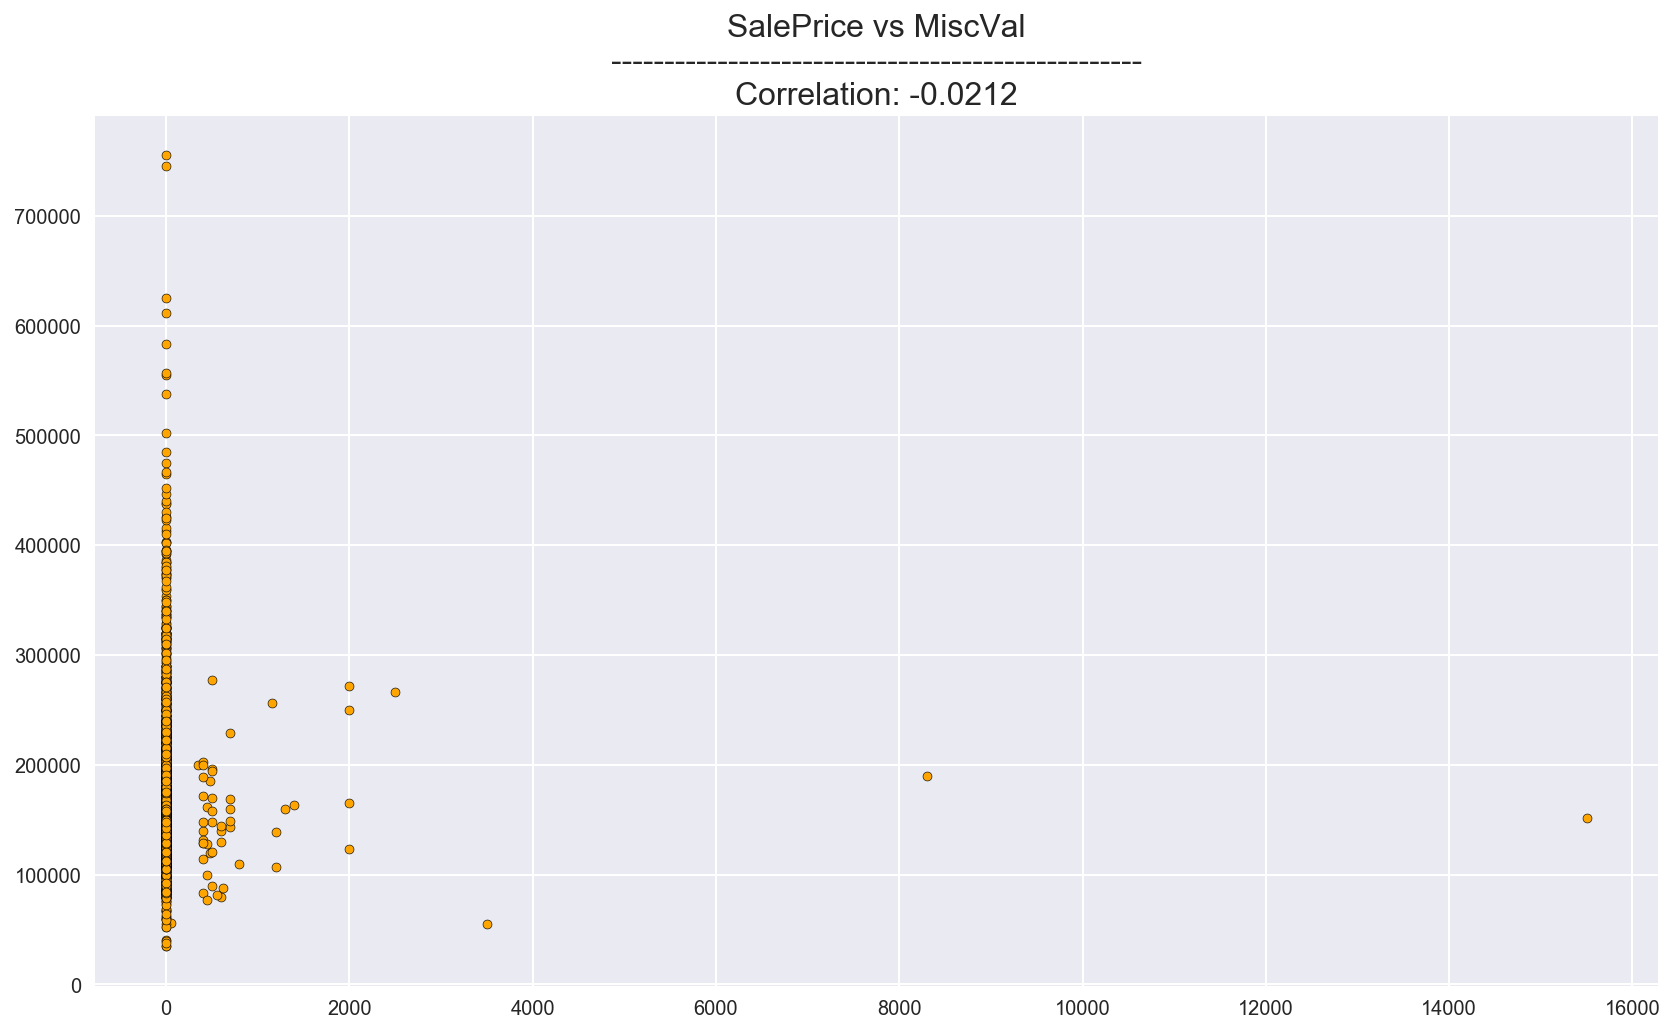

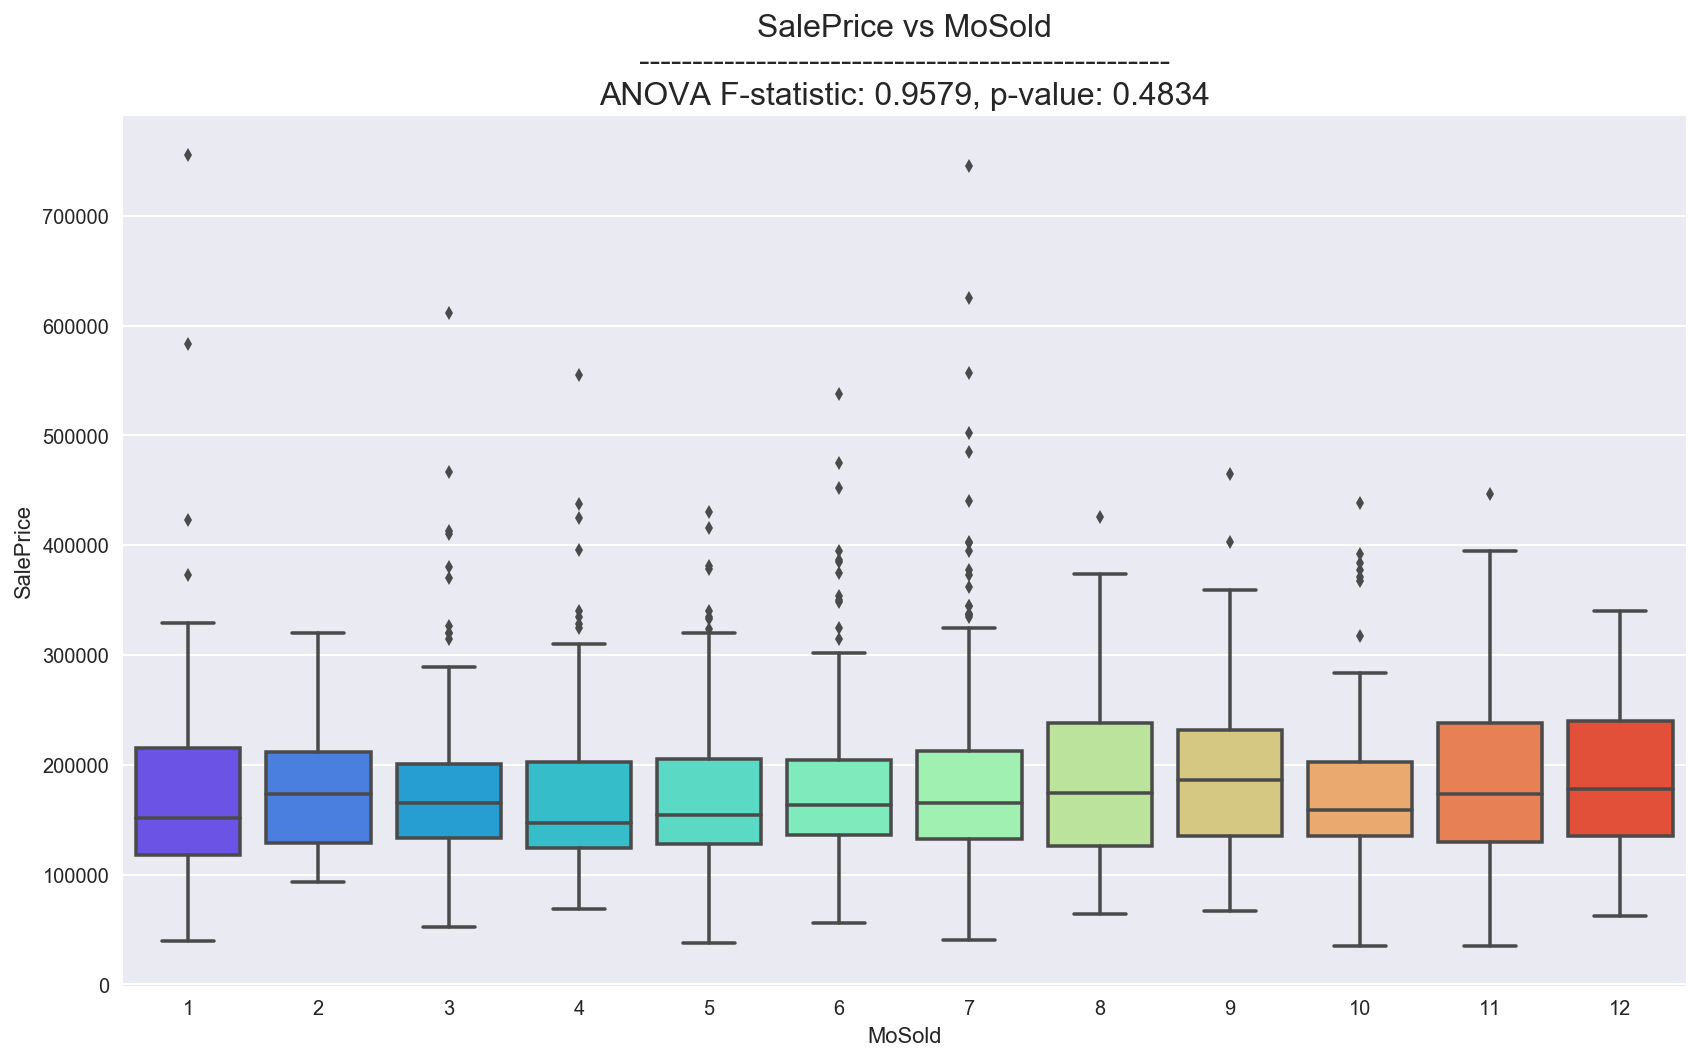

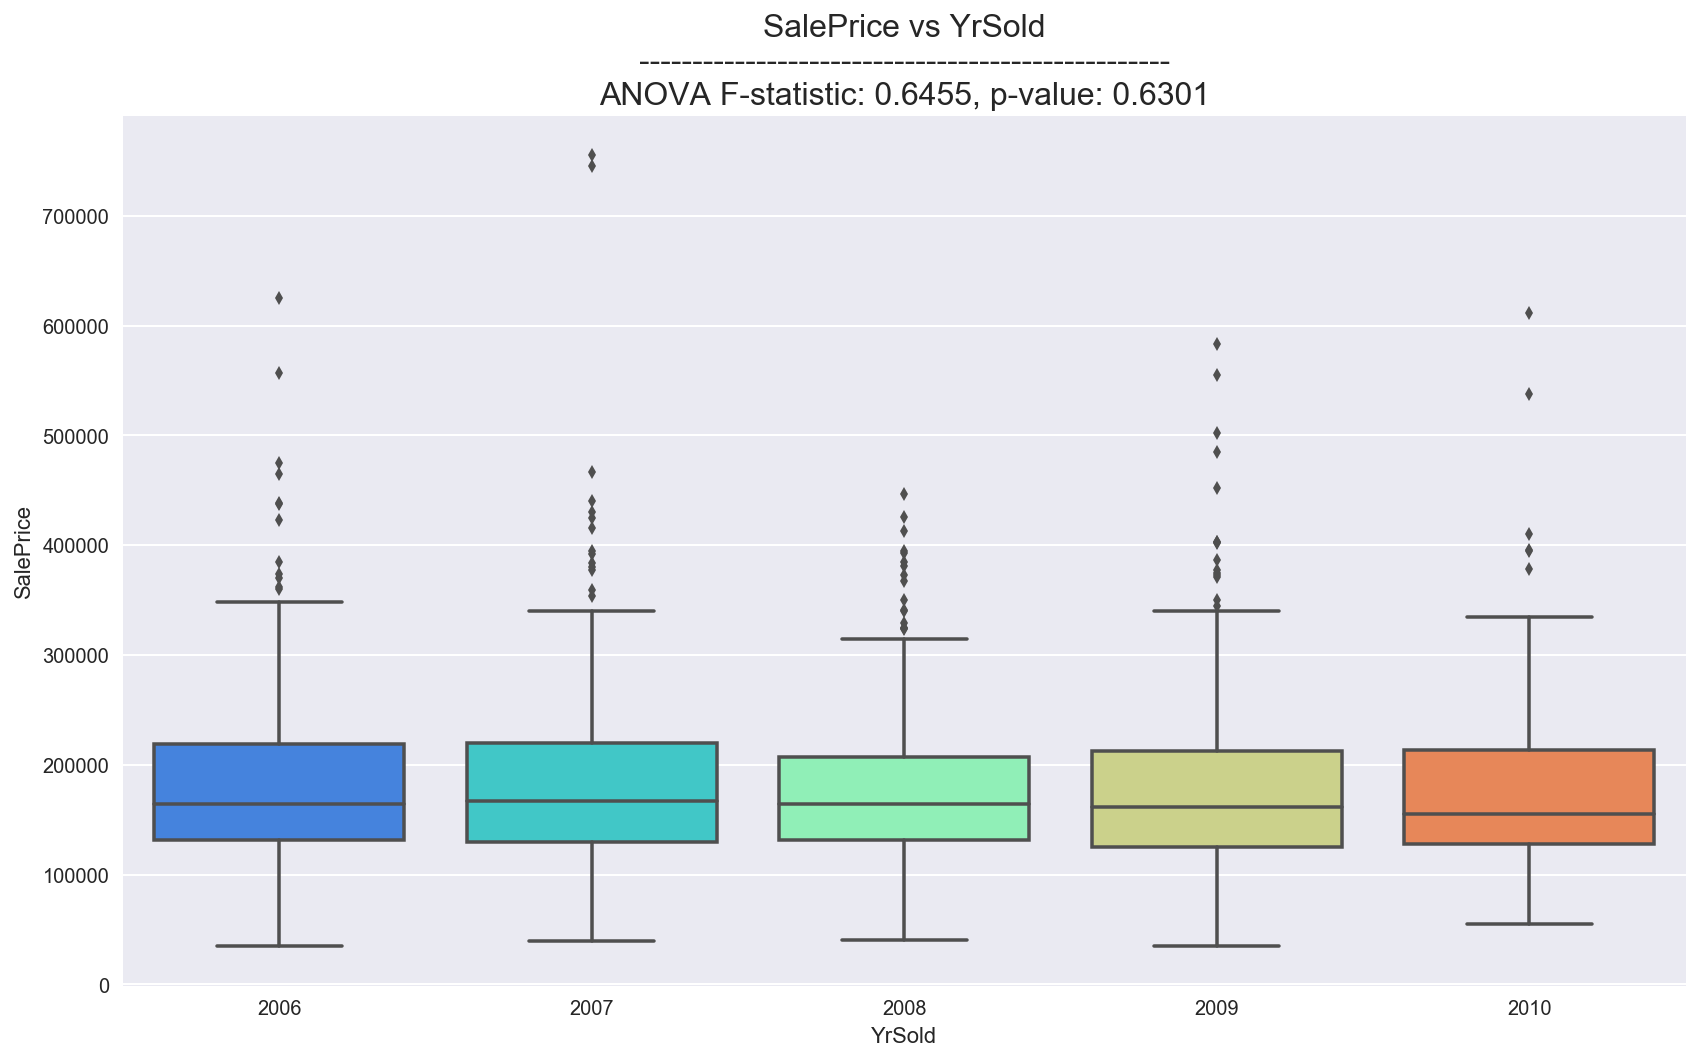

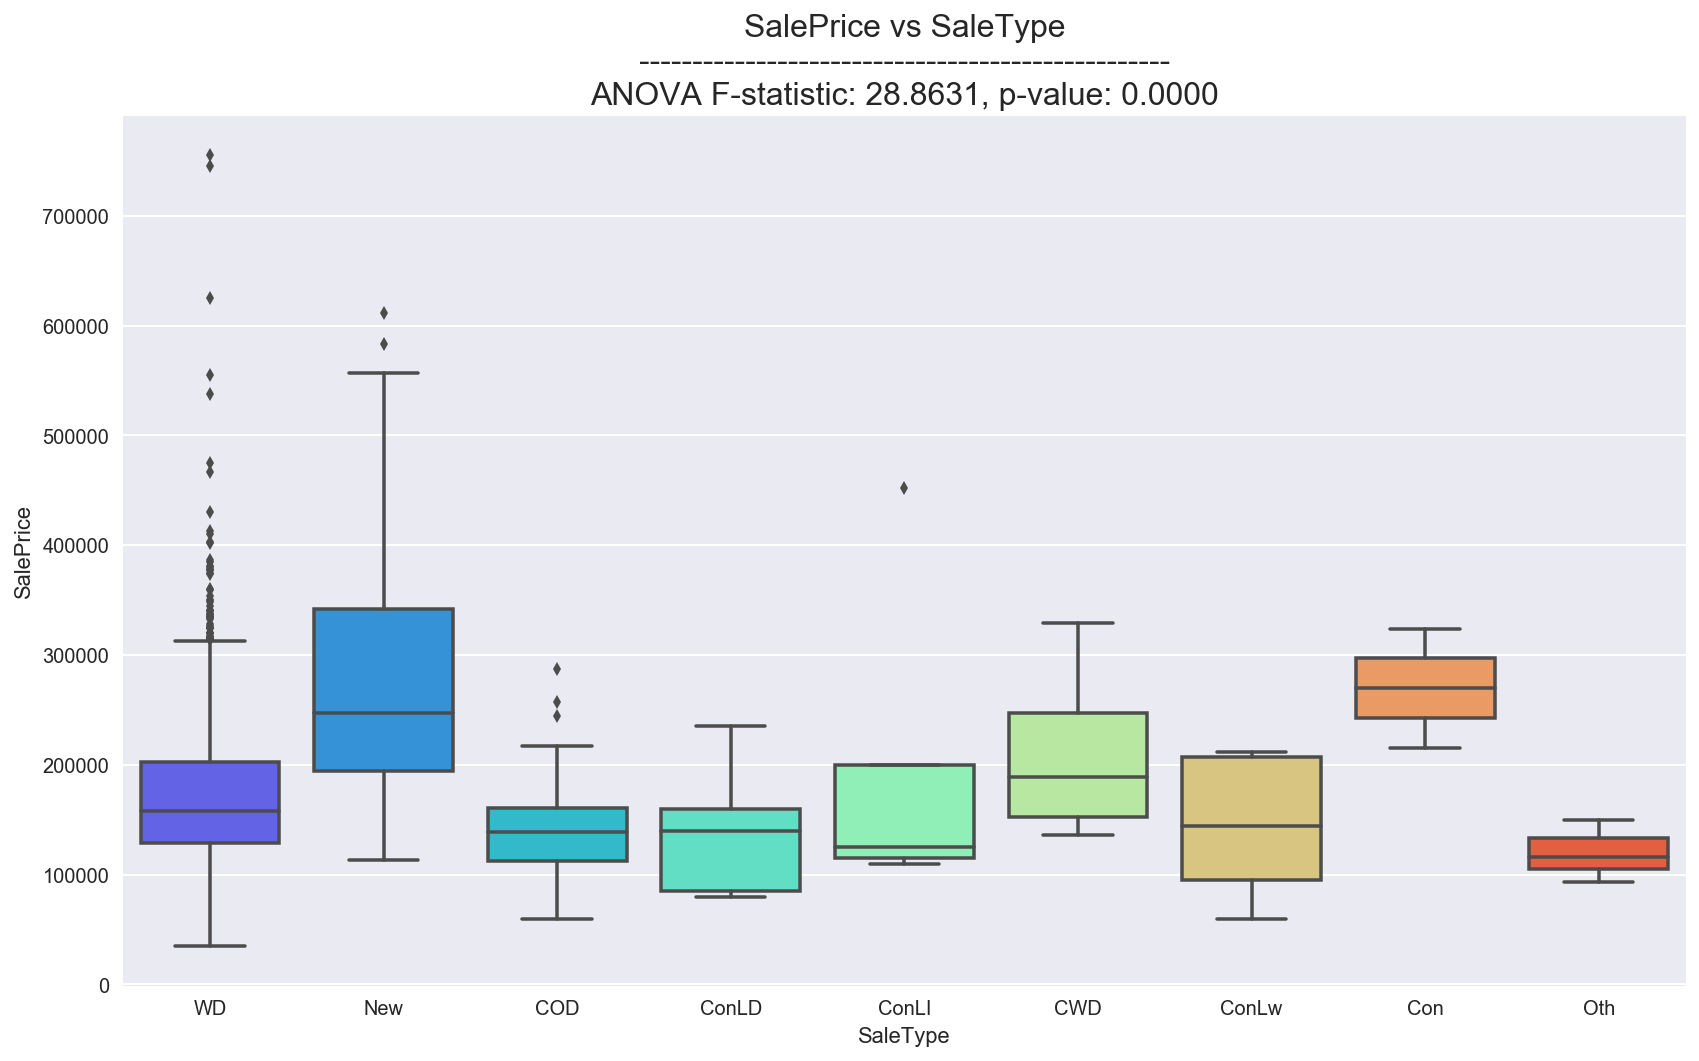

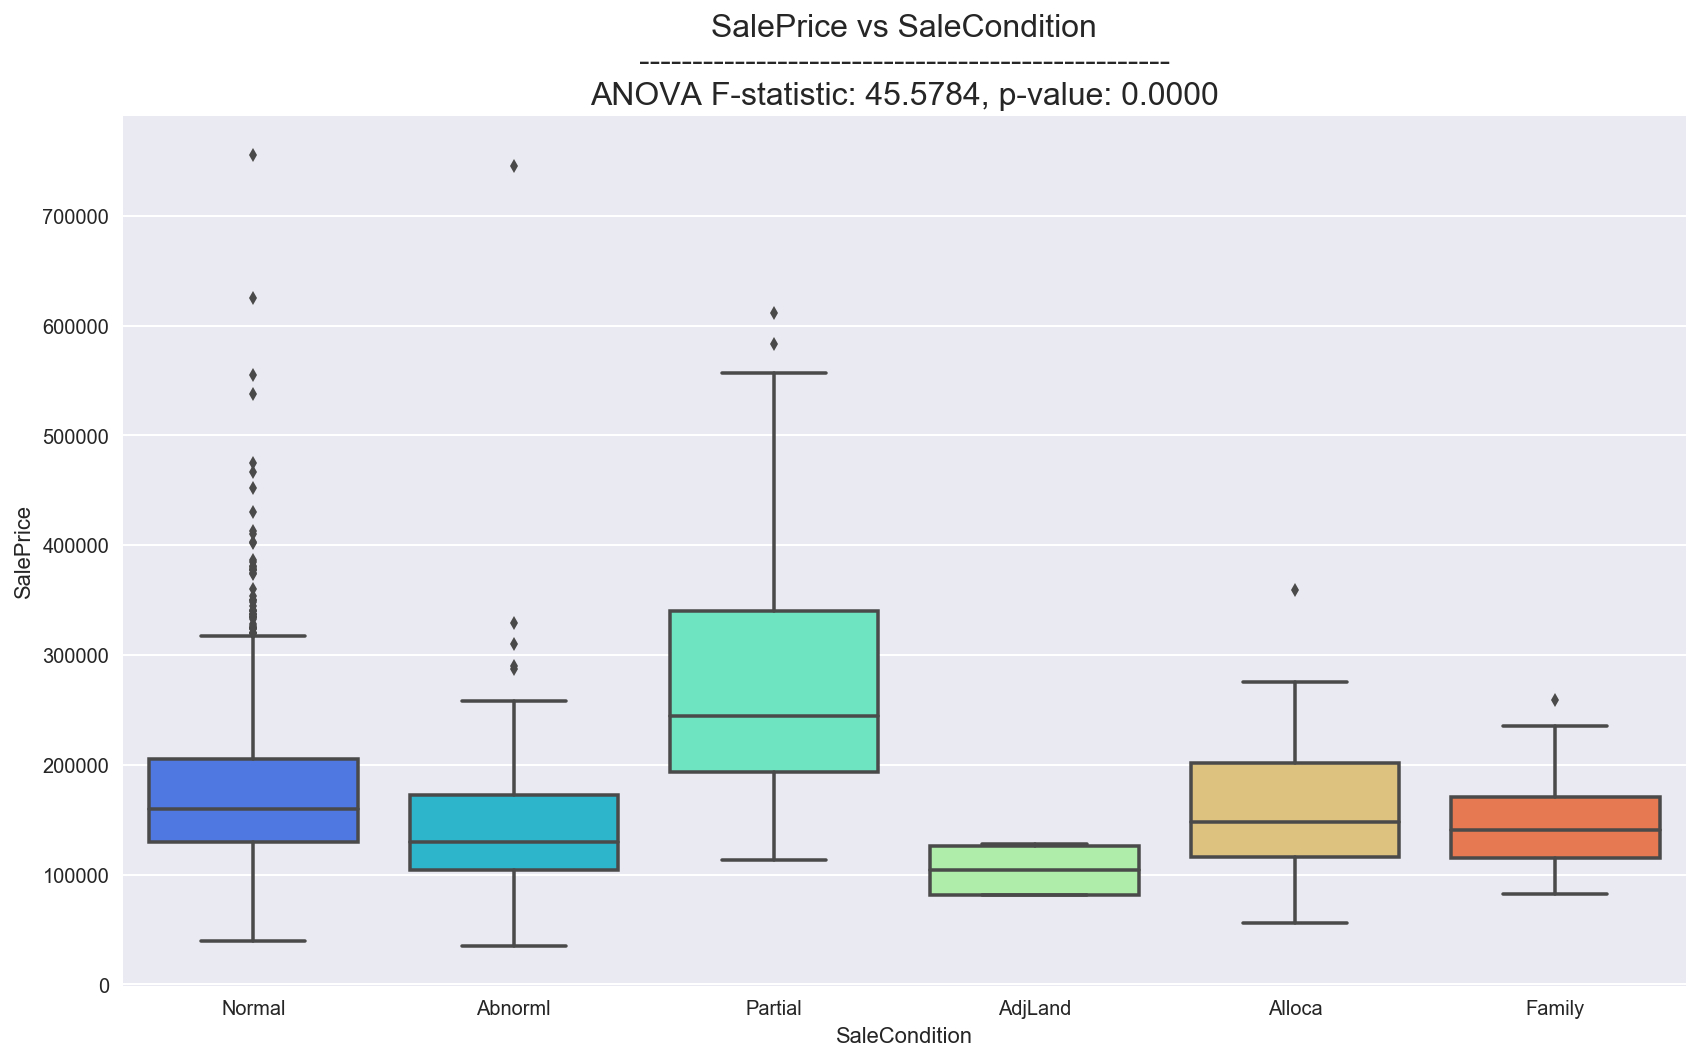

In [11]:
# Print a plot for every feature
for col in train_df.columns[:-1]:
    # If the variable is categorical or ordered
    if col not in num_features:
        # Group the feature per level and calculate the f-stat and p-value for SalePrice between groups
        for level in train_df.groupby(col):
            groups = [g[1] for g in train_df.groupby(col)['SalePrice']]
            f_stat, p_val = ss.f_oneway(*groups)    
        # For categorical features use boxplot
        plt.figure(figsize=(14, 8))
        sns.boxplot(x=train_df[col], y=train_df['SalePrice'], palette='rainbow')
        plt.title('SalePrice vs {0}\n'.format(col) + '-'*50 + \
                  '\nANOVA F-statistic: {0:.4f}, p-value: {1:.4f}'.format(f_stat, p_val), fontsize=16)
        # If feature has many levels, rotate x ticks for cosmetic purposes
        if col in large_categorical:
            plt.xticks(rotation=90)
        plt.show()
    else:
        # If feature is not categorical do a simple cross-plot and show pearson correlation with SalePrice
        plt.figure(figsize=(14, 8))
        plt.scatter(x=train_df[col], y=train_df['SalePrice'], color='orange', s=20, edgecolors='black')
        plt.title('SalePrice vs {0}\n'.format(col) + '-'*50 + '\nCorrelation: {0:.4f}'.format(
            train_df['SalePrice'].corr(train_df[col])), fontsize=16)
        plt.show()

## Filter columns by p-value or correlation with SalePrice
Variables that have little impact on SalePrice can be assumed to have very little predictive power, so I'll create a list that I can use later to filter them if necessary (would bring the feature count down from 79 to 66).

In [12]:
important_features = []
for col in train_df.columns[:-1]:
    # If the variable is categorical
    if col not in num_features:
        # Group the feature per level and calculate the f-stat and p-value for SalePrice between groups
        for level in train_df.groupby(col):
            groups = [g[1] for g in train_df.groupby(col)['SalePrice']]
        f_stat, p_val = ss.f_oneway(*groups)
        if p_val <= 0.05:
            important_features.append(col)
    else:
        if not (-0.1 < train_df['SalePrice'].corr(train_df[col]) < 0.1):
            important_features.append(col)
total_df = total_df[important_features]
total_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Alley LotShape LandContour  \
Id                                                                         
1           60       RL         65.0     8450   NaN      Reg         Lvl   
2           20       RL         80.0     9600   NaN      Reg         Lvl   
3           60       RL         68.0    11250   NaN      IR1         Lvl   
4           70       RL         60.0     9550   NaN      IR1         Lvl   
5           60       RL         84.0    14260   NaN      IR1         Lvl   

   LotConfig Neighborhood Condition1 Condition2 BldgType HouseStyle  \
Id                                                                    
1     Inside      CollgCr       Norm       Norm     1Fam     2Story   
2        FR2      Veenker      Feedr       Norm     1Fam     1Story   
3     Inside      CollgCr       Norm       Norm     1Fam     2Story   
4     Corner      Crawfor       Norm       Norm     1Fam     2Story   
5        FR2      NoRidge       Norm       Norm     1Fam     2Story   

    OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
Id                                                                         
1             7            5       2003          2003     Gable  CompShg   
2             6            8       1976          1976     Gable  CompShg   
3             7            5       2001          2002     Gable  CompShg   
4             7            5       1915          1970     Gable  CompShg   
5             8            5       2000          2000     Gable  CompShg   

   Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
Id                                                                      
1      VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
2      MetalSd     MetalSd       None         0.0        TA        TA   
3      VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
4      Wd Sdng     Wd Shng       None         0.0        TA        TA   
5      VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

   Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
Id                                                                      
1       PConc       Gd       TA           No          GLQ       706.0   
2      CBlock       Gd       TA           Gd          ALQ       978.0   
3       PConc       Gd       TA           Mn          GLQ       486.0   
4      BrkTil       TA       Gd           No          ALQ       216.0   
5       PConc       Gd       TA           Av          GLQ       655.0   

   BsmtFinType2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
Id                                                                     
1           Unf      150.0        856.0    GasA        Ex          Y   
2           Unf      284.0       1262.0    GasA        Ex          Y   
3           Unf      434.0        920.0    GasA        Ex          Y   
4           Unf      540.0        756.0    GasA        Gd          Y   
5           Unf      490.0       1145.0    GasA        Ex          Y   

   Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  \
Id                                                                     
1       SBrkr       856       854       1710           1.0         2   
2       SBrkr      1262         0       1262           0.0         2   
3       SBrkr       920       866       1786           1.0         2   
4       SBrkr       961       756       1717           1.0         1   
5       SBrkr      1145      1053       2198           1.0         2   

    HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
Id                                                                              
1          1             3             1          Gd             8        Typ   
2          0             3             1          TA             6        Typ   
3          1             3             1          Gd             6        Typ   
4

## Check for Missing Data
### Imputation of Missing Values
Some columns have large amounts of missing data, others less. Quite a bit of work to do there.

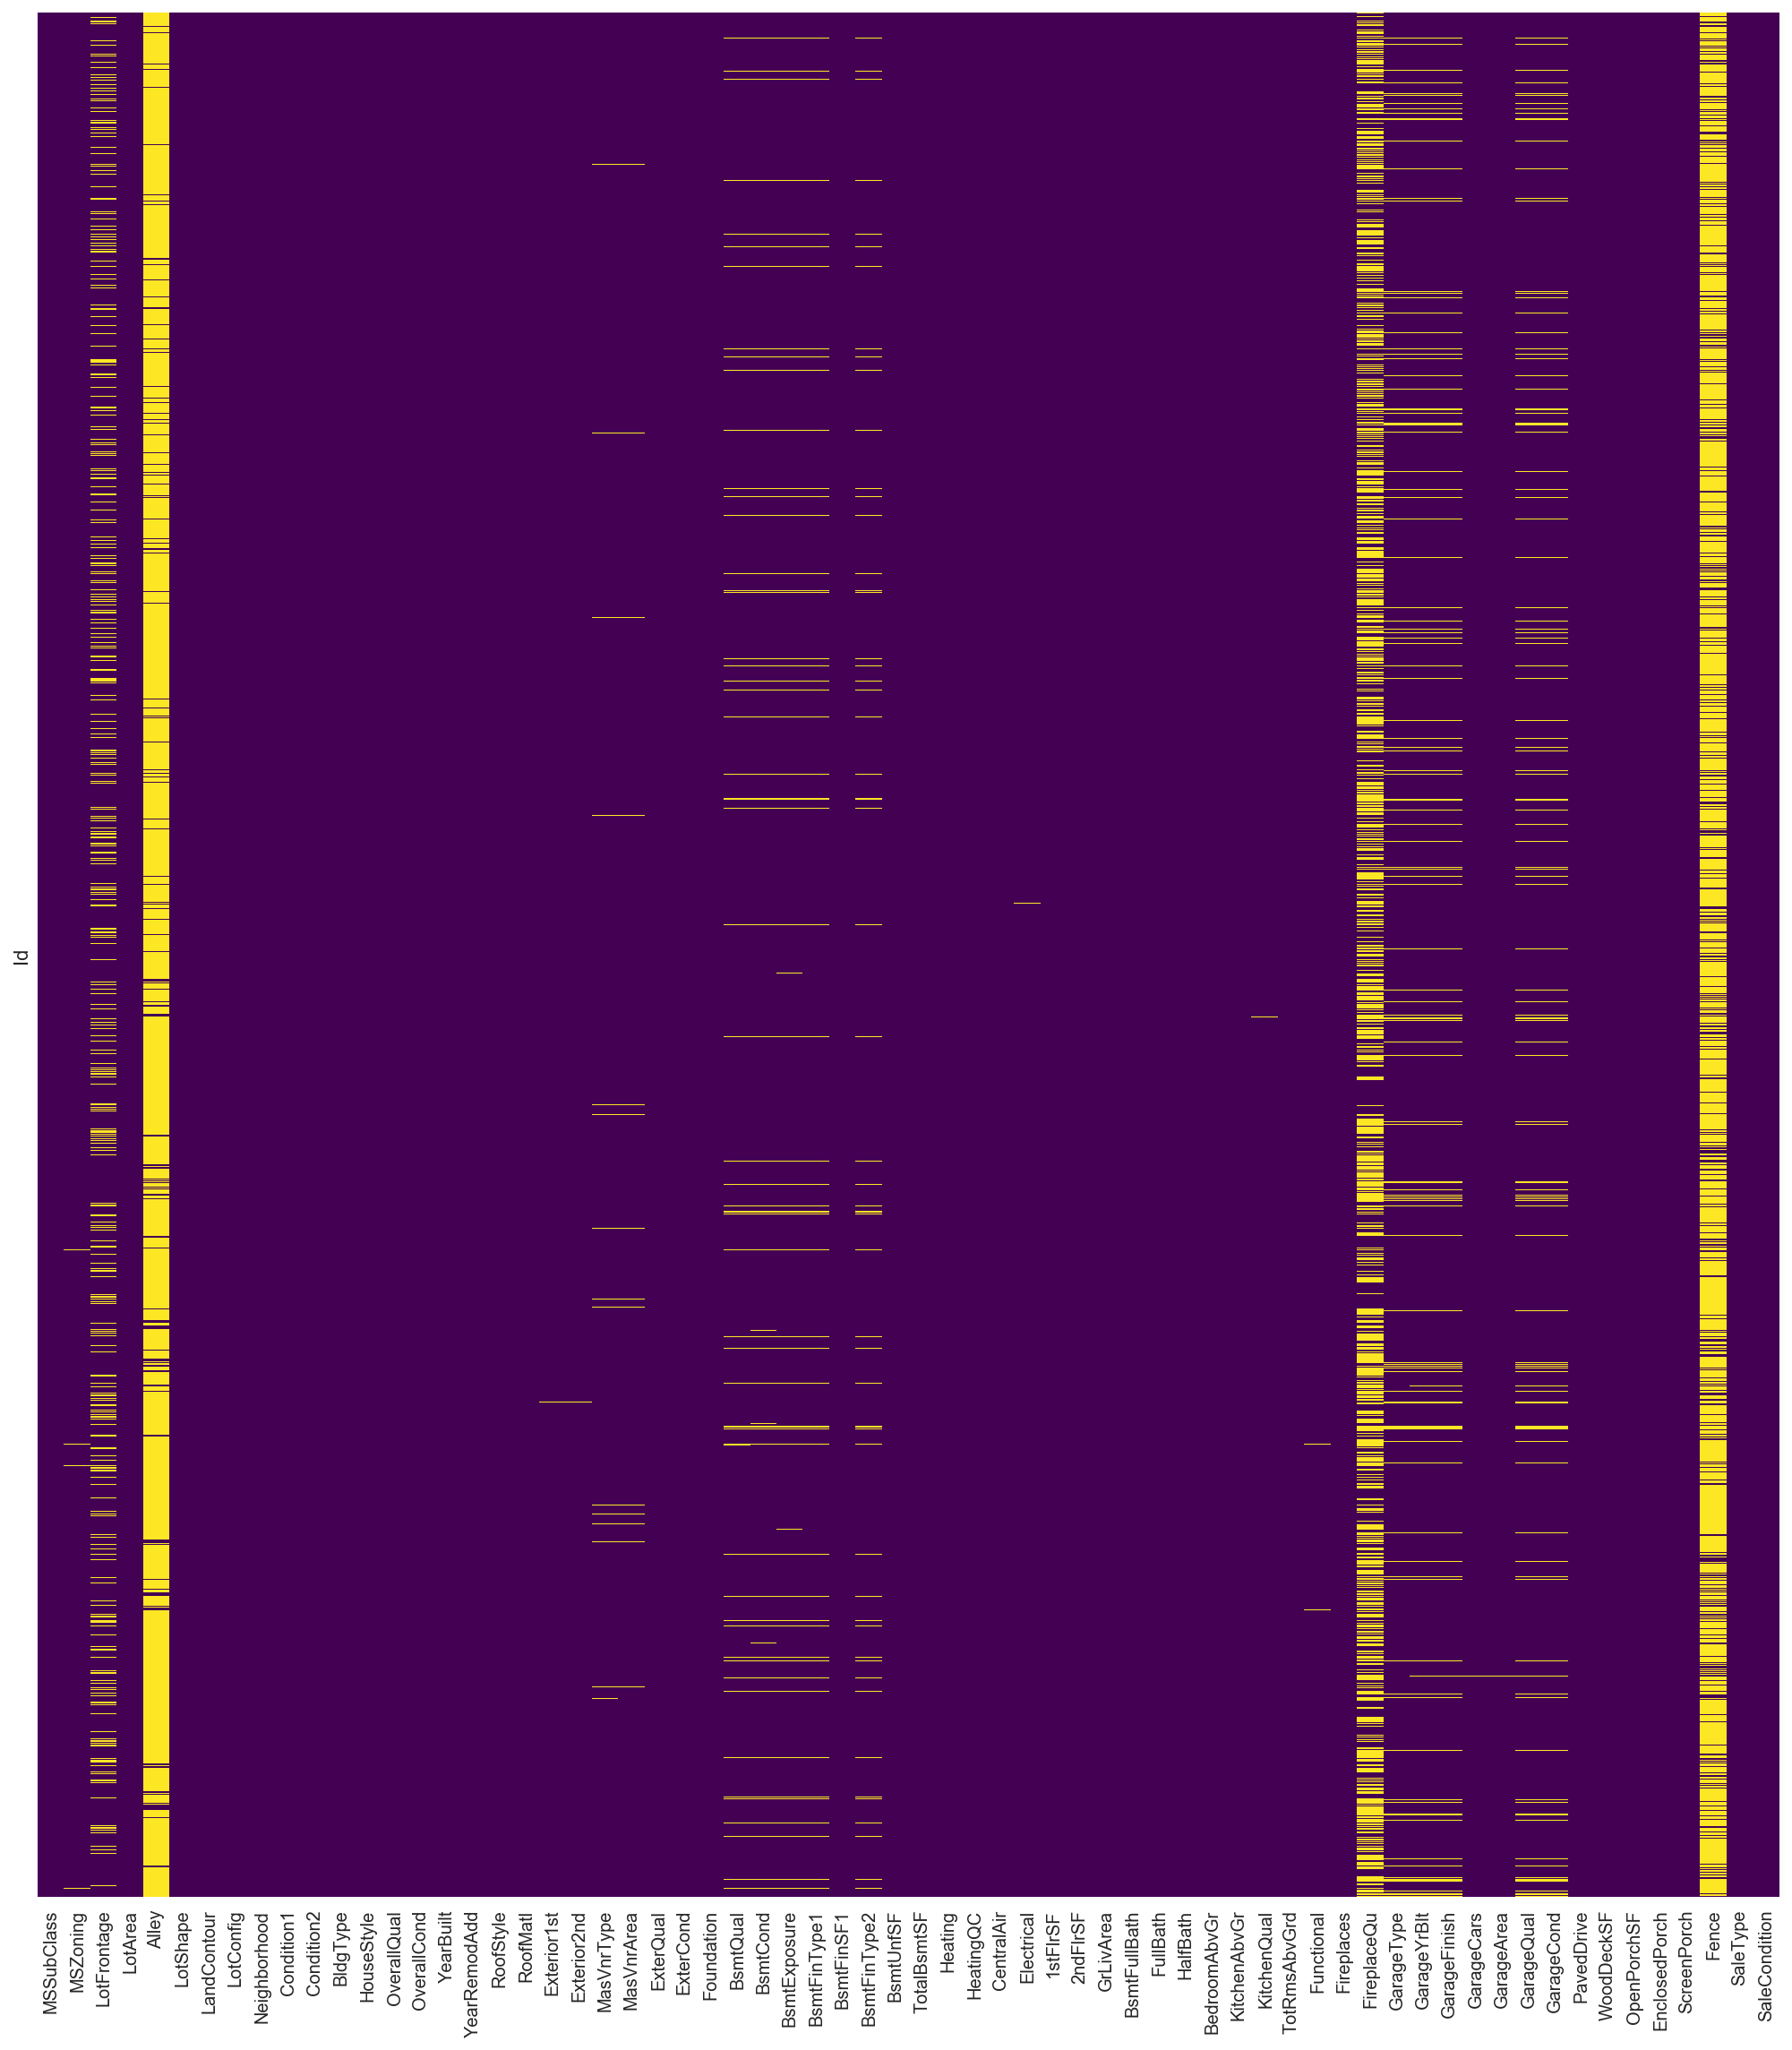

In [13]:
plt.figure(figsize=(14, 16))
sns.heatmap(total_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.tight_layout()

In [14]:
# Create a copy of the total_df to perform the imputation on
total_df_imputed = total_df.copy()

In [15]:
## Imput LotFrontage
# Create Dummies for predictors
lotFrontage_df = pd.concat([pd.get_dummies(total_df_imputed.MSSubClass, drop_first=True),
                            pd.get_dummies(total_df_imputed.Neighborhood, drop_first=True),
                            total_df_imputed[['LotArea', 'LotFrontage']]], axis=1)

# Split data into train and test sets
train = lotFrontage_df.loc[(lotFrontage_df['LotFrontage'].notnull()), :] # Known LotFrontage values
test = lotFrontage_df.loc[(lotFrontage_df['LotFrontage'].isnull()), :] # Null LotFrontage

# All age values are stored in a target array
y = train.values[:, -1]
# All the other values are stored in the feature array
X = train.values[:, :-1]

# Create and fit a Random Forest regression model
from sklearn.ensemble import RandomForestRegressor
lotFrontage_regressor_rf = RandomForestRegressor(n_estimators=300, n_jobs=-1).fit(X, y)
# Use the fitted model to predict the missing values
predicted_LotFrontage = lotFrontage_regressor_rf.predict(test.values[:, :-1])
# Assign those predictions to the full data set
total_df_imputed.loc[(total_df.LotFrontage.isnull()), 'LotFrontage'] = predicted_LotFrontage

In [16]:
## Imput all other variables with missing values
# Only a few missing values in MSZoning, fill with mode
total_df_imputed.MSZoning.fillna(value=total_df_imputed.MSZoning.mode()[0], inplace=True)

# Many missing values in FireplaceQu, but seems important where present. Create 'N/A' level for NaNs
total_df_imputed.FireplaceQu.fillna(value='N/A', inplace=True)

# Many missing values in Fence, but seems important where present. Create 'N/A' level for NaNs
total_df_imputed.Fence.fillna(value='N/A', inplace=True)

# Only one missing values in Exterior1st and Exterior2nd, fill with mode
total_df_imputed.Exterior1st.fillna(value=total_df_imputed.Exterior1st.mode()[0], inplace=True)
total_df_imputed.Exterior2nd.fillna(value=total_df_imputed.Exterior2nd.mode()[0], inplace=True)

# Few missing values in MasVnrType and MasVnrArea. 
# Assume those are None and 0.0 respectively which correspond to the mode of each feature
total_df_imputed.MasVnrType.fillna(value=total_df_imputed.MasVnrType.mode()[0], inplace=True)
total_df_imputed.MasVnrArea.fillna(value=total_df_imputed.MasVnrArea.mode()[0], inplace=True)

## Basement
# Fill NaNs in 'BsmtCond' where there IS a basement in the house with the Mode of the feature
total_df_imputed.loc[(total_df_imputed.BsmtCond.isnull() & total_df_imputed.BsmtQual.notnull()), 'BsmtCond'].fillna(
    value=total_df_imputed.BsmtCond.mode()[0], inplace=True)
# Fill NaNs in 'BsmtCond' where there ISN't a basement in the house with the 'N/A' label
total_df_imputed.BsmtCond.fillna(value='N/A', inplace=True)

# Fill NaNs in 'BsmtExposure' where there IS a basement in the house with the Mode of the feature
total_df_imputed.loc[(total_df_imputed.BsmtExposure.isnull() & total_df_imputed.BsmtQual.notnull()), 'BsmtExposure'].fillna(
    value=total_df_imputed.BsmtCond.mode()[0], inplace=True)
# Fill NaNs in 'BsmtExposure' where there ISN't a basement in the house with the 'N/A' label
total_df_imputed.BsmtExposure.fillna(value='N/A', inplace=True)

# Fill NaNs in 'BsmtQual' where there ISN't a basement in the house with the 'N/A' label
total_df_imputed.BsmtQual.fillna(value='N/A', inplace=True)

# Fill NaNs in 'BsmtFinType1' where there ISN't a basement in the house with the 'N/A' label
total_df_imputed.BsmtFinType1.fillna(value='N/A', inplace=True)

# Fill NaNs in 'BsmtFinType2' where there ISN't a basement in the house with the 'N/A' label
total_df_imputed.BsmtFinType2.fillna(value='N/A', inplace=True)

# Fill the only NaN in 'BsmtFinSF1' where there ISN't a basement in the house with the mode (0.0)
total_df_imputed.BsmtFinSF1.fillna(value=total_df_imputed.BsmtFinSF1.mode()[0], inplace=True)

# Fill the only NaN in 'BsmtUnfSF' where there ISN't a basement in the house with the mode (0.0)
total_df_imputed.BsmtUnfSF.fillna(value=total_df_imputed.BsmtUnfSF.mode()[0], inplace=True)

# Fill the only NaN in 'TotalBsmtSF' where there ISN't a basement in the house with the mode (0.0)
total_df_imputed.TotalBsmtSF.fillna(value=total_df_imputed.TotalBsmtSF.mode()[0], inplace=True)

# Fill the only NaN in 'Electrical' with the mode of the feature
total_df_imputed.Electrical.fillna(value=total_df_imputed.Electrical.mode()[0], inplace=True)

# Fill the two NaNs in 'BsmtFullBath' with the mode of the feature (0.0)
total_df_imputed.BsmtFullBath.fillna(value=total_df_imputed.BsmtFullBath.mode()[0], inplace=True)

# Fill the only NaN in 'KitchenQual' with the mode of the feature (TA)
total_df_imputed.KitchenQual.fillna(value=total_df_imputed.KitchenQual.mode()[0], inplace=True)

# Fill the two NaNs in 'Functional' with the mode of the feature (0.0)
total_df_imputed.Functional.fillna(value=total_df_imputed.Functional.mode()[0], inplace=True)

# Fill the only NaN in 'SaleType' with the mode of the feature (WD)
total_df_imputed.SaleType.fillna(value=total_df_imputed.SaleType.mode()[0], inplace=True)

## Garage
# Fill NaNs in 'GarageType' where there ISN'T a garage in the house with the 'N/A' label
total_df_imputed.GarageType.fillna(value='N/A', inplace=True)

# Fill NaNs in 'GarageYrBlt' where there ISN'T a garage in the house with the 'N/A' label
total_df_imputed.GarageYrBlt[total_df_imputed.GarageArea == 0.0].fillna(value='N/A', inplace=True)
# Fill NaNs in 'GarageYrBlt' where there IS a garage in the house with the Mode of the feature (2005)
total_df_imputed.GarageYrBlt.fillna(value=total_df_imputed.GarageYrBlt.mode()[0], inplace=True)

# Fill NaNs in 'GarageFinish' where there ISN'T a garage in the house with the 'N/A' label
total_df_imputed.GarageFinish[total_df_imputed.GarageArea == 0.0].fillna(value='N/A', inplace=True)
# Fill NaNs in 'GarageFinish' where there IS a garage in the house with the Mode of the feature (Unf)
total_df_imputed.GarageFinish.fillna(value=total_df_imputed.GarageFinish.mode()[0], inplace=True)

# Fill the only NAN in 'GarageCars' where there IS a garage in the house with the Mode of the feature (2.0)
total_df_imputed.GarageCars.fillna(value=total_df_imputed.GarageCars.mode()[0], inplace=True)

# Fill the only NAN in 'GarageArea' where there IS a garage in the house with the Mean of the feature
total_df_imputed.GarageArea.fillna(value=total_df_imputed.GarageArea.mean(skipna=True), inplace=True)

# Fill NaNs in 'GarageQual' where there ISN'T a garage in the house with the 'N/A' label
total_df_imputed.GarageQual[total_df_imputed.GarageArea == 0.0].fillna(value='N/A', inplace=True)
# Fill NaNs in 'GarageQual' where there IS a garage in the house with the Mode of the feature (Unf)
total_df_imputed.GarageQual.fillna(value=total_df_imputed.GarageQual.mode()[0], inplace=True)

# Fill NaNs in 'GarageCond' where there ISN'T a garage in the house with the 'N/A' label
total_df_imputed.GarageCond[total_df_imputed.GarageArea == 0.0].fillna(value='N/A', inplace=True)
# Fill NaNs in 'GarageCond' where there IS a garage in the house with the Mode of the feature (Unf)
total_df_imputed.GarageCond.fillna(value=total_df_imputed.GarageCond.mode()[0], inplace=True)

In [17]:
# Decided to drop Alley since it has very few actual values
total_df_imputed.drop(['Alley'], axis=1, inplace=True)
print(total_df_imputed.shape)

(2919, 65)


And there you go! No more missing values!!

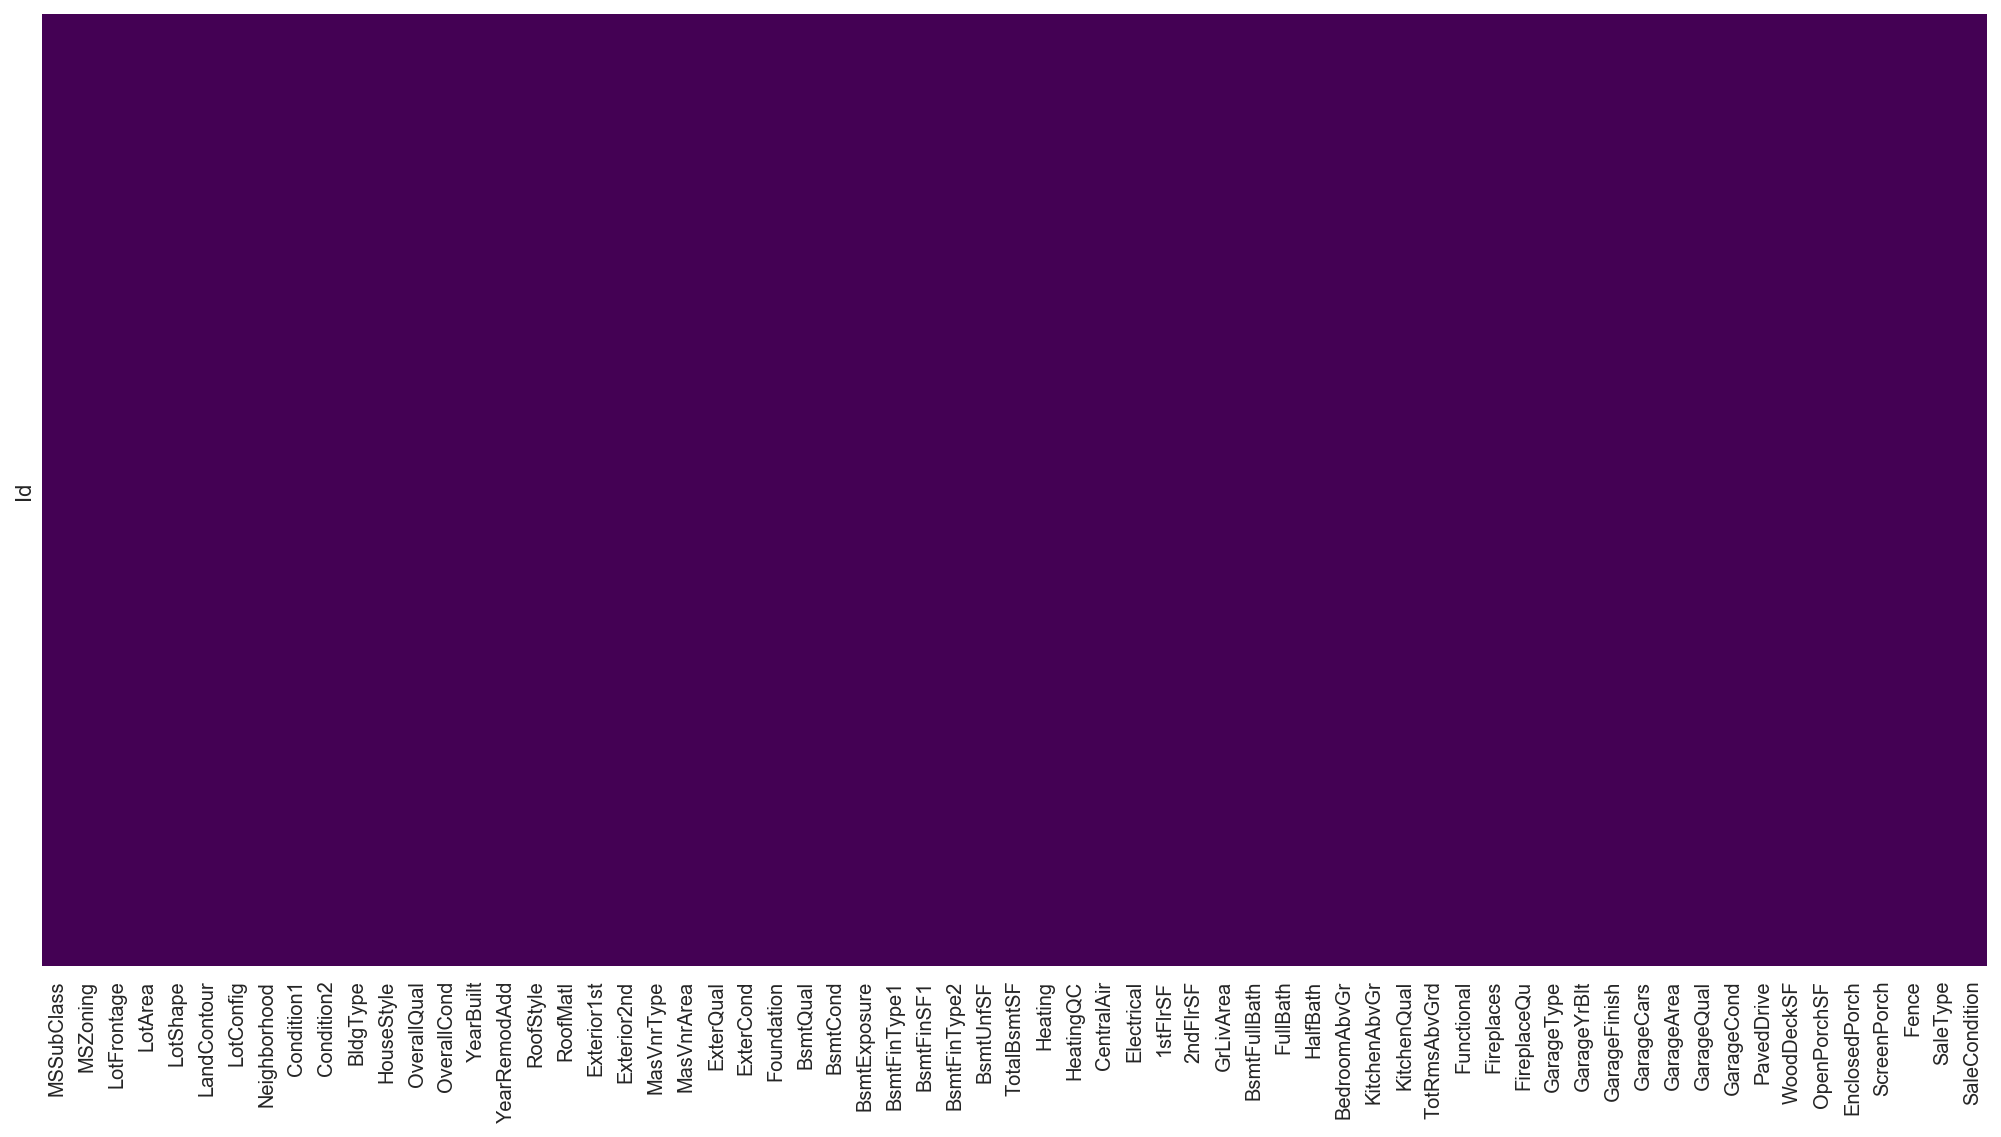

In [18]:
plt.figure(figsize=(14, 8))
sns.heatmap(total_df_imputed.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.tight_layout()

## Encode Non-Numeric Ordereded Features
Features that have an obvious ordering, like measure of Quality will be encoded numerically.

In [19]:
# ExterQual, ExterCond, BsmtQual, BsmtCond, HeatingQC, KitchenQual,
# FireplaceQu, GarageQual, GarageCond

ord_features_same_scale = ['ExterQual', 'ExterCond', 'BsmtQual', 
                           'BsmtCond', 'HeatingQC', 'KitchenQual',
                           'FireplaceQu', 'GarageQual', 'GarageCond']

encoder = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po':1,
    'N/A': 0
}
 
total_df_imputed[ord_features_same_scale] = total_df_imputed[ord_features_same_scale].replace(encoder)

# BsmtExposure
encoder = {
    'Gd': 4,
    'Av': 3,
    'Mn': 2,
    'No': 1,
    'N/A': 0
}

total_df_imputed.BsmtExposure = total_df_imputed.BsmtExposure.replace(encoder)

# BsmtFinType1, BsmtFinType2
encoder = {
    'GLQ': 6,
    'ALQ': 5,
    'BLQ': 4,
    'Rec': 3,
    'LwQ': 2,
    'Unf': 1,
    'N/A': 0
}

total_df_imputed[['BsmtFinType1', 'BsmtFinType2']] = total_df_imputed[['BsmtFinType1', 'BsmtFinType2']].replace(encoder)

# Functional
encoder = {
    'Typ': 7,
    'Min1': 6,
    'Min2': 5,
    'Mod': 4,
    'Maj1': 3,
    'Maj2': 2,
    'Sev': 1,
    'Sal': 0
}

total_df_imputed.Functional = total_df_imputed.Functional.replace(encoder)

# GarageFinish
encoder = {
    'Fin': 3,
    'RFn': 2,
    'Unf': 1
}

total_df_imputed.GarageFinish = total_df_imputed.GarageFinish.replace(encoder)
total_df_imputed.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
Id                                                                             
1           60       RL         65.0     8450      Reg         Lvl    Inside   
2           20       RL         80.0     9600      Reg         Lvl       FR2   
3           60       RL         68.0    11250      IR1         Lvl    Inside   
4           70       RL         60.0     9550      IR1         Lvl    Corner   
5           60       RL         84.0    14260      IR1         Lvl       FR2   

   Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
Id                                                                       
1       CollgCr       Norm       Norm     1Fam     2Story            7   
2       Veenker      Feedr       Norm     1Fam     1Story            6   
3       CollgCr       Norm       Norm     1Fam     2Story            7   
4       Crawfor       Norm       Norm     1Fam     2Story            7   
5       NoRidge       Norm       Norm     1Fam     2Story            8   

    OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
Id                                                                        
1             5       2003          2003     Gable  CompShg     VinylSd   
2             8       1976          1976     Gable  CompShg     MetalSd   
3             5       2001          2002     Gable  CompShg     VinylSd   
4             5       1915          1970     Gable  CompShg     Wd Sdng   
5             5       2000          2000     Gable  CompShg     VinylSd   

   Exterior2nd MasVnrType  MasVnrArea  ExterQual  ExterCond Foundation  \
Id                                                                       
1      VinylSd    BrkFace       196.0          4          3      PConc   
2      MetalSd       None         0.0          3          3     CBlock   
3      VinylSd    BrkFace       162.0          4          3      PConc   
4      Wd Shng       None         0.0          3          3     BrkTil   
5      VinylSd    BrkFace       350.0          4          3      PConc   

    BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
Id                                                                             
1          4         3             1             6       706.0             1   
2          4         3             4             5       978.0             1   
3          4         3             2             6       486.0             1   
4          3         4             1             5       216.0             1   
5          4         3             3             6       655.0             1   

    BsmtUnfSF  TotalBsmtSF Heating  HeatingQC CentralAir Electrical  1stFlrSF  \
Id                                                                              
1       150.0        856.0    GasA          5          Y      SBrkr       856   
2       284.0       1262.0    GasA          5          Y      SBrkr      1262   
3       434.0        920.0    GasA          5          Y      SBrkr       920   
4       540.0        756.0    GasA          4          Y      SBrkr       961   
5       490.0       1145.0    GasA          5          Y      SBrkr      1145   

    2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                        
1        854       1710           1.0         2         1             3   
2          0       1262           0.0         2         0             3   
3        866       1786           1.0         2         1             3   
4        756       1717           1.0         1         0             3   
5       1053       2198           1.0         2         1             4   

    KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
Id                                                                    
1              1            4             8           7           0   
2          

## Create Latitude and Longitude Features based on Neighborhood

In [20]:
total_df_imputed['Latitude'] = total_df_imputed.Neighborhood.replace({
    'Blmngtn': 42.062806,
    'Blueste': 42.009408,
    'BrDale' : 42.052500,
    'BrkSide': 42.033590,
    'ClearCr': 42.025425,
    'CollgCr': 42.021051,
    'Crawfor': 42.025949,
    'Edwards': 42.022800,
    'Gilbert': 42.027885,
    'GrnHill': 42.000854,
    'IDOTRR' : 42.019208,
    'Landmrk': 42.044777,
    'MeadowV': 41.991866,
    'Mitchel': 42.031307,
    'NAmes'  : 42.042966,
    'NoRidge': 42.050307,
    'NPkVill': 42.050207,
    'NridgHt': 42.060356,
    'NWAmes' : 42.051321,
    'OldTown': 42.028863,
    'SWISU'  : 42.017578,
    'Sawyer' : 42.033611,
    'SawyerW': 42.035540,
    'Somerst': 42.052191,
    'StoneBr': 42.060752,
    'Timber' : 41.998132,
    'Veenker': 42.040106
})

total_df_imputed['Longitude'] = total_df_imputed.Neighborhood.replace({
    'Blmngtn': -93.639963,
    'Blueste': -93.645543,
    'BrDale' : -93.628821,
    'BrkSide': -93.627552,
    'ClearCr': -93.675741,
    'CollgCr': -93.685643,
    'Crawfor': -93.620215,
    'Edwards': -93.663040,
    'Gilbert': -93.615692,
    'GrnHill': -93.643377,
    'IDOTRR' : -93.623401,
    'Landmrk': -93.646239,
    'MeadowV': -93.602441,
    'Mitchel': -93.626967,
    'NAmes'  : -93.613556,
    'NoRidge': -93.656045,
    'NPkVill': -93.625827,
    'NridgHt': -93.657107,
    'NWAmes' : -93.633798,
    'OldTown': -93.615497,
    'SWISU'  : -93.651283,
    'Sawyer' : -93.669348,
    'SawyerW': -93.685131,
    'Somerst': -93.643479,
    'StoneBr': -93.628955,
    'Timber' : -93.648335,
    'Veenker': -93.657032
})

num_features = num_features + ['Latitude', 'Longitude']

In [21]:
total_df_imputed.shape

(2919, 67)

# Machine Learning
## Prepare Dataset for Training
### Redefine Categorical Features

In [22]:
cat_features = []
for col in total_df_imputed.columns.values:
    if col not in num_features + ord_features:
        cat_features.append(col)
print(cat_features)

['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']


### Create Dummy Variables
Remove the first entry for each to avoid the dummy variable trap. Some variables, especially the ones referring to **Years** could also potentially be used as Factors instead. Something to keep in mind.

In [23]:
final_df = pd.get_dummies(total_df_imputed, columns=cat_features, sparse=True, drop_first=True)
final_df.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                            
1          65.0     8450            7            5       2003          2003   
2          80.0     9600            6            8       1976          1976   
3          68.0    11250            7            5       2001          2002   
4          60.0     9550            7            5       1915          1970   
5          84.0    14260            8            5       2000          2000   

    MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
Id                                                                       
1        196.0          4          3         4         3             1   
2          0.0          3          3         4         3             4   
3        162.0          4          3         4         3             2   
4          0.0          3          3         3         4             1   
5        350.0          4          3         4         3             3   

    BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
Id                                                                              
1              6       706.0             1      150.0        856.0          5   
2              5       978.0             1      284.0       1262.0          5   
3              6       486.0             1      434.0        920.0          5   
4              5       216.0             1      540.0        756.0          4   
5              6       655.0             1      490.0       1145.0          5   

    1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
Id                                                                    
1        856       854       1710           1.0         2         1   
2       1262         0       1262           0.0         2         0   
3        920       866       1786           1.0         2         1   
4        961       756       1717           1.0         1         0   
5       1145      1053       2198           1.0         2         1   

    BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
Id                                                                      
1              3             1            4             8           7   
2              3             1            3             6           7   
3              3             1            4             6           7   
4              3             1            4             7           7   
5              4             1            4             9           7   

    Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  \
Id                                                                   
1            0            0       2003.0             2         2.0   
2            1            3       1976.0             2         2.0   
3            1            3       2001.0             2         2.0   
4            1            4       1998.0             1         3.0   
5            1            3       2000.0             2         3.0   

    GarageArea  GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  \
Id                                                                
1        548.0           3           3           0           61   
2        460.0           3           3         298            0   
3        608.0           3           3           0           42   
4        642.0           3           3           0           35   
5        836.0           3           3         192           84   

    EnclosedPorch  ScreenPorch   Latitude  Longitude  MSSubClass_30  \
Id                                                                    
1               0            0  42.021051 -93.685643              0   
2               0            0  42.040106 -93.657032              0   
3               0            0  42.021051 -93.685643              0   
4             272            0  42.02

### Separate Training and Test sets

In [24]:
X = final_df.iloc[:train_df.shape[0], :].as_matrix()
X_test = final_df.iloc[train_df.shape[0]:, :].as_matrix()
y = train_df.SalePrice.values.copy()
# Log-transform dependent variable
y = np.log1p(y)
print(X.shape, X_test.shape, y.shape)

(1460, 206) (1459, 206) (1460,)


### Scale data

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scX = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

### Create validation set with 20% of the data

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(scX, y, test_size=0.2, random_state=555)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(1168, 206) (292, 206) (1168,) (292,)


## Modelling

In [27]:
from sklearn.model_selection import learning_curve, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor,GradientBoostingRegressor
import xgboost as xgb

/Users/hugobmachado/anaconda/envs/DeepLearning/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Define **Root Mean Squared Logarithmic Error** function as this is the scoring method used in Kaggle.

In [28]:
def rmsle(y_pred, y_true):
    """ (nparray, nparray) -> float
    Calculates the Root Mean Square Logarithmic Error between two arrays
    representing the predictions of a certain model and the targets respectively.
    """

    return np.sqrt(np.mean(np.power(
        np.log1p(y_pred)-np.log1p(y_true), 2)))

### Random Forest

In [29]:
regressor_rf = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=555)
regressor_rf.fit(X_train, y_train)
predictions_rf = regressor_rf.predict(X_val)
print('Validation RMSLE: {}'.format(rmsle(predictions_rf, y_val)))

Validation RMSLE: 0.010337214465736518


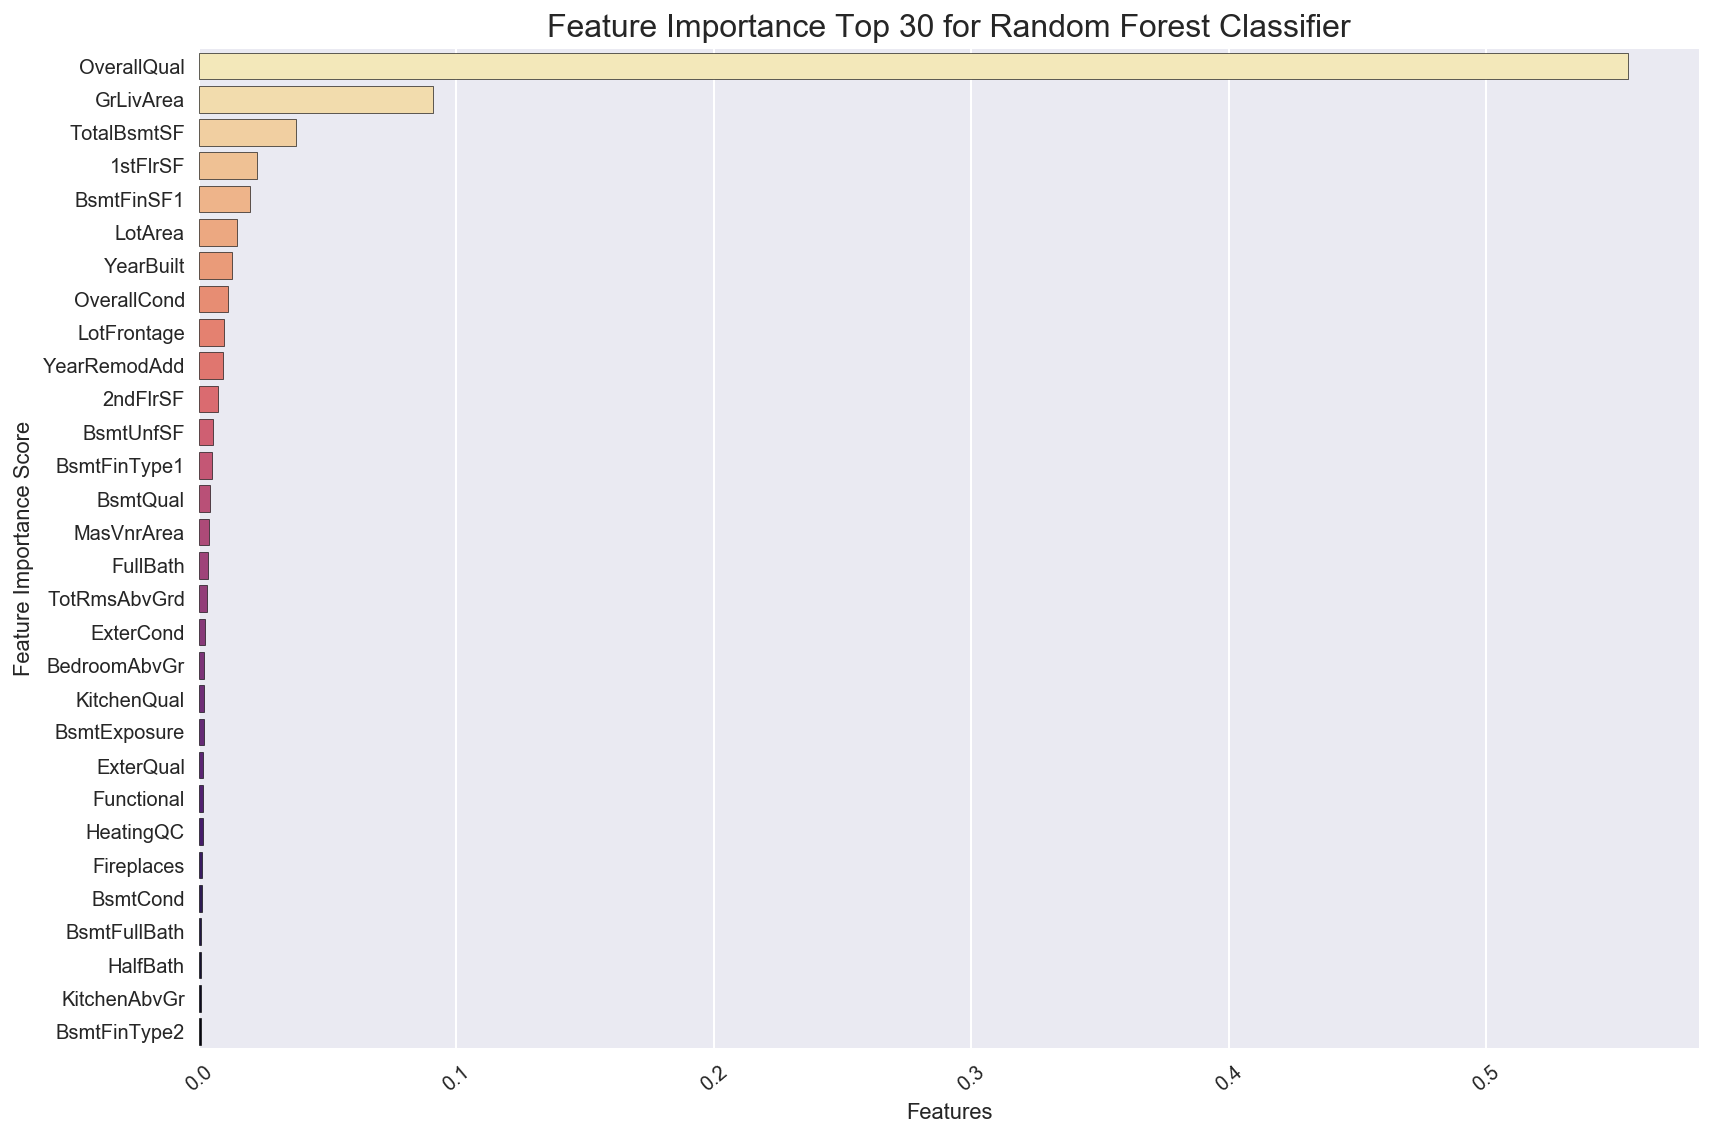

In [30]:
num_features = 30
features = pd.DataFrame(regressor_rf.feature_importances_[:num_features], 
                        index=final_df.columns[:num_features], columns=['Feature_Importance'])
features.sort_values(by='Feature_Importance', ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(x=features.Feature_Importance, y=features.index, estimator=np.sum, 
            palette='magma_r')
plt.xticks(rotation=40)
plt.title('Feature Importance Top {} for Random Forest Classifier'.format(num_features), fontsize=16)
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.tight_layout()

[learning_curve] Training set sizes: [ 116  350  584  817 1051 1168]


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   41.8s finished


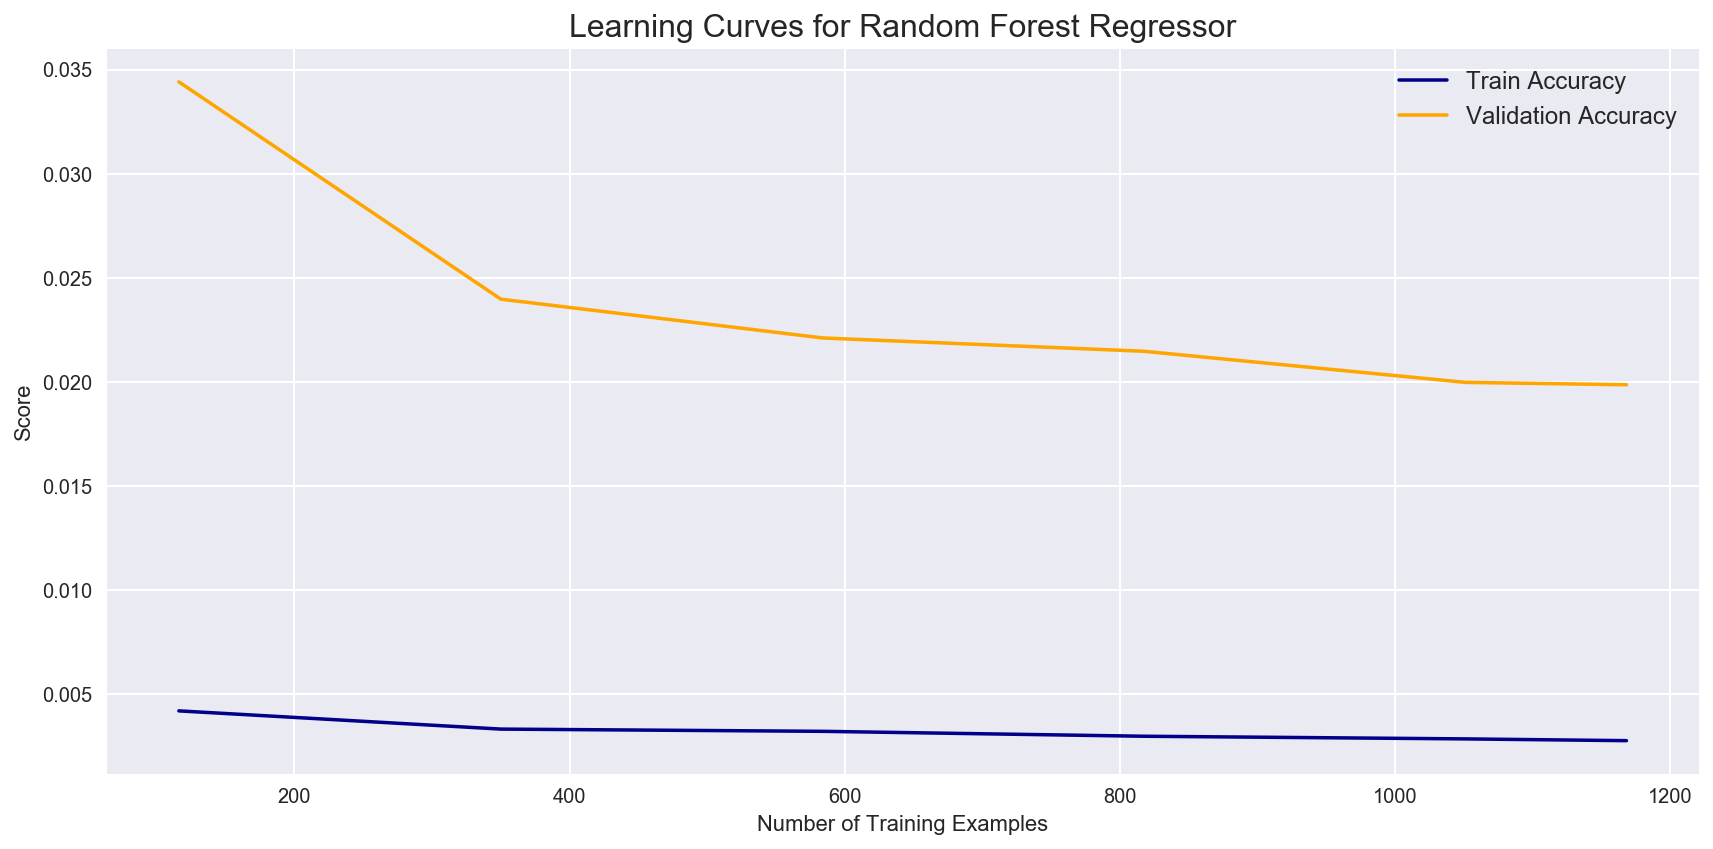

In [31]:
train_sizes, train_scores, valid_scores = learning_curve(
    estimator=regressor_rf, X=scX, y=y, 
    train_sizes=[.1, .3, .5, .7, .9, 1.], 
    cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, np.mean(-train_scores, axis=1), 
         color='darkblue', label='Train Accuracy')
plt.plot(train_sizes, np.mean(-valid_scores, axis=1), 
         color='orange', label='Validation Accuracy')
plt.title('Learning Curves for Random Forest Regressor', fontsize=16)
plt.xlabel('Number of Training Examples')
plt.ylabel('Score')
plt.legend(fontsize=12)
plt.tight_layout()

### XGBoost
Check: [XGBoost](http://xgboost.readthedocs.io/en/latest/model.html)

In [32]:
n_estimators = 2000
regressor_xgb = xgb.XGBRegressor(max_depth=8, learning_rate=0.01, n_estimators=n_estimators, seed=555)
regressor_xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric='rmse', verbose=False)
predictions_xgb = regressor_xgb.predict(X_val)
print('Validation RMSLE: {}'.format(rmsle(predictions_xgb, y_val)))

Validation RMSLE: 0.0091662294567138


In [33]:
from scipy.stats import randint, expon, reciprocal

param_distribs = {
    'learning_rate': reciprocal(0.0001, 1),
    'max_depth': randint(low=2, high=10),
    'n_estimators': randint(low=50, high=1000),
    'gamma': expon(scale=1.0),
    'reg_lambda': reciprocal(0.01, 100),
    'reg_alpha': reciprocal(0.01, 100),
    'min_child_weight': randint(low=1, high=10),
    'max_delta_step': randint(low=0, high=10)
}

regressor_xgb = xgb.XGBRegressor()
rnd_search = RandomizedSearchCV(regressor_xgb, param_distribs, n_iter=500,
                                cv=5, scoring='neg_mean_squared_error', 
                                verbose=1, n_jobs=-1, random_state=555)
rnd_search.fit(X, y);

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 25.7min finished


In [34]:
regressor_xgb_best = rnd_search.best_estimator_
print(regressor_xgb_best)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0.042564704231667541, learning_rate=0.039034833412942532,
       max_delta_step=2, max_depth=6, min_child_weight=9, missing=None,
       n_estimators=595, nthread=-1, objective='reg:linear',
       reg_alpha=0.051021681754643534, reg_lambda=8.600284943307555,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


In [35]:
# cvres = rnd_search.cv_results_
# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(np.sqrt(-mean_score), params)
rnd_search.best_estimator_.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric='rmse', verbose=False)
predictions_xgb = rnd_search.best_estimator_.predict(X_val)
print('Validation RMSLE: {}'.format(rmsle(predictions_xgb, y_val)))

Validation RMSLE: 0.009141271663172672


In [36]:
regressor_xgb_best.fit(X, y)
predictions = np.expm1(regressor_xgb_best.predict(X_test))
predictions

array([ 39437.04296875,  42200.953125  ,  43710.171875  , ...,
        40255.71484375,  40358.54296875,  49732.59765625], dtype=float32)

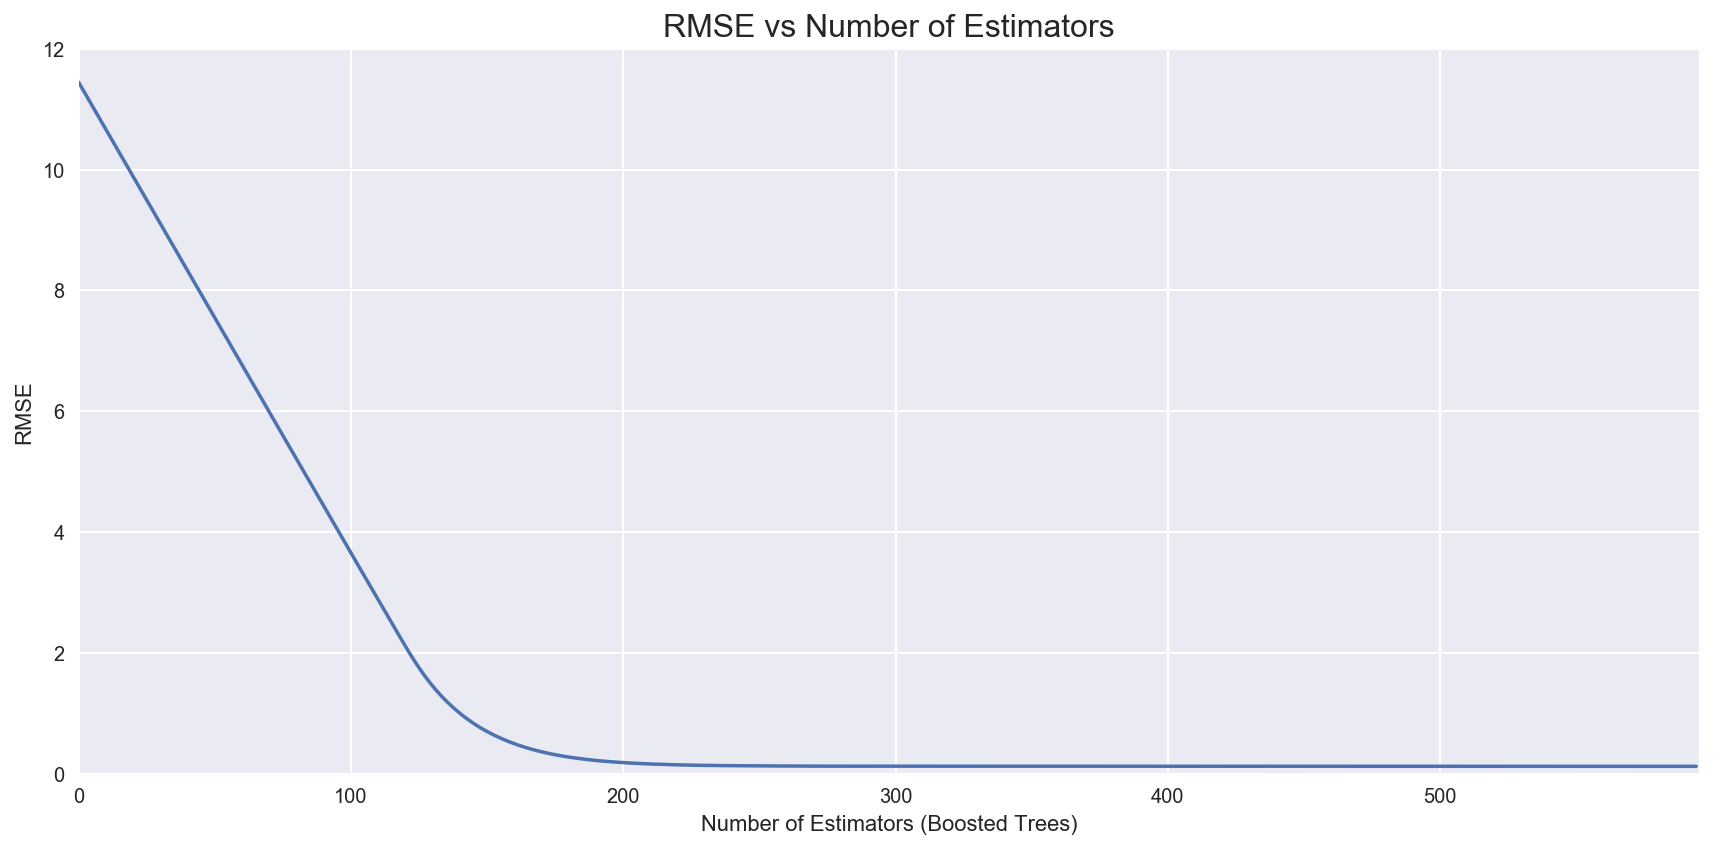

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(range(rnd_search.best_estimator_.n_estimators), rnd_search.best_estimator_.evals_result_['validation_0']['rmse'])
plt.xlim(0, rnd_search.best_estimator_.n_estimators); plt.ylim(0, 12)
plt.title('RMSE vs Number of Estimators', fontsize=16)
plt.xlabel('Number of Estimators (Boosted Trees)')
plt.ylabel('RMSE')
plt.tight_layout()

#### Feature Importance for XGBoost Regressor

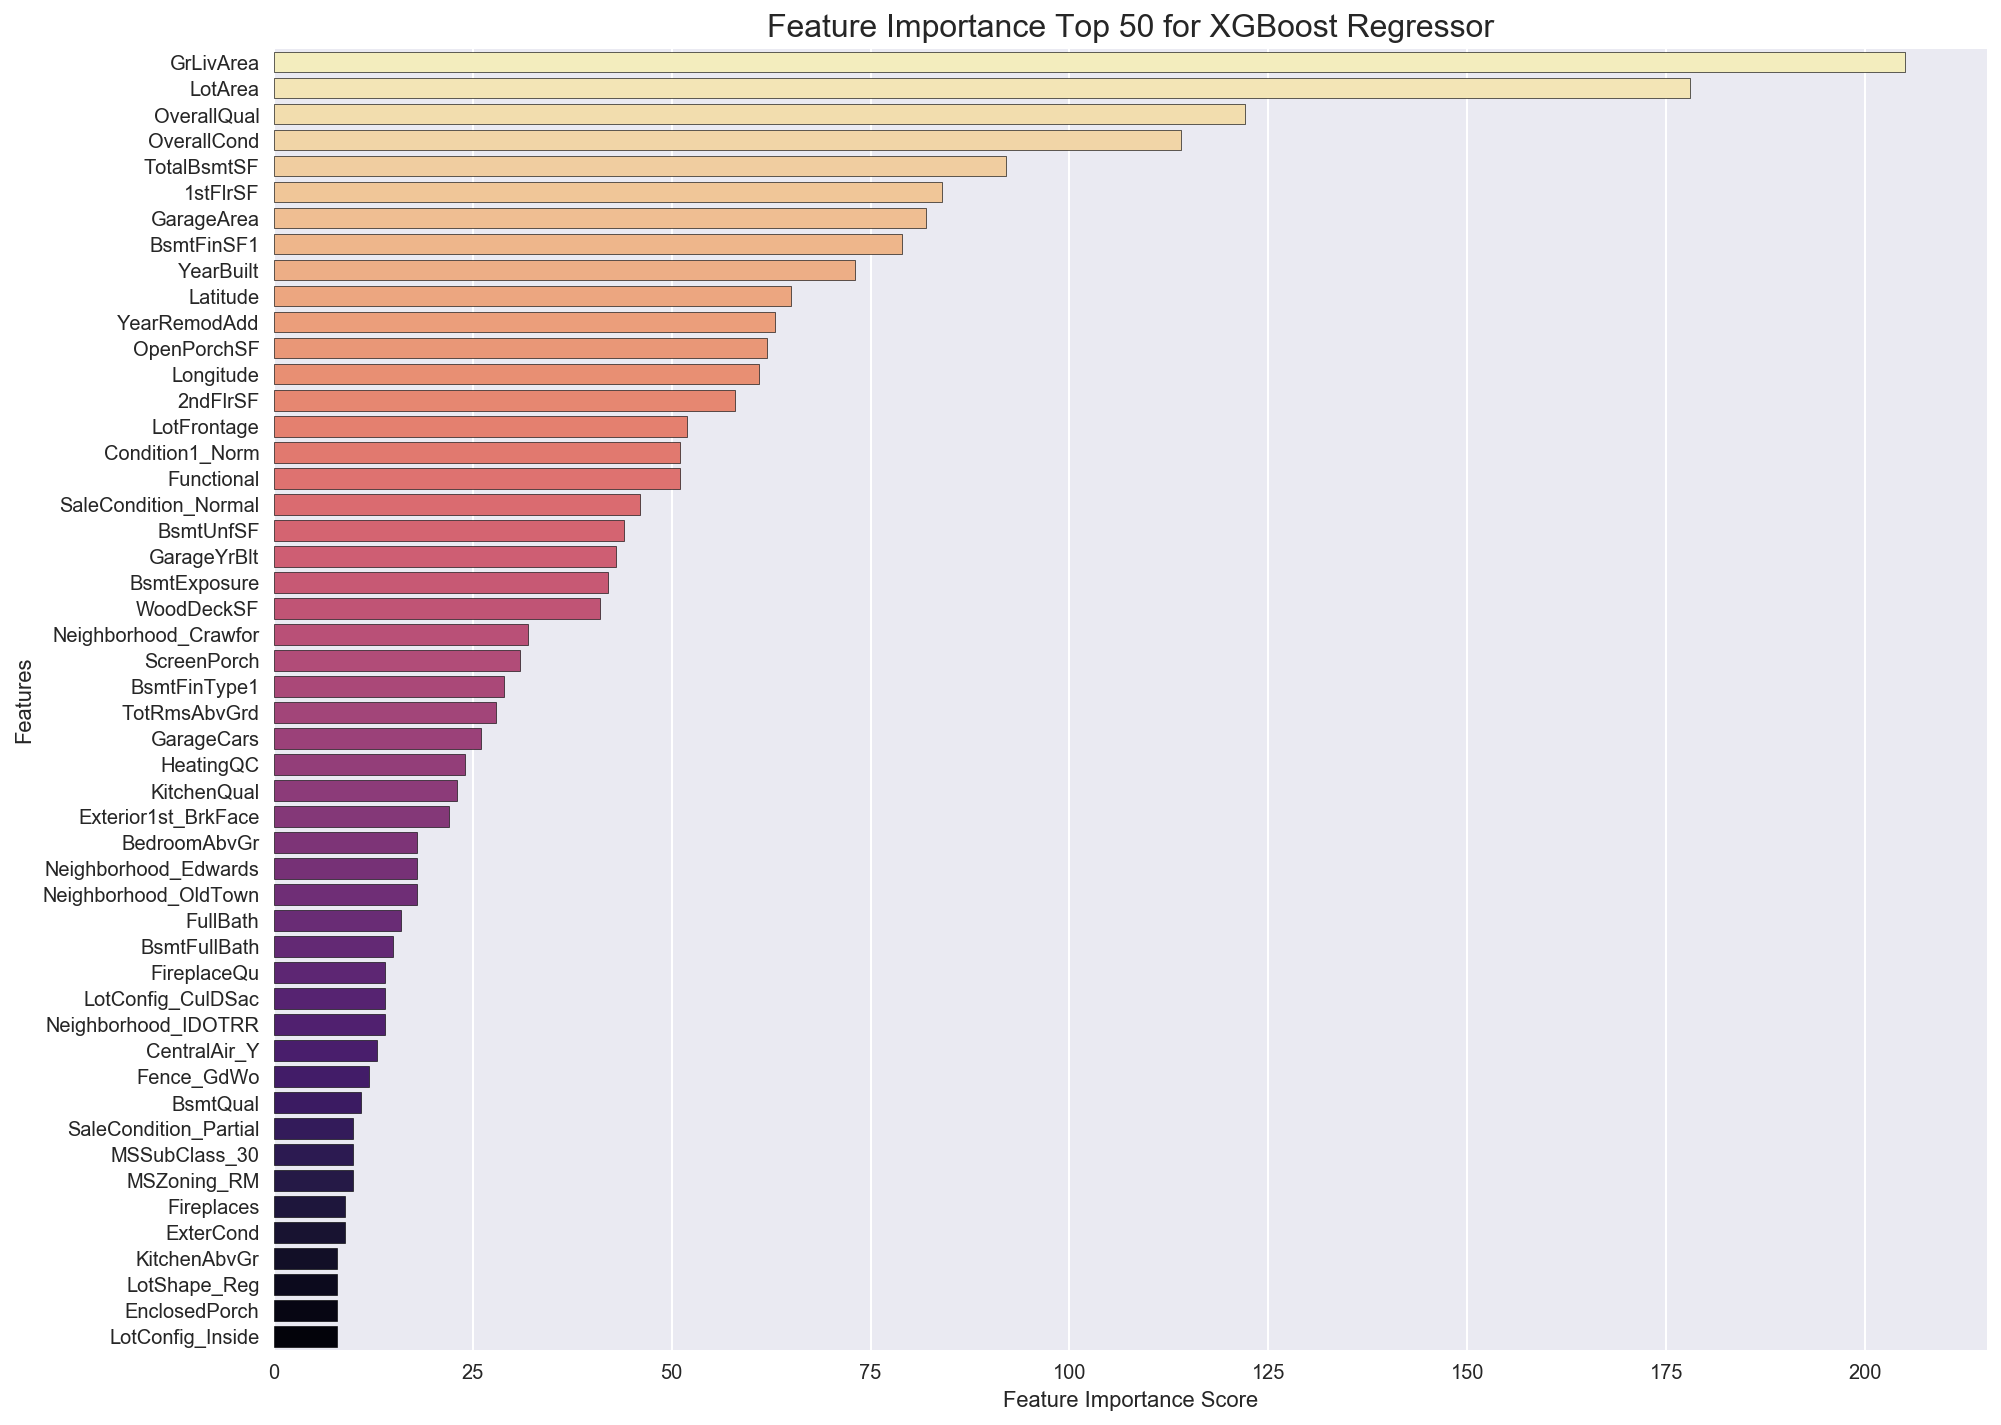

In [40]:
import operator
num_features = 50
importances = rnd_search.best_estimator_.booster().get_fscore()
features = sorted(importances.items(), key=operator.itemgetter(1), reverse=True)[:num_features]
feat, imp = zip(*features)
feat = list(feat); imp = list(imp)
for i, f in enumerate(feat):
    feat[i] = final_df.columns.values[int(f[1:])]

plt.figure(figsize=(14, 10))
sns.barplot(x=imp, y=feat, estimator=np.sum, palette='magma_r')
plt.title('Feature Importance Top {} for XGBoost Regressor'.format(num_features), fontsize=16)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.tight_layout()

In [321]:
submission = pd.DataFrame({'Id': test_df.index,
                           'SalePrice': predictions})
submission.to_csv("submission.csv", index=False)